In [1]:
%matplotlib inline
from simulation import *
from scipy.special import comb
import numpy as np

In [2]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [396, 249, 105, 358, 483, 10, 111, 444, 233, 94, 320, 379, 184, 157, 261, 265, 420, 335, 218, 459, 215, 10, 174, 488, 457] 
Slist :  [156]


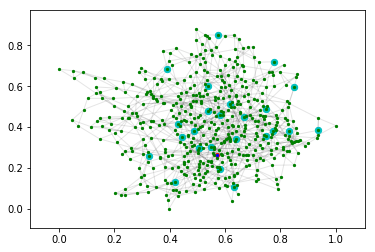

Starting infection


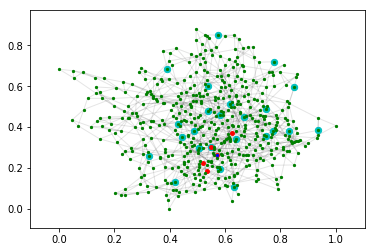

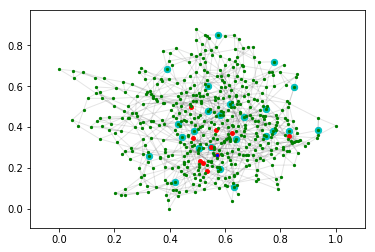

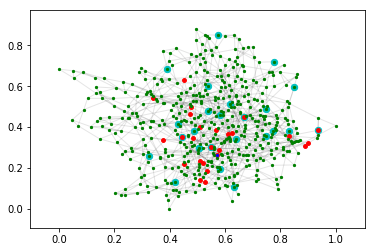

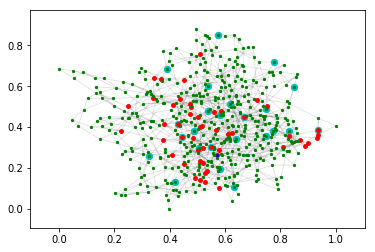

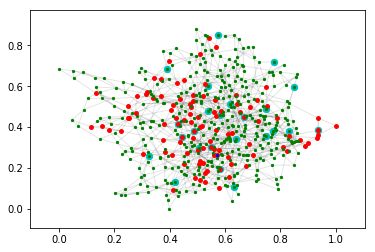

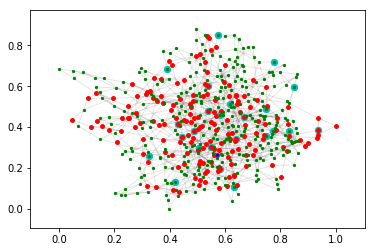

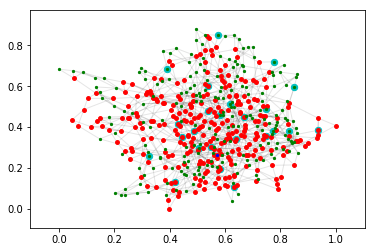

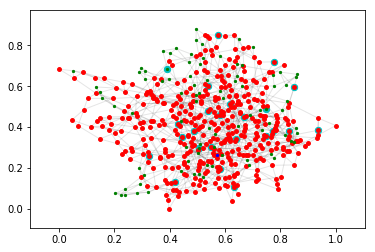

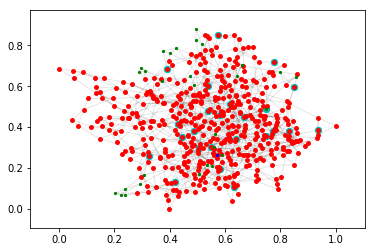

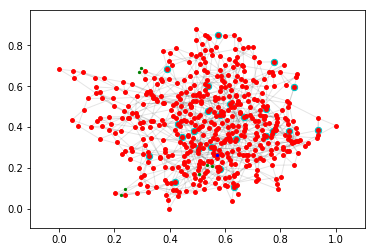

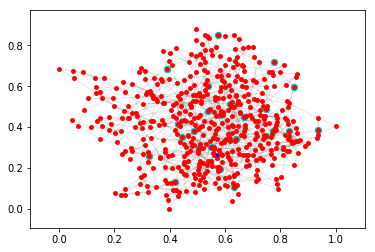

In [3]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 25
propagProba = 0.7
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)

In [4]:
sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Real Source =  156
No sources identified

Monitoring Nodes :
Monitoring node number :  10 
	infected by rumor :  1 	at step :  9
Monitoring node number :  94 
	infected by rumor :  1 	at step :  8
Monitoring node number :  105 
	infected by rumor :  1 	at step :  6
Monitoring node number :  111 
	infected by rumor :  1 	at step :  8
Monitoring node number :  157 
	infected by rumor :  1 	at step :  1
Monitoring node number :  174 
	infected by rumor :  1 	at step :  3
Monitoring node number :  184 
	infected by rumor :  1 	at step :  8
Monitoring node number :  215 
	infected by rumor :  1 	at step :  8
Monitoring node number :  218 
	infected by rumor :  1 	at step :  8
Monitoring node number :  233 
	infected by rumor :  1 	at step :  3
Monitoring node number :  249 
	infected by rumor :  1 	at step :  8
Monitoring node number :  261 
	infected by rumor :  1 	at step :  7
Monitoring node number :  265 
	infected by rumor :  1 	at step :  6
Monitoring node number :  320 
	infected by 

Real Source =  156
Detected Source =  [156]


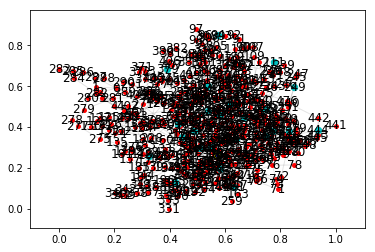

In [6]:
from networkUtils import drawColoredGraph2

setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [78]:
degCent = nx.degree_centrality(Graph)

maxDeg = -1
maxNode = -1

for node in finalList :
    if degCent[node] > maxDeg :
        maxDeg = degCent[node]
        maxNode = node
    print(node,' : ',degCent[node])

print('\n Max degree Centrality : \n node ',maxNode,' : ', maxDeg)

418  :  0.0060120240480961915
419  :  0.0060120240480961915
420  :  0.01002004008016032
421  :  0.012024048096192383
422  :  0.008016032064128256
423  :  0.008016032064128256
425  :  0.01002004008016032
363  :  0.008016032064128256
238  :  0.0060120240480961915

 Max degree Centrality : 
 node  421  :  0.012024048096192383


In [63]:
print('Monitors : ',monitorsList,'\n\n')

pathList = list()

for source in finalList :
    print('\n source : ',source,': \n')
    for target in monitorsList :
        print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)

Monitors :  [392, 104, 104, 114, 374, 710, 219, 844, 701, 345, 301, 720, 889, 205, 215, 183, 653, 134, 443, 837, 84, 174, 717, 5, 993, 840, 420, 365, 330, 366, 101, 158, 130, 110, 576, 70, 910, 852, 237, 653, 141, 989, 527, 406, 485, 636, 996, 291, 519, 845, 187, 817, 612, 334, 801, 915, 426, 38, 442, 657, 985, 184, 739, 454, 472, 765, 874, 884, 811, 142, 223, 464, 302, 269, 923, 459, 132, 164, 512, 788, 87, 470, 671, 15, 225, 397, 918, 970, 56, 143, 604, 49, 1, 112, 685, 51, 787, 660, 726, 964] 



 source :  0 : 

392  :  7
104  :  11
104  :  11
114  :  8
374  :  10
710  :  7
219  :  8
844  :  7
701  :  8
345  :  9
301  :  8
720  :  6
889  :  5
205  :  8
215  :  5
183  :  9
653  :  5
134  :  7
443  :  7
837  :  8
84  :  11
174  :  9
717  :  8
5  :  3
993  :  4
840  :  8
420  :  9
365  :  6
330  :  8
366  :  8
101  :  10
158  :  7
130  :  9
110  :  9
576  :  8
70  :  9
910  :  10
852  :  8
237  :  8
653  :  5
141  :  8
989  :  6
527  :  9
406  :  8
485  :  9
636  :  7
996  :  2
291  :

 8
604  :  8
49  :  9
1  :  1
112  :  9
685  :  9
51  :  8
787  :  5
660  :  9
726  :  7
964  :  10

 source :  3 : 

392  :  5
104  :  9
104  :  9
114  :  7
374  :  8
710  :  6
219  :  7
844  :  7
701  :  8
345  :  8
301  :  8
720  :  4
889  :  3
205  :  6
215  :  4
183  :  8
653  :  3
134  :  8
443  :  6
837  :  6
84  :  9
174  :  7
717  :  6
5  :  2
993  :  6
840  :  6
420  :  7
365  :  6
330  :  6
366  :  8
101  :  9
158  :  5
130  :  8
110  :  8
576  :  7
70  :  8
910  :  8
852  :  7
237  :  6
653  :  3
141  :  7
989  :  8
527  :  8
406  :  8
485  :  8
636  :  6
996  :  4
291  :  6
519  :  6
845  :  7
187  :  6
817  :  8
612  :  8
334  :  8
801  :  6
915  :  7
426  :  8
38  :  7
442  :  7
657  :  7
985  :  6
184  :  7
739  :  7
454  :  6
472  :  6
765  :  6
874  :  8
884  :  2
811  :  8
142  :  6
223  :  7
464  :  9
302  :  7
269  :  5
923  :  6
459  :  9
132  :  8
164  :  6
512  :  7
788  :  6
87  :  9
470  :  8
671  :  10
15  :  6
225  :  8
397  :  7
918  :  6
970  :  6
56  :  9

 10
56  :  10
143  :  6
604  :  7
49  :  9
1  :  5
112  :  7
685  :  8
51  :  8
787  :  5
660  :  7
726  :  9
964  :  9

 source :  9 : 

392  :  7
104  :  9
104  :  9
114  :  5
374  :  10
710  :  6
219  :  6
844  :  8
701  :  8
345  :  9
301  :  8
720  :  8
889  :  7
205  :  8
215  :  6
183  :  8
653  :  7
134  :  9
443  :  8
837  :  10
84  :  10
174  :  6
717  :  9
5  :  4
993  :  9
840  :  10
420  :  8
365  :  5
330  :  9
366  :  7
101  :  9
158  :  8
130  :  7
110  :  8
576  :  5
70  :  8
910  :  10
852  :  3
237  :  10
653  :  7
141  :  5
989  :  8
527  :  9
406  :  9
485  :  9
636  :  8
996  :  7
291  :  10
519  :  8
845  :  8
187  :  6
817  :  8
612  :  9
334  :  7
801  :  6
915  :  9
426  :  9
38  :  4
442  :  9
657  :  9
985  :  9
184  :  7
739  :  9
454  :  8
472  :  7
765  :  6
874  :  8
884  :  6
811  :  9
142  :  6
223  :  4
464  :  8
302  :  8
269  :  6
923  :  8
459  :  7
132  :  8
164  :  9
512  :  8
788  :  6
87  :  10
470  :  9
671  :  10
15  :  3
225  :  5
397  :  9


  :  7
345  :  8
301  :  5
720  :  7
889  :  5
205  :  7
215  :  9
183  :  7
653  :  7
134  :  7
443  :  10
837  :  9
84  :  9
174  :  6
717  :  9
5  :  7
993  :  10
840  :  9
420  :  7
365  :  5
330  :  8
366  :  7
101  :  10
158  :  7
130  :  5
110  :  7
576  :  5
70  :  8
910  :  8
852  :  3
237  :  9
653  :  7
141  :  4
989  :  7
527  :  8
406  :  6
485  :  8
636  :  10
996  :  8
291  :  9
519  :  9
845  :  8
187  :  8
817  :  8
612  :  8
334  :  6
801  :  6
915  :  8
426  :  9
38  :  4
442  :  8
657  :  8
985  :  8
184  :  6
739  :  9
454  :  7
472  :  6
765  :  6
874  :  8
884  :  7
811  :  8
142  :  5
223  :  4
464  :  7
302  :  5
269  :  6
923  :  7
459  :  7
132  :  6
164  :  7
512  :  6
788  :  8
87  :  8
470  :  8
671  :  10
15  :  1
225  :  4
397  :  9
918  :  8
970  :  9
56  :  9
143  :  5
604  :  6
49  :  7
1  :  8
112  :  6
685  :  7
51  :  7
787  :  6
660  :  6
726  :  7
964  :  8

 source :  16 : 

392  :  7
104  :  9
104  :  9
114  :  5
374  :  7
710  :  7
219  :  6
8

  :  8
671  :  10
15  :  2
225  :  2
397  :  7
918  :  8
970  :  8
56  :  7
143  :  7
604  :  6
49  :  5
1  :  8
112  :  4
685  :  8
51  :  5
787  :  4
660  :  6
726  :  7
964  :  9

 source :  19 : 

392  :  6
104  :  6
104  :  6
114  :  6
374  :  7
710  :  6
219  :  8
844  :  5
701  :  7
345  :  8
301  :  6
720  :  6
889  :  4
205  :  4
215  :  10
183  :  2
653  :  8
134  :  6
443  :  6
837  :  4
84  :  8
174  :  6
717  :  6
5  :  8
993  :  9
840  :  5
420  :  6
365  :  7
330  :  9
366  :  7
101  :  8
158  :  8
130  :  8
110  :  3
576  :  5
70  :  6
910  :  7
852  :  7
237  :  6
653  :  8
141  :  6
989  :  8
527  :  8
406  :  6
485  :  4
636  :  9
996  :  7
291  :  7
519  :  6
845  :  4
187  :  3
817  :  6
612  :  7
334  :  7
801  :  6
915  :  6
426  :  7
38  :  7
442  :  4
657  :  8
985  :  7
184  :  1
739  :  6
454  :  6
472  :  6
765  :  6
874  :  7
884  :  7
811  :  6
142  :  7
223  :  6
464  :  7
302  :  6
269  :  8
923  :  5
459  :  6
132  :  7
164  :  7
512  :  6
788  :  6
87 

187  :  6
817  :  7
612  :  8
334  :  6
801  :  8
915  :  7
426  :  7
38  :  7
442  :  7
657  :  9
985  :  8
184  :  4
739  :  9
454  :  7
472  :  3
765  :  9
874  :  9
884  :  6
811  :  7
142  :  8
223  :  6
464  :  7
302  :  6
269  :  8
923  :  4
459  :  7
132  :  9
164  :  8
512  :  7
788  :  8
87  :  7
470  :  5
671  :  10
15  :  5
225  :  5
397  :  7
918  :  6
970  :  9
56  :  8
143  :  8
604  :  6
49  :  7
1  :  7
112  :  7
685  :  6
51  :  7
787  :  7
660  :  7
726  :  7
964  :  9

 source :  25 : 

392  :  6
104  :  8
104  :  8
114  :  6
374  :  9
710  :  7
219  :  7
844  :  6
701  :  6
345  :  4
301  :  7
720  :  6
889  :  4
205  :  6
215  :  7
183  :  6
653  :  6
134  :  8
443  :  8
837  :  7
84  :  7
174  :  9
717  :  6
5  :  6
993  :  9
840  :  7
420  :  8
365  :  7
330  :  8
366  :  8
101  :  7
158  :  8
130  :  7
110  :  7
576  :  6
70  :  6
910  :  5
852  :  8
237  :  8
653  :  6
141  :  6
989  :  8
527  :  10
406  :  7
485  :  8
636  :  6
996  :  7
291  :  5
519  :  6
8


187  :  6
817  :  6
612  :  7
334  :  6
801  :  8
915  :  6
426  :  9
38  :  5
442  :  6
657  :  8
985  :  7
184  :  7
739  :  8
454  :  5
472  :  2
765  :  8
874  :  8
884  :  6
811  :  8
142  :  5
223  :  6
464  :  6
302  :  7
269  :  7
923  :  3
459  :  7
132  :  8
164  :  7
512  :  8
788  :  7
87  :  6
470  :  4
671  :  9
15  :  5
225  :  8
397  :  6
918  :  5
970  :  8
56  :  9
143  :  5
604  :  7
49  :  6
1  :  5
112  :  6
685  :  5
51  :  7
787  :  7
660  :  6
726  :  7
964  :  8

 source :  30 : 

392  :  7
104  :  8
104  :  8
114  :  4
374  :  10
710  :  7
219  :  8
844  :  7
701  :  7
345  :  5
301  :  7
720  :  7
889  :  5
205  :  7
215  :  5
183  :  8
653  :  6
134  :  8
443  :  7
837  :  9
84  :  8
174  :  9
717  :  7
5  :  3
993  :  6
840  :  8
420  :  9
365  :  6
330  :  8
366  :  8
101  :  8
158  :  8
130  :  8
110  :  7
576  :  8
70  :  7
910  :  6
852  :  6
237  :  9
653  :  6
141  :  4
989  :  8
527  :  8
406  :  8
485  :  8
636  :  7
996  :  4
291  :  6
519  :  5
8

 7
910  :  8
852  :  4
237  :  9
653  :  8
141  :  3
989  :  7
527  :  7
406  :  6
485  :  7
636  :  9
996  :  6
291  :  8
519  :  7
845  :  8
187  :  7
817  :  6
612  :  8
334  :  5
801  :  7
915  :  8
426  :  8
38  :  2
442  :  9
657  :  6
985  :  6
184  :  7
739  :  8
454  :  7
472  :  5
765  :  7
874  :  9
884  :  7
811  :  7
142  :  4
223  :  5
464  :  9
302  :  6
269  :  7
923  :  6
459  :  7
132  :  8
164  :  9
512  :  8
788  :  9
87  :  9
470  :  7
671  :  10
15  :  4
225  :  6
397  :  8
918  :  8
970  :  9
56  :  8
143  :  4
604  :  7
49  :  7
1  :  6
112  :  4
685  :  6
51  :  6
787  :  7
660  :  4
726  :  7
964  :  7

 source :  35 : 

392  :  7
104  :  7
104  :  7
114  :  1
374  :  9
710  :  6
219  :  6
844  :  7
701  :  6
345  :  7
301  :  4
720  :  7
889  :  5
205  :  6
215  :  8
183  :  6
653  :  8
134  :  7
443  :  9
837  :  8
84  :  8
174  :  6
717  :  7
5  :  6
993  :  7
840  :  8
420  :  8
365  :  5
330  :  7
366  :  7
101  :  8
158  :  8
130  :  7
110  :  4
576  :  


653  :  8
134  :  9
443  :  9
837  :  7
84  :  7
174  :  6
717  :  7
5  :  8
993  :  7
840  :  6
420  :  8
365  :  6
330  :  7
366  :  8
101  :  8
158  :  9
130  :  8
110  :  7
576  :  5
70  :  6
910  :  7
852  :  4
237  :  6
653  :  8
141  :  6
989  :  9
527  :  6
406  :  8
485  :  8
636  :  7
996  :  6
291  :  7
519  :  7
845  :  6
187  :  8
817  :  3
612  :  10
334  :  6
801  :  7
915  :  8
426  :  7
38  :  1
442  :  9
657  :  7
985  :  7
184  :  7
739  :  9
454  :  5
472  :  8
765  :  7
874  :  8
884  :  7
811  :  6
142  :  7
223  :  5
464  :  6
302  :  5
269  :  6
923  :  7
459  :  7
132  :  9
164  :  6
512  :  5
788  :  8
87  :  7
470  :  8
671  :  8
15  :  4
225  :  6
397  :  7
918  :  8
970  :  6
56  :  7
143  :  7
604  :  7
49  :  6
1  :  8
112  :  6
685  :  7
51  :  5
787  :  8
660  :  6
726  :  8
964  :  5

 source :  41 : 

392  :  7
104  :  9
104  :  9
114  :  4
374  :  8
710  :  8
219  :  6
844  :  7
701  :  6
345  :  7
301  :  6
720  :  6
889  :  7
205  :  6
215  :  8
1

 6
205  :  5
215  :  6
183  :  8
653  :  4
134  :  7
443  :  7
837  :  7
84  :  8
174  :  5
717  :  7
5  :  6
993  :  7
840  :  8
420  :  8
365  :  6
330  :  5
366  :  4
101  :  7
158  :  6
130  :  8
110  :  8
576  :  6
70  :  7
910  :  7
852  :  5
237  :  7
653  :  4
141  :  7
989  :  8
527  :  7
406  :  7
485  :  9
636  :  6
996  :  6
291  :  6
519  :  7
845  :  6
187  :  6
817  :  7
612  :  6
334  :  7
801  :  8
915  :  7
426  :  8
38  :  4
442  :  7
657  :  7
985  :  6
184  :  8
739  :  9
454  :  6
472  :  5
765  :  9
874  :  8
884  :  7
811  :  6
142  :  8
223  :  5
464  :  8
302  :  5
269  :  4
923  :  6
459  :  8
132  :  7
164  :  8
512  :  8
788  :  4
87  :  7
470  :  7
671  :  6
15  :  6
225  :  8
397  :  9
918  :  7
970  :  8
56  :  8
143  :  8
604  :  8
49  :  7
1  :  6
112  :  6
685  :  6
51  :  6
787  :  6
660  :  6
726  :  7
964  :  8

 source :  46 : 

392  :  8
104  :  9
104  :  9
114  :  6
374  :  9
710  :  9
219  :  8
844  :  6
701  :  8
345  :  10
301  :  5
720  :  7


365  :  7
330  :  5
366  :  6
101  :  4
158  :  7
130  :  7
110  :  6
576  :  6
70  :  8
910  :  6
852  :  5
237  :  6
653  :  5
141  :  6
989  :  6
527  :  2
406  :  6
485  :  6
636  :  7
996  :  9
291  :  7
519  :  6
845  :  5
187  :  6
817  :  6
612  :  7
334  :  5
801  :  4
915  :  6
426  :  3
38  :  5
442  :  7
657  :  5
985  :  6
184  :  7
739  :  8
454  :  3
472  :  8
765  :  9
874  :  4
884  :  6
811  :  4
142  :  7
223  :  6
464  :  6
302  :  1
269  :  6
923  :  5
459  :  5
132  :  7
164  :  6
512  :  7
788  :  5
87  :  7
470  :  7
671  :  8
15  :  6
225  :  5
397  :  5
918  :  7
970  :  6
56  :  3
143  :  7
604  :  7
49  :  2
1  :  7
112  :  4
685  :  7
51  :  1
787  :  5
660  :  5
726  :  6
964  :  7

 source :  53 : 

392  :  5
104  :  5
104  :  5
114  :  6
374  :  5
710  :  7
219  :  5
844  :  6
701  :  6
345  :  8
301  :  3
720  :  4
889  :  7
205  :  7
215  :  6
183  :  7
653  :  6
134  :  6
443  :  8
837  :  4
84  :  6
174  :  7
717  :  6
5  :  6
993  :  9
840  :  6
42

 :  5
130  :  8
110  :  7
576  :  8
70  :  8
910  :  7
852  :  8
237  :  10
653  :  7
141  :  9
989  :  3
527  :  6
406  :  7
485  :  6
636  :  9
996  :  8
291  :  9
519  :  7
845  :  6
187  :  9
817  :  9
612  :  7
334  :  6
801  :  6
915  :  8
426  :  5
38  :  9
442  :  8
657  :  8
985  :  5
184  :  9
739  :  7
454  :  5
472  :  8
765  :  9
874  :  6
884  :  9
811  :  8
142  :  9
223  :  5
464  :  8
302  :  5
269  :  7
923  :  9
459  :  7
132  :  8
164  :  9
512  :  10
788  :  7
87  :  7
470  :  9
671  :  10
15  :  8
225  :  8
397  :  8
918  :  9
970  :  8
56  :  1
143  :  10
604  :  9
49  :  6
1  :  9
112  :  8
685  :  7
51  :  4
787  :  6
660  :  9
726  :  6
964  :  9

 source :  59 : 

392  :  5
104  :  7
104  :  7
114  :  7
374  :  6
710  :  9
219  :  2
844  :  5
701  :  7
345  :  10
301  :  6
720  :  7
889  :  9
205  :  7
215  :  5
183  :  8
653  :  7
134  :  6
443  :  8
837  :  7
84  :  7
174  :  6
717  :  9
5  :  7
993  :  6
840  :  5
420  :  7
365  :  6
330  :  7
366  :  8
10

7
70  :  5
910  :  6
852  :  7
237  :  8
653  :  6
141  :  9
989  :  5
527  :  9
406  :  6
485  :  6
636  :  7
996  :  10
291  :  6
519  :  7
845  :  5
187  :  8
817  :  7
612  :  7
334  :  5
801  :  6
915  :  6
426  :  7
38  :  8
442  :  7
657  :  7
985  :  7
184  :  6
739  :  9
454  :  8
472  :  5
765  :  8
874  :  8
884  :  8
811  :  5
142  :  8
223  :  6
464  :  7
302  :  7
269  :  8
923  :  6
459  :  9
132  :  6
164  :  8
512  :  8
788  :  7
87  :  6
470  :  7
671  :  8
15  :  5
225  :  8
397  :  8
918  :  8
970  :  8
56  :  4
143  :  9
604  :  6
49  :  9
1  :  8
112  :  8
685  :  4
51  :  7
787  :  7
660  :  6
726  :  8
964  :  10

 source :  64 : 

392  :  6
104  :  6
104  :  6
114  :  6
374  :  4
710  :  9
219  :  5
844  :  5
701  :  7
345  :  9
301  :  8
720  :  5
889  :  8
205  :  8
215  :  6
183  :  6
653  :  4
134  :  6
443  :  8
837  :  5
84  :  8
174  :  7
717  :  7
5  :  7
993  :  9
840  :  5
420  :  7
365  :  3
330  :  4
366  :  5
101  :  4
158  :  2
130  :  7
110  :  8

  :  7
765  :  8
874  :  8
884  :  8
811  :  5
142  :  9
223  :  8
464  :  5
302  :  8
269  :  7
923  :  7
459  :  8
132  :  7
164  :  8
512  :  8
788  :  7
87  :  8
470  :  5
671  :  6
15  :  7
225  :  8
397  :  8
918  :  8
970  :  10
56  :  6
143  :  9
604  :  6
49  :  9
1  :  8
112  :  6
685  :  4
51  :  8
787  :  5
660  :  4
726  :  8
964  :  9

 source :  67 : 

392  :  6
104  :  9
104  :  9
114  :  3
374  :  5
710  :  6
219  :  7
844  :  6
701  :  7
345  :  10
301  :  6
720  :  7
889  :  7
205  :  5
215  :  9
183  :  7
653  :  7
134  :  8
443  :  7
837  :  8
84  :  9
174  :  8
717  :  6
5  :  7
993  :  7
840  :  7
420  :  9
365  :  6
330  :  7
366  :  8
101  :  7
158  :  5
130  :  7
110  :  6
576  :  4
70  :  2
910  :  8
852  :  6
237  :  7
653  :  7
141  :  7
989  :  6
527  :  6
406  :  5
485  :  7
636  :  8
996  :  7
291  :  8
519  :  6
845  :  5
187  :  7
817  :  7
612  :  8
334  :  6
801  :  6
915  :  8
426  :  8
38  :  6
442  :  7
657  :  5
985  :  5
184  :  7
739  :  9
454 

  :  7
884  :  8
811  :  5
142  :  10
223  :  7
464  :  4
302  :  7
269  :  7
923  :  8
459  :  6
132  :  10
164  :  7
512  :  6
788  :  7
87  :  7
470  :  4
671  :  8
15  :  7
225  :  9
397  :  8
918  :  6
970  :  7
56  :  9
143  :  10
604  :  6
49  :  8
1  :  9
112  :  8
685  :  8
51  :  7
787  :  7
660  :  6
726  :  8
964  :  8

 source :  73 : 

392  :  6
104  :  10
104  :  10
114  :  7
374  :  9
710  :  8
219  :  9
844  :  8
701  :  8
345  :  8
301  :  7
720  :  3
889  :  6
205  :  5
215  :  9
183  :  7
653  :  6
134  :  9
443  :  8
837  :  5
84  :  6
174  :  7
717  :  5
5  :  7
993  :  10
840  :  7
420  :  9
365  :  7
330  :  8
366  :  7
101  :  8
158  :  8
130  :  10
110  :  9
576  :  4
70  :  3
910  :  5
852  :  6
237  :  6
653  :  6
141  :  9
989  :  9
527  :  7
406  :  9
485  :  8
636  :  9
996  :  9
291  :  8
519  :  8
845  :  8
187  :  8
817  :  4
612  :  10
334  :  7
801  :  6
915  :  5
426  :  8
38  :  8
442  :  8
657  :  8
985  :  8
184  :  7
739  :  9
454  :  6
472  :  

  :  7
660  :  6
726  :  5
964  :  9

 source :  78 : 

392  :  5
104  :  9
104  :  9
114  :  7
374  :  7
710  :  7
219  :  8
844  :  8
701  :  6
345  :  9
301  :  7
720  :  4
889  :  7
205  :  5
215  :  7
183  :  4
653  :  7
134  :  8
443  :  7
837  :  5
84  :  7
174  :  6
717  :  6
5  :  8
993  :  7
840  :  6
420  :  6
365  :  4
330  :  7
366  :  4
101  :  9
158  :  7
130  :  8
110  :  6
576  :  5
70  :  5
910  :  6
852  :  6
237  :  3
653  :  7
141  :  7
989  :  6
527  :  8
406  :  8
485  :  8
636  :  7
996  :  8
291  :  7
519  :  8
845  :  8
187  :  5
817  :  3
612  :  9
334  :  8
801  :  6
915  :  6
426  :  7
38  :  6
442  :  7
657  :  9
985  :  5
184  :  4
739  :  6
454  :  5
472  :  8
765  :  7
874  :  6
884  :  8
811  :  4
142  :  8
223  :  6
464  :  4
302  :  6
269  :  7
923  :  7
459  :  5
132  :  9
164  :  7
512  :  6
788  :  7
87  :  8
470  :  6
671  :  10
15  :  6
225  :  7
397  :  5
918  :  6
970  :  7
56  :  9
143  :  8
604  :  7
49  :  7
1  :  9
112  :  8
685  :  7
51  

  :  6
852  :  8
237  :  7
653  :  9
141  :  9
989  :  8
527  :  7
406  :  6
485  :  9
636  :  10
996  :  11
291  :  11
519  :  10
845  :  8
187  :  9
817  :  8
612  :  10
334  :  9
801  :  9
915  :  6
426  :  7
38  :  8
442  :  10
657  :  8
985  :  8
184  :  10
739  :  11
454  :  8
472  :  8
765  :  11
874  :  8
884  :  9
811  :  7
142  :  10
223  :  7
464  :  9
302  :  6
269  :  7
923  :  9
459  :  10
132  :  7
164  :  8
512  :  9
788  :  5
87  :  2
470  :  10
671  :  11
15  :  9
225  :  10
397  :  8
918  :  8
970  :  8
56  :  8
143  :  10
604  :  10
49  :  7
1  :  10
112  :  9
685  :  10
51  :  6
787  :  7
660  :  8
726  :  7
964  :  10

 source :  85 : 

392  :  9
104  :  8
104  :  8
114  :  9
374  :  9
710  :  9
219  :  7
844  :  9
701  :  8
345  :  8
301  :  8
720  :  6
889  :  9
205  :  4
215  :  10
183  :  9
653  :  8
134  :  5
443  :  10
837  :  8
84  :  1
174  :  6
717  :  7
5  :  10
993  :  9
840  :  8
420  :  10
365  :  8
330  :  8
366  :  10
101  :  7
158  :  8
130  :  7
1

512  :  7
788  :  7
87  :  2
470  :  8
671  :  9
15  :  7
225  :  7
397  :  6
918  :  6
970  :  6
56  :  6
143  :  6
604  :  7
49  :  7
1  :  9
112  :  6
685  :  6
51  :  7
787  :  6
660  :  7
726  :  3
964  :  7

 source :  91 : 

392  :  7
104  :  5
104  :  5
114  :  6
374  :  6
710  :  7
219  :  4
844  :  7
701  :  5
345  :  8
301  :  5
720  :  6
889  :  7
205  :  4
215  :  7
183  :  6
653  :  5
134  :  3
443  :  9
837  :  7
84  :  4
174  :  5
717  :  7
5  :  8
993  :  7
840  :  5
420  :  7
365  :  6
330  :  6
366  :  8
101  :  6
158  :  5
130  :  5
110  :  4
576  :  7
70  :  8
910  :  5
852  :  8
237  :  6
653  :  5
141  :  6
989  :  4
527  :  8
406  :  2
485  :  6
636  :  8
996  :  8
291  :  8
519  :  8
845  :  7
187  :  6
817  :  8
612  :  6
334  :  7
801  :  5
915  :  5
426  :  6
38  :  9
442  :  7
657  :  8
985  :  5
184  :  6
739  :  8
454  :  6
472  :  7
765  :  8
874  :  4
884  :  6
811  :  6
142  :  7
223  :  6
464  :  8
302  :  5
269  :  7
923  :  8
459  :  7
132  :  4
164

 8
985  :  7
184  :  5
739  :  8
454  :  6
472  :  7
765  :  8
874  :  3
884  :  6
811  :  8
142  :  6
223  :  6
464  :  7
302  :  5
269  :  6
923  :  8
459  :  6
132  :  6
164  :  7
512  :  8
788  :  6
87  :  5
470  :  8
671  :  10
15  :  8
225  :  8
397  :  7
918  :  9
970  :  8
56  :  7
143  :  7
604  :  6
49  :  8
1  :  9
112  :  5
685  :  7
51  :  6
787  :  6
660  :  8
726  :  2
964  :  6

 source :  96 : 

392  :  7
104  :  4
104  :  4
114  :  7
374  :  9
710  :  7
219  :  6
844  :  4
701  :  8
345  :  8
301  :  7
720  :  6
889  :  8
205  :  7
215  :  7
183  :  6
653  :  6
134  :  6
443  :  9
837  :  4
84  :  7
174  :  5
717  :  8
5  :  8
993  :  10
840  :  2
420  :  7
365  :  7
330  :  7
366  :  9
101  :  3
158  :  8
130  :  8
110  :  4
576  :  9
70  :  8
910  :  8
852  :  9
237  :  9
653  :  6
141  :  7
989  :  6
527  :  9
406  :  6
485  :  6
636  :  6
996  :  11
291  :  9
519  :  6
845  :  5
187  :  6
817  :  9
612  :  8
334  :  7
801  :  6
915  :  8
426  :  6
38  :  9
442  : 


485  :  4
636  :  6
996  :  11
291  :  9
519  :  6
845  :  6
187  :  7
817  :  9
612  :  9
334  :  6
801  :  7
915  :  8
426  :  4
38  :  10
442  :  7
657  :  9
985  :  8
184  :  7
739  :  8
454  :  6
472  :  6
765  :  9
874  :  6
884  :  7
811  :  8
142  :  7
223  :  7
464  :  6
302  :  6
269  :  9
923  :  7
459  :  8
132  :  7
164  :  7
512  :  8
788  :  4
87  :  8
470  :  8
671  :  10
15  :  8
225  :  9
397  :  8
918  :  9
970  :  9
56  :  6
143  :  8
604  :  9
49  :  7
1  :  9
112  :  7
685  :  9
51  :  5
787  :  6
660  :  8
726  :  5
964  :  8

 source :  102 : 

392  :  7
104  :  1
104  :  1
114  :  7
374  :  7
710  :  8
219  :  8
844  :  6
701  :  8
345  :  9
301  :  7
720  :  6
889  :  9
205  :  8
215  :  8
183  :  6
653  :  7
134  :  8
443  :  10
837  :  6
84  :  7
174  :  8
717  :  8
5  :  8
993  :  10
840  :  4
420  :  4
365  :  8
330  :  8
366  :  9
101  :  1
158  :  7
130  :  9
110  :  4
576  :  8
70  :  9
910  :  6
852  :  9
237  :  9
653  :  7
141  :  8
989  :  8
527  :

7
302  :  7
269  :  8
923  :  7
459  :  8
132  :  7
164  :  8
512  :  9
788  :  7
87  :  6
470  :  6
671  :  9
15  :  7
225  :  7
397  :  6
918  :  9
970  :  7
56  :  7
143  :  7
604  :  7
49  :  8
1  :  10
112  :  4
685  :  5
51  :  7
787  :  7
660  :  7
726  :  5
964  :  4

 source :  108 : 

392  :  8
104  :  2
104  :  2
114  :  4
374  :  7
710  :  6
219  :  5
844  :  6
701  :  7
345  :  7
301  :  5
720  :  8
889  :  8
205  :  6
215  :  8
183  :  3
653  :  8
134  :  5
443  :  7
837  :  6
84  :  6
174  :  6
717  :  9
5  :  8
993  :  8
840  :  4
420  :  4
365  :  7
330  :  6
366  :  6
101  :  4
158  :  8
130  :  7
110  :  1
576  :  9
70  :  8
910  :  6
852  :  8
237  :  7
653  :  8
141  :  6
989  :  5
527  :  6
406  :  5
485  :  3
636  :  8
996  :  9
291  :  7
519  :  9
845  :  7
187  :  3
817  :  7
612  :  7
334  :  4
801  :  6
915  :  7
426  :  5
38  :  7
442  :  7
657  :  8
985  :  6
184  :  3
739  :  6
454  :  8
472  :  8
765  :  9
874  :  5
884  :  8
811  :  8
142  :  7
223  :  7

 8
845  :  5
187  :  3
817  :  7
612  :  9
334  :  6
801  :  7
915  :  8
426  :  7
38  :  5
442  :  7
657  :  6
985  :  4
184  :  3
739  :  6
454  :  8
472  :  8
765  :  8
874  :  7
884  :  8
811  :  8
142  :  7
223  :  7
464  :  9
302  :  4
269  :  8
923  :  7
459  :  8
132  :  8
164  :  8
512  :  9
788  :  7
87  :  7
470  :  8
671  :  9
15  :  6
225  :  6
397  :  5
918  :  8
970  :  8
56  :  8
143  :  7
604  :  8
49  :  6
1  :  9
112  :  1
685  :  7
51  :  6
787  :  6
660  :  4
726  :  6
964  :  6

 source :  113 : 

392  :  8
104  :  5
104  :  5
114  :  1
374  :  7
710  :  7
219  :  6
844  :  5
701  :  5
345  :  9
301  :  2
720  :  8
889  :  5
205  :  6
215  :  7
183  :  4
653  :  6
134  :  6
443  :  8
837  :  7
84  :  9
174  :  8
717  :  7
5  :  8
993  :  5
840  :  7
420  :  7
365  :  7
330  :  9
366  :  8
101  :  7
158  :  6
130  :  8
110  :  2
576  :  7
70  :  6
910  :  8
852  :  5
237  :  8
653  :  6
141  :  5
989  :  4
527  :  4
406  :  5
485  :  6
636  :  6
996  :  6
291  :  8

205  :  5
215  :  8
183  :  6
653  :  8
134  :  7
443  :  7
837  :  7
84  :  9
174  :  9
717  :  4
5  :  6
993  :  6
840  :  6
420  :  9
365  :  7
330  :  7
366  :  7
101  :  7
158  :  7
130  :  7
110  :  5
576  :  6
70  :  4
910  :  7
852  :  6
237  :  6
653  :  8
141  :  7
989  :  5
527  :  4
406  :  5
485  :  6
636  :  7
996  :  5
291  :  8
519  :  4
845  :  3
187  :  5
817  :  8
612  :  7
334  :  7
801  :  5
915  :  7
426  :  8
38  :  6
442  :  5
657  :  5
985  :  4
184  :  5
739  :  7
454  :  7
472  :  5
765  :  8
874  :  7
884  :  8
811  :  6
142  :  8
223  :  8
464  :  6
302  :  6
269  :  9
923  :  6
459  :  7
132  :  8
164  :  7
512  :  6
788  :  4
87  :  8
470  :  6
671  :  8
15  :  7
225  :  8
397  :  5
918  :  7
970  :  9
56  :  8
143  :  8
604  :  8
49  :  8
1  :  6
112  :  4
685  :  7
51  :  7
787  :  2
660  :  3
726  :  7
964  :  9

 source :  120 : 

392  :  6
104  :  8
104  :  8
114  :  4
374  :  6
710  :  4
219  :  6
844  :  5
701  :  7
345  :  9
301  :  6
720  :  6
88

  :  6
70  :  5
910  :  7
852  :  5
237  :  5
653  :  7
141  :  8
989  :  4
527  :  3
406  :  5
485  :  6
636  :  7
996  :  6
291  :  9
519  :  4
845  :  4
187  :  4
817  :  7
612  :  7
334  :  6
801  :  4
915  :  7
426  :  7
38  :  7
442  :  6
657  :  6
985  :  5
184  :  5
739  :  6
454  :  8
472  :  6
765  :  7
874  :  6
884  :  8
811  :  5
142  :  9
223  :  8
464  :  7
302  :  5
269  :  9
923  :  7
459  :  7
132  :  7
164  :  8
512  :  7
788  :  3
87  :  7
470  :  7
671  :  7
15  :  7
225  :  7
397  :  4
918  :  7
970  :  9
56  :  7
143  :  9
604  :  8
49  :  7
1  :  7
112  :  5
685  :  7
51  :  6
787  :  1
660  :  4
726  :  7
964  :  9

 source :  121 : 

392  :  7
104  :  9
104  :  9
114  :  4
374  :  7
710  :  3
219  :  7
844  :  5
701  :  7
345  :  9
301  :  6
720  :  5
889  :  6
205  :  4
215  :  8
183  :  5
653  :  8
134  :  8
443  :  7
837  :  6
84  :  8
174  :  9
717  :  3
5  :  7
993  :  7
840  :  7
420  :  8
365  :  7
330  :  6
366  :  7
101  :  7
158  :  8
130  :  6
110  

10
837  :  8
84  :  9
174  :  9
717  :  7
5  :  10
993  :  9
840  :  9
420  :  9
365  :  6
330  :  4
366  :  8
101  :  9
158  :  8
130  :  2
110  :  7
576  :  8
70  :  9
910  :  9
852  :  8
237  :  7
653  :  9
141  :  8
989  :  8
527  :  7
406  :  7
485  :  8
636  :  8
996  :  10
291  :  7
519  :  8
845  :  8
187  :  8
817  :  8
612  :  9
334  :  4
801  :  6
915  :  9
426  :  9
38  :  9
442  :  8
657  :  10
985  :  7
184  :  8
739  :  10
454  :  8
472  :  8
765  :  9
874  :  8
884  :  8
811  :  7
142  :  9
223  :  7
464  :  8
302  :  7
269  :  9
923  :  5
459  :  9
132  :  3
164  :  9
512  :  9
788  :  7
87  :  8
470  :  10
671  :  11
15  :  6
225  :  9
397  :  6
918  :  8
970  :  9
56  :  9
143  :  9
604  :  10
49  :  4
1  :  10
112  :  7
685  :  5
51  :  6
787  :  5
660  :  8
726  :  9
964  :  8

 source :  127 : 

392  :  5
104  :  8
104  :  8
114  :  8
374  :  10
710  :  7
219  :  8
844  :  7
701  :  8
345  :  9
301  :  7
720  :  8
889  :  7
205  :  8
215  :  8
183  :  7
653  :  9


158  :  8
130  :  1
110  :  8
576  :  9
70  :  9
910  :  8
852  :  7
237  :  8
653  :  9
141  :  7
989  :  8
527  :  8
406  :  8
485  :  9
636  :  9
996  :  9
291  :  8
519  :  9
845  :  9
187  :  9
817  :  9
612  :  8
334  :  5
801  :  7
915  :  8
426  :  10
38  :  8
442  :  8
657  :  10
985  :  6
184  :  9
739  :  10
454  :  7
472  :  8
765  :  8
874  :  9
884  :  9
811  :  8
142  :  8
223  :  8
464  :  7
302  :  7
269  :  10
923  :  6
459  :  9
132  :  2
164  :  8
512  :  8
788  :  8
87  :  7
470  :  9
671  :  10
15  :  5
225  :  8
397  :  7
918  :  9
970  :  10
56  :  10
143  :  8
604  :  10
49  :  5
1  :  10
112  :  8
685  :  6
51  :  7
787  :  6
660  :  9
726  :  8
964  :  9

 source :  129 : 

392  :  6
104  :  9
104  :  9
114  :  9
374  :  10
710  :  8
219  :  7
844  :  8
701  :  9
345  :  10
301  :  8
720  :  9
889  :  7
205  :  7
215  :  9
183  :  8
653  :  8
134  :  3
443  :  10
837  :  9
84  :  7
174  :  8
717  :  8
5  :  9
993  :  8
840  :  9
420  :  10
365  :  5
330  :  5

56  :  7
143  :  5
604  :  8
49  :  6
1  :  8
112  :  7
685  :  7
51  :  7
787  :  7
660  :  8
726  :  4
964  :  8

 source :  136 : 

392  :  8
104  :  7
104  :  7
114  :  6
374  :  9
710  :  7
219  :  6
844  :  8
701  :  6
345  :  9
301  :  6
720  :  7
889  :  7
205  :  5
215  :  7
183  :  7
653  :  8
134  :  1
443  :  7
837  :  7
84  :  5
174  :  7
717  :  8
5  :  5
993  :  4
840  :  7
420  :  8
365  :  7
330  :  5
366  :  8
101  :  6
158  :  7
130  :  3
110  :  6
576  :  7
70  :  8
910  :  6
852  :  7
237  :  7
653  :  8
141  :  3
989  :  4
527  :  7
406  :  5
485  :  5
636  :  7
996  :  5
291  :  8
519  :  8
845  :  7
187  :  8
817  :  9
612  :  8
334  :  7
801  :  7
915  :  6
426  :  6
38  :  8
442  :  7
657  :  9
985  :  2
184  :  6
739  :  8
454  :  3
472  :  8
765  :  5
874  :  6
884  :  8
811  :  8
142  :  4
223  :  6
464  :  8
302  :  7
269  :  8
923  :  6
459  :  6
132  :  2
164  :  9
512  :  9
788  :  7
87  :  4
470  :  10
671  :  11
15  :  7
225  :  8
397  :  7
918  :  7


  :  10
717  :  9
5  :  8
993  :  9
840  :  5
420  :  5
365  :  8
330  :  8
366  :  9
101  :  9
158  :  7
130  :  8
110  :  9
576  :  9
70  :  11
910  :  8
852  :  8
237  :  9
653  :  7
141  :  2
989  :  9
527  :  8
406  :  9
485  :  5
636  :  9
996  :  10
291  :  6
519  :  8
845  :  8
187  :  8
817  :  10
612  :  9
334  :  8
801  :  7
915  :  10
426  :  8
38  :  7
442  :  10
657  :  7
985  :  7
184  :  7
739  :  9
454  :  6
472  :  8
765  :  7
874  :  8
884  :  5
811  :  10
142  :  1
223  :  9
464  :  10
302  :  7
269  :  9
923  :  9
459  :  8
132  :  7
164  :  7
512  :  8
788  :  10
87  :  9
470  :  10
671  :  11
15  :  7
225  :  7
397  :  9
918  :  10
970  :  8
56  :  10
143  :  1
604  :  9
49  :  8
1  :  8
112  :  8
685  :  9
51  :  9
787  :  10
660  :  6
726  :  8
964  :  10

 source :  145 : 

392  :  8
104  :  7
104  :  7
114  :  6
374  :  10
710  :  7
219  :  9
844  :  8
701  :  7
345  :  10
301  :  9
720  :  8
889  :  8
205  :  9
215  :  10
183  :  8
653  :  8
134  :  6
443  :

739  :  11
454  :  8
472  :  8
765  :  9
874  :  7
884  :  7
811  :  10
142  :  3
223  :  7
464  :  9
302  :  8
269  :  9
923  :  7
459  :  8
132  :  8
164  :  9
512  :  10
788  :  9
87  :  10
470  :  10
671  :  11
15  :  8
225  :  5
397  :  9
918  :  9
970  :  8
56  :  9
143  :  3
604  :  8
49  :  9
1  :  6
112  :  7
685  :  7
51  :  8
787  :  8
660  :  8
726  :  9
964  :  9

 source :  149 : 

392  :  9
104  :  5
104  :  5
114  :  8
374  :  8
710  :  8
219  :  7
844  :  8
701  :  9
345  :  8
301  :  8
720  :  9
889  :  7
205  :  8
215  :  9
183  :  8
653  :  6
134  :  8
443  :  11
837  :  8
84  :  10
174  :  8
717  :  9
5  :  7
993  :  11
840  :  8
420  :  2
365  :  6
330  :  6
366  :  8
101  :  7
158  :  5
130  :  9
110  :  7
576  :  8
70  :  9
910  :  8
852  :  7
237  :  6
653  :  6
141  :  4
989  :  7
527  :  5
406  :  9
485  :  5
636  :  9
996  :  9
291  :  3
519  :  10
845  :  8
187  :  8
817  :  7
612  :  7
334  :  7
801  :  4
915  :  9
426  :  5
38  :  8
442  :  9
657  :  6
98

 8
454  :  8
472  :  8
765  :  7
874  :  9
884  :  4
811  :  8
142  :  6
223  :  9
464  :  9
302  :  7
269  :  7
923  :  7
459  :  10
132  :  6
164  :  6
512  :  7
788  :  7
87  :  8
470  :  10
671  :  11
15  :  8
225  :  7
397  :  7
918  :  8
970  :  8
56  :  7
143  :  6
604  :  9
49  :  8
1  :  3
112  :  8
685  :  7
51  :  7
787  :  5
660  :  9
726  :  8
964  :  11

 source :  154 : 

392  :  8
104  :  8
104  :  8
114  :  8
374  :  6
710  :  9
219  :  7
844  :  7
701  :  9
345  :  9
301  :  8
720  :  7
889  :  6
205  :  7
215  :  7
183  :  8
653  :  4
134  :  5
443  :  9
837  :  7
84  :  9
174  :  9
717  :  9
5  :  5
993  :  9
840  :  7
420  :  5
365  :  3
330  :  3
366  :  5
101  :  6
158  :  2
130  :  6
110  :  10
576  :  8
70  :  7
910  :  8
852  :  7
237  :  7
653  :  4
141  :  7
989  :  7
527  :  8
406  :  6
485  :  7
636  :  7
996  :  7
291  :  4
519  :  9
845  :  8
187  :  8
817  :  8
612  :  8
334  :  5
801  :  7
915  :  9
426  :  7
38  :  8
442  :  9
657  :  7
985  :  8
184 


223  :  6
464  :  6
302  :  6
269  :  8
923  :  7
459  :  9
132  :  5
164  :  5
512  :  6
788  :  7
87  :  7
470  :  8
671  :  8
15  :  5
225  :  7
397  :  8
918  :  8
970  :  8
56  :  6
143  :  8
604  :  8
49  :  8
1  :  6
112  :  7
685  :  7
51  :  8
787  :  6
660  :  8
726  :  8
964  :  8

 source :  159 : 

392  :  8
104  :  8
104  :  8
114  :  6
374  :  6
710  :  8
219  :  8
844  :  8
701  :  7
345  :  10
301  :  5
720  :  8
889  :  7
205  :  8
215  :  7
183  :  8
653  :  2
134  :  6
443  :  9
837  :  6
84  :  8
174  :  9
717  :  9
5  :  7
993  :  8
840  :  6
420  :  8
365  :  2
330  :  4
366  :  4
101  :  7
158  :  1
130  :  6
110  :  7
576  :  8
70  :  8
910  :  7
852  :  6
237  :  8
653  :  2
141  :  7
989  :  6
527  :  8
406  :  4
485  :  6
636  :  6
996  :  7
291  :  5
519  :  8
845  :  9
187  :  7
817  :  9
612  :  7
334  :  6
801  :  8
915  :  9
426  :  8
38  :  7
442  :  8
657  :  6
985  :  7
184  :  8
739  :  8
454  :  9
472  :  8
765  :  5
874  :  8
884  :  4
811  :  8


  :  5
519  :  6
845  :  7
187  :  6
817  :  9
612  :  8
334  :  7
801  :  8
915  :  8
426  :  9
38  :  9
442  :  9
657  :  6
985  :  7
184  :  6
739  :  8
454  :  8
472  :  8
765  :  4
874  :  6
884  :  2
811  :  8
142  :  4
223  :  7
464  :  9
302  :  5
269  :  7
923  :  8
459  :  8
132  :  8
164  :  2
512  :  3
788  :  7
87  :  6
470  :  10
671  :  10
15  :  6
225  :  6
397  :  7
918  :  8
970  :  6
56  :  7
143  :  5
604  :  8
49  :  8
1  :  5
112  :  6
685  :  9
51  :  7
787  :  5
660  :  7
726  :  6
964  :  9

 source :  163 : 

392  :  7
104  :  9
104  :  9
114  :  7
374  :  7
710  :  8
219  :  8
844  :  7
701  :  8
345  :  9
301  :  6
720  :  7
889  :  6
205  :  6
215  :  5
183  :  7
653  :  3
134  :  8
443  :  9
837  :  5
84  :  8
174  :  6
717  :  9
5  :  6
993  :  9
840  :  5
420  :  8
365  :  5
330  :  7
366  :  7
101  :  8
158  :  3
130  :  7
110  :  8
576  :  7
70  :  8
910  :  7
852  :  8
237  :  8
653  :  3
141  :  6
989  :  7
527  :  9
406  :  5
485  :  7
636  :  6
996

  :  7
205  :  7
215  :  4
183  :  8
653  :  6
134  :  6
443  :  9
837  :  8
84  :  5
174  :  3
717  :  8
5  :  5
993  :  8
840  :  8
420  :  10
365  :  4
330  :  8
366  :  6
101  :  7
158  :  6
130  :  4
110  :  9
576  :  8
70  :  9
910  :  8
852  :  8
237  :  9
653  :  6
141  :  9
989  :  8
527  :  8
406  :  8
485  :  8
636  :  5
996  :  7
291  :  7
519  :  6
845  :  9
187  :  9
817  :  6
612  :  7
334  :  9
801  :  9
915  :  9
426  :  8
38  :  6
442  :  8
657  :  9
985  :  8
184  :  8
739  :  8
454  :  6
472  :  8
765  :  7
874  :  7
884  :  6
811  :  5
142  :  8
223  :  5
464  :  7
302  :  7
269  :  5
923  :  8
459  :  8
132  :  5
164  :  3
512  :  4
788  :  5
87  :  7
470  :  9
671  :  9
15  :  6
225  :  8
397  :  9
918  :  9
970  :  7
56  :  8
143  :  9
604  :  9
49  :  8
1  :  8
112  :  9
685  :  8
51  :  7
787  :  7
660  :  8
726  :  6
964  :  6

 source :  169 : 

392  :  8
104  :  8
104  :  8
114  :  9
374  :  10
710  :  9
219  :  7
844  :  8
701  :  8
345  :  8
301  :  7
720

 9
874  :  5
884  :  8
811  :  6
142  :  9
223  :  4
464  :  8
302  :  5
269  :  4
923  :  8
459  :  7
132  :  7
164  :  5
512  :  6
788  :  4
87  :  5
470  :  10
671  :  10
15  :  7
225  :  7
397  :  7
918  :  7
970  :  8
56  :  7
143  :  9
604  :  7
49  :  6
1  :  9
112  :  8
685  :  9
51  :  5
787  :  6
660  :  7
726  :  4
964  :  7

 source :  172 : 

392  :  6
104  :  8
104  :  8
114  :  8
374  :  8
710  :  8
219  :  5
844  :  8
701  :  8
345  :  8
301  :  7
720  :  5
889  :  7
205  :  7
215  :  6
183  :  6
653  :  8
134  :  7
443  :  11
837  :  7
84  :  4
174  :  1
717  :  7
5  :  7
993  :  8
840  :  6
420  :  9
365  :  6
330  :  8
366  :  8
101  :  6
158  :  8
130  :  6
110  :  7
576  :  8
70  :  9
910  :  8
852  :  6
237  :  8
653  :  8
141  :  9
989  :  7
527  :  7
406  :  7
485  :  9
636  :  7
996  :  7
291  :  7
519  :  8
845  :  8
187  :  8
817  :  6
612  :  9
334  :  9
801  :  7
915  :  9
426  :  7
38  :  6
442  :  9
657  :  8
985  :  8
184  :  6
739  :  10
454  :  6
472  


811  :  5
142  :  8
223  :  3
464  :  7
302  :  6
269  :  3
923  :  9
459  :  6
132  :  7
164  :  7
512  :  8
788  :  6
87  :  6
470  :  9
671  :  10
15  :  6
225  :  6
397  :  6
918  :  9
970  :  7
56  :  8
143  :  9
604  :  5
49  :  8
1  :  9
112  :  7
685  :  7
51  :  7
787  :  6
660  :  9
726  :  3
964  :  8

 source :  177 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  6
710  :  5
219  :  6
844  :  7
701  :  9
345  :  10
301  :  7
720  :  7
889  :  7
205  :  7
215  :  7
183  :  4
653  :  9
134  :  6
443  :  10
837  :  5
84  :  6
174  :  2
717  :  8
5  :  7
993  :  10
840  :  5
420  :  6
365  :  7
330  :  9
366  :  6
101  :  7
158  :  8
130  :  8
110  :  6
576  :  7
70  :  9
910  :  8
852  :  7
237  :  5
653  :  9
141  :  9
989  :  6
527  :  5
406  :  6
485  :  8
636  :  9
996  :  10
291  :  9
519  :  8
845  :  8
187  :  6
817  :  7
612  :  7
334  :  9
801  :  6
915  :  8
426  :  6
38  :  8
442  :  8
657  :  9
985  :  8
184  :  4
739  :  9
454  :  7
472  :  10
765  :  8
874  

  :  6
923  :  8
459  :  7
132  :  9
164  :  7
512  :  8
788  :  7
87  :  8
470  :  8
671  :  10
15  :  8
225  :  7
397  :  4
918  :  6
970  :  8
56  :  8
143  :  7
604  :  5
49  :  9
1  :  9
112  :  6
685  :  6
51  :  8
787  :  5
660  :  8
726  :  5
964  :  9

 source :  182 : 

392  :  6
104  :  6
104  :  6
114  :  6
374  :  5
710  :  6
219  :  8
844  :  5
701  :  8
345  :  9
301  :  7
720  :  4
889  :  6
205  :  6
215  :  8
183  :  1
653  :  7
134  :  8
443  :  7
837  :  2
84  :  9
174  :  4
717  :  6
5  :  8
993  :  10
840  :  3
420  :  7
365  :  7
330  :  8
366  :  5
101  :  7
158  :  7
130  :  10
110  :  3
576  :  6
70  :  8
910  :  7
852  :  7
237  :  4
653  :  7
141  :  6
989  :  7
527  :  8
406  :  7
485  :  6
636  :  8
996  :  9
291  :  7
519  :  8
845  :  6
187  :  3
817  :  6
612  :  8
334  :  6
801  :  6
915  :  6
426  :  7
38  :  9
442  :  5
657  :  9
985  :  8
184  :  1
739  :  6
454  :  8
472  :  8
765  :  7
874  :  7
884  :  5
811  :  4
142  :  5
223  :  6
464  :  7
30


910  :  7
852  :  5
237  :  7
653  :  7
141  :  7
989  :  6
527  :  7
406  :  8
485  :  7
636  :  7
996  :  9
291  :  6
519  :  7
845  :  6
187  :  1
817  :  6
612  :  7
334  :  7
801  :  4
915  :  8
426  :  6
38  :  8
442  :  5
657  :  6
985  :  8
184  :  3
739  :  4
454  :  7
472  :  5
765  :  7
874  :  3
884  :  5
811  :  7
142  :  6
223  :  7
464  :  7
302  :  6
269  :  8
923  :  3
459  :  6
132  :  10
164  :  7
512  :  8
788  :  4
87  :  9
470  :  7
671  :  8
15  :  7
225  :  8
397  :  5
918  :  6
970  :  9
56  :  8
143  :  7
604  :  7
49  :  6
1  :  7
112  :  5
685  :  6
51  :  6
787  :  3
660  :  6
726  :  6
964  :  7

 source :  190 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  9
710  :  6
219  :  8
844  :  5
701  :  7
345  :  6
301  :  6
720  :  6
889  :  3
205  :  8
215  :  8
183  :  4
653  :  7
134  :  9
443  :  6
837  :  7
84  :  7
174  :  8
717  :  6
5  :  7
993  :  11
840  :  7
420  :  8
365  :  6
330  :  7
366  :  5
101  :  8
158  :  8
130  :  8
110  :  4
576  :  

 :  5
134  :  9
443  :  7
837  :  8
84  :  7
174  :  8
717  :  8
5  :  8
993  :  10
840  :  7
420  :  7
365  :  4
330  :  7
366  :  3
101  :  8
158  :  7
130  :  8
110  :  5
576  :  7
70  :  8
910  :  8
852  :  5
237  :  8
653  :  5
141  :  8
989  :  8
527  :  6
406  :  8
485  :  7
636  :  5
996  :  9
291  :  7
519  :  7
845  :  5
187  :  3
817  :  8
612  :  7
334  :  6
801  :  5
915  :  8
426  :  7
38  :  7
442  :  7
657  :  5
985  :  9
184  :  5
739  :  6
454  :  7
472  :  6
765  :  7
874  :  5
884  :  7
811  :  6
142  :  8
223  :  8
464  :  8
302  :  5
269  :  7
923  :  4
459  :  8
132  :  9
164  :  9
512  :  10
788  :  6
87  :  8
470  :  7
671  :  6
15  :  7
225  :  7
397  :  7
918  :  7
970  :  8
56  :  7
143  :  9
604  :  8
49  :  6
1  :  7
112  :  6
685  :  7
51  :  5
787  :  5
660  :  5
726  :  8
964  :  5

 source :  194 : 

392  :  8
104  :  8
104  :  8
114  :  6
374  :  10
710  :  8
219  :  9
844  :  5
701  :  7
345  :  7
301  :  6
720  :  6
889  :  5
205  :  6
215  :  8
183


612  :  7
334  :  8
801  :  7
915  :  6
426  :  7
38  :  5
442  :  8
657  :  7
985  :  7
184  :  7
739  :  8
454  :  5
472  :  4
765  :  9
874  :  7
884  :  6
811  :  7
142  :  7
223  :  6
464  :  8
302  :  5
269  :  5
923  :  5
459  :  7
132  :  8
164  :  7
512  :  8
788  :  5
87  :  6
470  :  6
671  :  7
15  :  7
225  :  8
397  :  8
918  :  7
970  :  7
56  :  7
143  :  7
604  :  7
49  :  6
1  :  5
112  :  7
685  :  7
51  :  5
787  :  7
660  :  7
726  :  7
964  :  7

 source :  198 : 

392  :  7
104  :  9
104  :  9
114  :  4
374  :  10
710  :  7
219  :  7
844  :  7
701  :  7
345  :  5
301  :  7
720  :  7
889  :  4
205  :  5
215  :  7
183  :  8
653  :  4
134  :  7
443  :  9
837  :  9
84  :  8
174  :  7
717  :  7
5  :  5
993  :  8
840  :  8
420  :  8
365  :  7
330  :  7
366  :  6
101  :  8
158  :  6
130  :  8
110  :  7
576  :  7
70  :  7
910  :  6
852  :  7
237  :  7
653  :  4
141  :  5
989  :  8
527  :  7
406  :  8
485  :  9
636  :  6
996  :  6
291  :  6
519  :  7
845  :  6
187  :  6


  :  7
636  :  8
996  :  10
291  :  9
519  :  8
845  :  8
187  :  8
817  :  7
612  :  9
334  :  10
801  :  7
915  :  5
426  :  6
38  :  7
442  :  8
657  :  9
985  :  7
184  :  7
739  :  10
454  :  7
472  :  7
765  :  9
874  :  7
884  :  9
811  :  9
142  :  9
223  :  9
464  :  8
302  :  8
269  :  8
923  :  8
459  :  7
132  :  6
164  :  7
512  :  6
788  :  6
87  :  3
470  :  8
671  :  10
15  :  7
225  :  7
397  :  6
918  :  7
970  :  7
56  :  9
143  :  9
604  :  7
49  :  9
1  :  8
112  :  7
685  :  9
51  :  8
787  :  8
660  :  7
726  :  6
964  :  8

 source :  203 : 

392  :  6
104  :  8
104  :  8
114  :  6
374  :  10
710  :  6
219  :  7
844  :  9
701  :  9
345  :  8
301  :  9
720  :  6
889  :  6
205  :  1
215  :  7
183  :  6
653  :  6
134  :  5
443  :  9
837  :  7
84  :  4
174  :  8
717  :  4
5  :  7
993  :  9
840  :  8
420  :  7
365  :  8
330  :  8
366  :  8
101  :  8
158  :  8
130  :  7
110  :  7
576  :  4
70  :  5
910  :  5
852  :  6
237  :  3
653  :  6
141  :  8
989  :  7
527  :  7


  :  4
653  :  4
141  :  9
989  :  7
527  :  7
406  :  7
485  :  9
636  :  5
996  :  9
291  :  5
519  :  7
845  :  6
187  :  6
817  :  7
612  :  6
334  :  7
801  :  6
915  :  7
426  :  6
38  :  7
442  :  8
657  :  6
985  :  9
184  :  7
739  :  8
454  :  6
472  :  8
765  :  9
874  :  8
884  :  8
811  :  8
142  :  9
223  :  8
464  :  7
302  :  7
269  :  8
923  :  8
459  :  7
132  :  7
164  :  6
512  :  5
788  :  2
87  :  5
470  :  7
671  :  6
15  :  7
225  :  9
397  :  6
918  :  7
970  :  9
56  :  8
143  :  10
604  :  6
49  :  8
1  :  7
112  :  6
685  :  9
51  :  7
787  :  4
660  :  6
726  :  7
964  :  9

 source :  209 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  9
710  :  6
219  :  7
844  :  6
701  :  9
345  :  9
301  :  8
720  :  8
889  :  8
205  :  3
215  :  4
183  :  8
653  :  3
134  :  6
443  :  8
837  :  8
84  :  7
174  :  8
717  :  6
5  :  4
993  :  11
840  :  8
420  :  9
365  :  6
330  :  4
366  :  5
101  :  5
158  :  5
130  :  7
110  :  8
576  :  5
70  :  6
910  :  8
852

  :  7
110  :  9
576  :  7
70  :  8
910  :  8
852  :  6
237  :  7
653  :  4
141  :  8
989  :  6
527  :  8
406  :  8
485  :  9
636  :  2
996  :  7
291  :  7
519  :  6
845  :  7
187  :  7
817  :  6
612  :  7
334  :  6
801  :  7
915  :  8
426  :  7
38  :  8
442  :  7
657  :  6
985  :  6
184  :  8
739  :  7
454  :  5
472  :  6
765  :  9
874  :  8
884  :  6
811  :  8
142  :  9
223  :  6
464  :  7
302  :  5
269  :  8
923  :  6
459  :  8
132  :  8
164  :  4
512  :  5
788  :  3
87  :  8
470  :  8
671  :  7
15  :  8
225  :  8
397  :  7
918  :  6
970  :  7
56  :  8
143  :  9
604  :  8
49  :  6
1  :  5
112  :  7
685  :  8
51  :  7
787  :  5
660  :  7
726  :  7
964  :  9

 source :  214 : 

392  :  7
104  :  8
104  :  8
114  :  8
374  :  10
710  :  7
219  :  4
844  :  7
701  :  9
345  :  9
301  :  6
720  :  7
889  :  6
205  :  5
215  :  1
183  :  9
653  :  5
134  :  7
443  :  5
837  :  7
84  :  8
174  :  7
717  :  8
5  :  1
993  :  8
840  :  8
420  :  9
365  :  7
330  :  7
366  :  7
101  :  6
158 

 6
70  :  6
910  :  6
852  :  6
237  :  9
653  :  7
141  :  9
989  :  3
527  :  8
406  :  7
485  :  9
636  :  6
996  :  8
291  :  6
519  :  5
845  :  7
187  :  8
817  :  7
612  :  7
334  :  4
801  :  6
915  :  6
426  :  7
38  :  7
442  :  4
657  :  4
985  :  5
184  :  8
739  :  6
454  :  5
472  :  6
765  :  8
874  :  7
884  :  8
811  :  8
142  :  10
223  :  3
464  :  5
302  :  5
269  :  5
923  :  6
459  :  6
132  :  6
164  :  7
512  :  8
788  :  7
87  :  6
470  :  6
671  :  6
15  :  5
225  :  6
397  :  6
918  :  7
970  :  8
56  :  5
143  :  10
604  :  9
49  :  8
1  :  8
112  :  8
685  :  4
51  :  7
787  :  6
660  :  5
726  :  6
964  :  8

 source :  221 : 

392  :  2
104  :  8
104  :  8
114  :  6
374  :  8
710  :  9
219  :  1
844  :  6
701  :  7
345  :  9
301  :  7
720  :  5
889  :  6
205  :  7
215  :  4
183  :  6
653  :  9
134  :  7
443  :  7
837  :  5
84  :  8
174  :  3
717  :  7
5  :  6
993  :  7
840  :  7
420  :  7
365  :  6
330  :  7
366  :  6
101  :  6
158  :  8
130  :  7
110  : 

7
576  :  7
70  :  8
910  :  8
852  :  5
237  :  6
653  :  8
141  :  7
989  :  6
527  :  4
406  :  7
485  :  6
636  :  8
996  :  11
291  :  6
519  :  9
845  :  7
187  :  7
817  :  8
612  :  6
334  :  9
801  :  3
915  :  8
426  :  6
38  :  6
442  :  10
657  :  8
985  :  8
184  :  7
739  :  10
454  :  6
472  :  9
765  :  8
874  :  5
884  :  7
811  :  8
142  :  7
223  :  4
464  :  7
302  :  6
269  :  6
923  :  9
459  :  6
132  :  9
164  :  8
512  :  9
788  :  7
87  :  8
470  :  9
671  :  9
15  :  5
225  :  1
397  :  8
918  :  9
970  :  6
56  :  8
143  :  6
604  :  6
49  :  6
1  :  9
112  :  5
685  :  6
51  :  6
787  :  6
660  :  8
726  :  7
964  :  7

 source :  228 : 

392  :  6
104  :  6
104  :  6
114  :  6
374  :  7
710  :  8
219  :  5
844  :  7
701  :  9
345  :  10
301  :  5
720  :  8
889  :  7
205  :  7
215  :  7
183  :  7
653  :  7
134  :  8
443  :  11
837  :  8
84  :  9
174  :  5
717  :  9
5  :  9
993  :  10
840  :  8
420  :  3
365  :  6
330  :  9
366  :  7
101  :  8
158  :  7
130 

 :  6
84  :  9
174  :  7
717  :  8
5  :  10
993  :  10
840  :  7
420  :  3
365  :  7
330  :  8
366  :  5
101  :  8
158  :  8
130  :  9
110  :  7
576  :  6
70  :  8
910  :  9
852  :  6
237  :  3
653  :  9
141  :  7
989  :  7
527  :  6
406  :  8
485  :  6
636  :  8
996  :  11
291  :  6
519  :  9
845  :  9
187  :  7
817  :  6
612  :  8
334  :  9
801  :  5
915  :  8
426  :  6
38  :  7
442  :  7
657  :  9
985  :  8
184  :  5
739  :  9
454  :  7
472  :  10
765  :  9
874  :  7
884  :  8
811  :  7
142  :  7
223  :  5
464  :  7
302  :  7
269  :  7
923  :  9
459  :  8
132  :  10
164  :  8
512  :  9
788  :  8
87  :  8
470  :  9
671  :  11
15  :  6
225  :  4
397  :  5
918  :  7
970  :  8
56  :  10
143  :  6
604  :  8
49  :  7
1  :  9
112  :  7
685  :  8
51  :  7
787  :  6
660  :  9
726  :  8
964  :  9

 source :  233 : 

392  :  5
104  :  7
104  :  7
114  :  8
374  :  7
710  :  8
219  :  8
844  :  8
701  :  7
345  :  11
301  :  7
720  :  6
889  :  9
205  :  5
215  :  7
183  :  4
653  :  8
134  :  


215  :  8
183  :  3
653  :  6
134  :  7
443  :  6
837  :  4
84  :  6
174  :  7
717  :  5
5  :  7
993  :  10
840  :  6
420  :  6
365  :  7
330  :  6
366  :  5
101  :  7
158  :  8
130  :  8
110  :  5
576  :  5
70  :  6
910  :  6
852  :  7
237  :  1
653  :  6
141  :  9
989  :  7
527  :  7
406  :  5
485  :  8
636  :  7
996  :  9
291  :  8
519  :  8
845  :  7
187  :  5
817  :  6
612  :  8
334  :  6
801  :  6
915  :  5
426  :  7
38  :  7
442  :  4
657  :  8
985  :  8
184  :  4
739  :  6
454  :  7
472  :  7
765  :  10
874  :  8
884  :  7
811  :  5
142  :  8
223  :  7
464  :  7
302  :  6
269  :  7
923  :  7
459  :  7
132  :  8
164  :  7
512  :  6
788  :  6
87  :  5
470  :  8
671  :  9
15  :  9
225  :  7
397  :  2
918  :  7
970  :  9
56  :  8
143  :  9
604  :  7
49  :  7
1  :  6
112  :  7
685  :  8
51  :  6
787  :  5
660  :  7
726  :  7
964  :  9

 source :  239 : 

392  :  6
104  :  9
104  :  9
114  :  6
374  :  9
710  :  6
219  :  8
844  :  9
701  :  8
345  :  9
301  :  8
720  :  5
889  :  6

 :  9
604  :  8
49  :  8
1  :  4
112  :  9
685  :  7
51  :  7
787  :  7
660  :  8
726  :  8
964  :  10

 source :  243 : 

392  :  6
104  :  7
104  :  7
114  :  9
374  :  8
710  :  6
219  :  7
844  :  8
701  :  8
345  :  8
301  :  6
720  :  6
889  :  5
205  :  4
215  :  5
183  :  6
653  :  3
134  :  8
443  :  8
837  :  7
84  :  8
174  :  9
717  :  7
5  :  4
993  :  8
840  :  7
420  :  6
365  :  6
330  :  6
366  :  6
101  :  7
158  :  5
130  :  9
110  :  8
576  :  6
70  :  8
910  :  8
852  :  8
237  :  4
653  :  3
141  :  9
989  :  8
527  :  8
406  :  8
485  :  7
636  :  4
996  :  6
291  :  6
519  :  6
845  :  7
187  :  8
817  :  6
612  :  8
334  :  8
801  :  8
915  :  8
426  :  6
38  :  9
442  :  7
657  :  7
985  :  8
184  :  7
739  :  8
454  :  6
472  :  6
765  :  8
874  :  9
884  :  4
811  :  6
142  :  8
223  :  8
464  :  7
302  :  5
269  :  7
923  :  7
459  :  8
132  :  8
164  :  4
512  :  5
788  :  7
87  :  7
470  :  8
671  :  10
15  :  8
225  :  7
397  :  5
918  :  7
970  :  8
56 

512  :  6
788  :  6
87  :  8
470  :  8
671  :  9
15  :  8
225  :  8
397  :  7
918  :  8
970  :  7
56  :  7
143  :  8
604  :  9
49  :  6
1  :  3
112  :  8
685  :  8
51  :  5
787  :  7
660  :  7
726  :  8
964  :  9

 source :  248 : 

392  :  8
104  :  9
104  :  9
114  :  6
374  :  9
710  :  8
219  :  9
844  :  8
701  :  8
345  :  7
301  :  5
720  :  5
889  :  6
205  :  5
215  :  7
183  :  8
653  :  2
134  :  9
443  :  9
837  :  7
84  :  8
174  :  7
717  :  7
5  :  5
993  :  9
840  :  8
420  :  8
365  :  6
330  :  7
366  :  6
101  :  7
158  :  4
130  :  10
110  :  8
576  :  8
70  :  7
910  :  5
852  :  7
237  :  6
653  :  2
141  :  7
989  :  9
527  :  5
406  :  7
485  :  8
636  :  6
996  :  7
291  :  5
519  :  8
845  :  8
187  :  6
817  :  6
612  :  7
334  :  7
801  :  7
915  :  5
426  :  6
38  :  6
442  :  9
657  :  6
985  :  8
184  :  8
739  :  9
454  :  5
472  :  5
765  :  8
874  :  7
884  :  5
811  :  7
142  :  8
223  :  7
464  :  7
302  :  4
269  :  6
923  :  6
459  :  8
132  :  9
1

685  :  6
51  :  6
787  :  9
660  :  8
726  :  9
964  :  8

 source :  253 : 

392  :  6
104  :  8
104  :  8
114  :  8
374  :  8
710  :  7
219  :  6
844  :  8
701  :  8
345  :  10
301  :  8
720  :  5
889  :  8
205  :  9
215  :  6
183  :  8
653  :  4
134  :  9
443  :  8
837  :  5
84  :  10
174  :  8
717  :  7
5  :  7
993  :  11
840  :  7
420  :  8
365  :  6
330  :  5
366  :  6
101  :  6
158  :  6
130  :  9
110  :  8
576  :  7
70  :  9
910  :  9
852  :  9
237  :  8
653  :  4
141  :  9
989  :  7
527  :  7
406  :  6
485  :  9
636  :  4
996  :  9
291  :  7
519  :  8
845  :  7
187  :  8
817  :  9
612  :  3
334  :  3
801  :  6
915  :  9
426  :  6
38  :  9
442  :  7
657  :  7
985  :  9
184  :  8
739  :  9
454  :  7
472  :  7
765  :  9
874  :  8
884  :  7
811  :  9
142  :  9
223  :  7
464  :  8
302  :  7
269  :  7
923  :  8
459  :  9
132  :  9
164  :  8
512  :  9
788  :  7
87  :  9
470  :  8
671  :  7
15  :  8
225  :  8
397  :  7
918  :  8
970  :  9
56  :  7
143  :  10
604  :  8
49  :  6
1  :  

143  :  10
604  :  8
49  :  7
1  :  8
112  :  7
685  :  7
51  :  7
787  :  8
660  :  7
726  :  7
964  :  9

 source :  258 : 

392  :  4
104  :  8
104  :  8
114  :  5
374  :  9
710  :  7
219  :  7
844  :  6
701  :  7
345  :  8
301  :  6
720  :  6
889  :  6
205  :  6
215  :  7
183  :  8
653  :  7
134  :  9
443  :  9
837  :  6
84  :  10
174  :  6
717  :  7
5  :  7
993  :  9
840  :  7
420  :  8
365  :  6
330  :  6
366  :  7
101  :  6
158  :  7
130  :  8
110  :  8
576  :  6
70  :  8
910  :  9
852  :  8
237  :  8
653  :  7
141  :  9
989  :  8
527  :  8
406  :  4
485  :  10
636  :  5
996  :  8
291  :  8
519  :  9
845  :  6
187  :  8
817  :  9
612  :  4
334  :  4
801  :  7
915  :  8
426  :  7
38  :  8
442  :  8
657  :  7
985  :  7
184  :  7
739  :  10
454  :  7
472  :  6
765  :  7
874  :  9
884  :  6
811  :  10
142  :  8
223  :  6
464  :  9
302  :  6
269  :  5
923  :  8
459  :  7
132  :  9
164  :  8
512  :  7
788  :  7
87  :  8
470  :  7
671  :  8
15  :  6
225  :  9
397  :  7
918  :  7
970  :


671  :  9
15  :  6
225  :  7
397  :  6
918  :  8
970  :  9
56  :  10
143  :  10
604  :  10
49  :  9
1  :  9
112  :  8
685  :  9
51  :  8
787  :  7
660  :  8
726  :  7
964  :  9

 source :  263 : 

392  :  4
104  :  9
104  :  9
114  :  7
374  :  10
710  :  8
219  :  6
844  :  4
701  :  6
345  :  7
301  :  6
720  :  6
889  :  6
205  :  8
215  :  8
183  :  7
653  :  8
134  :  9
443  :  8
837  :  8
84  :  9
174  :  5
717  :  8
5  :  8
993  :  9
840  :  6
420  :  10
365  :  8
330  :  8
366  :  8
101  :  9
158  :  9
130  :  8
110  :  8
576  :  6
70  :  6
910  :  7
852  :  8
237  :  8
653  :  8
141  :  9
989  :  8
527  :  8
406  :  7
485  :  7
636  :  7
996  :  7
291  :  8
519  :  6
845  :  3
187  :  8
817  :  9
612  :  5
334  :  6
801  :  6
915  :  6
426  :  9
38  :  8
442  :  6
657  :  7
985  :  7
184  :  6
739  :  8
454  :  7
472  :  3
765  :  9
874  :  7
884  :  8
811  :  9
142  :  9
223  :  5
464  :  6
302  :  6
269  :  5
923  :  6
459  :  7
132  :  9
164  :  8
512  :  7
788  :  8
87  :

49  :  7
1  :  7
112  :  8
685  :  9
51  :  8
787  :  9
660  :  9
726  :  6
964  :  9

 source :  268 : 

392  :  4
104  :  8
104  :  8
114  :  6
374  :  8
710  :  8
219  :  3
844  :  6
701  :  6
345  :  10
301  :  5
720  :  4
889  :  5
205  :  8
215  :  6
183  :  6
653  :  8
134  :  8
443  :  9
837  :  6
84  :  6
174  :  1
717  :  6
5  :  8
993  :  8
840  :  7
420  :  7
365  :  6
330  :  9
366  :  8
101  :  8
158  :  9
130  :  8
110  :  7
576  :  6
70  :  7
910  :  8
852  :  4
237  :  8
653  :  8
141  :  8
989  :  5
527  :  8
406  :  7
485  :  9
636  :  6
996  :  7
291  :  7
519  :  9
845  :  7
187  :  8
817  :  6
612  :  8
334  :  7
801  :  5
915  :  7
426  :  6
38  :  5
442  :  7
657  :  8
985  :  6
184  :  6
739  :  9
454  :  6
472  :  7
765  :  7
874  :  5
884  :  6
811  :  7
142  :  9
223  :  1
464  :  5
302  :  5
269  :  1
923  :  7
459  :  4
132  :  9
164  :  7
512  :  8
788  :  7
87  :  8
470  :  7
671  :  9
15  :  4
225  :  4
397  :  6
918  :  7
970  :  6
56  :  7
143  :  9
6

  :  10
710  :  7
219  :  6
844  :  6
701  :  7
345  :  7
301  :  4
720  :  4
889  :  5
205  :  7
215  :  8
183  :  9
653  :  7
134  :  8
443  :  9
837  :  6
84  :  9
174  :  4
717  :  6
5  :  6
993  :  7
840  :  7
420  :  9
365  :  5
330  :  8
366  :  7
101  :  7
158  :  8
130  :  8
110  :  8
576  :  6
70  :  9
910  :  9
852  :  7
237  :  9
653  :  7
141  :  9
989  :  7
527  :  7
406  :  5
485  :  9
636  :  8
996  :  7
291  :  6
519  :  8
845  :  7
187  :  7
817  :  9
612  :  7
334  :  7
801  :  7
915  :  8
426  :  8
38  :  6
442  :  8
657  :  8
985  :  5
184  :  8
739  :  10
454  :  7
472  :  7
765  :  6
874  :  8
884  :  6
811  :  8
142  :  8
223  :  4
464  :  8
302  :  4
269  :  3
923  :  8
459  :  7
132  :  9
164  :  8
512  :  7
788  :  7
87  :  9
470  :  8
671  :  8
15  :  6
225  :  7
397  :  7
918  :  7
970  :  7
56  :  8
143  :  9
604  :  8
49  :  7
1  :  7
112  :  7
685  :  8
51  :  6
787  :  6
660  :  6
726  :  6
964  :  10

 source :  274 : 

392  :  4
104  :  8
104  :  8
11

5
918  :  5
970  :  5
56  :  9
143  :  7
604  :  7
49  :  5
1  :  6
112  :  7
685  :  9
51  :  7
787  :  6
660  :  5
726  :  7
964  :  8

 source :  278 : 

392  :  2
104  :  9
104  :  9
114  :  6
374  :  10
710  :  8
219  :  5
844  :  4
701  :  5
345  :  8
301  :  7
720  :  5
889  :  4
205  :  7
215  :  8
183  :  7
653  :  8
134  :  7
443  :  8
837  :  6
84  :  10
174  :  7
717  :  7
5  :  7
993  :  10
840  :  5
420  :  9
365  :  6
330  :  7
366  :  6
101  :  7
158  :  8
130  :  5
110  :  9
576  :  4
70  :  7
910  :  7
852  :  6
237  :  8
653  :  8
141  :  7
989  :  7
527  :  8
406  :  5
485  :  8
636  :  6
996  :  8
291  :  7
519  :  9
845  :  5
187  :  8
817  :  8
612  :  7
334  :  7
801  :  8
915  :  6
426  :  8
38  :  6
442  :  6
657  :  8
985  :  8
184  :  8
739  :  8
454  :  8
472  :  6
765  :  7
874  :  9
884  :  4
811  :  9
142  :  6
223  :  5
464  :  9
302  :  7
269  :  6
923  :  5
459  :  8
132  :  6
164  :  8
512  :  9
788  :  8
87  :  9
470  :  7
671  :  10
15  :  7
225  :


426  :  7
38  :  8
442  :  8
657  :  8
985  :  7
184  :  9
739  :  9
454  :  6
472  :  6
765  :  8
874  :  8
884  :  6
811  :  8
142  :  7
223  :  5
464  :  9
302  :  5
269  :  7
923  :  3
459  :  8
132  :  4
164  :  9
512  :  9
788  :  8
87  :  8
470  :  8
671  :  11
15  :  7
225  :  7
397  :  7
918  :  6
970  :  7
56  :  7
143  :  7
604  :  9
49  :  2
1  :  8
112  :  5
685  :  6
51  :  4
787  :  6
660  :  8
726  :  8
964  :  9

 source :  283 : 

392  :  5
104  :  9
104  :  9
114  :  7
374  :  10
710  :  8
219  :  7
844  :  7
701  :  8
345  :  7
301  :  6
720  :  6
889  :  5
205  :  8
215  :  7
183  :  8
653  :  8
134  :  6
443  :  8
837  :  8
84  :  9
174  :  7
717  :  6
5  :  8
993  :  9
840  :  8
420  :  9
365  :  8
330  :  6
366  :  9
101  :  7
158  :  10
130  :  4
110  :  7
576  :  7
70  :  9
910  :  8
852  :  7
237  :  9
653  :  8
141  :  6
989  :  9
527  :  6
406  :  8
485  :  9
636  :  6
996  :  10
291  :  6
519  :  9
845  :  7
187  :  6
817  :  7
612  :  8
334  :  6
801  : 

  :  5
996  :  8
291  :  7
519  :  9
845  :  7
187  :  7
817  :  6
612  :  8
334  :  5
801  :  6
915  :  8
426  :  4
38  :  8
442  :  8
657  :  8
985  :  5
184  :  8
739  :  9
454  :  5
472  :  6
765  :  7
874  :  6
884  :  9
811  :  8
142  :  5
223  :  5
464  :  8
302  :  5
269  :  7
923  :  3
459  :  7
132  :  5
164  :  8
512  :  9
788  :  5
87  :  7
470  :  8
671  :  11
15  :  7
225  :  7
397  :  7
918  :  6
970  :  8
56  :  5
143  :  5
604  :  9
49  :  3
1  :  10
112  :  5
685  :  7
51  :  4
787  :  7
660  :  8
726  :  8
964  :  9

 source :  288 : 

392  :  5
104  :  5
104  :  5
114  :  7
374  :  7
710  :  8
219  :  6
844  :  7
701  :  8
345  :  9
301  :  5
720  :  4
889  :  7
205  :  8
215  :  7
183  :  7
653  :  8
134  :  4
443  :  9
837  :  4
84  :  7
174  :  7
717  :  6
5  :  7
993  :  7
840  :  6
420  :  6
365  :  8
330  :  6
366  :  8
101  :  3
158  :  7
130  :  6
110  :  7
576  :  6
70  :  9
910  :  7
852  :  7
237  :  7
653  :  8
141  :  4
989  :  7
527  :  5
406  :  5
485

10
174  :  7
717  :  7
5  :  8
993  :  7
840  :  6
420  :  6
365  :  6
330  :  7
366  :  8
101  :  9
158  :  6
130  :  8
110  :  7
576  :  7
70  :  9
910  :  6
852  :  8
237  :  9
653  :  4
141  :  7
989  :  7
527  :  8
406  :  9
485  :  7
636  :  8
996  :  8
291  :  1
519  :  9
845  :  8
187  :  7
817  :  5
612  :  6
334  :  5
801  :  8
915  :  8
426  :  9
38  :  8
442  :  7
657  :  4
985  :  5
184  :  6
739  :  9
454  :  7
472  :  5
765  :  8
874  :  9
884  :  4
811  :  7
142  :  6
223  :  7
464  :  7
302  :  5
269  :  6
923  :  4
459  :  8
132  :  9
164  :  8
512  :  9
788  :  7
87  :  9
470  :  7
671  :  8
15  :  8
225  :  6
397  :  7
918  :  6
970  :  7
56  :  9
143  :  7
604  :  6
49  :  6
1  :  7
112  :  8
685  :  4
51  :  6
787  :  8
660  :  6
726  :  9
964  :  9

 source :  294 : 

392  :  6
104  :  9
104  :  9
114  :  7
374  :  8
710  :  7
219  :  8
844  :  8
701  :  8
345  :  7
301  :  4
720  :  6
889  :  6
205  :  9
215  :  8
183  :  8
653  :  5
134  :  7
443  :  10
837  : 

996  :  6
291  :  4
519  :  7
845  :  7
187  :  8
817  :  8
612  :  7
334  :  8
801  :  7
915  :  9
426  :  6
38  :  6
442  :  8
657  :  7
985  :  3
184  :  8
739  :  9
454  :  6
472  :  7
765  :  8
874  :  7
884  :  5
811  :  7
142  :  7
223  :  4
464  :  7
302  :  2
269  :  3
923  :  7
459  :  7
132  :  7
164  :  7
512  :  7
788  :  7
87  :  9
470  :  8
671  :  8
15  :  6
225  :  7
397  :  8
918  :  7
970  :  8
56  :  6
143  :  8
604  :  7
49  :  5
1  :  7
112  :  5
685  :  7
51  :  4
787  :  6
660  :  7
726  :  6
964  :  10

 source :  299 : 

392  :  7
104  :  8
104  :  8
114  :  4
374  :  8
710  :  10
219  :  7
844  :  8
701  :  7
345  :  10
301  :  1
720  :  6
889  :  7
205  :  8
215  :  6
183  :  7
653  :  7
134  :  6
443  :  10
837  :  8
84  :  8
174  :  6
717  :  8
5  :  8
993  :  5
840  :  8
420  :  9
365  :  7
330  :  8
366  :  7
101  :  7
158  :  7
130  :  8
110  :  5
576  :  7
70  :  9
910  :  7
852  :  8
237  :  9
653  :  7
141  :  8
989  :  5
527  :  5
406  :  6
485  :  

112  :  3
685  :  8
51  :  4
787  :  3
660  :  5
726  :  6
964  :  9

 source :  306 : 

392  :  5
104  :  7
104  :  7
114  :  4
374  :  5
710  :  6
219  :  5
844  :  8
701  :  6
345  :  9
301  :  3
720  :  7
889  :  7
205  :  7
215  :  6
183  :  7
653  :  4
134  :  6
443  :  7
837  :  7
84  :  7
174  :  7
717  :  7
5  :  7
993  :  7
840  :  7
420  :  7
365  :  5
330  :  7
366  :  5
101  :  7
158  :  4
130  :  7
110  :  5
576  :  5
70  :  8
910  :  6
852  :  6
237  :  6
653  :  4
141  :  8
989  :  3
527  :  5
406  :  3
485  :  5
636  :  6
996  :  8
291  :  7
519  :  5
845  :  7
187  :  5
817  :  8
612  :  9
334  :  8
801  :  5
915  :  7
426  :  6
38  :  7
442  :  7
657  :  8
985  :  5
184  :  6
739  :  5
454  :  6
472  :  8
765  :  7
874  :  7
884  :  5
811  :  7
142  :  7
223  :  5
464  :  7
302  :  2
269  :  7
923  :  8
459  :  8
132  :  7
164  :  5
512  :  6
788  :  4
87  :  5
470  :  9
671  :  10
15  :  4
225  :  4
397  :  6
918  :  6
970  :  9
56  :  6
143  :  8
604  :  8
49  :  5

56  :  9
143  :  8
604  :  8
49  :  8
1  :  7
112  :  7
685  :  7
51  :  8
787  :  8
660  :  7
726  :  7
964  :  8

 source :  311 : 

392  :  5
104  :  7
104  :  7
114  :  6
374  :  9
710  :  7
219  :  4
844  :  5
701  :  5
345  :  9
301  :  6
720  :  5
889  :  6
205  :  8
215  :  7
183  :  7
653  :  8
134  :  8
443  :  9
837  :  7
84  :  7
174  :  2
717  :  7
5  :  9
993  :  7
840  :  6
420  :  8
365  :  7
330  :  9
366  :  8
101  :  9
158  :  10
130  :  9
110  :  6
576  :  7
70  :  8
910  :  7
852  :  5
237  :  9
653  :  8
141  :  8
989  :  6
527  :  9
406  :  8
485  :  8
636  :  5
996  :  6
291  :  8
519  :  9
845  :  6
187  :  8
817  :  7
612  :  9
334  :  8
801  :  6
915  :  7
426  :  7
38  :  4
442  :  8
657  :  9
985  :  7
184  :  7
739  :  10
454  :  7
472  :  8
765  :  7
874  :  6
884  :  6
811  :  6
142  :  8
223  :  2
464  :  6
302  :  6
269  :  2
923  :  8
459  :  5
132  :  9
164  :  8
512  :  9
788  :  7
87  :  8
470  :  8
671  :  8
15  :  5
225  :  5
397  :  7
918  :  8


576  :  5
70  :  8
910  :  7
852  :  7
237  :  9
653  :  9
141  :  8
989  :  8
527  :  8
406  :  7
485  :  8
636  :  5
996  :  8
291  :  8
519  :  9
845  :  4
187  :  8
817  :  7
612  :  9
334  :  8
801  :  8
915  :  7
426  :  9
38  :  5
442  :  7
657  :  7
985  :  7
184  :  7
739  :  9
454  :  8
472  :  7
765  :  7
874  :  8
884  :  5
811  :  7
142  :  7
223  :  4
464  :  8
302  :  7
269  :  4
923  :  8
459  :  7
132  :  9
164  :  9
512  :  9
788  :  7
87  :  8
470  :  8
671  :  10
15  :  7
225  :  7
397  :  6
918  :  6
970  :  5
56  :  8
143  :  8
604  :  7
49  :  7
1  :  7
112  :  7
685  :  9
51  :  7
787  :  7
660  :  7
726  :  7
964  :  8

 source :  316 : 

392  :  2
104  :  8
104  :  8
114  :  7
374  :  9
710  :  8
219  :  5
844  :  2
701  :  3
345  :  9
301  :  7
720  :  5
889  :  4
205  :  7
215  :  8
183  :  6
653  :  8
134  :  9
443  :  8
837  :  4
84  :  8
174  :  5
717  :  7
5  :  7
993  :  9
840  :  3
420  :  10
365  :  7
330  :  8
366  :  6
101  :  7
158  :  8
130  :  7


  :  9
710  :  8
219  :  7
844  :  4
701  :  3
345  :  7
301  :  5
720  :  5
889  :  6
205  :  5
215  :  8
183  :  7
653  :  8
134  :  8
443  :  10
837  :  6
84  :  6
174  :  7
717  :  7
5  :  8
993  :  8
840  :  5
420  :  8
365  :  7
330  :  6
366  :  8
101  :  7
158  :  10
130  :  9
110  :  6
576  :  6
70  :  7
910  :  8
852  :  5
237  :  7
653  :  8
141  :  5
989  :  8
527  :  5
406  :  7
485  :  7
636  :  8
996  :  7
291  :  8
519  :  8
845  :  5
187  :  7
817  :  4
612  :  9
334  :  5
801  :  7
915  :  8
426  :  6
38  :  2
442  :  8
657  :  6
985  :  7
184  :  7
739  :  9
454  :  6
472  :  7
765  :  8
874  :  7
884  :  6
811  :  5
142  :  6
223  :  6
464  :  7
302  :  4
269  :  7
923  :  7
459  :  8
132  :  8
164  :  7
512  :  6
788  :  7
87  :  8
470  :  9
671  :  9
15  :  5
225  :  7
397  :  6
918  :  7
970  :  7
56  :  6
143  :  6
604  :  8
49  :  5
1  :  8
112  :  7
685  :  6
51  :  4
787  :  7
660  :  6
726  :  9
964  :  6

 source :  321 : 

392  :  5
104  :  7
104  :  7
114

 :  7
130  :  6
110  :  6
576  :  7
70  :  7
910  :  7
852  :  5
237  :  4
653  :  7
141  :  6
989  :  7
527  :  4
406  :  4
485  :  6
636  :  8
996  :  7
291  :  8
519  :  7
845  :  5
187  :  6
817  :  4
612  :  8
334  :  5
801  :  5
915  :  6
426  :  5
38  :  5
442  :  5
657  :  5
985  :  7
184  :  5
739  :  7
454  :  5
472  :  8
765  :  10
874  :  6
884  :  8
811  :  2
142  :  7
223  :  7
464  :  5
302  :  3
269  :  7
923  :  6
459  :  6
132  :  5
164  :  8
512  :  9
788  :  6
87  :  6
470  :  7
671  :  8
15  :  7
225  :  7
397  :  3
918  :  7
970  :  8
56  :  5
143  :  7
604  :  7
49  :  4
1  :  9
112  :  6
685  :  7
51  :  3
787  :  4
660  :  5
726  :  6
964  :  8

 source :  326 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  7
710  :  7
219  :  8
844  :  6
701  :  5
345  :  9
301  :  5
720  :  5
889  :  8
205  :  6
215  :  8
183  :  5
653  :  7
134  :  4
443  :  8
837  :  6
84  :  6
174  :  7
717  :  7
5  :  9
993  :  9
840  :  6
420  :  9
365  :  6
330  :  2
366  :  7
101  

1
366  :  4
101  :  7
158  :  3
130  :  4
110  :  8
576  :  6
70  :  8
910  :  8
852  :  7
237  :  7
653  :  4
141  :  7
989  :  8
527  :  8
406  :  7
485  :  9
636  :  6
996  :  8
291  :  5
519  :  8
845  :  8
187  :  8
817  :  8
612  :  8
334  :  3
801  :  9
915  :  8
426  :  8
38  :  8
442  :  8
657  :  6
985  :  6
184  :  8
739  :  9
454  :  7
472  :  8
765  :  6
874  :  8
884  :  7
811  :  6
142  :  8
223  :  7
464  :  7
302  :  7
269  :  8
923  :  8
459  :  8
132  :  3
164  :  7
512  :  8
788  :  5
87  :  6
470  :  9
671  :  8
15  :  7
225  :  9
397  :  7
918  :  7
970  :  10
56  :  7
143  :  8
604  :  9
49  :  8
1  :  6
112  :  8
685  :  6
51  :  7
787  :  7
660  :  8
726  :  7
964  :  9

 source :  332 : 

392  :  6
104  :  7
104  :  7
114  :  7
374  :  8
710  :  8
219  :  6
844  :  9
701  :  8
345  :  8
301  :  8
720  :  5
889  :  7
205  :  8
215  :  6
183  :  8
653  :  6
134  :  5
443  :  8
837  :  5
84  :  9
174  :  9
717  :  7
5  :  7
993  :  10
840  :  7
420  :  8
365  :  

 5
660  :  7
726  :  7
964  :  5

 source :  337 : 

392  :  7
104  :  4
104  :  4
114  :  4
374  :  8
710  :  5
219  :  7
844  :  7
701  :  5
345  :  5
301  :  6
720  :  6
889  :  6
205  :  8
215  :  7
183  :  5
653  :  8
134  :  7
443  :  9
837  :  6
84  :  7
174  :  8
717  :  8
5  :  7
993  :  10
840  :  6
420  :  5
365  :  7
330  :  4
366  :  6
101  :  6
158  :  7
130  :  6
110  :  3
576  :  7
70  :  8
910  :  7
852  :  6
237  :  8
653  :  8
141  :  4
989  :  7
527  :  6
406  :  7
485  :  4
636  :  7
996  :  8
291  :  5
519  :  9
845  :  7
187  :  5
817  :  5
612  :  7
334  :  2
801  :  6
915  :  7
426  :  6
38  :  5
442  :  8
657  :  7
985  :  8
184  :  4
739  :  8
454  :  7
472  :  6
765  :  8
874  :  7
884  :  9
811  :  6
142  :  5
223  :  7
464  :  7
302  :  5
269  :  9
923  :  5
459  :  8
132  :  7
164  :  10
512  :  9
788  :  7
87  :  7
470  :  6
671  :  9
15  :  5
225  :  8
397  :  7
918  :  7
970  :  7
56  :  7
143  :  5
604  :  6
49  :  6
1  :  8
112  :  5
685  :  3
51  : 

  :  10
110  :  7
576  :  7
70  :  10
910  :  3
852  :  9
237  :  8
653  :  10
141  :  7
989  :  10
527  :  9
406  :  9
485  :  6
636  :  10
996  :  8
291  :  7
519  :  9
845  :  9
187  :  8
817  :  8
612  :  10
334  :  6
801  :  9
915  :  3
426  :  8
38  :  8
442  :  6
657  :  10
985  :  9
184  :  7
739  :  8
454  :  8
472  :  6
765  :  8
874  :  9
884  :  9
811  :  9
142  :  8
223  :  8
464  :  9
302  :  8
269  :  9
923  :  7
459  :  10
132  :  10
164  :  10
512  :  11
788  :  8
87  :  7
470  :  8
671  :  11
15  :  8
225  :  11
397  :  5
918  :  5
970  :  7
56  :  9
143  :  8
604  :  9
49  :  9
1  :  8
112  :  9
685  :  7
51  :  8
787  :  8
660  :  9
726  :  9
964  :  8

 source :  343 : 

392  :  7
104  :  8
104  :  8
114  :  7
374  :  9
710  :  8
219  :  9
844  :  9
701  :  8
345  :  1
301  :  9
720  :  9
889  :  7
205  :  9
215  :  9
183  :  8
653  :  9
134  :  10
443  :  9
837  :  10
84  :  9
174  :  10
717  :  9
5  :  7
993  :  10
840  :  10
420  :  9
365  :  7
330  :  8
366  : 

660  :  9
726  :  8
964  :  8

 source :  348 : 

392  :  7
104  :  9
104  :  9
114  :  7
374  :  9
710  :  8
219  :  8
844  :  7
701  :  7
345  :  2
301  :  9
720  :  7
889  :  5
205  :  8
215  :  8
183  :  9
653  :  7
134  :  9
443  :  9
837  :  9
84  :  8
174  :  8
717  :  7
5  :  7
993  :  9
840  :  8
420  :  8
365  :  8
330  :  9
366  :  10
101  :  8
158  :  9
130  :  8
110  :  9
576  :  8
70  :  7
910  :  4
852  :  9
237  :  10
653  :  7
141  :  7
989  :  9
527  :  11
406  :  8
485  :  7
636  :  7
996  :  8
291  :  4
519  :  7
845  :  6
187  :  7
817  :  7
612  :  8
334  :  7
801  :  10
915  :  6
426  :  10
38  :  8
442  :  7
657  :  7
985  :  8
184  :  8
739  :  9
454  :  8
472  :  3
765  :  11
874  :  9
884  :  8
811  :  8
142  :  8
223  :  9
464  :  7
302  :  9
269  :  9
923  :  4
459  :  10
132  :  9
164  :  8
512  :  9
788  :  10
87  :  7
470  :  5
671  :  10
15  :  8
225  :  9
397  :  7
918  :  6
970  :  8
56  :  10
143  :  8
604  :  9
49  :  7
1  :  8
112  :  9
685  :  6
5

 :  7
1  :  8
112  :  9
685  :  4
51  :  8
787  :  8
660  :  7
726  :  9
964  :  7

 source :  353 : 

392  :  8
104  :  10
104  :  10
114  :  7
374  :  10
710  :  7
219  :  8
844  :  8
701  :  8
345  :  4
301  :  8
720  :  8
889  :  6
205  :  7
215  :  8
183  :  8
653  :  6
134  :  9
443  :  10
837  :  9
84  :  8
174  :  5
717  :  8
5  :  8
993  :  6
840  :  9
420  :  7
365  :  6
330  :  8
366  :  8
101  :  9
158  :  8
130  :  8
110  :  8
576  :  8
70  :  8
910  :  5
852  :  7
237  :  9
653  :  6
141  :  8
989  :  8
527  :  9
406  :  9
485  :  8
636  :  8
996  :  5
291  :  3
519  :  8
845  :  7
187  :  8
817  :  6
612  :  9
334  :  6
801  :  9
915  :  7
426  :  8
38  :  5
442  :  8
657  :  6
985  :  6
184  :  7
739  :  10
454  :  6
472  :  4
765  :  9
874  :  9
884  :  7
811  :  5
142  :  9
223  :  7
464  :  7
302  :  8
269  :  7
923  :  5
459  :  8
132  :  9
164  :  7
512  :  8
788  :  9
87  :  8
470  :  6
671  :  9
15  :  7
225  :  9
397  :  8
918  :  7
970  :  7
56  :  8
143  :  8


787  :  8
660  :  7
726  :  8
964  :  6

 source :  358 : 

392  :  9
104  :  9
104  :  9
114  :  6
374  :  7
710  :  6
219  :  8
844  :  8
701  :  7
345  :  7
301  :  7
720  :  6
889  :  6
205  :  6
215  :  7
183  :  7
653  :  8
134  :  8
443  :  9
837  :  8
84  :  7
174  :  4
717  :  8
5  :  8
993  :  5
840  :  9
420  :  9
365  :  4
330  :  6
366  :  6
101  :  8
158  :  7
130  :  7
110  :  8
576  :  7
70  :  6
910  :  7
852  :  6
237  :  7
653  :  8
141  :  8
989  :  7
527  :  7
406  :  7
485  :  7
636  :  8
996  :  4
291  :  6
519  :  8
845  :  8
187  :  7
817  :  3
612  :  8
334  :  8
801  :  6
915  :  7
426  :  7
38  :  4
442  :  7
657  :  8
985  :  5
184  :  7
739  :  8
454  :  5
472  :  7
765  :  7
874  :  6
884  :  8
811  :  2
142  :  9
223  :  6
464  :  4
302  :  6
269  :  6
923  :  7
459  :  5
132  :  8
164  :  6
512  :  7
788  :  8
87  :  9
470  :  6
671  :  8
15  :  6
225  :  8
397  :  6
918  :  7
970  :  6
56  :  7
143  :  9
604  :  7
49  :  7
1  :  6
112  :  8
685  :  7
5


442  :  7
657  :  10
985  :  5
184  :  7
739  :  6
454  :  7
472  :  9
765  :  5
874  :  8
884  :  7
811  :  4
142  :  8
223  :  7
464  :  6
302  :  8
269  :  8
923  :  8
459  :  7
132  :  7
164  :  8
512  :  8
788  :  8
87  :  9
470  :  8
671  :  9
15  :  6
225  :  8
397  :  8
918  :  6
970  :  8
56  :  9
143  :  8
604  :  9
49  :  9
1  :  6
112  :  9
685  :  9
51  :  8
787  :  7
660  :  9
726  :  9
964  :  7

 source :  363 : 

392  :  7
104  :  9
104  :  9
114  :  7
374  :  8
710  :  7
219  :  7
844  :  9
701  :  6
345  :  9
301  :  8
720  :  8
889  :  5
205  :  7
215  :  9
183  :  7
653  :  5
134  :  7
443  :  7
837  :  9
84  :  9
174  :  7
717  :  9
5  :  7
993  :  5
840  :  9
420  :  8
365  :  1
330  :  5
366  :  3
101  :  8
158  :  4
130  :  5
110  :  7
576  :  7
70  :  8
910  :  8
852  :  5
237  :  7
653  :  5
141  :  7
989  :  7
527  :  10
406  :  7
485  :  9
636  :  7
996  :  4
291  :  8
519  :  8
845  :  9
187  :  5
817  :  6
612  :  6
334  :  7
801  :  7
915  :  6
426  :  

87  :  9
470  :  7
671  :  5
15  :  6
225  :  7
397  :  8
918  :  7
970  :  8
56  :  9
143  :  9
604  :  9
49  :  6
1  :  9
112  :  6
685  :  7
51  :  7
787  :  7
660  :  7
726  :  9
964  :  5

 source :  370 : 

392  :  6
104  :  6
104  :  6
114  :  8
374  :  8
710  :  8
219  :  7
844  :  6
701  :  8
345  :  9
301  :  7
720  :  7
889  :  6
205  :  7
215  :  7
183  :  6
653  :  6
134  :  9
443  :  6
837  :  7
84  :  8
174  :  9
717  :  9
5  :  8
993  :  9
840  :  8
420  :  6
365  :  3
330  :  7
366  :  2
101  :  8
158  :  6
130  :  7
110  :  5
576  :  6
70  :  7
910  :  8
852  :  6
237  :  7
653  :  6
141  :  8
989  :  7
527  :  7
406  :  8
485  :  6
636  :  4
996  :  8
291  :  8
519  :  6
845  :  6
187  :  4
817  :  9
612  :  6
334  :  5
801  :  4
915  :  8
426  :  7
38  :  7
442  :  6
657  :  6
985  :  9
184  :  6
739  :  7
454  :  8
472  :  7
765  :  6
874  :  6
884  :  7
811  :  7
142  :  9
223  :  8
464  :  7
302  :  6
269  :  8
923  :  5
459  :  7
132  :  8
164  :  8
512  :  9
78

  :  7
512  :  8
788  :  6
87  :  7
470  :  9
671  :  10
15  :  7
225  :  7
397  :  8
918  :  8
970  :  8
56  :  4
143  :  8
604  :  6
49  :  7
1  :  8
112  :  7
685  :  5
51  :  5
787  :  4
660  :  8
726  :  7
964  :  9

 source :  376 : 

392  :  7
104  :  5
104  :  5
114  :  7
374  :  1
710  :  8
219  :  6
844  :  7
701  :  8
345  :  7
301  :  6
720  :  8
889  :  8
205  :  9
215  :  9
183  :  5
653  :  6
134  :  8
443  :  9
837  :  6
84  :  9
174  :  6
717  :  9
5  :  9
993  :  9
840  :  7
420  :  6
365  :  6
330  :  7
366  :  7
101  :  7
158  :  5
130  :  8
110  :  7
576  :  7
70  :  6
910  :  4
852  :  8
237  :  7
653  :  6
141  :  8
989  :  5
527  :  7
406  :  5
485  :  3
636  :  8
996  :  10
291  :  8
519  :  7
845  :  8
187  :  7
817  :  7
612  :  6
334  :  6
801  :  5
915  :  6
426  :  6
38  :  9
442  :  9
657  :  9
985  :  7
184  :  5
739  :  7
454  :  6
472  :  8
765  :  8
874  :  7
884  :  7
811  :  4
142  :  7
223  :  8
464  :  8
302  :  6
269  :  8
923  :  8
459  :  8
132

 :  9
110  :  6
576  :  7
70  :  9
910  :  2
852  :  8
237  :  9
653  :  7
141  :  7
989  :  6
527  :  8
406  :  6
485  :  2
636  :  5
996  :  7
291  :  7
519  :  5
845  :  8
187  :  8
817  :  8
612  :  8
334  :  8
801  :  8
915  :  4
426  :  6
38  :  10
442  :  7
657  :  8
985  :  4
184  :  7
739  :  7
454  :  6
472  :  7
765  :  8
874  :  7
884  :  6
811  :  5
142  :  6
223  :  8
464  :  8
302  :  6
269  :  8
923  :  8
459  :  6
132  :  8
164  :  5
512  :  6
788  :  7
87  :  6
470  :  8
671  :  10
15  :  8
225  :  8
397  :  6
918  :  6
970  :  6
56  :  5
143  :  7
604  :  5
49  :  8
1  :  9
112  :  8
685  :  7
51  :  6
787  :  5
660  :  7
726  :  4
964  :  8

 source :  381 : 

392  :  6
104  :  4
104  :  4
114  :  8
374  :  4
710  :  8
219  :  7
844  :  9
701  :  9
345  :  4
301  :  7
720  :  7
889  :  7
205  :  6
215  :  9
183  :  7
653  :  7
134  :  7
443  :  8
837  :  7
84  :  6
174  :  8
717  :  8
5  :  9
993  :  7
840  :  7
420  :  5
365  :  7
330  :  9
366  :  8
101  :  6
158 

7
660  :  9
726  :  6
964  :  8

 source :  385 : 

392  :  4
104  :  6
104  :  6
114  :  9
374  :  5
710  :  7
219  :  5
844  :  7
701  :  8
345  :  6
301  :  6
720  :  5
889  :  5
205  :  7
215  :  8
183  :  5
653  :  7
134  :  9
443  :  8
837  :  5
84  :  8
174  :  6
717  :  7
5  :  7
993  :  8
840  :  5
420  :  7
365  :  5
330  :  7
366  :  6
101  :  6
158  :  7
130  :  7
110  :  7
576  :  4
70  :  7
910  :  3
852  :  6
237  :  7
653  :  7
141  :  6
989  :  7
527  :  7
406  :  8
485  :  4
636  :  7
996  :  9
291  :  4
519  :  8
845  :  8
187  :  7
817  :  7
612  :  5
334  :  5
801  :  7
915  :  5
426  :  6
38  :  8
442  :  7
657  :  7
985  :  6
184  :  5
739  :  8
454  :  6
472  :  6
765  :  7
874  :  8
884  :  3
811  :  4
142  :  5
223  :  5
464  :  8
302  :  6
269  :  7
923  :  7
459  :  8
132  :  8
164  :  7
512  :  8
788  :  7
87  :  7
470  :  8
671  :  7
15  :  7
225  :  5
397  :  6
918  :  5
970  :  6
56  :  7
143  :  6
604  :  3
49  :  5
1  :  6
112  :  8
685  :  6
51  :  5



130  :  8
110  :  8
576  :  1
70  :  4
910  :  5
852  :  3
237  :  5
653  :  7
141  :  8
989  :  5
527  :  7
406  :  7
485  :  7
636  :  6
996  :  9
291  :  7
519  :  7
845  :  6
187  :  7
817  :  7
612  :  7
334  :  5
801  :  5
915  :  3
426  :  6
38  :  6
442  :  5
657  :  9
985  :  7
184  :  6
739  :  5
454  :  5
472  :  5
765  :  8
874  :  7
884  :  5
811  :  7
142  :  7
223  :  4
464  :  6
302  :  4
269  :  6
923  :  4
459  :  7
132  :  8
164  :  5
512  :  6
788  :  6
87  :  7
470  :  6
671  :  9
15  :  5
225  :  6
397  :  4
918  :  2
970  :  6
56  :  7
143  :  8
604  :  4
49  :  7
1  :  7
112  :  8
685  :  7
51  :  6
787  :  4
660  :  7
726  :  7
964  :  9

 source :  391 : 

392  :  1
104  :  7
104  :  7
114  :  7
374  :  8
710  :  9
219  :  2
844  :  5
701  :  6
345  :  8
301  :  7
720  :  4
889  :  5
205  :  6
215  :  5
183  :  5
653  :  9
134  :  8
443  :  6
837  :  4
84  :  9
174  :  4
717  :  6
5  :  7
993  :  8
840  :  6
420  :  8
365  :  7
330  :  6
366  :  5
101  :  5
1

 :  7
470  :  6
671  :  6
15  :  7
225  :  8
397  :  1
918  :  4
970  :  7
56  :  9
143  :  8
604  :  7
49  :  7
1  :  7
112  :  7
685  :  6
51  :  7
787  :  6
660  :  7
726  :  8
964  :  8

 source :  398 : 

392  :  4
104  :  6
104  :  6
114  :  6
374  :  7
710  :  7
219  :  6
844  :  7
701  :  7
345  :  8
301  :  7
720  :  4
889  :  5
205  :  4
215  :  8
183  :  1
653  :  8
134  :  8
443  :  5
837  :  4
84  :  8
174  :  6
717  :  6
5  :  8
993  :  10
840  :  5
420  :  8
365  :  8
330  :  6
366  :  7
101  :  7
158  :  8
130  :  8
110  :  3
576  :  6
70  :  8
910  :  5
852  :  8
237  :  3
653  :  8
141  :  8
989  :  8
527  :  7
406  :  5
485  :  7
636  :  7
996  :  9
291  :  8
519  :  7
845  :  6
187  :  3
817  :  7
612  :  8
334  :  6
801  :  6
915  :  4
426  :  7
38  :  8
442  :  3
657  :  8
985  :  8
184  :  2
739  :  5
454  :  8
472  :  6
765  :  9
874  :  7
884  :  7
811  :  5
142  :  7
223  :  6
464  :  6
302  :  6
269  :  7
923  :  6
459  :  9
132  :  8
164  :  9
512  :  8
788 

964  :  9

 source :  403 : 

392  :  7
104  :  7
104  :  7
114  :  6
374  :  6
710  :  7
219  :  6
844  :  7
701  :  4
345  :  9
301  :  5
720  :  4
889  :  5
205  :  6
215  :  9
183  :  5
653  :  5
134  :  5
443  :  8
837  :  6
84  :  6
174  :  7
717  :  5
5  :  8
993  :  6
840  :  7
420  :  9
365  :  6
330  :  6
366  :  8
101  :  5
158  :  5
130  :  7
110  :  6
576  :  8
70  :  9
910  :  7
852  :  8
237  :  5
653  :  5
141  :  8
989  :  5
527  :  7
406  :  2
485  :  6
636  :  7
996  :  7
291  :  8
519  :  8
845  :  6
187  :  7
817  :  7
612  :  8
334  :  6
801  :  6
915  :  7
426  :  6
38  :  8
442  :  6
657  :  8
985  :  4
184  :  6
739  :  8
454  :  7
472  :  7
765  :  8
874  :  6
884  :  6
811  :  5
142  :  8
223  :  7
464  :  8
302  :  5
269  :  5
923  :  8
459  :  7
132  :  6
164  :  6
512  :  7
788  :  6
87  :  4
470  :  9
671  :  11
15  :  6
225  :  6
397  :  4
918  :  7
970  :  8
56  :  7
143  :  9
604  :  8
49  :  7
1  :  7
112  :  6
685  :  8
51  :  6
787  :  5
660  :  6
7

  :  8
765  :  8
874  :  7
884  :  7
811  :  7
142  :  8
223  :  7
464  :  7
302  :  6
269  :  6
923  :  9
459  :  5
132  :  7
164  :  7
512  :  7
788  :  5
87  :  5
470  :  8
671  :  10
15  :  7
225  :  7
397  :  6
918  :  8
970  :  8
56  :  7
143  :  8
604  :  6
49  :  8
1  :  9
112  :  5
685  :  8
51  :  6
787  :  6
660  :  3
726  :  5
964  :  10

 source :  409 : 

392  :  4
104  :  6
104  :  6
114  :  3
374  :  8
710  :  5
219  :  7
844  :  6
701  :  5
345  :  8
301  :  6
720  :  6
889  :  5
205  :  4
215  :  8
183  :  6
653  :  7
134  :  7
443  :  10
837  :  7
84  :  8
174  :  6
717  :  5
5  :  7
993  :  7
840  :  7
420  :  6
365  :  6
330  :  7
366  :  7
101  :  4
158  :  6
130  :  8
110  :  6
576  :  5
70  :  6
910  :  9
852  :  7
237  :  6
653  :  7
141  :  7
989  :  6
527  :  8
406  :  2
485  :  8
636  :  6
996  :  8
291  :  8
519  :  8
845  :  7
187  :  7
817  :  7
612  :  6
334  :  5
801  :  7
915  :  8
426  :  5
38  :  6
442  :  8
657  :  5
985  :  5
184  :  5
739  :  9
45

4
472  :  6
765  :  8
874  :  6
884  :  6
811  :  7
142  :  7
223  :  6
464  :  6
302  :  6
269  :  7
923  :  6
459  :  4
132  :  8
164  :  5
512  :  4
788  :  6
87  :  5
470  :  6
671  :  9
15  :  5
225  :  5
397  :  6
918  :  6
970  :  8
56  :  7
143  :  7
604  :  3
49  :  8
1  :  7
112  :  6
685  :  8
51  :  6
787  :  7
660  :  4
726  :  4
964  :  7

 source :  414 : 

392  :  6
104  :  6
104  :  6
114  :  5
374  :  9
710  :  6
219  :  9
844  :  8
701  :  8
345  :  9
301  :  7
720  :  7
889  :  4
205  :  3
215  :  9
183  :  5
653  :  9
134  :  8
443  :  9
837  :  7
84  :  7
174  :  9
717  :  5
5  :  7
993  :  10
840  :  8
420  :  3
365  :  8
330  :  10
366  :  8
101  :  7
158  :  9
130  :  9
110  :  6
576  :  4
70  :  5
910  :  6
852  :  6
237  :  5
653  :  9
141  :  7
989  :  9
527  :  7
406  :  5
485  :  6
636  :  8
996  :  10
291  :  8
519  :  7
845  :  7
187  :  6
817  :  6
612  :  7
334  :  8
801  :  5
915  :  7
426  :  4
38  :  6
442  :  7
657  :  7
985  :  8
184  :  4
739  : 

 :  6
884  :  9
811  :  8
142  :  7
223  :  7
464  :  8
302  :  7
269  :  9
923  :  7
459  :  7
132  :  11
164  :  8
512  :  7
788  :  8
87  :  8
470  :  7
671  :  8
15  :  8
225  :  5
397  :  8
918  :  9
970  :  8
56  :  7
143  :  6
604  :  5
49  :  8
1  :  9
112  :  6
685  :  7
51  :  6
787  :  7
660  :  7
726  :  7
964  :  7

 source :  419 : 

392  :  9
104  :  4
104  :  4
114  :  8
374  :  8
710  :  7
219  :  8
844  :  9
701  :  10
345  :  10
301  :  9
720  :  8
889  :  7
205  :  6
215  :  9
183  :  7
653  :  8
134  :  10
443  :  11
837  :  8
84  :  10
174  :  9
717  :  8
5  :  10
993  :  11
840  :  9
420  :  1
365  :  8
330  :  9
366  :  8
101  :  6
158  :  8
130  :  11
110  :  6
576  :  7
70  :  8
910  :  7
852  :  7
237  :  7
653  :  8
141  :  7
989  :  8
527  :  6
406  :  8
485  :  4
636  :  8
996  :  10
291  :  6
519  :  10
845  :  9
187  :  7
817  :  7
612  :  7
334  :  8
801  :  5
915  :  9
426  :  4
38  :  9
442  :  10
657  :  9
985  :  10
184  :  6
739  :  10
454  :  8
47


70  :  8
910  :  6
852  :  7
237  :  8
653  :  7
141  :  8
989  :  8
527  :  6
406  :  6
485  :  3
636  :  7
996  :  9
291  :  7
519  :  9
845  :  9
187  :  7
817  :  7
612  :  9
334  :  6
801  :  4
915  :  8
426  :  1
38  :  9
442  :  9
657  :  9
985  :  9
184  :  7
739  :  10
454  :  5
472  :  9
765  :  8
874  :  4
884  :  8
811  :  8
142  :  7
223  :  6
464  :  6
302  :  5
269  :  8
923  :  8
459  :  5
132  :  9
164  :  6
512  :  7
788  :  5
87  :  8
470  :  7
671  :  11
15  :  8
225  :  6
397  :  8
918  :  8
970  :  8
56  :  5
143  :  7
604  :  8
49  :  6
1  :  8
112  :  7
685  :  8
51  :  4
787  :  7
660  :  8
726  :  6
964  :  7

 source :  425 : 

392  :  6
104  :  4
104  :  4
114  :  8
374  :  8
710  :  8
219  :  7
844  :  9
701  :  8
345  :  10
301  :  6
720  :  5
889  :  7
205  :  7
215  :  8
183  :  8
653  :  7
134  :  7
443  :  10
837  :  5
84  :  7
174  :  8
717  :  7
5  :  8
993  :  10
840  :  7
420  :  3
365  :  7
330  :  7
366  :  7
101  :  3
158  :  7
130  :  9
110  :

 :  8
845  :  7
187  :  7
817  :  9
612  :  6
334  :  3
801  :  6
915  :  8
426  :  3
38  :  8
442  :  7
657  :  7
985  :  5
184  :  7
739  :  9
454  :  5
472  :  8
765  :  8
874  :  6
884  :  8
811  :  7
142  :  8
223  :  7
464  :  8
302  :  5
269  :  7
923  :  7
459  :  7
132  :  8
164  :  8
512  :  8
788  :  3
87  :  6
470  :  9
671  :  9
15  :  8
225  :  8
397  :  7
918  :  8
970  :  8
56  :  5
143  :  8
604  :  7
49  :  6
1  :  8
112  :  7
685  :  6
51  :  4
787  :  5
660  :  5
726  :  6
964  :  9

 source :  431 : 

392  :  3
104  :  5
104  :  5
114  :  8
374  :  7
710  :  8
219  :  4
844  :  6
701  :  8
345  :  9
301  :  5
720  :  2
889  :  5
205  :  6
215  :  5
183  :  5
653  :  7
134  :  6
443  :  7
837  :  2
84  :  7
174  :  6
717  :  4
5  :  6
993  :  9
840  :  4
420  :  6
365  :  6
330  :  4
366  :  6
101  :  3
158  :  5
130  :  8
110  :  7
576  :  4
70  :  7
910  :  6
852  :  6
237  :  5
653  :  7
141  :  6
989  :  6
527  :  5
406  :  5
485  :  7
636  :  5
996  :  10
291  

  :  5
996  :  8
291  :  5
519  :  5
845  :  7
187  :  8
817  :  8
612  :  6
334  :  3
801  :  8
915  :  8
426  :  6
38  :  9
442  :  4
657  :  3
985  :  7
184  :  8
739  :  6
454  :  5
472  :  8
765  :  10
874  :  8
884  :  7
811  :  9
142  :  9
223  :  5
464  :  5
302  :  5
269  :  7
923  :  8
459  :  8
132  :  8
164  :  7
512  :  8
788  :  5
87  :  8
470  :  6
671  :  6
15  :  7
225  :  8
397  :  6
918  :  7
970  :  10
56  :  7
143  :  10
604  :  9
49  :  8
1  :  6
112  :  8
685  :  6
51  :  6
787  :  7
660  :  4
726  :  7
964  :  8

 source :  436 : 

392  :  5
104  :  8
104  :  8
114  :  6
374  :  8
710  :  9
219  :  2
844  :  7
701  :  9
345  :  9
301  :  7
720  :  5
889  :  7
205  :  8
215  :  3
183  :  7
653  :  6
134  :  8
443  :  4
837  :  5
84  :  8
174  :  6
717  :  7
5  :  4
993  :  8
840  :  7
420  :  9
365  :  6
330  :  5
366  :  8
101  :  6
158  :  6
130  :  6
110  :  8
576  :  7
70  :  5
910  :  7
852  :  7
237  :  8
653  :  6
141  :  9
989  :  4
527  :  7
406  :  6
48


158  :  8
130  :  6
110  :  7
576  :  7
70  :  4
910  :  6
852  :  8
237  :  6
653  :  7
141  :  9
989  :  6
527  :  6
406  :  8
485  :  7
636  :  7
996  :  7
291  :  6
519  :  3
845  :  6
187  :  5
817  :  5
612  :  8
334  :  5
801  :  6
915  :  5
426  :  7
38  :  8
442  :  1
657  :  4
985  :  8
184  :  6
739  :  3
454  :  7
472  :  6
765  :  8
874  :  6
884  :  8
811  :  6
142  :  9
223  :  6
464  :  2
302  :  5
269  :  8
923  :  6
459  :  5
132  :  7
164  :  7
512  :  6
788  :  8
87  :  9
470  :  4
671  :  4
15  :  6
225  :  9
397  :  3
918  :  4
970  :  9
56  :  8
143  :  10
604  :  9
49  :  8
1  :  8
112  :  9
685  :  7
51  :  7
787  :  6
660  :  5
726  :  8
964  :  6

 source :  441 : 

392  :  5
104  :  9
104  :  9
114  :  8
374  :  10
710  :  9
219  :  5
844  :  7
701  :  8
345  :  9
301  :  8
720  :  7
889  :  5
205  :  7
215  :  6
183  :  5
653  :  8
134  :  9
443  :  1
837  :  7
84  :  10
174  :  9
717  :  7
5  :  5
993  :  9
840  :  9
420  :  10
365  :  7
330  :  8
366  : 

 8
985  :  7
184  :  7
739  :  3
454  :  4
472  :  8
765  :  8
874  :  9
884  :  6
811  :  10
142  :  7
223  :  8
464  :  6
302  :  8
269  :  9
923  :  6
459  :  7
132  :  7
164  :  8
512  :  7
788  :  6
87  :  9
470  :  7
671  :  7
15  :  7
225  :  9
397  :  5
918  :  3
970  :  9
56  :  8
143  :  7
604  :  6
49  :  9
1  :  5
112  :  9
685  :  9
51  :  7
787  :  7
660  :  9
726  :  7
964  :  9

 source :  448 : 

392  :  5
104  :  10
104  :  10
114  :  8
374  :  10
710  :  8
219  :  7
844  :  9
701  :  8
345  :  9
301  :  8
720  :  5
889  :  6
205  :  5
215  :  4
183  :  7
653  :  7
134  :  6
443  :  3
837  :  7
84  :  9
174  :  9
717  :  5
5  :  2
993  :  9
840  :  9
420  :  9
365  :  8
330  :  10
366  :  7
101  :  8
158  :  9
130  :  8
110  :  7
576  :  4
70  :  5
910  :  6
852  :  4
237  :  7
653  :  7
141  :  6
989  :  7
527  :  8
406  :  9
485  :  8
636  :  6
996  :  7
291  :  8
519  :  7
845  :  8
187  :  5
817  :  8
612  :  8
334  :  8
801  :  6
915  :  4
426  :  7
38  :  7
442 


184  :  7
739  :  5
454  :  1
472  :  8
765  :  6
874  :  6
884  :  7
811  :  8
142  :  5
223  :  6
464  :  7
302  :  5
269  :  8
923  :  7
459  :  5
132  :  5
164  :  7
512  :  6
788  :  7
87  :  7
470  :  7
671  :  10
15  :  6
225  :  6
397  :  7
918  :  4
970  :  6
56  :  5
143  :  5
604  :  5
49  :  6
1  :  6
112  :  8
685  :  10
51  :  4
787  :  8
660  :  7
726  :  5
964  :  7

 source :  453 : 

392  :  7
104  :  7
104  :  7
114  :  6
374  :  8
710  :  5
219  :  6
844  :  8
701  :  7
345  :  9
301  :  6
720  :  7
889  :  6
205  :  5
215  :  5
183  :  7
653  :  8
134  :  3
443  :  5
837  :  7
84  :  7
174  :  7
717  :  6
5  :  3
993  :  6
840  :  8
420  :  8
365  :  7
330  :  7
366  :  7
101  :  6
158  :  9
130  :  5
110  :  8
576  :  5
70  :  6
910  :  6
852  :  5
237  :  7
653  :  8
141  :  3
989  :  6
527  :  6
406  :  6
485  :  5
636  :  6
996  :  7
291  :  9
519  :  7
845  :  7
187  :  8
817  :  7
612  :  7
334  :  7
801  :  6
915  :  6
426  :  5
38  :  7
442  :  6
657  :  8

 6
657  :  7
985  :  7
184  :  6
739  :  8
454  :  3
472  :  7
765  :  8
874  :  4
884  :  9
811  :  5
142  :  6
223  :  4
464  :  3
302  :  7
269  :  6
923  :  8
459  :  1
132  :  7
164  :  6
512  :  6
788  :  8
87  :  7
470  :  5
671  :  8
15  :  5
225  :  7
397  :  8
918  :  8
970  :  8
56  :  7
143  :  6
604  :  6
49  :  7
1  :  9
112  :  7
685  :  8
51  :  6
787  :  7
660  :  5
726  :  3
964  :  8

 source :  460 : 

392  :  6
104  :  8
104  :  8
114  :  6
374  :  9
710  :  5
219  :  5
844  :  10
701  :  7
345  :  10
301  :  7
720  :  6
889  :  7
205  :  5
215  :  8
183  :  8
653  :  9
134  :  7
443  :  7
837  :  8
84  :  9
174  :  5
717  :  6
5  :  7
993  :  9
840  :  8
420  :  7
365  :  7
330  :  8
366  :  8
101  :  7
158  :  10
130  :  8
110  :  8
576  :  7
70  :  4
910  :  8
852  :  6
237  :  7
653  :  9
141  :  6
989  :  7
527  :  7
406  :  6
485  :  8
636  :  8
996  :  8
291  :  7
519  :  7
845  :  9
187  :  7
817  :  3
612  :  7
334  :  8
801  :  3
915  :  8
426  :  4
38  :

8
512  :  7
788  :  8
87  :  8
470  :  1
671  :  5
15  :  7
225  :  8
397  :  6
918  :  7
970  :  8
56  :  8
143  :  10
604  :  7
49  :  9
1  :  9
112  :  8
685  :  8
51  :  7
787  :  7
660  :  6
726  :  7
964  :  5

 source :  466 : 

392  :  7
104  :  8
104  :  8
114  :  7
374  :  9
710  :  8
219  :  6
844  :  8
701  :  10
345  :  8
301  :  7
720  :  7
889  :  8
205  :  6
215  :  7
183  :  8
653  :  8
134  :  9
443  :  4
837  :  9
84  :  10
174  :  7
717  :  9
5  :  8
993  :  10
840  :  8
420  :  8
365  :  6
330  :  9
366  :  8
101  :  8
158  :  9
130  :  7
110  :  7
576  :  5
70  :  2
910  :  6
852  :  7
237  :  8
653  :  8
141  :  9
989  :  8
527  :  7
406  :  9
485  :  8
636  :  8
996  :  8
291  :  8
519  :  4
845  :  7
187  :  8
817  :  4
612  :  9
334  :  7
801  :  5
915  :  7
426  :  6
38  :  8
442  :  4
657  :  6
985  :  9
184  :  8
739  :  6
454  :  7
472  :  4
765  :  9
874  :  5
884  :  10
811  :  5
142  :  10
223  :  5
464  :  1
302  :  6
269  :  7
923  :  7
459  :  4
132 

 473 : 

392  :  3
104  :  9
104  :  9
114  :  7
374  :  10
710  :  8
219  :  5
844  :  4
701  :  6
345  :  5
301  :  8
720  :  7
889  :  5
205  :  8
215  :  8
183  :  6
653  :  7
134  :  9
443  :  7
837  :  7
84  :  8
174  :  7
717  :  7
5  :  7
993  :  9
840  :  6
420  :  10
365  :  8
330  :  9
366  :  7
101  :  8
158  :  9
130  :  8
110  :  8
576  :  5
70  :  4
910  :  6
852  :  7
237  :  7
653  :  7
141  :  7
989  :  7
527  :  8
406  :  7
485  :  7
636  :  7
996  :  7
291  :  6
519  :  6
845  :  3
187  :  7
817  :  7
612  :  7
334  :  7
801  :  8
915  :  5
426  :  8
38  :  8
442  :  5
657  :  7
985  :  7
184  :  6
739  :  7
454  :  7
472  :  1
765  :  9
874  :  8
884  :  7
811  :  8
142  :  8
223  :  5
464  :  4
302  :  8
269  :  7
923  :  4
459  :  7
132  :  9
164  :  8
512  :  8
788  :  8
87  :  7
470  :  2
671  :  8
15  :  8
225  :  8
397  :  4
918  :  6
970  :  8
56  :  9
143  :  8
604  :  8
49  :  7
1  :  8
112  :  7
685  :  6
51  :  8
787  :  6
660  :  7
726  :  8
964  :  6



527  :  5
406  :  6
485  :  5
636  :  7
996  :  4
291  :  7
519  :  3
845  :  2
187  :  6
817  :  8
612  :  7
334  :  8
801  :  6
915  :  6
426  :  8
38  :  7
442  :  4
657  :  6
985  :  5
184  :  4
739  :  6
454  :  6
472  :  4
765  :  7
874  :  7
884  :  7
811  :  7
142  :  8
223  :  7
464  :  7
302  :  7
269  :  8
923  :  5
459  :  8
132  :  8
164  :  6
512  :  5
788  :  5
87  :  7
470  :  5
671  :  7
15  :  8
225  :  8
397  :  4
918  :  7
970  :  8
56  :  8
143  :  8
604  :  8
49  :  8
1  :  5
112  :  5
685  :  7
51  :  7
787  :  3
660  :  4
726  :  8
964  :  8

 source :  479 : 

392  :  5
104  :  6
104  :  6
114  :  5
374  :  8
710  :  6
219  :  7
844  :  3
701  :  5
345  :  7
301  :  7
720  :  6
889  :  3
205  :  6
215  :  8
183  :  4
653  :  7
134  :  6
443  :  5
837  :  6
84  :  8
174  :  8
717  :  6
5  :  6
993  :  7
840  :  5
420  :  7
365  :  6
330  :  9
366  :  8
101  :  8
158  :  9
130  :  8
110  :  5
576  :  7
70  :  6
910  :  6
852  :  7
237  :  6
653  :  7
141  :  6
98

8
923  :  5
459  :  7
132  :  5
164  :  9
512  :  8
788  :  8
87  :  7
470  :  7
671  :  9
15  :  7
225  :  7
397  :  4
918  :  7
970  :  5
56  :  7
143  :  5
604  :  7
49  :  7
1  :  8
112  :  6
685  :  7
51  :  7
787  :  6
660  :  6
726  :  7
964  :  8

 source :  483 : 

392  :  7
104  :  3
104  :  3
114  :  7
374  :  5
710  :  9
219  :  9
844  :  6
701  :  8
345  :  7
301  :  7
720  :  8
889  :  5
205  :  7
215  :  9
183  :  5
653  :  8
134  :  5
443  :  7
837  :  6
84  :  9
174  :  9
717  :  9
5  :  7
993  :  8
840  :  6
420  :  4
365  :  8
330  :  9
366  :  9
101  :  5
158  :  8
130  :  7
110  :  5
576  :  8
70  :  9
910  :  4
852  :  9
237  :  8
653  :  8
141  :  5
989  :  7
527  :  8
406  :  7
485  :  1
636  :  8
996  :  8
291  :  8
519  :  7
845  :  5
187  :  6
817  :  9
612  :  8
334  :  7
801  :  8
915  :  6
426  :  5
38  :  10
442  :  5
657  :  6
985  :  6
184  :  4
739  :  7
454  :  5
472  :  7
765  :  5
874  :  8
884  :  6
811  :  6
142  :  4
223  :  9
464  :  8
302  :  6


56  :  7
143  :  4
604  :  9
49  :  6
1  :  8
112  :  6
685  :  10
51  :  5
787  :  7
660  :  2
726  :  5
964  :  9

 source :  489 : 

392  :  7
104  :  7
104  :  7
114  :  6
374  :  9
710  :  8
219  :  7
844  :  7
701  :  8
345  :  9
301  :  3
720  :  7
889  :  8
205  :  8
215  :  6
183  :  9
653  :  7
134  :  8
443  :  8
837  :  7
84  :  8
174  :  8
717  :  9
5  :  8
993  :  9
840  :  7
420  :  8
365  :  6
330  :  8
366  :  7
101  :  7
158  :  8
130  :  6
110  :  7
576  :  7
70  :  7
910  :  7
852  :  8
237  :  9
653  :  7
141  :  6
989  :  6
527  :  5
406  :  7
485  :  5
636  :  7
996  :  9
291  :  8
519  :  4
845  :  7
187  :  8
817  :  8
612  :  9
334  :  8
801  :  7
915  :  9
426  :  6
38  :  8
442  :  6
657  :  5
985  :  7
184  :  9
739  :  6
454  :  6
472  :  7
765  :  9
874  :  7
884  :  7
811  :  7
142  :  5
223  :  8
464  :  5
302  :  2
269  :  7
923  :  8
459  :  7
132  :  7
164  :  5
512  :  6
788  :  8
87  :  9
470  :  7
671  :  9
15  :  6
225  :  7
397  :  8
918  :  8



874  :  8
884  :  7
811  :  8
142  :  7
223  :  6
464  :  4
302  :  3
269  :  8
923  :  7
459  :  7
132  :  4
164  :  7
512  :  6
788  :  9
87  :  6
470  :  6
671  :  8
15  :  3
225  :  6
397  :  7
918  :  8
970  :  8
56  :  7
143  :  8
604  :  8
49  :  6
1  :  8
112  :  7
685  :  6
51  :  5
787  :  7
660  :  6
726  :  7
964  :  9

 source :  495 : 

392  :  8
104  :  7
104  :  7
114  :  7
374  :  8
710  :  7
219  :  5
844  :  8
701  :  8
345  :  8
301  :  5
720  :  7
889  :  5
205  :  7
215  :  7
183  :  8
653  :  6
134  :  5
443  :  6
837  :  8
84  :  7
174  :  7
717  :  9
5  :  8
993  :  8
840  :  6
420  :  9
365  :  2
330  :  6
366  :  4
101  :  6
158  :  5
130  :  3
110  :  9
576  :  7
70  :  5
910  :  6
852  :  5
237  :  9
653  :  6
141  :  8
989  :  7
527  :  7
406  :  8
485  :  8
636  :  6
996  :  7
291  :  7
519  :  6
845  :  7
187  :  7
817  :  6
612  :  5
334  :  8
801  :  7
915  :  6
426  :  8
38  :  6
442  :  4
657  :  7
985  :  8
184  :  8
739  :  6
454  :  7
472  :  6
7


164  :  6
512  :  6
788  :  8
87  :  6
470  :  7
671  :  8
15  :  3
225  :  6
397  :  8
918  :  8
970  :  8
56  :  8
143  :  8
604  :  8
49  :  6
1  :  8
112  :  8
685  :  6
51  :  7
787  :  8
660  :  8
726  :  7
964  :  9

 source :  499 : 

392  :  8
104  :  9
104  :  9
114  :  8
374  :  9
710  :  7
219  :  6
844  :  9
701  :  8
345  :  9
301  :  7
720  :  8
889  :  5
205  :  8
215  :  6
183  :  9
653  :  6
134  :  4
443  :  8
837  :  8
84  :  7
174  :  5
717  :  9
5  :  7
993  :  8
840  :  8
420  :  10
365  :  2
330  :  6
366  :  4
101  :  8
158  :  5
130  :  2
110  :  9
576  :  8
70  :  7
910  :  7
852  :  6
237  :  9
653  :  6
141  :  8
989  :  8
527  :  9
406  :  8
485  :  9
636  :  7
996  :  7
291  :  7
519  :  8
845  :  8
187  :  7
817  :  8
612  :  5
334  :  8
801  :  8
915  :  7
426  :  10
38  :  7
442  :  6
657  :  9
985  :  7
184  :  8
739  :  8
454  :  7
472  :  7
765  :  5
874  :  9
884  :  6
811  :  7
142  :  8
223  :  7
464  :  5
302  :  6
269  :  7
923  :  6
459  :  7

 :  8
765  :  7
874  :  8
884  :  8
811  :  9
142  :  8
223  :  7
464  :  7
302  :  7
269  :  6
923  :  8
459  :  5
132  :  5
164  :  7
512  :  6
788  :  9
87  :  9
470  :  9
671  :  8
15  :  5
225  :  8
397  :  9
918  :  10
970  :  10
56  :  9
143  :  8
604  :  8
49  :  9
1  :  10
112  :  9
685  :  5
51  :  8
787  :  9
660  :  7
726  :  5
964  :  10

 source :  504 : 

392  :  9
104  :  10
104  :  10
114  :  6
374  :  8
710  :  5
219  :  8
844  :  9
701  :  7
345  :  11
301  :  7
720  :  7
889  :  6
205  :  5
215  :  8
183  :  8
653  :  9
134  :  6
443  :  9
837  :  9
84  :  9
174  :  7
717  :  6
5  :  7
993  :  10
840  :  8
420  :  8
365  :  5
330  :  9
366  :  7
101  :  9
158  :  8
130  :  4
110  :  9
576  :  7
70  :  7
910  :  8
852  :  6
237  :  7
653  :  9
141  :  6
989  :  9
527  :  9
406  :  6
485  :  8
636  :  8
996  :  10
291  :  8
519  :  7
845  :  8
187  :  8
817  :  7
612  :  7
334  :  7
801  :  7
915  :  9
426  :  8
38  :  7
442  :  9
657  :  8
985  :  8
184  :  7
739  : 


49  :  8
1  :  7
112  :  7
685  :  7
51  :  7
787  :  7
660  :  6
726  :  4
964  :  10

 source :  509 : 

392  :  8
104  :  11
104  :  11
114  :  7
374  :  10
710  :  6
219  :  7
844  :  9
701  :  8
345  :  10
301  :  7
720  :  7
889  :  5
205  :  5
215  :  8
183  :  9
653  :  7
134  :  7
443  :  9
837  :  9
84  :  9
174  :  7
717  :  7
5  :  8
993  :  10
840  :  9
420  :  9
365  :  5
330  :  9
366  :  7
101  :  10
158  :  7
130  :  5
110  :  9
576  :  6
70  :  7
910  :  8
852  :  5
237  :  7
653  :  7
141  :  7
989  :  9
527  :  10
406  :  7
485  :  9
636  :  9
996  :  9
291  :  9
519  :  5
845  :  8
187  :  9
817  :  7
612  :  8
334  :  9
801  :  8
915  :  8
426  :  9
38  :  6
442  :  8
657  :  9
985  :  8
184  :  8
739  :  9
454  :  5
472  :  8
765  :  8
874  :  8
884  :  7
811  :  9
142  :  8
223  :  6
464  :  7
302  :  7
269  :  6
923  :  8
459  :  5
132  :  6
164  :  3
512  :  2
788  :  8
87  :  8
470  :  9
671  :  10
15  :  3
225  :  6
397  :  9
918  :  9
970  :  9
56  :  9
14

10
56  :  10
143  :  9
604  :  8
49  :  10
1  :  7
112  :  9
685  :  11
51  :  9
787  :  7
660  :  8
726  :  7
964  :  9

 source :  515 : 

392  :  7
104  :  10
104  :  10
114  :  8
374  :  10
710  :  9
219  :  8
844  :  7
701  :  9
345  :  10
301  :  8
720  :  9
889  :  7
205  :  4
215  :  8
183  :  8
653  :  7
134  :  9
443  :  6
837  :  9
84  :  8
174  :  9
717  :  7
5  :  7
993  :  8
840  :  9
420  :  8
365  :  8
330  :  10
366  :  9
101  :  9
158  :  7
130  :  8
110  :  9
576  :  5
70  :  6
910  :  9
852  :  6
237  :  6
653  :  7
141  :  10
989  :  6
527  :  7
406  :  8
485  :  9
636  :  8
996  :  6
291  :  10
519  :  2
845  :  6
187  :  8
817  :  6
612  :  10
334  :  9
801  :  7
915  :  9
426  :  9
38  :  6
442  :  6
657  :  8
985  :  8
184  :  7
739  :  6
454  :  7
472  :  8
765  :  9
874  :  9
884  :  7
811  :  9
142  :  9
223  :  8
464  :  7
302  :  7
269  :  9
923  :  9
459  :  8
132  :  9
164  :  3
512  :  2
788  :  7
87  :  7
470  :  7
671  :  7
15  :  6
225  :  9
397  :  

660  :  6
726  :  6
964  :  6

 source :  521 : 

392  :  8
104  :  10
104  :  10
114  :  6
374  :  8
710  :  6
219  :  6
844  :  7
701  :  9
345  :  10
301  :  7
720  :  8
889  :  8
205  :  7
215  :  7
183  :  7
653  :  8
134  :  10
443  :  4
837  :  8
84  :  10
174  :  10
717  :  6
5  :  7
993  :  8
840  :  9
420  :  8
365  :  8
330  :  8
366  :  8
101  :  8
158  :  9
130  :  8
110  :  8
576  :  8
70  :  5
910  :  9
852  :  7
237  :  7
653  :  8
141  :  10
989  :  6
527  :  3
406  :  7
485  :  8
636  :  8
996  :  6
291  :  8
519  :  2
845  :  6
187  :  6
817  :  8
612  :  9
334  :  7
801  :  6
915  :  8
426  :  8
38  :  9
442  :  4
657  :  6
985  :  7
184  :  7
739  :  6
454  :  8
472  :  7
765  :  9
874  :  8
884  :  9
811  :  7
142  :  9
223  :  8
464  :  5
302  :  6
269  :  10
923  :  9
459  :  8
132  :  9
164  :  6
512  :  5
788  :  5
87  :  9
470  :  5
671  :  5
15  :  9
225  :  8
397  :  6
918  :  7
970  :  9
56  :  8
143  :  10
604  :  9
49  :  7
1  :  7
112  :  6
685  :  9
51


993  :  9
840  :  8
420  :  6
365  :  8
330  :  8
366  :  8
101  :  7
158  :  9
130  :  8
110  :  6
576  :  8
70  :  7
910  :  9
852  :  7
237  :  7
653  :  8
141  :  9
989  :  6
527  :  1
406  :  7
485  :  8
636  :  7
996  :  8
291  :  9
519  :  4
845  :  6
187  :  6
817  :  9
612  :  9
334  :  8
801  :  6
915  :  9
426  :  6
38  :  8
442  :  6
657  :  7
985  :  7
184  :  7
739  :  8
454  :  6
472  :  8
765  :  9
874  :  7
884  :  9
811  :  7
142  :  10
223  :  8
464  :  7
302  :  4
269  :  9
923  :  8
459  :  8
132  :  9
164  :  8
512  :  7
788  :  5
87  :  9
470  :  7
671  :  7
15  :  9
225  :  6
397  :  6
918  :  9
970  :  7
56  :  6
143  :  9
604  :  7
49  :  5
1  :  9
112  :  4
685  :  9
51  :  4
787  :  3
660  :  6
726  :  9
964  :  8

 source :  526 : 

392  :  8
104  :  8
104  :  8
114  :  6
374  :  8
710  :  7
219  :  8
844  :  6
701  :  7
345  :  10
301  :  4
720  :  6
889  :  9
205  :  8
215  :  7
183  :  8
653  :  7
134  :  9
443  :  7
837  :  7
84  :  7
174  :  8
717  : 


985  :  7
184  :  7
739  :  10
454  :  6
472  :  9
765  :  7
874  :  5
884  :  8
811  :  7
142  :  7
223  :  5
464  :  7
302  :  4
269  :  7
923  :  7
459  :  6
132  :  9
164  :  7
512  :  8
788  :  6
87  :  7
470  :  9
671  :  9
15  :  6
225  :  3
397  :  8
918  :  8
970  :  4
56  :  6
143  :  6
604  :  4
49  :  5
1  :  9
112  :  3
685  :  6
51  :  4
787  :  6
660  :  6
726  :  6
964  :  5

 source :  532 : 

392  :  7
104  :  7
104  :  7
114  :  6
374  :  7
710  :  6
219  :  7
844  :  6
701  :  9
345  :  8
301  :  6
720  :  8
889  :  6
205  :  6
215  :  9
183  :  7
653  :  8
134  :  8
443  :  10
837  :  8
84  :  8
174  :  5
717  :  9
5  :  8
993  :  10
840  :  7
420  :  4
365  :  8
330  :  9
366  :  8
101  :  8
158  :  9
130  :  9
110  :  6
576  :  6
70  :  9
910  :  5
852  :  6
237  :  8
653  :  8
141  :  8
989  :  7
527  :  3
406  :  8
485  :  7
636  :  7
996  :  9
291  :  7
519  :  8
845  :  6
187  :  7
817  :  6
612  :  6
334  :  9
801  :  4
915  :  5
426  :  6
38  :  6
442  :  

 :  7
205  :  7
215  :  7
183  :  6
653  :  8
134  :  6
443  :  8
837  :  7
84  :  7
174  :  4
717  :  6
5  :  5
993  :  10
840  :  5
420  :  6
365  :  5
330  :  9
366  :  7
101  :  6
158  :  8
130  :  8
110  :  4
576  :  7
70  :  8
910  :  8
852  :  5
237  :  7
653  :  8
141  :  8
989  :  6
527  :  5
406  :  6
485  :  6
636  :  7
996  :  8
291  :  7
519  :  8
845  :  8
187  :  4
817  :  6
612  :  7
334  :  7
801  :  4
915  :  8
426  :  7
38  :  8
442  :  8
657  :  9
985  :  8
184  :  5
739  :  7
454  :  8
472  :  8
765  :  6
874  :  6
884  :  7
811  :  7
142  :  9
223  :  6
464  :  8
302  :  7
269  :  6
923  :  7
459  :  7
132  :  7
164  :  9
512  :  9
788  :  3
87  :  6
470  :  9
671  :  9
15  :  7
225  :  6
397  :  8
918  :  9
970  :  6
56  :  8
143  :  9
604  :  4
49  :  8
1  :  6
112  :  6
685  :  7
51  :  7
787  :  3
660  :  8
726  :  5
964  :  7

 source :  538 : 

392  :  6
104  :  4
104  :  4
114  :  6
374  :  8
710  :  4
219  :  5
844  :  6
701  :  6
345  :  9
301  :  7
720  

 7
442  :  8
657  :  10
985  :  8
184  :  7
739  :  10
454  :  8
472  :  8
765  :  8
874  :  5
884  :  7
811  :  7
142  :  9
223  :  3
464  :  5
302  :  8
269  :  5
923  :  9
459  :  4
132  :  7
164  :  9
512  :  10
788  :  6
87  :  7
470  :  7
671  :  11
15  :  6
225  :  6
397  :  8
918  :  9
970  :  6
56  :  8
143  :  10
604  :  6
49  :  8
1  :  9
112  :  7
685  :  9
51  :  7
787  :  6
660  :  10
726  :  6
964  :  8

 source :  542 : 

392  :  5
104  :  7
104  :  7
114  :  7
374  :  10
710  :  7
219  :  4
844  :  7
701  :  7
345  :  10
301  :  8
720  :  7
889  :  8
205  :  8
215  :  7
183  :  8
653  :  8
134  :  7
443  :  9
837  :  8
84  :  9
174  :  4
717  :  9
5  :  9
993  :  10
840  :  7
420  :  8
365  :  7
330  :  7
366  :  9
101  :  7
158  :  9
130  :  8
110  :  6
576  :  7
70  :  6
910  :  9
852  :  5
237  :  9
653  :  8
141  :  9
989  :  6
527  :  8
406  :  8
485  :  8
636  :  7
996  :  10
291  :  9
519  :  8
845  :  8
187  :  8
817  :  5
612  :  9
334  :  8
801  :  4
915  :  

  :  6
142  :  9
223  :  4
464  :  4
302  :  5
269  :  6
923  :  6
459  :  5
132  :  5
164  :  6
512  :  7
788  :  8
87  :  7
470  :  6
671  :  8
15  :  6
225  :  7
397  :  7
918  :  8
970  :  9
56  :  9
143  :  10
604  :  9
49  :  8
1  :  8
112  :  9
685  :  8
51  :  7
787  :  8
660  :  8
726  :  7
964  :  9

 source :  547 : 

392  :  7
104  :  5
104  :  5
114  :  9
374  :  9
710  :  9
219  :  6
844  :  6
701  :  7
345  :  7
301  :  6
720  :  7
889  :  7
205  :  8
215  :  6
183  :  7
653  :  5
134  :  4
443  :  7
837  :  6
84  :  8
174  :  6
717  :  9
5  :  7
993  :  9
840  :  4
420  :  8
365  :  5
330  :  4
366  :  7
101  :  4
158  :  6
130  :  5
110  :  7
576  :  9
70  :  6
910  :  7
852  :  7
237  :  7
653  :  5
141  :  8
989  :  7
527  :  7
406  :  7
485  :  7
636  :  5
996  :  10
291  :  8
519  :  5
845  :  6
187  :  9
817  :  7
612  :  8
334  :  6
801  :  6
915  :  7
426  :  7
38  :  8
442  :  5
657  :  8
985  :  7
184  :  8
739  :  7
454  :  8
472  :  5
765  :  8
874  :  6
884

8
374  :  9
710  :  8
219  :  6
844  :  6
701  :  6
345  :  6
301  :  6
720  :  6
889  :  6
205  :  6
215  :  3
183  :  8
653  :  2
134  :  7
443  :  8
837  :  6
84  :  7
174  :  8
717  :  8
5  :  4
993  :  8
840  :  5
420  :  6
365  :  6
330  :  5
366  :  6
101  :  5
158  :  4
130  :  7
110  :  8
576  :  6
70  :  7
910  :  6
852  :  7
237  :  6
653  :  2
141  :  8
989  :  6
527  :  8
406  :  7
485  :  7
636  :  2
996  :  8
291  :  5
519  :  4
845  :  5
187  :  8
817  :  6
612  :  8
334  :  7
801  :  9
915  :  6
426  :  6
38  :  8
442  :  6
657  :  6
985  :  6
184  :  8
739  :  6
454  :  6
472  :  4
765  :  8
874  :  8
884  :  6
811  :  8
142  :  8
223  :  7
464  :  5
302  :  5
269  :  8
923  :  5
459  :  8
132  :  7
164  :  4
512  :  5
788  :  5
87  :  6
470  :  6
671  :  8
15  :  7
225  :  7
397  :  7
918  :  7
970  :  7
56  :  9
143  :  9
604  :  9
49  :  6
1  :  5
112  :  7
685  :  7
51  :  7
787  :  7
660  :  7
726  :  6
964  :  10

 source :  553 : 

392  :  6
104  :  5
104  :  5

7
84  :  9
174  :  7
717  :  8
5  :  7
993  :  10
840  :  7
420  :  6
365  :  7
330  :  8
366  :  5
101  :  8
158  :  5
130  :  8
110  :  9
576  :  5
70  :  8
910  :  8
852  :  7
237  :  7
653  :  5
141  :  8
989  :  7
527  :  7
406  :  7
485  :  7
636  :  5
996  :  9
291  :  8
519  :  6
845  :  8
187  :  9
817  :  8
612  :  10
334  :  9
801  :  8
915  :  7
426  :  6
38  :  8
442  :  9
657  :  9
985  :  8
184  :  8
739  :  8
454  :  5
472  :  7
765  :  7
874  :  8
884  :  5
811  :  9
142  :  7
223  :  7
464  :  8
302  :  4
269  :  9
923  :  8
459  :  8
132  :  9
164  :  1
512  :  2
788  :  7
87  :  9
470  :  9
671  :  10
15  :  7
225  :  6
397  :  8
918  :  6
970  :  8
56  :  7
143  :  8
604  :  8
49  :  7
1  :  6
112  :  8
685  :  10
51  :  6
787  :  6
660  :  8
726  :  6
964  :  8

 source :  558 : 

392  :  7
104  :  9
104  :  9
114  :  10
374  :  9
710  :  9
219  :  8
844  :  10
701  :  10
345  :  10
301  :  7
720  :  8
889  :  10
205  :  8
215  :  7
183  :  10
653  :  7
134  :  8


 9
519  :  8
845  :  7
187  :  8
817  :  6
612  :  10
334  :  7
801  :  6
915  :  6
426  :  5
38  :  6
442  :  9
657  :  9
985  :  8
184  :  10
739  :  9
454  :  3
472  :  8
765  :  9
874  :  6
884  :  7
811  :  7
142  :  8
223  :  8
464  :  8
302  :  5
269  :  9
923  :  9
459  :  7
132  :  8
164  :  3
512  :  4
788  :  7
87  :  8
470  :  8
671  :  12
15  :  9
225  :  8
397  :  8
918  :  8
970  :  6
56  :  5
143  :  8
604  :  9
49  :  6
1  :  8
112  :  8
685  :  10
51  :  4
787  :  8
660  :  9
726  :  7
964  :  6

 source :  562 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  7
710  :  7
219  :  7
844  :  8
701  :  8
345  :  8
301  :  5
720  :  6
889  :  8
205  :  7
215  :  6
183  :  9
653  :  7
134  :  6
443  :  8
837  :  6
84  :  8
174  :  7
717  :  8
5  :  6
993  :  9
840  :  8
420  :  7
365  :  9
330  :  8
366  :  8
101  :  5
158  :  8
130  :  8
110  :  9
576  :  7
70  :  8
910  :  5
852  :  7
237  :  9
653  :  7
141  :  6
989  :  7
527  :  5
406  :  7
485  :  7
636  :  8
996  

  :  7
104  :  8
104  :  8
114  :  6
374  :  8
710  :  7
219  :  8
844  :  7
701  :  6
345  :  7
301  :  6
720  :  7
889  :  7
205  :  4
215  :  7
183  :  8
653  :  8
134  :  7
443  :  9
837  :  7
84  :  7
174  :  4
717  :  7
5  :  7
993  :  7
840  :  8
420  :  7
365  :  6
330  :  8
366  :  8
101  :  6
158  :  9
130  :  7
110  :  8
576  :  5
70  :  6
910  :  5
852  :  6
237  :  6
653  :  8
141  :  7
989  :  8
527  :  6
406  :  8
485  :  8
636  :  7
996  :  6
291  :  6
519  :  7
845  :  6
187  :  7
817  :  3
612  :  9
334  :  7
801  :  6
915  :  6
426  :  5
38  :  3
442  :  8
657  :  9
985  :  7
184  :  7
739  :  9
454  :  3
472  :  7
765  :  7
874  :  6
884  :  7
811  :  4
142  :  8
223  :  6
464  :  6
302  :  5
269  :  6
923  :  7
459  :  7
132  :  8
164  :  6
512  :  5
788  :  7
87  :  7
470  :  7
671  :  10
15  :  6
225  :  7
397  :  7
918  :  8
970  :  4
56  :  5
143  :  8
604  :  6
49  :  6
1  :  8
112  :  7
685  :  7
51  :  4
787  :  8
660  :  8
726  :  7
964  :  3

 source :  56

 :  5
49  :  6
1  :  8
112  :  7
685  :  7
51  :  6
787  :  6
660  :  6
726  :  6
964  :  5

 source :  571 : 

392  :  5
104  :  9
104  :  9
114  :  6
374  :  10
710  :  7
219  :  8
844  :  8
701  :  7
345  :  10
301  :  8
720  :  7
889  :  5
205  :  2
215  :  7
183  :  6
653  :  7
134  :  7
443  :  7
837  :  8
84  :  6
174  :  7
717  :  5
5  :  5
993  :  8
840  :  9
420  :  6
365  :  6
330  :  8
366  :  7
101  :  8
158  :  7
130  :  8
110  :  7
576  :  3
70  :  4
910  :  7
852  :  4
237  :  4
653  :  7
141  :  8
989  :  8
527  :  8
406  :  6
485  :  8
636  :  7
996  :  8
291  :  8
519  :  4
845  :  8
187  :  7
817  :  4
612  :  8
334  :  9
801  :  5
915  :  7
426  :  7
38  :  4
442  :  7
657  :  8
985  :  6
184  :  5
739  :  7
454  :  5
472  :  8
765  :  7
874  :  7
884  :  7
811  :  7
142  :  9
223  :  6
464  :  6
302  :  7
269  :  8
923  :  8
459  :  6
132  :  8
164  :  3
512  :  2
788  :  5
87  :  5
470  :  6
671  :  9
15  :  6
225  :  7
397  :  6
918  :  6
970  :  7
56  :  7
143 


464  :  5
302  :  7
269  :  7
923  :  7
459  :  7
132  :  7
164  :  5
512  :  4
788  :  5
87  :  6
470  :  5
671  :  8
15  :  4
225  :  6
397  :  7
918  :  4
970  :  8
56  :  7
143  :  7
604  :  3
49  :  8
1  :  6
112  :  7
685  :  9
51  :  6
787  :  6
660  :  7
726  :  7
964  :  8

 source :  577 : 

392  :  3
104  :  9
104  :  9
114  :  5
374  :  8
710  :  6
219  :  6
844  :  6
701  :  8
345  :  10
301  :  7
720  :  6
889  :  6
205  :  4
215  :  6
183  :  7
653  :  8
134  :  7
443  :  6
837  :  7
84  :  8
174  :  6
717  :  6
5  :  4
993  :  10
840  :  8
420  :  6
365  :  5
330  :  8
366  :  5
101  :  8
158  :  8
130  :  7
110  :  7
576  :  1
70  :  4
910  :  7
852  :  1
237  :  6
653  :  8
141  :  7
989  :  7
527  :  7
406  :  8
485  :  9
636  :  8
996  :  9
291  :  8
519  :  7
845  :  6
187  :  6
817  :  7
612  :  5
334  :  7
801  :  4
915  :  5
426  :  7
38  :  4
442  :  6
657  :  7
985  :  8
184  :  6
739  :  6
454  :  4
472  :  7
765  :  6
874  :  6
884  :  7
811  :  7
142  :  8

6
512  :  7
788  :  5
87  :  6
470  :  11
671  :  11
15  :  6
225  :  6
397  :  7
918  :  7
970  :  7
56  :  5
143  :  8
604  :  8
49  :  8
1  :  5
112  :  6
685  :  7
51  :  6
787  :  3
660  :  8
726  :  7
964  :  10

 source :  581 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  5
710  :  8
219  :  7
844  :  8
701  :  8
345  :  9
301  :  6
720  :  8
889  :  7
205  :  9
215  :  9
183  :  8
653  :  6
134  :  8
443  :  9
837  :  6
84  :  9
174  :  10
717  :  9
5  :  7
993  :  9
840  :  6
420  :  8
365  :  6
330  :  7
366  :  6
101  :  9
158  :  6
130  :  10
110  :  8
576  :  7
70  :  10
910  :  6
852  :  8
237  :  8
653  :  6
141  :  7
989  :  5
527  :  8
406  :  5
485  :  5
636  :  8
996  :  9
291  :  7
519  :  7
845  :  9
187  :  7
817  :  10
612  :  10
334  :  9
801  :  7
915  :  8
426  :  8
38  :  10
442  :  9
657  :  10
985  :  7
184  :  8
739  :  7
454  :  8
472  :  10
765  :  4
874  :  8
884  :  4
811  :  7
142  :  6
223  :  8
464  :  11
302  :  6
269  :  9
923  :  10
459  : 


183  :  6
653  :  4
134  :  7
443  :  9
837  :  4
84  :  10
174  :  9
717  :  8
5  :  6
993  :  8
840  :  4
420  :  7
365  :  4
330  :  8
366  :  4
101  :  8
158  :  4
130  :  8
110  :  8
576  :  8
70  :  11
910  :  7
852  :  7
237  :  9
653  :  4
141  :  5
989  :  7
527  :  9
406  :  6
485  :  6
636  :  7
996  :  7
291  :  7
519  :  8
845  :  7
187  :  6
817  :  9
612  :  8
334  :  8
801  :  8
915  :  6
426  :  7
38  :  8
442  :  9
657  :  8
985  :  8
184  :  6
739  :  9
454  :  7
472  :  9
765  :  2
874  :  6
884  :  2
811  :  8
142  :  4
223  :  8
464  :  9
302  :  7
269  :  7
923  :  8
459  :  9
132  :  8
164  :  4
512  :  5
788  :  8
87  :  8
470  :  10
671  :  9
15  :  7
225  :  8
397  :  8
918  :  6
970  :  4
56  :  8
143  :  5
604  :  8
49  :  8
1  :  5
112  :  8
685  :  10
51  :  8
787  :  6
660  :  7
726  :  8
964  :  7

 source :  586 : 

392  :  7
104  :  8
104  :  8
114  :  8
374  :  7
710  :  9
219  :  9
844  :  8
701  :  9
345  :  11
301  :  8
720  :  8
889  :  6
205  :

 8
527  :  7
406  :  8
485  :  6
636  :  7
996  :  5
291  :  9
519  :  9
845  :  9
187  :  8
817  :  7
612  :  8
334  :  8
801  :  8
915  :  4
426  :  5
38  :  7
442  :  7
657  :  10
985  :  6
184  :  8
739  :  7
454  :  8
472  :  8
765  :  4
874  :  8
884  :  4
811  :  6
142  :  6
223  :  8
464  :  8
302  :  8
269  :  8
923  :  7
459  :  9
132  :  8
164  :  6
512  :  7
788  :  8
87  :  8
470  :  10
671  :  8
15  :  6
225  :  8
397  :  7
918  :  4
970  :  6
56  :  9
143  :  7
604  :  8
49  :  9
1  :  7
112  :  8
685  :  9
51  :  8
787  :  8
660  :  8
726  :  9
964  :  8

 source :  590 : 

392  :  6
104  :  7
104  :  7
114  :  5
374  :  10
710  :  9
219  :  9
844  :  9
701  :  8
345  :  9
301  :  8
720  :  6
889  :  3
205  :  8
215  :  9
183  :  9
653  :  7
134  :  8
443  :  7
837  :  7
84  :  9
174  :  7
717  :  7
5  :  8
993  :  5
840  :  7
420  :  6
365  :  3
330  :  7
366  :  4
101  :  8
158  :  6
130  :  7
110  :  8
576  :  6
70  :  9
910  :  6
852  :  7
237  :  9
653  :  7
141  :

527  :  9
406  :  8
485  :  7
636  :  8
996  :  6
291  :  7
519  :  9
845  :  7
187  :  7
817  :  8
612  :  7
334  :  8
801  :  8
915  :  2
426  :  7
38  :  7
442  :  5
657  :  8
985  :  7
184  :  7
739  :  5
454  :  6
472  :  6
765  :  6
874  :  9
884  :  5
811  :  7
142  :  8
223  :  7
464  :  8
302  :  7
269  :  6
923  :  5
459  :  8
132  :  9
164  :  8
512  :  9
788  :  9
87  :  6
470  :  8
671  :  9
15  :  6
225  :  9
397  :  5
918  :  2
970  :  6
56  :  9
143  :  9
604  :  6
49  :  8
1  :  6
112  :  6
685  :  7
51  :  8
787  :  7
660  :  6
726  :  7
964  :  9

 source :  594 : 

392  :  5
104  :  9
104  :  9
114  :  3
374  :  10
710  :  8
219  :  8
844  :  7
701  :  8
345  :  7
301  :  6
720  :  4
889  :  1
205  :  6
215  :  8
183  :  7
653  :  7
134  :  8
443  :  6
837  :  6
84  :  8
174  :  7
717  :  6
5  :  6
993  :  7
840  :  7
420  :  8
365  :  5
330  :  9
366  :  6
101  :  9
158  :  8
130  :  7
110  :  6
576  :  5
70  :  8
910  :  5
852  :  7
237  :  8
653  :  7
141  :  7
9

  :  5
765  :  8
874  :  9
884  :  6
811  :  8
142  :  8
223  :  5
464  :  8
302  :  7
269  :  7
923  :  6
459  :  6
132  :  8
164  :  7
512  :  7
788  :  8
87  :  8
470  :  7
671  :  10
15  :  7
225  :  7
397  :  7
918  :  5
970  :  8
56  :  8
143  :  8
604  :  4
49  :  6
1  :  7
112  :  5
685  :  8
51  :  7
787  :  8
660  :  5
726  :  6
964  :  9

 source :  599 : 

392  :  8
104  :  10
104  :  10
114  :  4
374  :  8
710  :  8
219  :  8
844  :  10
701  :  10
345  :  8
301  :  7
720  :  7
889  :  4
205  :  5
215  :  8
183  :  7
653  :  7
134  :  8
443  :  9
837  :  9
84  :  9
174  :  8
717  :  7
5  :  8
993  :  9
840  :  10
420  :  7
365  :  8
330  :  10
366  :  9
101  :  9
158  :  9
130  :  9
110  :  7
576  :  6
70  :  7
910  :  8
852  :  6
237  :  7
653  :  7
141  :  8
989  :  9
527  :  8
406  :  7
485  :  9
636  :  7
996  :  9
291  :  9
519  :  9
845  :  9
187  :  8
817  :  8
612  :  7
334  :  10
801  :  8
915  :  6
426  :  8
38  :  7
442  :  8
657  :  8
985  :  7
184  :  6
739  : 

10
366  :  8
101  :  8
158  :  8
130  :  8
110  :  7
576  :  4
70  :  6
910  :  6
852  :  4
237  :  6
653  :  9
141  :  8
989  :  9
527  :  6
406  :  6
485  :  7
636  :  9
996  :  10
291  :  7
519  :  8
845  :  8
187  :  7
817  :  7
612  :  5
334  :  8
801  :  7
915  :  7
426  :  7
38  :  7
442  :  7
657  :  8
985  :  9
184  :  5
739  :  9
454  :  6
472  :  7
765  :  9
874  :  8
884  :  6
811  :  5
142  :  8
223  :  7
464  :  8
302  :  8
269  :  7
923  :  6
459  :  6
132  :  9
164  :  7
512  :  6
788  :  7
87  :  7
470  :  8
671  :  7
15  :  6
225  :  7
397  :  7
918  :  7
970  :  6
56  :  9
143  :  9
604  :  1
49  :  8
1  :  7
112  :  7
685  :  7
51  :  8
787  :  7
660  :  6
726  :  6
964  :  7

 source :  605 : 

392  :  6
104  :  7
104  :  7
114  :  7
374  :  5
710  :  5
219  :  7
844  :  8
701  :  9
345  :  8
301  :  8
720  :  7
889  :  4
205  :  5
215  :  9
183  :  5
653  :  9
134  :  8
443  :  9
837  :  6
84  :  9
174  :  5
717  :  7
5  :  7
993  :  10
840  :  7
420  :  6
365  : 

  :  6
811  :  6
142  :  7
223  :  7
464  :  8
302  :  8
269  :  9
923  :  6
459  :  6
132  :  8
164  :  9
512  :  8
788  :  6
87  :  9
470  :  9
671  :  4
15  :  6
225  :  8
397  :  7
918  :  7
970  :  7
56  :  9
143  :  7
604  :  3
49  :  7
1  :  9
112  :  6
685  :  7
51  :  7
787  :  7
660  :  7
726  :  6
964  :  8

 source :  610 : 

392  :  7
104  :  9
104  :  9
114  :  7
374  :  8
710  :  2
219  :  7
844  :  8
701  :  6
345  :  9
301  :  9
720  :  7
889  :  5
205  :  6
215  :  8
183  :  7
653  :  8
134  :  8
443  :  9
837  :  8
84  :  10
174  :  8
717  :  5
5  :  8
993  :  11
840  :  8
420  :  6
365  :  5
330  :  9
366  :  7
101  :  9
158  :  8
130  :  7
110  :  7
576  :  5
70  :  8
910  :  8
852  :  5
237  :  8
653  :  8
141  :  5
989  :  7
527  :  8
406  :  7
485  :  9
636  :  8
996  :  10
291  :  7
519  :  8
845  :  8
187  :  7
817  :  7
612  :  2
334  :  7
801  :  6
915  :  9
426  :  9
38  :  8
442  :  7
657  :  8
985  :  9
184  :  6
739  :  8
454  :  5
472  :  7
765  :  8
87


132  :  7
164  :  10
512  :  10
788  :  7
87  :  6
470  :  9
671  :  5
15  :  8
225  :  5
397  :  8
918  :  9
970  :  8
56  :  6
143  :  7
604  :  6
49  :  8
1  :  9
112  :  7
685  :  4
51  :  7
787  :  6
660  :  8
726  :  5
964  :  7

 source :  616 : 

392  :  8
104  :  8
104  :  8
114  :  8
374  :  6
710  :  5
219  :  5
844  :  10
701  :  5
345  :  10
301  :  9
720  :  8
889  :  7
205  :  6
215  :  8
183  :  7
653  :  8
134  :  7
443  :  9
837  :  8
84  :  8
174  :  8
717  :  8
5  :  9
993  :  9
840  :  8
420  :  6
365  :  7
330  :  8
366  :  8
101  :  9
158  :  8
130  :  9
110  :  7
576  :  8
70  :  8
910  :  9
852  :  7
237  :  6
653  :  8
141  :  6
989  :  5
527  :  7
406  :  7
485  :  8
636  :  7
996  :  9
291  :  7
519  :  9
845  :  9
187  :  7
817  :  5
612  :  3
334  :  6
801  :  4
915  :  9
426  :  7
38  :  9
442  :  9
657  :  10
985  :  7
184  :  6
739  :  8
454  :  8
472  :  8
765  :  10
874  :  6
884  :  8
811  :  5
142  :  7
223  :  7
464  :  6
302  :  8
269  :  9
923  

 :  8
874  :  6
884  :  7
811  :  3
142  :  7
223  :  6
464  :  4
302  :  6
269  :  8
923  :  5
459  :  5
132  :  8
164  :  7
512  :  8
788  :  5
87  :  7
470  :  6
671  :  8
15  :  9
225  :  8
397  :  5
918  :  7
970  :  9
56  :  8
143  :  7
604  :  6
49  :  7
1  :  6
112  :  7
685  :  5
51  :  6
787  :  5
660  :  8
726  :  8
964  :  8

 source :  621 : 

392  :  8
104  :  8
104  :  8
114  :  7
374  :  8
710  :  3
219  :  7
844  :  9
701  :  4
345  :  7
301  :  8
720  :  7
889  :  5
205  :  5
215  :  9
183  :  5
653  :  7
134  :  9
443  :  8
837  :  7
84  :  9
174  :  8
717  :  6
5  :  7
993  :  9
840  :  8
420  :  6
365  :  7
330  :  7
366  :  9
101  :  8
158  :  9
130  :  9
110  :  5
576  :  7
70  :  7
910  :  8
852  :  7
237  :  5
653  :  7
141  :  5
989  :  7
527  :  8
406  :  8
485  :  8
636  :  8
996  :  8
291  :  4
519  :  9
845  :  8
187  :  5
817  :  3
612  :  5
334  :  5
801  :  6
915  :  8
426  :  8
38  :  6
442  :  7
657  :  7
985  :  8
184  :  4
739  :  7
454  :  7
472  :

426  :  6
38  :  7
442  :  8
657  :  7
985  :  8
184  :  3
739  :  7
454  :  7
472  :  6
765  :  9
874  :  7
884  :  8
811  :  6
142  :  8
223  :  7
464  :  6
302  :  7
269  :  9
923  :  5
459  :  7
132  :  10
164  :  9
512  :  8
788  :  6
87  :  9
470  :  8
671  :  6
15  :  6
225  :  7
397  :  6
918  :  7
970  :  8
56  :  8
143  :  8
604  :  3
49  :  7
1  :  9
112  :  4
685  :  5
51  :  7
787  :  5
660  :  7
726  :  8
964  :  7

 source :  626 : 

392  :  7
104  :  7
104  :  7
114  :  5
374  :  9
710  :  5
219  :  9
844  :  5
701  :  8
345  :  8
301  :  6
720  :  9
889  :  7
205  :  7
215  :  9
183  :  5
653  :  9
134  :  8
443  :  9
837  :  7
84  :  8
174  :  9
717  :  8
5  :  8
993  :  9
840  :  7
420  :  4
365  :  8
330  :  8
366  :  9
101  :  8
158  :  10
130  :  9
110  :  5
576  :  5
70  :  7
910  :  9
852  :  5
237  :  8
653  :  9
141  :  8
989  :  8
527  :  4
406  :  9
485  :  7
636  :  6
996  :  10
291  :  6
519  :  9
845  :  5
187  :  5
817  :  5
612  :  5
334  :  6
801  :  6

  :  7
223  :  5
464  :  9
302  :  4
269  :  7
923  :  5
459  :  8
132  :  7
164  :  9
512  :  9
788  :  5
87  :  9
470  :  8
671  :  7
15  :  6
225  :  5
397  :  7
918  :  8
970  :  6
56  :  6
143  :  7
604  :  6
49  :  4
1  :  10
112  :  1
685  :  8
51  :  4
787  :  6
660  :  4
726  :  8
964  :  7

 source :  631 : 

392  :  8
104  :  7
104  :  7
114  :  4
374  :  10
710  :  7
219  :  8
844  :  4
701  :  8
345  :  10
301  :  5
720  :  7
889  :  8
205  :  8
215  :  6
183  :  6
653  :  7
134  :  7
443  :  8
837  :  7
84  :  9
174  :  8
717  :  9
5  :  7
993  :  8
840  :  6
420  :  6
365  :  6
330  :  7
366  :  6
101  :  8
158  :  8
130  :  8
110  :  4
576  :  7
70  :  8
910  :  9
852  :  5
237  :  10
653  :  7
141  :  7
989  :  7
527  :  3
406  :  8
485  :  8
636  :  3
996  :  9
291  :  8
519  :  8
845  :  4
187  :  6
817  :  7
612  :  6
334  :  5
801  :  6
915  :  9
426  :  7
38  :  7
442  :  8
657  :  5
985  :  6
184  :  6
739  :  9
454  :  7
472  :  8
765  :  7
874  :  8
884  :  9
8

  :  7
720  :  6
889  :  7
205  :  8
215  :  4
183  :  8
653  :  5
134  :  9
443  :  7
837  :  6
84  :  10
174  :  8
717  :  7
5  :  5
993  :  8
840  :  8
420  :  8
365  :  5
330  :  6
366  :  5
101  :  7
158  :  7
130  :  9
110  :  6
576  :  7
70  :  8
910  :  8
852  :  7
237  :  8
653  :  5
141  :  9
989  :  7
527  :  5
406  :  7
485  :  8
636  :  1
996  :  9
291  :  8
519  :  7
845  :  6
187  :  7
817  :  7
612  :  5
334  :  4
801  :  7
915  :  9
426  :  7
38  :  8
442  :  7
657  :  7
985  :  6
184  :  8
739  :  9
454  :  7
472  :  7
765  :  8
874  :  9
884  :  7
811  :  10
142  :  9
223  :  8
464  :  8
302  :  7
269  :  8
923  :  7
459  :  9
132  :  10
164  :  7
512  :  8
788  :  6
87  :  9
470  :  8
671  :  6
15  :  9
225  :  8
397  :  8
918  :  8
970  :  6
56  :  8
143  :  10
604  :  8
49  :  5
1  :  8
112  :  4
685  :  7
51  :  6
787  :  6
660  :  7
726  :  8
964  :  7

 source :  637 : 

392  :  6
104  :  9
104  :  9
114  :  6
374  :  8
710  :  6
219  :  7
844  :  7
701  :  5
3

  :  9
112  :  6
685  :  9
51  :  7
787  :  3
660  :  4
726  :  6
964  :  10

 source :  641 : 

392  :  4
104  :  8
104  :  8
114  :  5
374  :  6
710  :  5
219  :  6
844  :  5
701  :  3
345  :  7
301  :  6
720  :  7
889  :  7
205  :  6
215  :  6
183  :  6
653  :  7
134  :  7
443  :  8
837  :  7
84  :  8
174  :  8
717  :  5
5  :  7
993  :  6
840  :  7
420  :  8
365  :  6
330  :  7
366  :  4
101  :  7
158  :  7
130  :  8
110  :  7
576  :  4
70  :  7
910  :  7
852  :  6
237  :  5
653  :  7
141  :  8
989  :  4
527  :  7
406  :  4
485  :  6
636  :  3
996  :  7
291  :  8
519  :  6
845  :  4
187  :  6
817  :  7
612  :  8
334  :  7
801  :  6
915  :  6
426  :  8
38  :  8
442  :  7
657  :  7
985  :  4
184  :  6
739  :  6
454  :  6
472  :  5
765  :  9
874  :  8
884  :  8
811  :  8
142  :  9
223  :  7
464  :  8
302  :  5
269  :  9
923  :  6
459  :  7
132  :  8
164  :  6
512  :  7
788  :  5
87  :  7
470  :  7
671  :  9
15  :  7
225  :  7
397  :  7
918  :  5
970  :  8
56  :  7
143  :  9
604  :  7
4

 :  6
801  :  7
915  :  5
426  :  8
38  :  7
442  :  7
657  :  7
985  :  7
184  :  5
739  :  7
454  :  5
472  :  7
765  :  6
874  :  8
884  :  7
811  :  7
142  :  9
223  :  6
464  :  7
302  :  4
269  :  7
923  :  6
459  :  8
132  :  6
164  :  5
512  :  6
788  :  5
87  :  9
470  :  8
671  :  7
15  :  7
225  :  6
397  :  6
918  :  4
970  :  8
56  :  8
143  :  10
604  :  6
49  :  7
1  :  8
112  :  7
685  :  9
51  :  6
787  :  4
660  :  7
726  :  7
964  :  7

 source :  646 : 

392  :  4
104  :  9
104  :  9
114  :  8
374  :  8
710  :  8
219  :  7
844  :  6
701  :  7
345  :  9
301  :  6
720  :  7
889  :  8
205  :  6
215  :  6
183  :  6
653  :  4
134  :  5
443  :  8
837  :  7
84  :  9
174  :  7
717  :  7
5  :  6
993  :  9
840  :  8
420  :  8
365  :  4
330  :  3
366  :  2
101  :  7
158  :  5
130  :  6
110  :  8
576  :  4
70  :  7
910  :  8
852  :  5
237  :  5
653  :  4
141  :  9
989  :  6
527  :  7
406  :  8
485  :  8
636  :  6
996  :  8
291  :  5
519  :  8
845  :  6
187  :  8
817  :  7
612  

7
970  :  9
56  :  9
143  :  9
604  :  8
49  :  8
1  :  6
112  :  6
685  :  8
51  :  7
787  :  6
660  :  6
726  :  8
964  :  10

 source :  650 : 

392  :  6
104  :  8
104  :  8
114  :  8
374  :  9
710  :  7
219  :  8
844  :  7
701  :  8
345  :  8
301  :  8
720  :  8
889  :  8
205  :  4
215  :  5
183  :  8
653  :  2
134  :  5
443  :  9
837  :  8
84  :  8
174  :  8
717  :  7
5  :  5
993  :  10
840  :  7
420  :  8
365  :  5
330  :  3
366  :  4
101  :  6
158  :  4
130  :  6
110  :  9
576  :  6
70  :  7
910  :  8
852  :  6
237  :  6
653  :  2
141  :  9
989  :  8
527  :  8
406  :  7
485  :  9
636  :  4
996  :  9
291  :  3
519  :  6
845  :  7
187  :  7
817  :  8
612  :  7
334  :  5
801  :  7
915  :  8
426  :  7
38  :  7
442  :  8
657  :  4
985  :  8
184  :  8
739  :  8
454  :  8
472  :  6
765  :  8
874  :  9
884  :  6
811  :  8
142  :  8
223  :  8
464  :  7
302  :  7
269  :  7
923  :  7
459  :  9
132  :  5
164  :  6
512  :  7
788  :  3
87  :  7
470  :  8
671  :  7
15  :  8
225  :  9
397  :  

10
840  :  7
420  :  7
365  :  7
330  :  6
366  :  7
101  :  9
158  :  5
130  :  9
110  :  8
576  :  9
70  :  7
910  :  9
852  :  7
237  :  9
653  :  3
141  :  8
989  :  7
527  :  7
406  :  7
485  :  7
636  :  7
996  :  10
291  :  2
519  :  6
845  :  5
187  :  8
817  :  7
612  :  9
334  :  6
801  :  9
915  :  9
426  :  9
38  :  8
442  :  5
657  :  1
985  :  8
184  :  8
739  :  7
454  :  8
472  :  7
765  :  9
874  :  10
884  :  7
811  :  8
142  :  7
223  :  7
464  :  6
302  :  7
269  :  9
923  :  6
459  :  9
132  :  8
164  :  7
512  :  8
788  :  6
87  :  10
470  :  7
671  :  7
15  :  9
225  :  9
397  :  7
918  :  8
970  :  10
56  :  9
143  :  8
604  :  9
49  :  8
1  :  7
112  :  6
685  :  6
51  :  7
787  :  8
660  :  3
726  :  9
964  :  9

 source :  656 : 

392  :  7
104  :  9
104  :  9
114  :  4
374  :  10
710  :  8
219  :  4
844  :  5
701  :  9
345  :  9
301  :  7
720  :  7
889  :  8
205  :  7
215  :  4
183  :  8
653  :  4
134  :  9
443  :  5
837  :  7
84  :  9
174  :  8
717  :  8
5 

183  :  9
653  :  7
134  :  10
443  :  9
837  :  7
84  :  9
174  :  10
717  :  8
5  :  7
993  :  10
840  :  7
420  :  8
365  :  8
330  :  8
366  :  7
101  :  8
158  :  9
130  :  9
110  :  7
576  :  8
70  :  7
910  :  8
852  :  6
237  :  9
653  :  7
141  :  6
989  :  8
527  :  7
406  :  6
485  :  5
636  :  8
996  :  10
291  :  6
519  :  6
845  :  5
187  :  8
817  :  10
612  :  5
334  :  9
801  :  9
915  :  10
426  :  9
38  :  7
442  :  8
657  :  3
985  :  8
184  :  9
739  :  8
454  :  8
472  :  9
765  :  9
874  :  10
884  :  7
811  :  8
142  :  5
223  :  9
464  :  8
302  :  5
269  :  9
923  :  8
459  :  8
132  :  10
164  :  7
512  :  8
788  :  5
87  :  10
470  :  9
671  :  5
15  :  8
225  :  10
397  :  9
918  :  10
970  :  10
56  :  9
143  :  6
604  :  8
49  :  8
1  :  10
112  :  6
685  :  10
51  :  7
787  :  7
660  :  2
726  :  7
964  :  11

 source :  663 : 

392  :  8
104  :  7
104  :  7
114  :  4
374  :  9
710  :  7
219  :  8
844  :  5
701  :  9
345  :  11
301  :  6
720  :  8
889  :


183  :  8
653  :  4
134  :  7
443  :  8
837  :  8
84  :  7
174  :  7
717  :  7
5  :  4
993  :  9
840  :  6
420  :  8
365  :  6
330  :  5
366  :  4
101  :  5
158  :  6
130  :  8
110  :  6
576  :  5
70  :  7
910  :  9
852  :  3
237  :  6
653  :  4
141  :  8
989  :  7
527  :  5
406  :  7
485  :  7
636  :  5
996  :  8
291  :  6
519  :  8
845  :  4
187  :  6
817  :  8
612  :  4
334  :  7
801  :  6
915  :  8
426  :  6
38  :  6
442  :  9
657  :  5
985  :  8
184  :  7
739  :  9
454  :  7
472  :  7
765  :  8
874  :  8
884  :  8
811  :  6
142  :  7
223  :  6
464  :  9
302  :  5
269  :  6
923  :  6
459  :  9
132  :  7
164  :  6
512  :  7
788  :  2
87  :  7
470  :  9
671  :  4
15  :  5
225  :  7
397  :  7
918  :  7
970  :  9
56  :  7
143  :  8
604  :  6
49  :  6
1  :  7
112  :  4
685  :  8
51  :  5
787  :  4
660  :  4
726  :  9
964  :  9

 source :  668 : 

392  :  8
104  :  9
104  :  9
114  :  7
374  :  8
710  :  4
219  :  7
844  :  6
701  :  8
345  :  9
301  :  8
720  :  8
889  :  5
205  :  6
2

  :  9
464  :  6
302  :  9
269  :  8
923  :  9
459  :  9
132  :  10
164  :  9
512  :  8
788  :  7
87  :  12
470  :  6
671  :  1
15  :  9
225  :  10
397  :  7
918  :  8
970  :  11
56  :  11
143  :  11
604  :  8
49  :  8
1  :  10
112  :  8
685  :  7
51  :  9
787  :  8
660  :  8
726  :  10
964  :  8

 source :  673 : 

392  :  8
104  :  10
104  :  10
114  :  9
374  :  9
710  :  7
219  :  6
844  :  9
701  :  11
345  :  11
301  :  9
720  :  9
889  :  8
205  :  9
215  :  7
183  :  8
653  :  9
134  :  11
443  :  4
837  :  9
84  :  12
174  :  9
717  :  10
5  :  8
993  :  10
840  :  10
420  :  10
365  :  6
330  :  9
366  :  6
101  :  10
158  :  9
130  :  9
110  :  9
576  :  8
70  :  5
910  :  9
852  :  8
237  :  9
653  :  9
141  :  10
989  :  8
527  :  7
406  :  10
485  :  10
636  :  6
996  :  8
291  :  8
519  :  4
845  :  8
187  :  8
817  :  8
612  :  5
334  :  7
801  :  8
915  :  8
426  :  9
38  :  7
442  :  4
657  :  6
985  :  10
184  :  9
739  :  6
454  :  10
472  :  7
765  :  9
874  :  9
8

  :  8
840  :  9
420  :  9
365  :  5
330  :  8
366  :  5
101  :  9
158  :  7
130  :  6
110  :  8
576  :  8
70  :  6
910  :  10
852  :  7
237  :  10
653  :  7
141  :  9
989  :  9
527  :  8
406  :  9
485  :  9
636  :  5
996  :  7
291  :  8
519  :  5
845  :  9
187  :  7
817  :  8
612  :  7
334  :  6
801  :  7
915  :  9
426  :  9
38  :  5
442  :  5
657  :  7
985  :  8
184  :  9
739  :  7
454  :  8
472  :  8
765  :  8
874  :  9
884  :  9
811  :  7
142  :  10
223  :  7
464  :  6
302  :  7
269  :  6
923  :  8
459  :  8
132  :  7
164  :  9
512  :  8
788  :  7
87  :  10
470  :  6
671  :  4
15  :  7
225  :  9
397  :  7
918  :  8
970  :  10
56  :  9
143  :  10
604  :  9
49  :  7
1  :  9
112  :  7
685  :  5
51  :  8
787  :  8
660  :  7
726  :  8
964  :  7

 source :  678 : 

392  :  8
104  :  9
104  :  9
114  :  6
374  :  6
710  :  9
219  :  7
844  :  8
701  :  8
345  :  9
301  :  6
720  :  6
889  :  7
205  :  7
215  :  8
183  :  8
653  :  6
134  :  8
443  :  5
837  :  8
84  :  10
174  :  6
717  :

604  :  7
49  :  8
1  :  9
112  :  7
685  :  3
51  :  9
787  :  6
660  :  5
726  :  7
964  :  8

 source :  681 : 

392  :  9
104  :  9
104  :  9
114  :  6
374  :  6
710  :  7
219  :  7
844  :  8
701  :  9
345  :  9
301  :  8
720  :  8
889  :  7
205  :  7
215  :  9
183  :  8
653  :  8
134  :  6
443  :  7
837  :  9
84  :  10
174  :  8
717  :  8
5  :  9
993  :  9
840  :  8
420  :  8
365  :  5
330  :  7
366  :  7
101  :  8
158  :  6
130  :  4
110  :  8
576  :  7
70  :  5
910  :  9
852  :  8
237  :  9
653  :  8
141  :  8
989  :  7
527  :  9
406  :  8
485  :  8
636  :  7
996  :  8
291  :  6
519  :  7
845  :  8
187  :  9
817  :  7
612  :  7
334  :  5
801  :  6
915  :  9
426  :  9
38  :  6
442  :  7
657  :  8
985  :  8
184  :  8
739  :  9
454  :  6
472  :  7
765  :  8
874  :  8
884  :  9
811  :  7
142  :  9
223  :  8
464  :  7
302  :  8
269  :  7
923  :  6
459  :  6
132  :  5
164  :  8
512  :  7
788  :  8
87  :  9
470  :  7
671  :  6
15  :  6
225  :  8
397  :  9
918  :  8
970  :  11
56  :  8



464  :  6
302  :  7
269  :  8
923  :  3
459  :  7
132  :  7
164  :  9
512  :  9
788  :  7
87  :  8
470  :  6
671  :  8
15  :  7
225  :  8
397  :  6
918  :  5
970  :  9
56  :  8
143  :  7
604  :  7
49  :  6
1  :  8
112  :  7
685  :  1
51  :  7
787  :  7
660  :  8
726  :  8
964  :  6

 source :  687 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  6
710  :  5
219  :  4
844  :  7
701  :  7
345  :  6
301  :  8
720  :  6
889  :  4
205  :  8
215  :  6
183  :  6
653  :  6
134  :  8
443  :  8
837  :  7
84  :  8
174  :  8
717  :  6
5  :  8
993  :  10
840  :  7
420  :  7
365  :  6
330  :  5
366  :  8
101  :  8
158  :  7
130  :  6
110  :  6
576  :  7
70  :  8
910  :  7
852  :  8
237  :  8
653  :  6
141  :  7
989  :  6
527  :  9
406  :  8
485  :  7
636  :  8
996  :  9
291  :  3
519  :  8
845  :  7
187  :  6
817  :  4
612  :  7
334  :  3
801  :  6
915  :  7
426  :  8
38  :  7
442  :  6
657  :  6
985  :  8
184  :  5
739  :  8
454  :  8
472  :  4
765  :  9
874  :  8
884  :  7
811  :  6
142  :  8


7
739  :  7
454  :  6
472  :  5
765  :  7
874  :  8
884  :  8
811  :  7
142  :  10
223  :  4
464  :  6
302  :  6
269  :  6
923  :  5
459  :  7
132  :  5
164  :  8
512  :  7
788  :  8
87  :  5
470  :  7
671  :  7
15  :  4
225  :  7
397  :  7
918  :  7
970  :  7
56  :  6
143  :  10
604  :  8
49  :  8
1  :  9
112  :  9
685  :  3
51  :  8
787  :  7
660  :  6
726  :  7
964  :  9

 source :  691 : 

392  :  6
104  :  8
104  :  8
114  :  7
374  :  5
710  :  7
219  :  3
844  :  5
701  :  6
345  :  6
301  :  7
720  :  8
889  :  6
205  :  6
215  :  5
183  :  7
653  :  6
134  :  6
443  :  7
837  :  7
84  :  6
174  :  7
717  :  8
5  :  7
993  :  9
840  :  5
420  :  9
365  :  4
330  :  7
366  :  6
101  :  7
158  :  5
130  :  4
110  :  8
576  :  8
70  :  6
910  :  5
852  :  6
237  :  8
653  :  6
141  :  8
989  :  5
527  :  9
406  :  7
485  :  7
636  :  6
996  :  9
291  :  5
519  :  6
845  :  5
187  :  8
817  :  6
612  :  7
334  :  5
801  :  7
915  :  5
426  :  8
38  :  7
442  :  6
657  :  6
985  :  


237  :  7
653  :  4
141  :  6
989  :  6
527  :  8
406  :  5
485  :  7
636  :  4
996  :  7
291  :  5
519  :  4
845  :  3
187  :  6
817  :  6
612  :  7
334  :  6
801  :  9
915  :  4
426  :  8
38  :  7
442  :  6
657  :  7
985  :  5
184  :  6
739  :  6
454  :  7
472  :  2
765  :  8
874  :  8
884  :  7
811  :  8
142  :  7
223  :  7
464  :  5
302  :  6
269  :  8
923  :  3
459  :  8
132  :  6
164  :  5
512  :  6
788  :  7
87  :  4
470  :  4
671  :  9
15  :  5
225  :  8
397  :  6
918  :  5
970  :  6
56  :  7
143  :  7
604  :  8
49  :  6
1  :  7
112  :  7
685  :  5
51  :  8
787  :  6
660  :  7
726  :  6
964  :  8

 source :  696 : 

392  :  6
104  :  7
104  :  7
114  :  8
374  :  7
710  :  8
219  :  5
844  :  6
701  :  6
345  :  5
301  :  8
720  :  6
889  :  6
205  :  3
215  :  7
183  :  7
653  :  6
134  :  4
443  :  7
837  :  8
84  :  3
174  :  7
717  :  6
5  :  8
993  :  8
840  :  7
420  :  8
365  :  5
330  :  7
366  :  7
101  :  7
158  :  8
130  :  5
110  :  6
576  :  6
70  :  7
910  :  2
8


653  :  6
134  :  5
443  :  8
837  :  8
84  :  7
174  :  8
717  :  7
5  :  9
993  :  4
840  :  7
420  :  9
365  :  7
330  :  8
366  :  6
101  :  5
158  :  6
130  :  7
110  :  5
576  :  6
70  :  7
910  :  7
852  :  8
237  :  7
653  :  6
141  :  7
989  :  3
527  :  7
406  :  2
485  :  7
636  :  5
996  :  5
291  :  8
519  :  6
845  :  4
187  :  7
817  :  9
612  :  9
334  :  6
801  :  8
915  :  7
426  :  6
38  :  7
442  :  7
657  :  8
985  :  2
184  :  7
739  :  6
454  :  7
472  :  5
765  :  9
874  :  7
884  :  7
811  :  7
142  :  8
223  :  7
464  :  8
302  :  6
269  :  7
923  :  6
459  :  8
132  :  6
164  :  7
512  :  8
788  :  6
87  :  5
470  :  7
671  :  11
15  :  7
225  :  7
397  :  6
918  :  7
970  :  9
56  :  7
143  :  8
604  :  8
49  :  9
1  :  7
112  :  4
685  :  8
51  :  7
787  :  5
660  :  6
726  :  5
964  :  10

 source :  702 : 

392  :  6
104  :  10
104  :  10
114  :  6
374  :  9
710  :  5
219  :  8
844  :  6
701  :  1
345  :  9
301  :  8
720  :  8
889  :  8
205  :  7
215  : 

  :  7
205  :  5
215  :  8
183  :  6
653  :  9
134  :  6
443  :  6
837  :  7
84  :  9
174  :  8
717  :  6
5  :  7
993  :  9
840  :  7
420  :  8
365  :  5
330  :  8
366  :  7
101  :  9
158  :  8
130  :  8
110  :  6
576  :  7
70  :  8
910  :  8
852  :  6
237  :  7
653  :  9
141  :  2
989  :  8
527  :  8
406  :  6
485  :  7
636  :  8
996  :  8
291  :  7
519  :  7
845  :  8
187  :  4
817  :  6
612  :  5
334  :  6
801  :  7
915  :  9
426  :  8
38  :  5
442  :  6
657  :  8
985  :  7
184  :  6
739  :  5
454  :  4
472  :  6
765  :  8
874  :  7
884  :  7
811  :  7
142  :  3
223  :  7
464  :  6
302  :  7
269  :  8
923  :  7
459  :  4
132  :  7
164  :  7
512  :  7
788  :  7
87  :  8
470  :  8
671  :  7
15  :  5
225  :  8
397  :  8
918  :  7
970  :  9
56  :  8
143  :  3
604  :  7
49  :  8
1  :  8
112  :  6
685  :  7
51  :  7
787  :  7
660  :  6
726  :  4
964  :  8

 source :  707 : 

392  :  8
104  :  7
104  :  7
114  :  3
374  :  10
710  :  4
219  :  8
844  :  8
701  :  4
345  :  7
301  :  6
720 

184  :  4
739  :  7
454  :  6
472  :  6
765  :  6
874  :  6
884  :  7
811  :  5
142  :  7
223  :  8
464  :  6
302  :  7
269  :  8
923  :  5
459  :  6
132  :  9
164  :  9
512  :  9
788  :  3
87  :  8
470  :  8
671  :  7
15  :  7
225  :  8
397  :  7
918  :  7
970  :  8
56  :  9
143  :  7
604  :  6
49  :  8
1  :  6
112  :  7
685  :  5
51  :  8
787  :  3
660  :  6
726  :  6
964  :  8

 source :  713 : 

392  :  6
104  :  9
104  :  9
114  :  4
374  :  8
710  :  2
219  :  8
844  :  6
701  :  6
345  :  10
301  :  7
720  :  4
889  :  7
205  :  3
215  :  8
183  :  6
653  :  9
134  :  8
443  :  8
837  :  6
84  :  7
174  :  8
717  :  2
5  :  7
993  :  8
840  :  8
420  :  8
365  :  7
330  :  7
366  :  6
101  :  7
158  :  9
130  :  7
110  :  7
576  :  6
70  :  6
910  :  8
852  :  7
237  :  5
653  :  9
141  :  6
989  :  6
527  :  5
406  :  4
485  :  8
636  :  5
996  :  7
291  :  7
519  :  6
845  :  5
187  :  6
817  :  6
612  :  5
334  :  7
801  :  5
915  :  7
426  :  8
38  :  7
442  :  7
657  :  6
9

 :  7
87  :  7
470  :  7
671  :  10
15  :  7
225  :  9
397  :  5
918  :  2
970  :  7
56  :  7
143  :  8
604  :  7
49  :  6
1  :  6
112  :  9
685  :  6
51  :  6
787  :  6
660  :  7
726  :  5
964  :  10

 source :  719 : 

392  :  5
104  :  8
104  :  8
114  :  7
374  :  10
710  :  5
219  :  7
844  :  7
701  :  8
345  :  8
301  :  7
720  :  1
889  :  4
205  :  4
215  :  8
183  :  6
653  :  8
134  :  9
443  :  6
837  :  3
84  :  6
174  :  6
717  :  1
5  :  7
993  :  10
840  :  5
420  :  9
365  :  9
330  :  7
366  :  7
101  :  6
158  :  8
130  :  9
110  :  8
576  :  5
70  :  7
910  :  7
852  :  7
237  :  6
653  :  8
141  :  8
989  :  9
527  :  7
406  :  6
485  :  9
636  :  7
996  :  9
291  :  7
519  :  9
845  :  8
187  :  8
817  :  6
612  :  8
334  :  5
801  :  8
915  :  5
426  :  6
38  :  8
442  :  6
657  :  8
985  :  8
184  :  6
739  :  6
454  :  7
472  :  6
765  :  9
874  :  7
884  :  5
811  :  7
142  :  7
223  :  6
464  :  7
302  :  6
269  :  4
923  :  4
459  :  7
132  :  10
164  :  8
5

 4
485  :  7
636  :  6
996  :  9
291  :  9
519  :  6
845  :  8
187  :  8
817  :  8
612  :  8
334  :  7
801  :  6
915  :  8
426  :  6
38  :  9
442  :  8
657  :  9
985  :  6
184  :  8
739  :  8
454  :  5
472  :  8
765  :  9
874  :  4
884  :  5
811  :  7
142  :  8
223  :  6
464  :  7
302  :  6
269  :  4
923  :  7
459  :  5
132  :  7
164  :  5
512  :  6
788  :  8
87  :  6
470  :  9
671  :  10
15  :  7
225  :  8
397  :  6
918  :  6
970  :  7
56  :  8
143  :  8
604  :  8
49  :  8
1  :  6
112  :  8
685  :  8
51  :  7
787  :  7
660  :  7
726  :  1
964  :  9

 source :  727 : 

392  :  7
104  :  8
104  :  8
114  :  6
374  :  8
710  :  5
219  :  7
844  :  8
701  :  7
345  :  9
301  :  7
720  :  4
889  :  5
205  :  5
215  :  6
183  :  8
653  :  7
134  :  7
443  :  9
837  :  6
84  :  8
174  :  6
717  :  5
5  :  7
993  :  7
840  :  6
420  :  8
365  :  7
330  :  9
366  :  9
101  :  8
158  :  7
130  :  8
110  :  7
576  :  7
70  :  8
910  :  6
852  :  8
237  :  7
653  :  7
141  :  6
989  :  7
527  :  

 :  7
837  :  8
84  :  8
174  :  6
717  :  6
5  :  7
993  :  6
840  :  6
420  :  7
365  :  7
330  :  9
366  :  9
101  :  7
158  :  6
130  :  8
110  :  7
576  :  7
70  :  8
910  :  4
852  :  8
237  :  7
653  :  6
141  :  6
989  :  5
527  :  7
406  :  6
485  :  4
636  :  5
996  :  7
291  :  8
519  :  3
845  :  7
187  :  7
817  :  7
612  :  7
334  :  10
801  :  7
915  :  6
426  :  7
38  :  8
442  :  7
657  :  6
985  :  4
184  :  7
739  :  5
454  :  4
472  :  6
765  :  8
874  :  5
884  :  6
811  :  7
142  :  6
223  :  6
464  :  6
302  :  4
269  :  7
923  :  7
459  :  4
132  :  8
164  :  3
512  :  4
788  :  7
87  :  7
470  :  8
671  :  8
15  :  6
225  :  8
397  :  8
918  :  8
970  :  8
56  :  7
143  :  7
604  :  7
49  :  7
1  :  9
112  :  8
685  :  9
51  :  6
787  :  6
660  :  5
726  :  2
964  :  10

 source :  731 : 

392  :  8
104  :  7
104  :  7
114  :  7
374  :  7
710  :  6
219  :  7
844  :  7
701  :  7
345  :  7
301  :  5
720  :  6
889  :  7
205  :  6
215  :  5
183  :  9
653  :  5
134 

 6
130  :  7
110  :  8
576  :  8
70  :  7
910  :  6
852  :  9
237  :  8
653  :  4
141  :  7
989  :  4
527  :  7
406  :  7
485  :  6
636  :  4
996  :  7
291  :  7
519  :  2
845  :  5
187  :  6
817  :  8
612  :  9
334  :  8
801  :  8
915  :  6
426  :  8
38  :  9
442  :  6
657  :  6
985  :  6
184  :  8
739  :  4
454  :  6
472  :  4
765  :  8
874  :  7
884  :  6
811  :  8
142  :  6
223  :  7
464  :  5
302  :  4
269  :  8
923  :  5
459  :  6
132  :  7
164  :  3
512  :  4
788  :  7
87  :  6
470  :  6
671  :  7
15  :  7
225  :  9
397  :  8
918  :  7
970  :  8
56  :  8
143  :  7
604  :  9
49  :  7
1  :  7
112  :  8
685  :  7
51  :  6
787  :  5
660  :  5
726  :  4
964  :  9

 source :  734 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  7
710  :  7
219  :  5
844  :  7
701  :  7
345  :  7
301  :  5
720  :  8
889  :  7
205  :  7
215  :  6
183  :  7
653  :  5
134  :  8
443  :  5
837  :  8
84  :  8
174  :  8
717  :  8
5  :  7
993  :  7
840  :  6
420  :  9
365  :  7
330  :  8
366  :  7
101  :  6


70  :  8
910  :  8
852  :  8
237  :  8
653  :  7
141  :  7
989  :  3
527  :  8
406  :  7
485  :  7
636  :  7
996  :  8
291  :  10
519  :  3
845  :  8
187  :  3
817  :  9
612  :  9
334  :  9
801  :  7
915  :  6
426  :  10
38  :  10
442  :  3
657  :  8
985  :  5
184  :  5
739  :  1
454  :  7
472  :  7
765  :  9
874  :  7
884  :  9
811  :  9
142  :  8
223  :  7
464  :  6
302  :  6
269  :  9
923  :  7
459  :  8
132  :  9
164  :  6
512  :  7
788  :  6
87  :  9
470  :  8
671  :  8
15  :  8
225  :  8
397  :  5
918  :  4
970  :  10
56  :  7
143  :  8
604  :  9
49  :  9
1  :  9
112  :  7
685  :  9
51  :  8
787  :  4
660  :  7
726  :  6
964  :  10

 source :  740 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  8
710  :  7
219  :  6
844  :  9
701  :  5
345  :  10
301  :  8
720  :  7
889  :  7
205  :  8
215  :  8
183  :  4
653  :  8
134  :  9
443  :  3
837  :  7
84  :  11
174  :  9
717  :  7
5  :  6
993  :  8
840  :  8
420  :  9
365  :  5
330  :  9
366  :  7
101  :  9
158  :  8
130  :  9
110 

  :  7
334  :  8
801  :  6
915  :  7
426  :  9
38  :  7
442  :  4
657  :  9
985  :  5
184  :  4
739  :  3
454  :  6
472  :  8
765  :  6
874  :  6
884  :  8
811  :  7
142  :  5
223  :  7
464  :  7
302  :  8
269  :  9
923  :  6
459  :  6
132  :  8
164  :  8
512  :  7
788  :  6
87  :  9
470  :  9
671  :  9
15  :  7
225  :  9
397  :  6
918  :  5
970  :  10
56  :  10
143  :  5
604  :  9
49  :  8
1  :  9
112  :  6
685  :  8
51  :  9
787  :  5
660  :  8
726  :  6
964  :  9

 source :  745 : 

392  :  7
104  :  8
104  :  8
114  :  7
374  :  9
710  :  6
219  :  8
844  :  9
701  :  4
345  :  10
301  :  7
720  :  6
889  :  7
205  :  5
215  :  8
183  :  5
653  :  7
134  :  8
443  :  5
837  :  7
84  :  9
174  :  8
717  :  8
5  :  8
993  :  7
840  :  8
420  :  8
365  :  3
330  :  7
366  :  5
101  :  10
158  :  6
130  :  7
110  :  5
576  :  6
70  :  7
910  :  8
852  :  6
237  :  5
653  :  7
141  :  5
989  :  7
527  :  9
406  :  8
485  :  9
636  :  7
996  :  7
291  :  9
519  :  7
845  :  9
187  :  3
8

 : 

392  :  8
104  :  8
104  :  8
114  :  6
374  :  8
710  :  7
219  :  6
844  :  9
701  :  6
345  :  9
301  :  4
720  :  7
889  :  6
205  :  5
215  :  5
183  :  7
653  :  6
134  :  5
443  :  7
837  :  8
84  :  9
174  :  7
717  :  8
5  :  6
993  :  4
840  :  9
420  :  9
365  :  4
330  :  8
366  :  6
101  :  9
158  :  7
130  :  7
110  :  7
576  :  6
70  :  7
910  :  6
852  :  6
237  :  6
653  :  6
141  :  7
989  :  4
527  :  8
406  :  6
485  :  6
636  :  4
996  :  5
291  :  6
519  :  6
845  :  8
187  :  5
817  :  6
612  :  9
334  :  9
801  :  8
915  :  8
426  :  8
38  :  6
442  :  7
657  :  9
985  :  2
184  :  7
739  :  6
454  :  4
472  :  7
765  :  7
874  :  8
884  :  7
811  :  7
142  :  8
223  :  5
464  :  7
302  :  5
269  :  6
923  :  6
459  :  6
132  :  6
164  :  5
512  :  6
788  :  7
87  :  8
470  :  9
671  :  11
15  :  6
225  :  7
397  :  8
918  :  8
970  :  8
56  :  8
143  :  8
604  :  8
49  :  6
1  :  7
112  :  6
685  :  9
51  :  7
787  :  7
660  :  8
726  :  5
964  :  8

 sour

 :  7
765  :  6
874  :  8
884  :  9
811  :  9
142  :  6
223  :  4
464  :  8
302  :  6
269  :  6
923  :  4
459  :  7
132  :  6
164  :  8
512  :  8
788  :  7
87  :  8
470  :  9
671  :  9
15  :  6
225  :  6
397  :  9
918  :  7
970  :  7
56  :  7
143  :  6
604  :  8
49  :  3
1  :  11
112  :  3
685  :  8
51  :  5
787  :  8
660  :  6
726  :  7
964  :  9

 source :  755 : 

392  :  6
104  :  7
104  :  7
114  :  5
374  :  9
710  :  7
219  :  5
844  :  5
701  :  9
345  :  8
301  :  6
720  :  6
889  :  6
205  :  6
215  :  7
183  :  7
653  :  8
134  :  4
443  :  9
837  :  6
84  :  8
174  :  5
717  :  7
5  :  7
993  :  7
840  :  7
420  :  7
365  :  7
330  :  7
366  :  9
101  :  5
158  :  9
130  :  5
110  :  5
576  :  7
70  :  8
910  :  9
852  :  5
237  :  8
653  :  8
141  :  4
989  :  7
527  :  4
406  :  7
485  :  7
636  :  6
996  :  8
291  :  7
519  :  8
845  :  5
187  :  7
817  :  7
612  :  9
334  :  6
801  :  7
915  :  8
426  :  5
38  :  6
442  :  8
657  :  6
985  :  5
184  :  7
739  :  9
454  

4
636  :  7
996  :  8
291  :  9
519  :  8
845  :  6
187  :  7
817  :  10
612  :  9
334  :  9
801  :  8
915  :  7
426  :  8
38  :  9
442  :  6
657  :  7
985  :  5
184  :  5
739  :  8
454  :  4
472  :  8
765  :  3
874  :  9
884  :  6
811  :  9
142  :  5
223  :  6
464  :  9
302  :  7
269  :  8
923  :  6
459  :  7
132  :  5
164  :  8
512  :  9
788  :  8
87  :  7
470  :  9
671  :  10
15  :  8
225  :  8
397  :  6
918  :  8
970  :  4
56  :  8
143  :  5
604  :  9
49  :  5
1  :  9
112  :  4
685  :  9
51  :  7
787  :  8
660  :  7
726  :  7
964  :  7

 source :  760 : 

392  :  7
104  :  5
104  :  5
114  :  7
374  :  7
710  :  7
219  :  8
844  :  6
701  :  8
345  :  9
301  :  8
720  :  8
889  :  5
205  :  7
215  :  7
183  :  5
653  :  8
134  :  3
443  :  7
837  :  7
84  :  7
174  :  9
717  :  8
5  :  5
993  :  6
840  :  8
420  :  6
365  :  6
330  :  7
366  :  8
101  :  7
158  :  8
130  :  5
110  :  6
576  :  7
70  :  8
910  :  6
852  :  7
237  :  8
653  :  8
141  :  3
989  :  6
527  :  6
406  :  

 7
485  :  6
636  :  6
996  :  8
291  :  8
519  :  9
845  :  8
187  :  7
817  :  9
612  :  9
334  :  9
801  :  8
915  :  6
426  :  8
38  :  7
442  :  8
657  :  9
985  :  7
184  :  7
739  :  10
454  :  6
472  :  10
765  :  1
874  :  7
884  :  3
811  :  9
142  :  5
223  :  7
464  :  9
302  :  8
269  :  8
923  :  9
459  :  9
132  :  7
164  :  5
512  :  6
788  :  8
87  :  8
470  :  10
671  :  10
15  :  6
225  :  8
397  :  8
918  :  7
970  :  3
56  :  9
143  :  6
604  :  8
49  :  8
1  :  6
112  :  7
685  :  11
51  :  8
787  :  7
660  :  8
726  :  9
964  :  6

 source :  766 : 

392  :  8
104  :  9
104  :  9
114  :  7
374  :  10
710  :  7
219  :  8
844  :  9
701  :  9
345  :  9
301  :  10
720  :  9
889  :  8
205  :  8
215  :  9
183  :  9
653  :  7
134  :  7
443  :  10
837  :  7
84  :  11
174  :  8
717  :  10
5  :  7
993  :  9
840  :  7
420  :  10
365  :  3
330  :  7
366  :  5
101  :  10
158  :  6
130  :  7
110  :  9
576  :  7
70  :  10
910  :  8
852  :  5
237  :  10
653  :  7
141  :  7
989  

 5
110  :  7
576  :  5
70  :  8
910  :  8
852  :  3
237  :  8
653  :  5
141  :  7
989  :  7
527  :  8
406  :  7
485  :  8
636  :  7
996  :  6
291  :  8
519  :  8
845  :  8
187  :  5
817  :  7
612  :  6
334  :  7
801  :  5
915  :  8
426  :  8
38  :  4
442  :  7
657  :  9
985  :  7
184  :  6
739  :  7
454  :  6
472  :  8
765  :  2
874  :  7
884  :  6
811  :  7
142  :  8
223  :  4
464  :  6
302  :  7
269  :  6
923  :  7
459  :  7
132  :  6
164  :  7
512  :  7
788  :  5
87  :  8
470  :  8
671  :  8
15  :  3
225  :  5
397  :  8
918  :  8
970  :  6
56  :  8
143  :  8
604  :  6
49  :  8
1  :  6
112  :  7
685  :  8
51  :  8
787  :  4
660  :  7
726  :  8
964  :  8

 source :  771 : 

392  :  7
104  :  10
104  :  10
114  :  5
374  :  10
710  :  6
219  :  6
844  :  8
701  :  8
345  :  8
301  :  8
720  :  8
889  :  7
205  :  5
215  :  8
183  :  8
653  :  7
134  :  8
443  :  9
837  :  9
84  :  9
174  :  6
717  :  8
5  :  6
993  :  8
840  :  10
420  :  8
365  :  3
330  :  7
366  :  5
101  :  9
158  


884  :  5
811  :  7
142  :  7
223  :  9
464  :  7
302  :  8
269  :  8
923  :  6
459  :  10
132  :  8
164  :  6
512  :  5
788  :  7
87  :  9
470  :  7
671  :  7
15  :  7
225  :  10
397  :  6
918  :  7
970  :  9
56  :  10
143  :  7
604  :  9
49  :  9
1  :  3
112  :  7
685  :  8
51  :  9
787  :  5
660  :  6
726  :  8
964  :  9

 source :  775 : 

392  :  6
104  :  9
104  :  9
114  :  5
374  :  10
710  :  6
219  :  7
844  :  6
701  :  8
345  :  6
301  :  8
720  :  6
889  :  5
205  :  8
215  :  4
183  :  8
653  :  5
134  :  8
443  :  6
837  :  8
84  :  9
174  :  8
717  :  8
5  :  2
993  :  5
840  :  8
420  :  9
365  :  5
330  :  8
366  :  7
101  :  9
158  :  7
130  :  9
110  :  8
576  :  7
70  :  8
910  :  7
852  :  7
237  :  8
653  :  5
141  :  5
989  :  7
527  :  8
406  :  7
485  :  8
636  :  6
996  :  3
291  :  7
519  :  4
845  :  5
187  :  6
817  :  8
612  :  9
334  :  7
801  :  6
915  :  8
426  :  9
38  :  5
442  :  7
657  :  8
985  :  5
184  :  7
739  :  7
454  :  6
472  :  4
765  : 

9
38  :  7
442  :  9
657  :  9
985  :  7
184  :  6
739  :  9
454  :  7
472  :  6
765  :  5
874  :  8
884  :  6
811  :  8
142  :  7
223  :  7
464  :  9
302  :  7
269  :  6
923  :  7
459  :  9
132  :  9
164  :  9
512  :  8
788  :  5
87  :  10
470  :  8
671  :  10
15  :  6
225  :  8
397  :  8
918  :  8
970  :  8
56  :  9
143  :  7
604  :  8
49  :  8
1  :  5
112  :  8
685  :  6
51  :  7
787  :  5
660  :  7
726  :  9
964  :  7

 source :  779 : 

392  :  4
104  :  8
104  :  8
114  :  6
374  :  9
710  :  5
219  :  7
844  :  6
701  :  7
345  :  5
301  :  6
720  :  6
889  :  6
205  :  6
215  :  6
183  :  7
653  :  7
134  :  9
443  :  8
837  :  8
84  :  10
174  :  6
717  :  8
5  :  4
993  :  7
840  :  7
420  :  9
365  :  3
330  :  7
366  :  5
101  :  7
158  :  6
130  :  7
110  :  7
576  :  6
70  :  8
910  :  7
852  :  5
237  :  8
653  :  7
141  :  7
989  :  7
527  :  8
406  :  5
485  :  8
636  :  8
996  :  5
291  :  8
519  :  6
845  :  7
187  :  5
817  :  7
612  :  7
334  :  6
801  :  5
915  : 

 :  7
964  :  9

 source :  784 : 

392  :  7
104  :  6
104  :  6
114  :  7
374  :  7
710  :  2
219  :  7
844  :  8
701  :  7
345  :  7
301  :  7
720  :  7
889  :  7
205  :  6
215  :  6
183  :  5
653  :  7
134  :  7
443  :  7
837  :  7
84  :  7
174  :  5
717  :  5
5  :  4
993  :  9
840  :  6
420  :  7
365  :  4
330  :  8
366  :  6
101  :  5
158  :  7
130  :  8
110  :  5
576  :  6
70  :  7
910  :  8
852  :  4
237  :  7
653  :  7
141  :  7
989  :  5
527  :  6
406  :  7
485  :  7
636  :  7
996  :  7
291  :  6
519  :  7
845  :  7
187  :  3
817  :  5
612  :  6
334  :  7
801  :  3
915  :  9
426  :  6
38  :  7
442  :  7
657  :  9
985  :  7
184  :  4
739  :  6
454  :  7
472  :  7
765  :  5
874  :  5
884  :  6
811  :  6
142  :  8
223  :  7
464  :  7
302  :  6
269  :  7
923  :  6
459  :  6
132  :  8
164  :  8
512  :  8
788  :  2
87  :  7
470  :  9
671  :  8
15  :  6
225  :  7
397  :  7
918  :  8
970  :  7
56  :  8
143  :  8
604  :  5
49  :  9
1  :  5
112  :  7
685  :  6
51  :  7
787  :  2
660  :

205  :  6
215  :  6
183  :  8
653  :  7
134  :  8
443  :  10
837  :  6
84  :  3
174  :  4
717  :  6
5  :  6
993  :  10
840  :  7
420  :  7
365  :  8
330  :  7
366  :  8
101  :  3
158  :  7
130  :  8
110  :  8
576  :  7
70  :  8
910  :  8
852  :  7
237  :  8
653  :  7
141  :  8
989  :  7
527  :  6
406  :  5
485  :  7
636  :  7
996  :  10
291  :  8
519  :  9
845  :  7
187  :  6
817  :  7
612  :  8
334  :  6
801  :  6
915  :  8
426  :  4
38  :  7
442  :  9
657  :  7
985  :  8
184  :  7
739  :  9
454  :  6
472  :  10
765  :  9
874  :  7
884  :  8
811  :  6
142  :  9
223  :  6
464  :  8
302  :  5
269  :  6
923  :  8
459  :  8
132  :  9
164  :  7
512  :  8
788  :  2
87  :  5
470  :  10
671  :  8
15  :  9
225  :  9
397  :  7
918  :  7
970  :  9
56  :  6
143  :  9
604  :  8
49  :  6
1  :  9
112  :  7
685  :  9
51  :  5
787  :  4
660  :  7
726  :  6
964  :  9

 source :  792 : 

392  :  8
104  :  6
104  :  6
114  :  8
374  :  10
710  :  7
219  :  9
844  :  8
701  :  8
345  :  11
301  :  7
720  

 6
174  :  7
717  :  7
5  :  7
993  :  10
840  :  8
420  :  5
365  :  9
330  :  8
366  :  8
101  :  6
158  :  10
130  :  8
110  :  6
576  :  4
70  :  5
910  :  10
852  :  6
237  :  7
653  :  10
141  :  9
989  :  8
527  :  5
406  :  7
485  :  8
636  :  6
996  :  10
291  :  7
519  :  8
845  :  6
187  :  6
817  :  6
612  :  6
334  :  7
801  :  4
915  :  8
426  :  7
38  :  8
442  :  8
657  :  7
985  :  8
184  :  5
739  :  9
454  :  7
472  :  8
765  :  9
874  :  6
884  :  10
811  :  7
142  :  10
223  :  8
464  :  7
302  :  7
269  :  9
923  :  7
459  :  7
132  :  9
164  :  8
512  :  7
788  :  5
87  :  8
470  :  7
671  :  8
15  :  8
225  :  8
397  :  6
918  :  7
970  :  9
56  :  9
143  :  10
604  :  5
49  :  7
1  :  10
112  :  4
685  :  7
51  :  7
787  :  5
660  :  7
726  :  7
964  :  9

 source :  796 : 

392  :  6
104  :  8
104  :  8
114  :  7
374  :  9
710  :  6
219  :  8
844  :  8
701  :  8
345  :  11
301  :  7
720  :  7
889  :  8
205  :  5
215  :  7
183  :  6
653  :  9
134  :  9
443  :  

 8
345  :  10
301  :  7
720  :  7
889  :  7
205  :  4
215  :  7
183  :  6
653  :  9
134  :  8
443  :  8
837  :  7
84  :  8
174  :  7
717  :  6
5  :  6
993  :  10
840  :  8
420  :  5
365  :  6
330  :  7
366  :  7
101  :  7
158  :  9
130  :  7
110  :  6
576  :  3
70  :  4
910  :  8
852  :  3
237  :  6
653  :  9
141  :  9
989  :  6
527  :  6
406  :  6
485  :  8
636  :  9
996  :  9
291  :  8
519  :  7
845  :  7
187  :  4
817  :  6
612  :  6
334  :  7
801  :  1
915  :  7
426  :  4
38  :  6
442  :  7
657  :  9
985  :  8
184  :  5
739  :  7
454  :  6
472  :  8
765  :  7
874  :  3
884  :  8
811  :  6
142  :  9
223  :  5
464  :  5
302  :  6
269  :  7
923  :  7
459  :  4
132  :  8
164  :  7
512  :  6
788  :  4
87  :  7
470  :  6
671  :  9
15  :  5
225  :  5
397  :  5
918  :  6
970  :  8
56  :  6
143  :  8
604  :  6
49  :  7
1  :  7
112  :  7
685  :  6
51  :  5
787  :  3
660  :  7
726  :  6
964  :  7

 source :  802 : 

392  :  6
104  :  8
104  :  8
114  :  6
374  :  7
710  :  4
219  :  6
844  : 


970  :  8
56  :  6
143  :  8
604  :  5
49  :  9
1  :  9
112  :  7
685  :  2
51  :  7
787  :  6
660  :  7
726  :  5
964  :  7

 source :  806 : 

392  :  7
104  :  6
104  :  6
114  :  6
374  :  2
710  :  8
219  :  5
844  :  6
701  :  8
345  :  8
301  :  7
720  :  7
889  :  7
205  :  8
215  :  8
183  :  4
653  :  6
134  :  7
443  :  9
837  :  5
84  :  8
174  :  5
717  :  9
5  :  9
993  :  9
840  :  6
420  :  6
365  :  5
330  :  6
366  :  7
101  :  6
158  :  4
130  :  7
110  :  6
576  :  7
70  :  5
910  :  5
852  :  7
237  :  6
653  :  6
141  :  9
989  :  5
527  :  7
406  :  6
485  :  4
636  :  8
996  :  9
291  :  7
519  :  8
845  :  7
187  :  6
817  :  6
612  :  5
334  :  5
801  :  4
915  :  7
426  :  7
38  :  8
442  :  8
657  :  8
985  :  7
184  :  4
739  :  8
454  :  7
472  :  7
765  :  8
874  :  6
884  :  6
811  :  3
142  :  8
223  :  7
464  :  7
302  :  7
269  :  7
923  :  7
459  :  7
132  :  8
164  :  8
512  :  9
788  :  7
87  :  7
470  :  7
671  :  8
15  :  7
225  :  6
397  :  6
9

  :  7
426  :  7
38  :  7
442  :  7
657  :  7
985  :  8
184  :  5
739  :  9
454  :  7
472  :  9
765  :  10
874  :  7
884  :  7
811  :  1
142  :  8
223  :  7
464  :  5
302  :  5
269  :  8
923  :  8
459  :  6
132  :  7
164  :  9
512  :  10
788  :  8
87  :  8
470  :  7
671  :  10
15  :  9
225  :  8
397  :  5
918  :  9
970  :  9
56  :  6
143  :  9
604  :  5
49  :  6
1  :  9
112  :  8
685  :  5
51  :  5
787  :  6
660  :  7
726  :  8
964  :  8

 source :  812 : 

392  :  7
104  :  7
104  :  7
114  :  7
374  :  5
710  :  5
219  :  8
844  :  6
701  :  5
345  :  9
301  :  5
720  :  5
889  :  8
205  :  6
215  :  8
183  :  5
653  :  8
134  :  6
443  :  8
837  :  6
84  :  6
174  :  6
717  :  7
5  :  9
993  :  7
840  :  8
420  :  8
365  :  6
330  :  4
366  :  8
101  :  7
158  :  7
130  :  7
110  :  7
576  :  8
70  :  6
910  :  6
852  :  6
237  :  5
653  :  8
141  :  7
989  :  8
527  :  5
406  :  5
485  :  5
636  :  9
996  :  6
291  :  7
519  :  8
845  :  6
187  :  7
817  :  3
612  :  7
334  :  6
80


142  :  9
223  :  4
464  :  2
302  :  6
269  :  6
923  :  5
459  :  3
132  :  8
164  :  8
512  :  7
788  :  7
87  :  8
470  :  4
671  :  8
15  :  7
225  :  7
397  :  6
918  :  7
970  :  7
56  :  7
143  :  9
604  :  7
49  :  7
1  :  8
112  :  8
685  :  5
51  :  6
787  :  7
660  :  8
726  :  6
964  :  7

 source :  816 : 

392  :  8
104  :  8
104  :  8
114  :  7
374  :  8
710  :  4
219  :  7
844  :  8
701  :  6
345  :  7
301  :  8
720  :  5
889  :  5
205  :  5
215  :  7
183  :  5
653  :  7
134  :  9
443  :  8
837  :  7
84  :  8
174  :  7
717  :  7
5  :  8
993  :  8
840  :  8
420  :  6
365  :  7
330  :  7
366  :  7
101  :  9
158  :  9
130  :  9
110  :  5
576  :  6
70  :  5
910  :  7
852  :  7
237  :  6
653  :  7
141  :  7
989  :  9
527  :  8
406  :  8
485  :  8
636  :  6
996  :  7
291  :  4
519  :  8
845  :  8
187  :  5
817  :  1
612  :  7
334  :  5
801  :  5
915  :  7
426  :  6
38  :  4
442  :  6
657  :  7
985  :  8
184  :  4
739  :  8
454  :  6
472  :  5
765  :  9
874  :  5
884  :  8
8

 6
84  :  10
174  :  8
717  :  8
5  :  6
993  :  9
840  :  8
420  :  9
365  :  9
330  :  9
366  :  9
101  :  8
158  :  8
130  :  8
110  :  8
576  :  7
70  :  7
910  :  9
852  :  8
237  :  8
653  :  6
141  :  8
989  :  9
527  :  9
406  :  9
485  :  10
636  :  4
996  :  9
291  :  7
519  :  8
845  :  9
187  :  8
817  :  2
612  :  10
334  :  8
801  :  7
915  :  9
426  :  8
38  :  5
442  :  8
657  :  10
985  :  7
184  :  7
739  :  10
454  :  7
472  :  8
765  :  10
874  :  7
884  :  10
811  :  5
142  :  9
223  :  7
464  :  5
302  :  8
269  :  9
923  :  5
459  :  6
132  :  9
164  :  8
512  :  7
788  :  7
87  :  9
470  :  7
671  :  11
15  :  8
225  :  10
397  :  7
918  :  8
970  :  8
56  :  9
143  :  9
604  :  9
49  :  5
1  :  9
112  :  8
685  :  7
51  :  7
787  :  8
660  :  9
726  :  8
964  :  7

 source :  822 : 

392  :  8
104  :  9
104  :  9
114  :  8
374  :  11
710  :  7
219  :  7
844  :  9
701  :  8
345  :  9
301  :  8
720  :  5
889  :  7
205  :  6
215  :  4
183  :  7
653  :  5
134  :  7

6
205  :  6
215  :  3
183  :  8
653  :  4
134  :  7
443  :  8
837  :  6
84  :  9
174  :  7
717  :  7
5  :  4
993  :  6
840  :  7
420  :  8
365  :  6
330  :  7
366  :  7
101  :  7
158  :  6
130  :  7
110  :  9
576  :  7
70  :  8
910  :  7
852  :  7
237  :  8
653  :  4
141  :  7
989  :  6
527  :  8
406  :  7
485  :  7
636  :  2
996  :  7
291  :  7
519  :  6
845  :  7
187  :  7
817  :  5
612  :  8
334  :  7
801  :  9
915  :  8
426  :  7
38  :  7
442  :  8
657  :  8
985  :  4
184  :  9
739  :  8
454  :  4
472  :  6
765  :  8
874  :  8
884  :  8
811  :  8
142  :  8
223  :  5
464  :  7
302  :  7
269  :  7
923  :  4
459  :  6
132  :  8
164  :  5
512  :  6
788  :  5
87  :  8
470  :  8
671  :  9
15  :  7
225  :  7
397  :  7
918  :  7
970  :  7
56  :  8
143  :  8
604  :  8
49  :  4
1  :  7
112  :  7
685  :  8
51  :  6
787  :  6
660  :  7
726  :  5
964  :  9

 source :  827 : 

392  :  6
104  :  9
104  :  9
114  :  6
374  :  8
710  :  6
219  :  7
844  :  7
701  :  5
345  :  9
301  :  7
720  :  5


9
443  :  8
837  :  3
84  :  8
174  :  8
717  :  5
5  :  5
993  :  9
840  :  5
420  :  9
365  :  9
330  :  7
366  :  8
101  :  6
158  :  7
130  :  9
110  :  7
576  :  7
70  :  9
910  :  8
852  :  9
237  :  5
653  :  5
141  :  8
989  :  8
527  :  8
406  :  7
485  :  9
636  :  3
996  :  10
291  :  8
519  :  7
845  :  8
187  :  7
817  :  5
612  :  8
334  :  5
801  :  8
915  :  7
426  :  6
38  :  7
442  :  6
657  :  9
985  :  7
184  :  6
739  :  8
454  :  7
472  :  7
765  :  9
874  :  8
884  :  7
811  :  7
142  :  7
223  :  7
464  :  8
302  :  7
269  :  6
923  :  6
459  :  9
132  :  10
164  :  7
512  :  8
788  :  6
87  :  9
470  :  9
671  :  10
15  :  9
225  :  10
397  :  4
918  :  6
970  :  8
56  :  7
143  :  8
604  :  9
49  :  6
1  :  8
112  :  8
685  :  8
51  :  6
787  :  7
660  :  8
726  :  7
964  :  9

 source :  832 : 

392  :  6
104  :  8
104  :  8
114  :  9
374  :  10
710  :  8
219  :  7
844  :  7
701  :  8
345  :  10
301  :  8
720  :  3
889  :  6
205  :  5
215  :  5
183  :  4
653 

4
787  :  6
660  :  8
726  :  5
964  :  9

 source :  836 : 

392  :  5
104  :  7
104  :  7
114  :  8
374  :  7
710  :  8
219  :  6
844  :  5
701  :  8
345  :  10
301  :  7
720  :  2
889  :  5
205  :  6
215  :  7
183  :  3
653  :  7
134  :  8
443  :  8
837  :  1
84  :  7
174  :  6
717  :  4
5  :  8
993  :  11
840  :  3
420  :  8
365  :  8
330  :  6
366  :  7
101  :  5
158  :  7
130  :  10
110  :  5
576  :  6
70  :  8
910  :  8
852  :  8
237  :  5
653  :  7
141  :  6
989  :  8
527  :  7
406  :  7
485  :  7
636  :  6
996  :  10
291  :  8
519  :  9
845  :  6
187  :  5
817  :  7
612  :  7
334  :  4
801  :  7
915  :  7
426  :  5
38  :  9
442  :  6
657  :  8
985  :  9
184  :  3
739  :  8
454  :  6
472  :  8
765  :  7
874  :  7
884  :  5
811  :  6
142  :  5
223  :  6
464  :  8
302  :  6
269  :  5
923  :  6
459  :  8
132  :  9
164  :  7
512  :  8
788  :  6
87  :  9
470  :  9
671  :  10
15  :  8
225  :  9
397  :  4
918  :  5
970  :  8
56  :  6
143  :  6
604  :  7
49  :  7
1  :  7
112  :  7
685 

 8
470  :  7
671  :  9
15  :  8
225  :  9
397  :  7
918  :  7
970  :  7
56  :  5
143  :  6
604  :  9
49  :  8
1  :  8
112  :  5
685  :  7
51  :  7
787  :  7
660  :  5
726  :  5
964  :  9

 source :  843 : 

392  :  3
104  :  7
104  :  7
114  :  7
374  :  8
710  :  9
219  :  6
844  :  1
701  :  4
345  :  9
301  :  8
720  :  5
889  :  5
205  :  8
215  :  9
183  :  5
653  :  7
134  :  9
443  :  9
837  :  3
84  :  9
174  :  6
717  :  7
5  :  8
993  :  10
840  :  2
420  :  9
365  :  8
330  :  9
366  :  7
101  :  6
158  :  7
130  :  8
110  :  7
576  :  5
70  :  8
910  :  8
852  :  6
237  :  8
653  :  7
141  :  6
989  :  7
527  :  6
406  :  7
485  :  7
636  :  7
996  :  8
291  :  8
519  :  7
845  :  2
187  :  7
817  :  7
612  :  9
334  :  7
801  :  9
915  :  7
426  :  8
38  :  5
442  :  7
657  :  5
985  :  8
184  :  5
739  :  9
454  :  9
472  :  6
765  :  7
874  :  7
884  :  5
811  :  8
142  :  5
223  :  6
464  :  9
302  :  7
269  :  6
923  :  8
459  :  9
132  :  9
164  :  7
512  :  8
788  : 

 :  8
219  :  8
844  :  3
701  :  5
345  :  8
301  :  4
720  :  4
889  :  5
205  :  6
215  :  6
183  :  6
653  :  6
134  :  7
443  :  8
837  :  6
84  :  5
174  :  6
717  :  6
5  :  6
993  :  10
840  :  5
420  :  8
365  :  6
330  :  5
366  :  5
101  :  6
158  :  8
130  :  8
110  :  6
576  :  5
70  :  8
910  :  8
852  :  3
237  :  6
653  :  6
141  :  6
989  :  8
527  :  4
406  :  6
485  :  7
636  :  7
996  :  9
291  :  6
519  :  8
845  :  3
187  :  4
817  :  6
612  :  6
334  :  6
801  :  6
915  :  8
426  :  5
38  :  5
442  :  7
657  :  3
985  :  8
184  :  6
739  :  7
454  :  5
472  :  6
765  :  8
874  :  6
884  :  8
811  :  4
142  :  7
223  :  6
464  :  7
302  :  3
269  :  7
923  :  4
459  :  7
132  :  7
164  :  8
512  :  9
788  :  4
87  :  7
470  :  8
671  :  6
15  :  5
225  :  7
397  :  5
918  :  7
970  :  8
56  :  5
143  :  7
604  :  6
49  :  4
1  :  9
112  :  4
685  :  7
51  :  3
787  :  6
660  :  3
726  :  8
964  :  7

 source :  851 : 

392  :  5
104  :  9
104  :  9
114  :  5
374  

8
459  :  6
132  :  9
164  :  9
512  :  8
788  :  5
87  :  10
470  :  9
671  :  8
15  :  4
225  :  6
397  :  8
918  :  7
970  :  10
56  :  8
143  :  9
604  :  5
49  :  8
1  :  8
112  :  6
685  :  8
51  :  7
787  :  4
660  :  7
726  :  8
964  :  9

 source :  856 : 

392  :  6
104  :  10
104  :  10
114  :  6
374  :  9
710  :  6
219  :  7
844  :  7
701  :  9
345  :  10
301  :  9
720  :  8
889  :  6
205  :  7
215  :  9
183  :  7
653  :  9
134  :  10
443  :  9
837  :  8
84  :  10
174  :  7
717  :  9
5  :  7
993  :  11
840  :  8
420  :  7
365  :  6
330  :  10
366  :  8
101  :  8
158  :  9
130  :  8
110  :  7
576  :  4
70  :  7
910  :  7
852  :  2
237  :  9
653  :  9
141  :  8
989  :  7
527  :  8
406  :  9
485  :  9
636  :  10
996  :  9
291  :  10
519  :  8
845  :  6
187  :  5
817  :  8
612  :  8
334  :  10
801  :  3
915  :  8
426  :  6
38  :  5
442  :  9
657  :  8
985  :  9
184  :  6
739  :  8
454  :  7
472  :  7
765  :  7
874  :  5
884  :  7
811  :  9
142  :  8
223  :  5
464  :  7
302  :  

 :  8
993  :  9
840  :  6
420  :  9
365  :  8
330  :  11
366  :  9
101  :  8
158  :  7
130  :  8
110  :  7
576  :  6
70  :  8
910  :  5
852  :  4
237  :  10
653  :  7
141  :  7
989  :  9
527  :  8
406  :  8
485  :  8
636  :  9
996  :  7
291  :  9
519  :  6
845  :  4
187  :  5
817  :  7
612  :  9
334  :  9
801  :  5
915  :  6
426  :  7
38  :  7
442  :  7
657  :  8
985  :  8
184  :  7
739  :  8
454  :  5
472  :  5
765  :  7
874  :  5
884  :  5
811  :  8
142  :  6
223  :  7
464  :  8
302  :  7
269  :  9
923  :  7
459  :  8
132  :  9
164  :  7
512  :  8
788  :  7
87  :  9
470  :  6
671  :  10
15  :  6
225  :  8
397  :  7
918  :  8
970  :  8
56  :  7
143  :  7
604  :  7
49  :  8
1  :  8
112  :  8
685  :  10
51  :  6
787  :  6
660  :  7
726  :  8
964  :  7

 source :  861 : 

392  :  6
104  :  9
104  :  9
114  :  7
374  :  9
710  :  8
219  :  8
844  :  5
701  :  7
345  :  7
301  :  7
720  :  7
889  :  5
205  :  7
215  :  8
183  :  6
653  :  6
134  :  8
443  :  8
837  :  5
84  :  9
174  :  7



164  :  6
512  :  6
788  :  7
87  :  7
470  :  5
671  :  9
15  :  6
225  :  8
397  :  5
918  :  6
970  :  6
56  :  5
143  :  7
604  :  8
49  :  6
1  :  8
112  :  8
685  :  9
51  :  4
787  :  6
660  :  7
726  :  7
964  :  5

 source :  864 : 

392  :  5
104  :  7
104  :  7
114  :  8
374  :  7
710  :  9
219  :  7
844  :  6
701  :  8
345  :  5
301  :  7
720  :  8
889  :  7
205  :  7
215  :  8
183  :  6
653  :  8
134  :  8
443  :  7
837  :  7
84  :  7
174  :  7
717  :  8
5  :  8
993  :  10
840  :  7
420  :  6
365  :  9
330  :  10
366  :  8
101  :  7
158  :  8
130  :  9
110  :  7
576  :  7
70  :  6
910  :  2
852  :  7
237  :  7
653  :  8
141  :  8
989  :  9
527  :  7
406  :  9
485  :  5
636  :  9
996  :  8
291  :  9
519  :  7
845  :  5
187  :  6
817  :  6
612  :  10
334  :  8
801  :  5
915  :  3
426  :  4
38  :  6
442  :  5
657  :  9
985  :  8
184  :  7
739  :  7
454  :  4
472  :  6
765  :  8
874  :  5
884  :  6
811  :  7
142  :  7
223  :  7
464  :  5
302  :  6
269  :  9
923  :  8
459  :  

4
852  :  6
237  :  7
653  :  8
141  :  8
989  :  7
527  :  5
406  :  7
485  :  6
636  :  9
996  :  10
291  :  9
519  :  7
845  :  7
187  :  7
817  :  6
612  :  8
334  :  6
801  :  3
915  :  5
426  :  2
38  :  8
442  :  7
657  :  8
985  :  9
184  :  6
739  :  9
454  :  4
472  :  6
765  :  10
874  :  3
884  :  8
811  :  7
142  :  9
223  :  5
464  :  5
302  :  4
269  :  7
923  :  8
459  :  4
132  :  9
164  :  8
512  :  7
788  :  6
87  :  8
470  :  4
671  :  8
15  :  8
225  :  7
397  :  6
918  :  7
970  :  7
56  :  4
143  :  9
604  :  6
49  :  5
1  :  10
112  :  7
685  :  8
51  :  3
787  :  6
660  :  7
726  :  5
964  :  4

 source :  869 : 

392  :  7
104  :  6
104  :  6
114  :  8
374  :  7
710  :  8
219  :  7
844  :  8
701  :  8
345  :  8
301  :  5
720  :  6
889  :  7
205  :  6
215  :  8
183  :  8
653  :  8
134  :  7
443  :  8
837  :  6
84  :  8
174  :  6
717  :  8
5  :  8
993  :  11
840  :  6
420  :  5
365  :  9
330  :  8
366  :  9
101  :  5
158  :  9
130  :  9
110  :  7
576  :  7
70  :


653  :  8
134  :  7
443  :  8
837  :  6
84  :  8
174  :  5
717  :  8
5  :  7
993  :  10
840  :  6
420  :  5
365  :  7
330  :  8
366  :  7
101  :  5
158  :  9
130  :  9
110  :  7
576  :  5
70  :  5
910  :  6
852  :  4
237  :  8
653  :  8
141  :  8
989  :  6
527  :  5
406  :  7
485  :  6
636  :  9
996  :  9
291  :  8
519  :  8
845  :  8
187  :  5
817  :  4
612  :  6
334  :  6
801  :  1
915  :  7
426  :  2
38  :  7
442  :  6
657  :  8
985  :  8
184  :  6
739  :  8
454  :  4
472  :  7
765  :  8
874  :  1
884  :  7
811  :  5
142  :  8
223  :  3
464  :  3
302  :  4
269  :  5
923  :  7
459  :  2
132  :  8
164  :  8
512  :  8
788  :  5
87  :  7
470  :  5
671  :  9
15  :  6
225  :  5
397  :  7
918  :  8
970  :  7
56  :  4
143  :  8
604  :  7
49  :  5
1  :  8
112  :  7
685  :  6
51  :  3
787  :  4
660  :  8
726  :  4
964  :  6

 source :  873 : 

392  :  8
104  :  6
104  :  6
114  :  8
374  :  8
710  :  7
219  :  5
844  :  6
701  :  8
345  :  10
301  :  6
720  :  6
889  :  7
205  :  6
215  :  6

 7
685  :  8
51  :  5
787  :  5
660  :  8
726  :  4
964  :  8

 source :  877 : 

392  :  7
104  :  8
104  :  8
114  :  8
374  :  10
710  :  7
219  :  8
844  :  7
701  :  8
345  :  9
301  :  8
720  :  7
889  :  6
205  :  9
215  :  9
183  :  5
653  :  6
134  :  8
443  :  7
837  :  5
84  :  9
174  :  7
717  :  9
5  :  8
993  :  12
840  :  5
420  :  8
365  :  8
330  :  10
366  :  7
101  :  8
158  :  6
130  :  10
110  :  5
576  :  8
70  :  8
910  :  7
852  :  7
237  :  9
653  :  6
141  :  6
989  :  8
527  :  8
406  :  8
485  :  7
636  :  9
996  :  10
291  :  8
519  :  9
845  :  7
187  :  3
817  :  7
612  :  9
334  :  9
801  :  4
915  :  8
426  :  5
38  :  9
442  :  7
657  :  8
985  :  10
184  :  5
739  :  6
454  :  7
472  :  7
765  :  6
874  :  2
884  :  4
811  :  8
142  :  5
223  :  6
464  :  6
302  :  7
269  :  8
923  :  5
459  :  5
132  :  9
164  :  6
512  :  7
788  :  6
87  :  8
470  :  8
671  :  10
15  :  8
225  :  8
397  :  7
918  :  8
970  :  8
56  :  7
143  :  6
604  :  9
49  :  8


 :  8

 source :  882 : 

392  :  5
104  :  7
104  :  7
114  :  7
374  :  7
710  :  9
219  :  8
844  :  5
701  :  8
345  :  10
301  :  6
720  :  5
889  :  4
205  :  8
215  :  7
183  :  5
653  :  3
134  :  8
443  :  9
837  :  3
84  :  9
174  :  8
717  :  7
5  :  5
993  :  9
840  :  3
420  :  8
365  :  5
330  :  7
366  :  5
101  :  7
158  :  3
130  :  9
110  :  7
576  :  7
70  :  10
910  :  7
852  :  8
237  :  8
653  :  3
141  :  4
989  :  7
527  :  9
406  :  5
485  :  5
636  :  7
996  :  7
291  :  6
519  :  7
845  :  6
187  :  5
817  :  9
612  :  7
334  :  7
801  :  7
915  :  7
426  :  8
38  :  9
442  :  8
657  :  7
985  :  8
184  :  5
739  :  8
454  :  7
472  :  8
765  :  3
874  :  5
884  :  1
811  :  8
142  :  3
223  :  8
464  :  9
302  :  6
269  :  6
923  :  7
459  :  8
132  :  9
164  :  3
512  :  4
788  :  8
87  :  7
470  :  9
671  :  9
15  :  7
225  :  7
397  :  7
918  :  7
970  :  5
56  :  8
143  :  4
604  :  7
49  :  7
1  :  4
112  :  7
685  :  9
51  :  7
787  :  6
660  :  6
726 

 :  7
397  :  5
918  :  5
970  :  4
56  :  8
143  :  6
604  :  5
49  :  7
1  :  3
112  :  7
685  :  6
51  :  7
787  :  7
660  :  7
726  :  4
964  :  7

 source :  890 : 

392  :  4
104  :  9
104  :  9
114  :  5
374  :  9
710  :  8
219  :  7
844  :  6
701  :  7
345  :  7
301  :  7
720  :  3
889  :  1
205  :  5
215  :  7
183  :  7
653  :  6
134  :  7
443  :  7
837  :  5
84  :  8
174  :  6
717  :  5
5  :  5
993  :  9
840  :  6
420  :  7
365  :  5
330  :  9
366  :  7
101  :  8
158  :  7
130  :  5
110  :  8
576  :  6
70  :  7
910  :  7
852  :  5
237  :  7
653  :  6
141  :  7
989  :  9
527  :  8
406  :  7
485  :  7
636  :  6
996  :  7
291  :  6
519  :  8
845  :  6
187  :  6
817  :  7
612  :  6
334  :  7
801  :  8
915  :  5
426  :  8
38  :  6
442  :  5
657  :  9
985  :  8
184  :  6
739  :  7
454  :  7
472  :  5
765  :  7
874  :  8
884  :  3
811  :  8
142  :  6
223  :  6
464  :  7
302  :  7
269  :  4
923  :  4
459  :  7
132  :  6
164  :  7
512  :  6
788  :  9
87  :  8
470  :  7
671  :  8
15  :

6
464  :  7
302  :  7
269  :  6
923  :  6
459  :  7
132  :  6
164  :  7
512  :  6
788  :  8
87  :  7
470  :  8
671  :  10
15  :  3
225  :  6
397  :  7
918  :  7
970  :  7
56  :  8
143  :  8
604  :  5
49  :  9
1  :  6
112  :  7
685  :  8
51  :  7
787  :  7
660  :  8
726  :  7
964  :  8

 source :  895 : 

392  :  7
104  :  6
104  :  6
114  :  7
374  :  10
710  :  9
219  :  8
844  :  8
701  :  10
345  :  9
301  :  8
720  :  6
889  :  3
205  :  5
215  :  8
183  :  8
653  :  7
134  :  8
443  :  9
837  :  8
84  :  7
174  :  8
717  :  8
5  :  8
993  :  9
840  :  8
420  :  5
365  :  6
330  :  10
366  :  6
101  :  7
158  :  9
130  :  6
110  :  8
576  :  7
70  :  8
910  :  7
852  :  6
237  :  7
653  :  7
141  :  9
989  :  9
527  :  5
406  :  8
485  :  6
636  :  7
996  :  8
291  :  8
519  :  9
845  :  7
187  :  7
817  :  9
612  :  8
334  :  9
801  :  6
915  :  7
426  :  5
38  :  7
442  :  7
657  :  9
985  :  9
184  :  7
739  :  9
454  :  7
472  :  7
765  :  7
874  :  7
884  :  6
811  :  9
142  :

9
726  :  9
964  :  8

 source :  899 : 

392  :  7
104  :  4
104  :  4
114  :  8
374  :  8
710  :  9
219  :  8
844  :  8
701  :  9
345  :  9
301  :  7
720  :  7
889  :  5
205  :  5
215  :  6
183  :  8
653  :  5
134  :  8
443  :  9
837  :  7
84  :  7
174  :  8
717  :  8
5  :  7
993  :  8
840  :  8
420  :  3
365  :  5
330  :  8
366  :  5
101  :  5
158  :  7
130  :  8
110  :  6
576  :  7
70  :  9
910  :  7
852  :  8
237  :  7
653  :  5
141  :  9
989  :  9
527  :  5
406  :  7
485  :  4
636  :  5
996  :  7
291  :  8
519  :  7
845  :  8
187  :  8
817  :  9
612  :  9
334  :  7
801  :  6
915  :  6
426  :  3
38  :  9
442  :  9
657  :  9
985  :  8
184  :  8
739  :  9
454  :  7
472  :  7
765  :  6
874  :  6
884  :  6
811  :  8
142  :  8
223  :  8
464  :  8
302  :  6
269  :  9
923  :  8
459  :  7
132  :  9
164  :  4
512  :  5
788  :  6
87  :  6
470  :  9
671  :  10
15  :  6
225  :  6
397  :  8
918  :  6
970  :  6
56  :  7
143  :  8
604  :  6
49  :  8
1  :  6
112  :  6
685  :  9
51  :  6
787  :  8

636  :  8
996  :  9
291  :  7
519  :  9
845  :  8
187  :  8
817  :  4
612  :  9
334  :  7
801  :  7
915  :  3
426  :  6
38  :  8
442  :  7
657  :  8
985  :  8
184  :  7
739  :  8
454  :  4
472  :  7
765  :  7
874  :  7
884  :  7
811  :  5
142  :  9
223  :  7
464  :  5
302  :  4
269  :  6
923  :  7
459  :  6
132  :  8
164  :  8
512  :  9
788  :  7
87  :  5
470  :  7
671  :  10
15  :  8
225  :  8
397  :  6
918  :  5
970  :  4
56  :  6
143  :  9
604  :  8
49  :  5
1  :  6
112  :  7
685  :  8
51  :  4
787  :  8
660  :  8
726  :  7
964  :  7

 source :  905 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  7
710  :  7
219  :  7
844  :  8
701  :  8
345  :  6
301  :  5
720  :  5
889  :  7
205  :  6
215  :  6
183  :  8
653  :  5
134  :  6
443  :  8
837  :  6
84  :  6
174  :  7
717  :  7
5  :  6
993  :  9
840  :  8
420  :  7
365  :  8
330  :  8
366  :  8
101  :  5
158  :  7
130  :  8
110  :  9
576  :  7
70  :  7
910  :  3
852  :  7
237  :  8
653  :  5
141  :  6
989  :  7
527  :  5
406  :  7
4

164  :  8
512  :  8
788  :  8
87  :  3
470  :  7
671  :  10
15  :  6
225  :  8
397  :  4
918  :  3
970  :  3
56  :  6
143  :  9
604  :  7
49  :  7
1  :  8
112  :  8
685  :  7
51  :  5
787  :  7
660  :  9
726  :  6
964  :  6

 source :  909 : 

392  :  6
104  :  6
104  :  6
114  :  8
374  :  6
710  :  9
219  :  8
844  :  8
701  :  8
345  :  2
301  :  9
720  :  7
889  :  6
205  :  6
215  :  9
183  :  7
653  :  8
134  :  7
443  :  8
837  :  9
84  :  6
174  :  9
717  :  8
5  :  8
993  :  9
840  :  9
420  :  7
365  :  8
330  :  10
366  :  9
101  :  8
158  :  9
130  :  8
110  :  8
576  :  7
70  :  8
910  :  1
852  :  9
237  :  8
653  :  8
141  :  8
989  :  8
527  :  9
406  :  8
485  :  4
636  :  8
996  :  9
291  :  6
519  :  8
845  :  7
187  :  8
817  :  8
612  :  9
334  :  8
801  :  8
915  :  3
426  :  7
38  :  9
442  :  6
657  :  9
985  :  7
184  :  8
739  :  8
454  :  6
472  :  4
765  :  8
874  :  8
884  :  7
811  :  7
142  :  8
223  :  8
464  :  8
302  :  8
269  :  10
923  :  5
459  :  9

  :  5
470  :  6
671  :  8
15  :  8
225  :  8
397  :  2
918  :  3
970  :  5
56  :  8
143  :  10
604  :  8
49  :  9
1  :  9
112  :  8
685  :  8
51  :  7
787  :  7
660  :  9
726  :  8
964  :  6

 source :  916 : 

392  :  4
104  :  8
104  :  8
114  :  6
374  :  8
710  :  8
219  :  7
844  :  8
701  :  9
345  :  6
301  :  8
720  :  4
889  :  4
205  :  6
215  :  7
183  :  6
653  :  8
134  :  7
443  :  4
837  :  6
84  :  6
174  :  9
717  :  4
5  :  5
993  :  9
840  :  8
420  :  9
365  :  7
330  :  9
366  :  6
101  :  9
158  :  10
130  :  8
110  :  8
576  :  4
70  :  7
910  :  3
852  :  6
237  :  7
653  :  8
141  :  9
989  :  8
527  :  9
406  :  8
485  :  6
636  :  9
996  :  8
291  :  7
519  :  8
845  :  8
187  :  6
817  :  8
612  :  9
334  :  8
801  :  8
915  :  1
426  :  8
38  :  9
442  :  4
657  :  9
985  :  9
184  :  7
739  :  4
454  :  6
472  :  6
765  :  8
874  :  9
884  :  7
811  :  9
142  :  10
223  :  7
464  :  7
302  :  7
269  :  7
923  :  4
459  :  10
132  :  8
164  :  8
512  :  9



985  :  9
184  :  7
739  :  6
454  :  8
472  :  4
765  :  10
874  :  7
884  :  7
811  :  8
142  :  9
223  :  7
464  :  8
302  :  7
269  :  7
923  :  1
459  :  9
132  :  8
164  :  9
512  :  10
788  :  8
87  :  8
470  :  6
671  :  9
15  :  8
225  :  9
397  :  6
918  :  3
970  :  9
56  :  9
143  :  9
604  :  8
49  :  4
1  :  8
112  :  7
685  :  5
51  :  6
787  :  7
660  :  8
726  :  8
964  :  10

 source :  922 : 

392  :  4
104  :  9
104  :  9
114  :  7
374  :  9
710  :  6
219  :  7
844  :  7
701  :  7
345  :  5
301  :  8
720  :  3
889  :  3
205  :  6
215  :  8
183  :  7
653  :  7
134  :  8
443  :  5
837  :  5
84  :  8
174  :  8
717  :  3
5  :  6
993  :  10
840  :  7
420  :  8
365  :  6
330  :  7
366  :  6
101  :  8
158  :  9
130  :  7
110  :  7
576  :  4
70  :  7
910  :  6
852  :  6
237  :  8
653  :  7
141  :  7
989  :  8
527  :  8
406  :  8
485  :  7
636  :  7
996  :  8
291  :  4
519  :  7
845  :  6
187  :  5
817  :  5
612  :  6
334  :  5
801  :  8
915  :  4
426  :  8
38  :  8
442  : 

 4
657  :  6
985  :  8
184  :  5
739  :  6
454  :  8
472  :  3
765  :  8
874  :  5
884  :  5
811  :  7
142  :  8
223  :  7
464  :  7
302  :  6
269  :  6
923  :  1
459  :  8
132  :  8
164  :  8
512  :  9
788  :  6
87  :  7
470  :  5
671  :  7
15  :  6
225  :  9
397  :  4
918  :  4
970  :  7
56  :  8
143  :  8
604  :  6
49  :  4
1  :  6
112  :  7
685  :  4
51  :  6
787  :  5
660  :  6
726  :  7
964  :  8

 source :  926 : 

392  :  5
104  :  7
104  :  7
114  :  5
374  :  9
710  :  6
219  :  7
844  :  5
701  :  7
345  :  5
301  :  8
720  :  4
889  :  1
205  :  6
215  :  8
183  :  5
653  :  7
134  :  7
443  :  5
837  :  6
84  :  8
174  :  7
717  :  5
5  :  6
993  :  9
840  :  7
420  :  8
365  :  4
330  :  7
366  :  6
101  :  8
158  :  7
130  :  6
110  :  6
576  :  6
70  :  7
910  :  6
852  :  7
237  :  6
653  :  7
141  :  7
989  :  9
527  :  8
406  :  8
485  :  5
636  :  7
996  :  7
291  :  4
519  :  6
845  :  4
187  :  4
817  :  5
612  :  4
334  :  5
801  :  7
915  :  5
426  :  9
38  :  8

 :  6
164  :  7
512  :  8
788  :  7
87  :  8
470  :  8
671  :  5
15  :  5
225  :  5
397  :  6
918  :  7
970  :  6
56  :  7
143  :  6
604  :  5
49  :  4
1  :  6
112  :  8
685  :  7
51  :  4
787  :  8
660  :  8
726  :  8
964  :  9

 source :  931 : 

392  :  4
104  :  7
104  :  7
114  :  8
374  :  6
710  :  6
219  :  6
844  :  6
701  :  7
345  :  7
301  :  5
720  :  5
889  :  4
205  :  8
215  :  7
183  :  6
653  :  6
134  :  8
443  :  9
837  :  4
84  :  9
174  :  7
717  :  7
5  :  6
993  :  7
840  :  4
420  :  7
365  :  4
330  :  8
366  :  6
101  :  7
158  :  6
130  :  6
110  :  8
576  :  5
70  :  8
910  :  4
852  :  6
237  :  8
653  :  6
141  :  5
989  :  7
527  :  6
406  :  8
485  :  5
636  :  6
996  :  8
291  :  3
519  :  9
845  :  7
187  :  7
817  :  7
612  :  4
334  :  6
801  :  7
915  :  6
426  :  7
38  :  7
442  :  7
657  :  6
985  :  5
184  :  6
739  :  9
454  :  5
472  :  7
765  :  6
874  :  7
884  :  2
811  :  5
142  :  4
223  :  5
464  :  7
302  :  5
269  :  6
923  :  6
459  :

765  :  7
874  :  7
884  :  4
811  :  7
142  :  6
223  :  3
464  :  7
302  :  4
269  :  5
923  :  6
459  :  6
132  :  8
164  :  5
512  :  6
788  :  8
87  :  8
470  :  9
671  :  8
15  :  4
225  :  2
397  :  8
918  :  6
970  :  7
56  :  6
143  :  7
604  :  6
49  :  3
1  :  7
112  :  6
685  :  8
51  :  3
787  :  6
660  :  8
726  :  7
964  :  9

 source :  936 : 

392  :  4
104  :  9
104  :  9
114  :  7
374  :  8
710  :  7
219  :  5
844  :  8
701  :  7
345  :  10
301  :  4
720  :  7
889  :  7
205  :  7
215  :  4
183  :  7
653  :  6
134  :  6
443  :  8
837  :  7
84  :  9
174  :  6
717  :  7
5  :  6
993  :  9
840  :  7
420  :  6
365  :  6
330  :  7
366  :  4
101  :  7
158  :  8
130  :  8
110  :  8
576  :  4
70  :  7
910  :  7
852  :  5
237  :  6
653  :  6
141  :  6
989  :  6
527  :  6
406  :  7
485  :  8
636  :  6
996  :  10
291  :  6
519  :  8
845  :  8
187  :  8
817  :  8
612  :  7
334  :  8
801  :  6
915  :  6
426  :  6
38  :  6
442  :  8
657  :  8
985  :  7
184  :  7
739  :  8
454  :  2



464  :  6
302  :  1
269  :  6
923  :  7
459  :  7
132  :  8
164  :  4
512  :  5
788  :  7
87  :  7
470  :  8
671  :  10
15  :  6
225  :  5
397  :  7
918  :  5
970  :  8
56  :  5
143  :  8
604  :  7
49  :  4
1  :  7
112  :  5
685  :  8
51  :  3
787  :  5
660  :  6
726  :  4
964  :  9

 source :  941 : 

392  :  5
104  :  7
104  :  7
114  :  6
374  :  9
710  :  8
219  :  4
844  :  7
701  :  8
345  :  11
301  :  3
720  :  7
889  :  8
205  :  7
215  :  3
183  :  8
653  :  7
134  :  6
443  :  9
837  :  7
84  :  7
174  :  5
717  :  8
5  :  5
993  :  9
840  :  5
420  :  9
365  :  7
330  :  8
366  :  5
101  :  7
158  :  8
130  :  8
110  :  6
576  :  5
70  :  8
910  :  8
852  :  7
237  :  7
653  :  7
141  :  7
989  :  6
527  :  5
406  :  6
485  :  8
636  :  6
996  :  10
291  :  8
519  :  7
845  :  8
187  :  8
817  :  9
612  :  8
334  :  7
801  :  5
915  :  7
426  :  6
38  :  8
442  :  8
657  :  7
985  :  7
184  :  8
739  :  9
454  :  3
472  :  8
765  :  9
874  :  4
884  :  8
811  :  7
142  :  

9
604  :  9
49  :  6
1  :  9
112  :  7
685  :  9
51  :  5
787  :  5
660  :  8
726  :  4
964  :  10

 source :  944 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  9
710  :  7
219  :  6
844  :  7
701  :  9
345  :  10
301  :  5
720  :  7
889  :  8
205  :  7
215  :  5
183  :  7
653  :  9
134  :  6
443  :  10
837  :  7
84  :  7
174  :  5
717  :  7
5  :  7
993  :  10
840  :  5
420  :  8
365  :  9
330  :  8
366  :  7
101  :  7
158  :  9
130  :  8
110  :  6
576  :  6
70  :  7
910  :  8
852  :  6
237  :  7
653  :  9
141  :  9
989  :  6
527  :  7
406  :  6
485  :  8
636  :  8
996  :  10
291  :  10
519  :  8
845  :  6
187  :  7
817  :  9
612  :  8
334  :  8
801  :  4
915  :  8
426  :  6
38  :  9
442  :  8
657  :  9
985  :  8
184  :  8
739  :  10
454  :  5
472  :  6
765  :  10
874  :  4
884  :  9
811  :  7
142  :  9
223  :  7
464  :  8
302  :  4
269  :  7
923  :  9
459  :  7
132  :  7
164  :  7
512  :  8
788  :  7
87  :  6
470  :  7
671  :  11
15  :  8
225  :  8
397  :  6
918  :  8
970  :  10

 8
114  :  8
374  :  10
710  :  7
219  :  7
844  :  6
701  :  8
345  :  9
301  :  6
720  :  8
889  :  8
205  :  7
215  :  6
183  :  7
653  :  10
134  :  7
443  :  10
837  :  8
84  :  8
174  :  6
717  :  7
5  :  8
993  :  11
840  :  6
420  :  8
365  :  9
330  :  8
366  :  8
101  :  8
158  :  10
130  :  8
110  :  7
576  :  6
70  :  7
910  :  9
852  :  6
237  :  7
653  :  10
141  :  10
989  :  7
527  :  7
406  :  7
485  :  9
636  :  9
996  :  9
291  :  10
519  :  8
845  :  5
187  :  7
817  :  9
612  :  7
334  :  8
801  :  4
915  :  8
426  :  7
38  :  9
442  :  8
657  :  9
985  :  9
184  :  8
739  :  10
454  :  6
472  :  5
765  :  10
874  :  5
884  :  10
811  :  7
142  :  10
223  :  7
464  :  8
302  :  5
269  :  7
923  :  8
459  :  7
132  :  8
164  :  8
512  :  9
788  :  7
87  :  7
470  :  6
671  :  11
15  :  8
225  :  8
397  :  6
918  :  9
970  :  11
56  :  9
143  :  11
604  :  9
49  :  8
1  :  10
112  :  8
685  :  9
51  :  7
787  :  5
660  :  8
726  :  4
964  :  10

 source :  947 : 

39


215  :  8
183  :  9
653  :  10
134  :  9
443  :  10
837  :  10
84  :  10
174  :  7
717  :  9
5  :  10
993  :  11
840  :  8
420  :  8
365  :  9
330  :  10
366  :  8
101  :  10
158  :  11
130  :  10
110  :  9
576  :  8
70  :  8
910  :  9
852  :  8
237  :  9
653  :  10
141  :  11
989  :  9
527  :  9
406  :  9
485  :  9
636  :  9
996  :  9
291  :  10
519  :  8
845  :  5
187  :  9
817  :  11
612  :  7
334  :  8
801  :  6
915  :  8
426  :  9
38  :  10
442  :  8
657  :  9
985  :  9
184  :  8
739  :  10
454  :  8
472  :  5
765  :  11
874  :  7
884  :  10
811  :  9
142  :  11
223  :  7
464  :  8
302  :  7
269  :  7
923  :  8
459  :  9
132  :  10
164  :  10
512  :  9
788  :  9
87  :  9
470  :  6
671  :  11
15  :  8
225  :  8
397  :  7
918  :  9
970  :  11
56  :  11
143  :  11
604  :  11
49  :  10
1  :  10
112  :  9
685  :  9
51  :  9
787  :  7
660  :  9
726  :  6
964  :  8

 source :  951 : 

392  :  7
104  :  9
104  :  9
114  :  10
374  :  10
710  :  10
219  :  9
844  :  7
701  :  9
345  :  10

  :  9
420  :  6
365  :  6
330  :  9
366  :  5
101  :  9
158  :  9
130  :  10
110  :  6
576  :  8
70  :  9
910  :  9
852  :  7
237  :  10
653  :  9
141  :  9
989  :  7
527  :  7
406  :  9
485  :  7
636  :  7
996  :  11
291  :  9
519  :  9
845  :  8
187  :  7
817  :  9
612  :  7
334  :  7
801  :  4
915  :  10
426  :  7
38  :  10
442  :  9
657  :  9
985  :  9
184  :  8
739  :  10
454  :  9
472  :  8
765  :  9
874  :  6
884  :  10
811  :  9
142  :  10
223  :  8
464  :  8
302  :  9
269  :  10
923  :  8
459  :  7
132  :  10
164  :  11
512  :  11
788  :  8
87  :  9
470  :  7
671  :  8
15  :  9
225  :  6
397  :  10
918  :  10
970  :  8
56  :  9
143  :  9
604  :  9
49  :  9
1  :  11
112  :  8
685  :  7
51  :  8
787  :  7
660  :  9
726  :  8
964  :  5

 source :  956 : 

392  :  9
104  :  7
104  :  7
114  :  9
374  :  7
710  :  8
219  :  6
844  :  9
701  :  9
345  :  10
301  :  9
720  :  10
889  :  9
205  :  8
215  :  9
183  :  8
653  :  9
134  :  8
443  :  9
837  :  10
84  :  9
174  :  9
717  

 :  4
636  :  6
996  :  10
291  :  7
519  :  7
845  :  8
187  :  5
817  :  7
612  :  7
334  :  4
801  :  4
915  :  7
426  :  6
38  :  7
442  :  7
657  :  8
985  :  8
184  :  5
739  :  8
454  :  8
472  :  6
765  :  8
874  :  6
884  :  9
811  :  8
142  :  7
223  :  8
464  :  5
302  :  7
269  :  9
923  :  7
459  :  7
132  :  8
164  :  10
512  :  10
788  :  8
87  :  7
470  :  4
671  :  7
15  :  7
225  :  6
397  :  7
918  :  9
970  :  5
56  :  8
143  :  7
604  :  8
49  :  8
1  :  10
112  :  5
685  :  5
51  :  7
787  :  7
660  :  8
726  :  6
964  :  2

 source :  961 : 

392  :  9
104  :  5
104  :  5
114  :  7
374  :  9
710  :  8
219  :  8
844  :  9
701  :  8
345  :  8
301  :  8
720  :  9
889  :  9
205  :  8
215  :  10
183  :  6
653  :  9
134  :  8
443  :  7
837  :  9
84  :  9
174  :  8
717  :  11
5  :  10
993  :  11
840  :  7
420  :  6
365  :  6
330  :  7
366  :  5
101  :  7
158  :  9
130  :  9
110  :  4
576  :  9
70  :  6
910  :  6
852  :  8
237  :  10
653  :  9
141  :  7
989  :  8
527  : 

 10
112  :  7
685  :  8
51  :  6
787  :  9
660  :  10
726  :  9
964  :  1

 source :  966 : 

392  :  7
104  :  7
104  :  7
114  :  8
374  :  10
710  :  9
219  :  10
844  :  9
701  :  8
345  :  9
301  :  8
720  :  8
889  :  7
205  :  6
215  :  9
183  :  8
653  :  10
134  :  9
443  :  8
837  :  9
84  :  9
174  :  6
717  :  9
5  :  9
993  :  9
840  :  9
420  :  7
365  :  8
330  :  9
366  :  7
101  :  8
158  :  10
130  :  9
110  :  6
576  :  7
70  :  7
910  :  6
852  :  8
237  :  8
653  :  10
141  :  9
989  :  10
527  :  6
406  :  10
485  :  7
636  :  7
996  :  8
291  :  8
519  :  8
845  :  8
187  :  8
817  :  5
612  :  9
334  :  7
801  :  7
915  :  6
426  :  7
38  :  5
442  :  8
657  :  10
985  :  9
184  :  8
739  :  10
454  :  5
472  :  7
765  :  6
874  :  8
884  :  7
811  :  6
142  :  9
223  :  8
464  :  6
302  :  7
269  :  8
923  :  9
459  :  9
132  :  10
164  :  8
512  :  7
788  :  9
87  :  8
470  :  5
671  :  9
15  :  8
225  :  7
397  :  9
918  :  8
970  :  2
56  :  7
143  :  10
604

 9
302  :  7
269  :  6
923  :  7
459  :  9
132  :  7
164  :  7
512  :  8
788  :  9
87  :  6
470  :  8
671  :  10
15  :  7
225  :  7
397  :  7
918  :  6
970  :  1
56  :  7
143  :  7
604  :  6
49  :  8
1  :  6
112  :  7
685  :  9
51  :  6
787  :  9
660  :  9
726  :  7
964  :  4

 source :  973 : 

392  :  4
104  :  8
104  :  8
114  :  8
374  :  9
710  :  8
219  :  7
844  :  6
701  :  6
345  :  7
301  :  8
720  :  5
889  :  4
205  :  7
215  :  7
183  :  8
653  :  8
134  :  8
443  :  9
837  :  6
84  :  7
174  :  5
717  :  7
5  :  7
993  :  8
840  :  6
420  :  7
365  :  8
330  :  11
366  :  8
101  :  8
158  :  8
130  :  9
110  :  7
576  :  6
70  :  9
910  :  4
852  :  8
237  :  9
653  :  8
141  :  7
989  :  8
527  :  6
406  :  8
485  :  7
636  :  4
996  :  9
291  :  7
519  :  9
845  :  7
187  :  9
817  :  7
612  :  8
334  :  9
801  :  7
915  :  4
426  :  7
38  :  7
442  :  8
657  :  10
985  :  6
184  :  8
739  :  9
454  :  5
472  :  8
765  :  5
874  :  8
884  :  4
811  :  8
142  :  6
223  :

 9
174  :  5
717  :  8
5  :  6
993  :  6
840  :  7
420  :  9
365  :  8
330  :  9
366  :  8
101  :  9
158  :  8
130  :  9
110  :  7
576  :  7
70  :  10
910  :  6
852  :  8
237  :  10
653  :  6
141  :  8
989  :  6
527  :  8
406  :  8
485  :  6
636  :  2
996  :  7
291  :  8
519  :  7
845  :  7
187  :  9
817  :  8
612  :  8
334  :  7
801  :  9
915  :  6
426  :  9
38  :  7
442  :  9
657  :  10
985  :  4
184  :  9
739  :  9
454  :  7
472  :  8
765  :  6
874  :  9
884  :  5
811  :  9
142  :  7
223  :  5
464  :  9
302  :  7
269  :  5
923  :  8
459  :  8
132  :  8
164  :  7
512  :  8
788  :  7
87  :  8
470  :  10
671  :  9
15  :  8
225  :  8
397  :  8
918  :  8
970  :  4
56  :  9
143  :  8
604  :  8
49  :  8
1  :  7
112  :  7
685  :  10
51  :  8
787  :  8
660  :  9
726  :  6
964  :  7

 source :  978 : 

392  :  5
104  :  8
104  :  8
114  :  8
374  :  8
710  :  8
219  :  7
844  :  7
701  :  7
345  :  9
301  :  6
720  :  6
889  :  5
205  :  8
215  :  4
183  :  9
653  :  5
134  :  7
443  :  9
837

9
237  :  8
653  :  7
141  :  7
989  :  5
527  :  8
406  :  7
485  :  3
636  :  4
996  :  6
291  :  7
519  :  4
845  :  8
187  :  8
817  :  8
612  :  8
334  :  9
801  :  8
915  :  5
426  :  7
38  :  9
442  :  8
657  :  7
985  :  3
184  :  8
739  :  6
454  :  5
472  :  7
765  :  9
874  :  6
884  :  7
811  :  6
142  :  7
223  :  7
464  :  7
302  :  5
269  :  7
923  :  8
459  :  5
132  :  7
164  :  4
512  :  5
788  :  8
87  :  7
470  :  9
671  :  9
15  :  7
225  :  9
397  :  7
918  :  7
970  :  7
56  :  6
143  :  8
604  :  6
49  :  8
1  :  8
112  :  7
685  :  8
51  :  7
787  :  6
660  :  6
726  :  3
964  :  9

 source :  983 : 

392  :  8
104  :  7
104  :  7
114  :  5
374  :  7
710  :  8
219  :  5
844  :  8
701  :  5
345  :  8
301  :  3
720  :  6
889  :  7
205  :  6
215  :  6
183  :  8
653  :  7
134  :  4
443  :  8
837  :  8
84  :  8
174  :  6
717  :  8
5  :  7
993  :  3
840  :  8
420  :  8
365  :  5
330  :  8
366  :  7
101  :  8
158  :  8
130  :  6
110  :  6
576  :  7
70  :  8
910  :  5


  :  7
884  :  8
811  :  8
142  :  8
223  :  5
464  :  9
302  :  5
269  :  7
923  :  8
459  :  8
132  :  6
164  :  7
512  :  8
788  :  5
87  :  7
470  :  9
671  :  9
15  :  7
225  :  7
397  :  8
918  :  7
970  :  10
56  :  5
143  :  8
604  :  9
49  :  8
1  :  7
112  :  4
685  :  7
51  :  7
787  :  3
660  :  6
726  :  6
964  :  10

 source :  990 : 

392  :  5
104  :  7
104  :  7
114  :  5
374  :  5
710  :  6
219  :  3
844  :  8
701  :  5
345  :  9
301  :  5
720  :  8
889  :  9
205  :  8
215  :  6
183  :  7
653  :  6
134  :  6
443  :  5
837  :  8
84  :  8
174  :  7
717  :  7
5  :  7
993  :  5
840  :  8
420  :  8
365  :  7
330  :  8
366  :  5
101  :  7
158  :  6
130  :  8
110  :  6
576  :  5
70  :  8
910  :  6
852  :  6
237  :  6
653  :  6
141  :  8
989  :  1
527  :  6
406  :  5
485  :  5
636  :  6
996  :  6
291  :  9
519  :  3
845  :  7
187  :  5
817  :  8
612  :  7
334  :  8
801  :  5
915  :  7
426  :  8
38  :  8
442  :  5
657  :  8
985  :  3
184  :  6
739  :  3
454  :  7
472  :  7
765

636  :  6
996  :  2
291  :  7
519  :  6
845  :  7
187  :  8
817  :  7
612  :  9
334  :  9
801  :  8
915  :  8
426  :  9
38  :  6
442  :  9
657  :  9
985  :  1
184  :  8
739  :  7
454  :  6
472  :  8
765  :  8
874  :  9
884  :  7
811  :  6
142  :  7
223  :  7
464  :  8
302  :  6
269  :  7
923  :  9
459  :  9
132  :  5
164  :  8
512  :  8
788  :  8
87  :  7
470  :  10
671  :  10
15  :  8
225  :  9
397  :  9
918  :  8
970  :  9
56  :  7
143  :  7
604  :  10
49  :  8
1  :  4
112  :  5
685  :  9
51  :  8
787  :  6
660  :  7
726  :  7
964  :  9

 source :  997 : 

392  :  9
104  :  10
104  :  10
114  :  6
374  :  10
710  :  9
219  :  6
844  :  7
701  :  6
345  :  8
301  :  6
720  :  8
889  :  6
205  :  9
215  :  7
183  :  9
653  :  7
134  :  5
443  :  8
837  :  10
84  :  9
174  :  7
717  :  9
5  :  5
993  :  2
840  :  9
420  :  9
365  :  4
330  :  8
366  :  6
101  :  9
158  :  7
130  :  7
110  :  7
576  :  9
70  :  9
910  :  8
852  :  7
237  :  10
653  :  7
141  :  7
989  :  4
527  :  9
406 

In [49]:
for i in range(int(len(monitorTrigger2)/numRumors)):
    print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])

Monitor node :  9  path :  11
Monitor node :  18  path :  8
Monitor node :  19  path :  9
Monitor node :  22  path :  9
Monitor node :  29  path :  11
Monitor node :  38  path :  7
Monitor node :  40  path :  8
Monitor node :  46  path :  10
Monitor node :  52  path :  9
Monitor node :  56  path :  7
Monitor node :  76  path :  6
Monitor node :  108  path :  10
Monitor node :  110  path :  11
Monitor node :  117  path :  8
Monitor node :  118  path :  10
Monitor node :  119  path :  10
Monitor node :  122  path :  10
Monitor node :  137  path :  13
Monitor node :  145  path :  8
Monitor node :  156  path :  12
Monitor node :  188  path :  12
Monitor node :  193  path :  6
Monitor node :  210  path :  14
Monitor node :  212  path :  14
Monitor node :  220  path :  14
Monitor node :  235  path :  3
Monitor node :  240  path :  3
Monitor node :  243  path :  5
Monitor node :  247  path :  7
Monitor node :  255  path :  10
Monitor node :  272  path :  9
Monitor node :  285  path :  9
Monit

In [64]:
#Work on the markov chain like propag
A = nx.adjacency_matrix(Graph).todense()

#refactor A w/ the correct probability

A = A*propagProba/4
I = np.identity(A.shape[0])*(1-propagProba)
A = A+I

In [65]:
print(monitorTrigger2)

[(1, 1, 35), (5, 1, 32), (15, 1, 41), (38, 1, 30), (49, 1, 23), (51, 1, 23), (56, 1, 39), (70, 1, 35), (84, 1, 30), (87, 1, 31), (101, 1, 27), (104, 1, 23), (110, 1, 17), (112, 1, 21), (114, 1, 22), (130, 1, 37), (132, 1, 34), (134, 1, 33), (141, 1, 38), (142, 1, 33), (143, 1, 36), (158, 1, 23), (164, 1, 28), (174, 1, 33), (183, 1, 20), (184, 1, 18), (187, 1, 15), (205, 1, 26), (215, 1, 26), (219, 1, 33), (223, 1, 29), (225, 1, 30), (237, 1, 33), (269, 1, 28), (291, 1, 30), (301, 1, 27), (302, 1, 26), (330, 1, 31), (334, 1, 27), (345, 1, 38), (365, 1, 34), (366, 1, 30), (374, 1, 35), (392, 1, 26), (397, 1, 26), (406, 1, 30), (420, 1, 33), (426, 1, 29), (442, 1, 25), (443, 1, 31), (454, 1, 29), (459, 1, 34), (464, 1, 32), (470, 1, 30), (472, 1, 35), (485, 1, 30), (512, 1, 34), (519, 1, 28), (527, 1, 20), (576, 1, 31), (604, 1, 28), (612, 1, 34), (636, 1, 25), (653, 1, 19), (657, 1, 19), (660, 1, 20), (671, 1, 36), (685, 1, 21), (701, 1, 31), (710, 1, 30), (717, 1, 23), (720, 1, 26), (72

In [66]:
def propaProd(myPropagP,myDist,myStep):
    if myDist > myStep :
        return 0
    
    proba = 1-myPropagP
    Res = 1
    exponent = myStep
    for i in range(myStep-myDist+1,myStep+1):
        Res *= (1 - pow(proba,exponent))
        #print("1 - ",proba,"^",exponent)
        exponent -= 1
    return Res

In [67]:
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0


for mInfo in monitorTrigger2:
    print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = propaProd(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        print("Infected by node ",source," with proba : ",prb)

Monitor  1  :
Infected by node  0  with proba :  0.999594351807927
Infected by node  2  with proba :  0.999594351807927
Infected by node  3  with proba :  0.999594351807927
Infected by node  4  with proba :  0.9990874972559054
Infected by node  6  with proba :  0.9984542503231169
Infected by node  7  with proba :  0.9976631933670402
Infected by node  8  with proba :  0.996675155596808
Infected by node  9  with proba :  0.996675155596808
Infected by node  10  with proba :  0.9954413315155337
Infected by node  11  with proba :  0.9954413315155337
Infected by node  12  with proba :  0.9939009606642304
Infected by node  13  with proba :  0.9939009606642304
Infected by node  14  with proba :  0.9919784766106515
Infected by node  16  with proba :  0.9939009606642304
Infected by node  17  with proba :  0.9954413315155337
Infected by node  18  with proba :  0.9919784766106515
Infected by node  19  with proba :  0.9919784766106515
Infected by node  20  with proba :  0.9895800198248983
Infected 

0.9954413315155337
Infected by node  189  with proba :  0.9939009606642304
Infected by node  190  with proba :  0.9939009606642304
Infected by node  191  with proba :  0.9919784766106515
Infected by node  192  with proba :  0.9919784766106515
Infected by node  193  with proba :  0.9939009606642304
Infected by node  194  with proba :  0.9939009606642304
Infected by node  195  with proba :  0.9954413315155337
Infected by node  196  with proba :  0.9954413315155337
Infected by node  197  with proba :  0.996675155596808
Infected by node  198  with proba :  0.9954413315155337
Infected by node  199  with proba :  0.9954413315155337
Infected by node  200  with proba :  0.9939009606642304
Infected by node  201  with proba :  0.9939009606642304
Infected by node  202  with proba :  0.9919784766106515
Infected by node  203  with proba :  0.9919784766106515
Infected by node  204  with proba :  0.9919784766106515
Infected by node  206  with proba :  0.9919784766106515
Infected by node  207  with pr

0.9976631933670402
Infected by node  555  with proba :  0.9954413315155337
Infected by node  556  with proba :  0.996675155596808
Infected by node  557  with proba :  0.9954413315155337
Infected by node  558  with proba :  0.9919784766106515
Infected by node  559  with proba :  0.9939009606642304
Infected by node  560  with proba :  0.9919784766106515
Infected by node  561  with proba :  0.9919784766106515
Infected by node  562  with proba :  0.9895800198248983
Infected by node  563  with proba :  0.9895800198248983
Infected by node  564  with proba :  0.9919784766106515
Infected by node  565  with proba :  0.9895800198248983
Infected by node  566  with proba :  0.9919784766106515
Infected by node  567  with proba :  0.9895800198248983
Infected by node  568  with proba :  0.9895800198248983
Infected by node  569  with proba :  0.9895800198248983
Infected by node  570  with proba :  0.9919784766106515
Infected by node  571  with proba :  0.9919784766106515
Infected by node  572  with pr

0.9739516252831149
Infected by node  48  with proba :  0.9797349597028604
Infected by node  50  with proba :  0.9843835797260458
Infected by node  52  with proba :  0.9881165786156638
Infected by node  53  with proba :  0.991112030926458
Infected by node  54  with proba :  0.9843835797260458
Infected by node  55  with proba :  0.9881165786156638
Infected by node  57  with proba :  0.9843835797260458
Infected by node  58  with proba :  0.9843835797260458
Infected by node  59  with proba :  0.9881165786156638
Infected by node  60  with proba :  0.9843835797260458
Infected by node  61  with proba :  0.9797349597028604
Infected by node  62  with proba :  0.9843835797260458
Infected by node  63  with proba :  0.9843835797260458
Infected by node  64  with proba :  0.9881165786156638
Infected by node  65  with proba :  0.9843835797260458
Infected by node  66  with proba :  0.9843835797260458
Infected by node  67  with proba :  0.9881165786156638
Infected by node  68  with proba :  0.988116578

Infected by node  307  with proba :  0.9843835797260458
Infected by node  308  with proba :  0.991112030926458
Infected by node  309  with proba :  0.9881165786156638
Infected by node  310  with proba :  0.9797349597028604
Infected by node  311  with proba :  0.9797349597028604
Infected by node  312  with proba :  0.9797349597028604
Infected by node  313  with proba :  0.9843835797260458
Infected by node  314  with proba :  0.9843835797260458
Infected by node  315  with proba :  0.9843835797260458
Infected by node  316  with proba :  0.9881165786156638
Infected by node  317  with proba :  0.9843835797260458
Infected by node  318  with proba :  0.9843835797260458
Infected by node  319  with proba :  0.9797349597028604
Infected by node  320  with proba :  0.9843835797260458
Infected by node  321  with proba :  0.9843835797260458
Infected by node  322  with proba :  0.9881165786156638
Infected by node  323  with proba :  0.9843835797260458
Infected by node  324  with proba :  0.9881165786

 713  with proba :  0.9881165786156638
Infected by node  714  with proba :  0.9843835797260458
Infected by node  715  with proba :  0.9843835797260458
Infected by node  716  with proba :  0.9881165786156638
Infected by node  718  with proba :  0.991112030926458
Infected by node  719  with proba :  0.9881165786156638
Infected by node  721  with proba :  0.991112030926458
Infected by node  722  with proba :  0.9935142008656185
Infected by node  723  with proba :  0.991112030926458
Infected by node  724  with proba :  0.9881165786156638
Infected by node  725  with proba :  0.9881165786156638
Infected by node  727  with proba :  0.9881165786156638
Infected by node  728  with proba :  0.991112030926458
Infected by node  729  with proba :  0.991112030926458
Infected by node  730  with proba :  0.9881165786156638
Infected by node  731  with proba :  0.991112030926458
Infected by node  732  with proba :  0.9881165786156638
Infected by node  733  with proba :  0.991112030926458
Infected by node

  with proba :  0.998803340520427
Infected by node  119  with proba :  0.9983981777511084
Infected by node  120  with proba :  0.9983981777511084
Infected by node  121  with proba :  0.9978919297313912
Infected by node  122  with proba :  0.9983981777511084
Infected by node  123  with proba :  0.9978919297313912
Infected by node  124  with proba :  0.9983981777511084
Infected by node  125  with proba :  0.9983981777511084
Infected by node  126  with proba :  0.998803340520427
Infected by node  127  with proba :  0.998803340520427
Infected by node  128  with proba :  0.9991275759562965
Infected by node  129  with proba :  0.9991275759562965
Infected by node  131  with proba :  0.998803340520427
Infected by node  133  with proba :  0.998803340520427
Infected by node  135  with proba :  0.9983981777511084
Infected by node  136  with proba :  0.9983981777511084
Infected by node  137  with proba :  0.9983981777511084
Infected by node  138  with proba :  0.9983981777511084
Infected by node  

 with proba :  0.9983981777511084
Infected by node  467  with proba :  0.9978919297313912
Infected by node  468  with proba :  0.9978919297313912
Infected by node  469  with proba :  0.9972594405795477
Infected by node  471  with proba :  0.9978919297313912
Infected by node  473  with proba :  0.9978919297313912
Infected by node  474  with proba :  0.9983981777511084
Infected by node  475  with proba :  0.9983981777511084
Infected by node  476  with proba :  0.9983981777511084
Infected by node  477  with proba :  0.9983981777511084
Infected by node  478  with proba :  0.9978919297313912
Infected by node  479  with proba :  0.9983981777511084
Infected by node  480  with proba :  0.998803340520427
Infected by node  481  with proba :  0.998803340520427
Infected by node  482  with proba :  0.9983981777511084
Infected by node  483  with proba :  0.9978919297313912
Infected by node  484  with proba :  0.9972594405795477
Infected by node  486  with proba :  0.9978919297313912
Infected by node

  with proba :  0.9991275759562965
Infected by node  858  with proba :  0.9991275759562965
Infected by node  859  with proba :  0.9993870316635448
Infected by node  860  with proba :  0.998803340520427
Infected by node  861  with proba :  0.9991275759562965
Infected by node  862  with proba :  0.998803340520427
Infected by node  863  with proba :  0.998803340520427
Infected by node  864  with proba :  0.9983981777511084
Infected by node  865  with proba :  0.9972594405795477
Infected by node  866  with proba :  0.9978919297313912
Infected by node  867  with proba :  0.9972594405795477
Infected by node  868  with proba :  0.9978919297313912
Infected by node  869  with proba :  0.9978919297313912
Infected by node  870  with proba :  0.9983981777511084
Infected by node  871  with proba :  0.9983981777511084
Infected by node  872  with proba :  0.998803340520427
Infected by node  873  with proba :  0.9978919297313912
Infected by node  875  with proba :  0.9978919297313912
Infected by node 

241  with proba :  0.9756901578335561
Infected by node  242  with proba :  0.9756901578335561
Infected by node  243  with proba :  0.9684908351788389
Infected by node  244  with proba :  0.9756901578335561
Infected by node  245  with proba :  0.9756901578335561
Infected by node  246  with proba :  0.9814838156768453
Infected by node  247  with proba :  0.9814838156768453
Infected by node  248  with proba :  0.986140733624707
Infected by node  249  with proba :  0.9756901578335561
Infected by node  250  with proba :  0.9684908351788389
Infected by node  251  with proba :  0.9684908351788389
Infected by node  252  with proba :  0.9684908351788389
Infected by node  253  with proba :  0.9684908351788389
Infected by node  254  with proba :  0.9756901578335561
Infected by node  255  with proba :  0.9684908351788389
Infected by node  256  with proba :  0.9684908351788389
Infected by node  257  with proba :  0.9756901578335561
Infected by node  258  with proba :  0.9756901578335561
Infected by

0.986140733624707
Infected by node  680  with proba :  0.9898803960281093
Infected by node  681  with proba :  0.986140733624707
Infected by node  682  with proba :  0.986140733624707
Infected by node  683  with proba :  0.9814838156768453
Infected by node  684  with proba :  0.9814838156768453
Infected by node  686  with proba :  0.9814838156768453
Infected by node  687  with proba :  0.9814838156768453
Infected by node  688  with proba :  0.986140733624707
Infected by node  689  with proba :  0.9756901578335561
Infected by node  690  with proba :  0.9814838156768453
Infected by node  691  with proba :  0.9814838156768453
Infected by node  692  with proba :  0.986140733624707
Infected by node  693  with proba :  0.9756901578335561
Infected by node  694  with proba :  0.9814838156768453
Infected by node  695  with proba :  0.9814838156768453
Infected by node  696  with proba :  0.9756901578335561
Infected by node  697  with proba :  0.9756901578335561
Infected by node  698  with proba 

 0.8885089968050957
Infected by node  181  with proba :  0.8572473656572303
Infected by node  182  with proba :  0.8572473656572303
Infected by node  185  with proba :  0.8885089968050957
Infected by node  186  with proba :  0.8885089968050957
Infected by node  188  with proba :  0.9142426393674807
Infected by node  189  with proba :  0.9353038087912328
Infected by node  190  with proba :  0.952461835867625
Infected by node  191  with proba :  0.9353038087912328
Infected by node  192  with proba :  0.952461835867625
Infected by node  193  with proba :  0.9353038087912328
Infected by node  194  with proba :  0.9353038087912328
Infected by node  195  with proba :  0.9142426393674807
Infected by node  196  with proba :  0.9142426393674807
Infected by node  197  with proba :  0.9353038087912328
Infected by node  198  with proba :  0.9353038087912328
Infected by node  199  with proba :  0.9142426393674807
Infected by node  200  with proba :  0.8885089968050957
Infected by node  201  with pr

Infected by node  569  with proba :  0.9142426393674807
Infected by node  570  with proba :  0.9353038087912328
Infected by node  571  with proba :  0.9142426393674807
Infected by node  572  with proba :  0.9142426393674807
Infected by node  573  with proba :  0.8885089968050957
Infected by node  574  with proba :  0.8885089968050957
Infected by node  575  with proba :  0.8885089968050957
Infected by node  577  with proba :  0.8885089968050957
Infected by node  578  with proba :  0.8572473656572303
Infected by node  579  with proba :  0.8572473656572303
Infected by node  580  with proba :  0.8885089968050957
Infected by node  581  with proba :  0.8572473656572303
Infected by node  582  with proba :  0.8572473656572303
Infected by node  583  with proba :  0.8572473656572303
Infected by node  584  with proba :  0.8572473656572303
Infected by node  585  with proba :  0.8885089968050957
Infected by node  586  with proba :  0.8572473656572303
Infected by node  587  with proba :  0.857247365

 0.8885089968050957
Infected by node  973  with proba :  0.8885089968050957
Infected by node  974  with proba :  0.9142426393674807
Infected by node  975  with proba :  0.8885089968050957
Infected by node  976  with proba :  0.8885089968050957
Infected by node  977  with proba :  0.8885089968050957
Infected by node  978  with proba :  0.9142426393674807
Infected by node  979  with proba :  0.8885089968050957
Infected by node  980  with proba :  0.8572473656572303
Infected by node  981  with proba :  0.8885089968050957
Infected by node  982  with proba :  0.8885089968050957
Infected by node  983  with proba :  0.9142426393674807
Infected by node  984  with proba :  0.9353038087912328
Infected by node  986  with proba :  0.8885089968050957
Infected by node  987  with proba :  0.8885089968050957
Infected by node  988  with proba :  0.8885089968050957
Infected by node  990  with proba :  0.9142426393674807
Infected by node  991  with proba :  0.9142426393674807
Infected by node  992  with 

 with proba :  0.9663889686649837
Infected by node  322  with proba :  0.9776606282906207
Infected by node  323  with proba :  0.9776606282906207
Infected by node  324  with proba :  0.986761900409895
Infected by node  325  with proba :  0.9776606282906207
Infected by node  326  with proba :  0.9663889686649837
Infected by node  327  with proba :  0.952461835867625
Infected by node  328  with proba :  0.952461835867625
Infected by node  329  with proba :  0.9353038087912328
Infected by node  331  with proba :  0.9142426393674807
Infected by node  332  with proba :  0.9353038087912328
Infected by node  333  with proba :  0.9142426393674807
Infected by node  335  with proba :  0.9353038087912328
Infected by node  336  with proba :  0.9353038087912328
Infected by node  337  with proba :  0.952461835867625
Infected by node  338  with proba :  0.952461835867625
Infected by node  339  with proba :  0.9663889686649837
Infected by node  340  with proba :  0.9353038087912328
Infected by node  3

 with proba :  0.9142426393674807
Infected by node  774  with proba :  0.8572473656572303
Infected by node  775  with proba :  0.8885089968050957
Infected by node  776  with proba :  0.8885089968050957
Infected by node  777  with proba :  0.8885089968050957
Infected by node  778  with proba :  0.9142426393674807
Infected by node  779  with proba :  0.8885089968050957
Infected by node  780  with proba :  0.8885089968050957
Infected by node  781  with proba :  0.8885089968050957
Infected by node  782  with proba :  0.8885089968050957
Infected by node  783  with proba :  0.9142426393674807
Infected by node  784  with proba :  0.9142426393674807
Infected by node  785  with proba :  0.9353038087912328
Infected by node  786  with proba :  0.9353038087912328
Infected by node  789  with proba :  0.952461835867625
Infected by node  790  with proba :  0.9663889686649837
Infected by node  791  with proba :  0.952461835867625
Infected by node  792  with proba :  0.9353038087912328
Infected by node

244  with proba :  0.9967077895025708
Infected by node  245  with proba :  0.9967077895025708
Infected by node  246  with proba :  0.9974980889095287
Infected by node  247  with proba :  0.9974980889095287
Infected by node  248  with proba :  0.9981307294186557
Infected by node  249  with proba :  0.9967077895025708
Infected by node  250  with proba :  0.9967077895025708
Infected by node  251  with proba :  0.9967077895025708
Infected by node  252  with proba :  0.9974980889095287
Infected by node  253  with proba :  0.9974980889095287
Infected by node  254  with proba :  0.9981307294186557
Infected by node  255  with proba :  0.9974980889095287
Infected by node  256  with proba :  0.9974980889095287
Infected by node  257  with proba :  0.9967077895025708
Infected by node  258  with proba :  0.9967077895025708
Infected by node  259  with proba :  0.9957206979184965
Infected by node  260  with proba :  0.9967077895025708
Infected by node  261  with proba :  0.9957206979184965
Infected b

641  with proba :  0.9974980889095287
Infected by node  642  with proba :  0.9981307294186557
Infected by node  643  with proba :  0.9974980889095287
Infected by node  644  with proba :  0.9974980889095287
Infected by node  645  with proba :  0.9967077895025708
Infected by node  646  with proba :  0.9957206979184965
Infected by node  647  with proba :  0.9967077895025708
Infected by node  648  with proba :  0.9967077895025708
Infected by node  649  with proba :  0.9957206979184965
Infected by node  650  with proba :  0.9957206979184965
Infected by node  651  with proba :  0.9957206979184965
Infected by node  652  with proba :  0.9957206979184965
Infected by node  654  with proba :  0.9944880553985981
Infected by node  655  with proba :  0.9957206979184965
Infected by node  656  with proba :  0.9967077895025708
Infected by node  658  with proba :  0.9967077895025708
Infected by node  659  with proba :  0.9974980889095287
Infected by node  661  with proba :  0.9967077895025708
Infected b

  with proba :  0.9919784766106515
Infected by node  60  with proba :  0.9939009606642304
Infected by node  61  with proba :  0.9954413315155337
Infected by node  62  with proba :  0.9954413315155337
Infected by node  63  with proba :  0.996675155596808
Infected by node  64  with proba :  0.996675155596808
Infected by node  65  with proba :  0.9976631933670402
Infected by node  66  with proba :  0.9984542503231169
Infected by node  67  with proba :  0.9990874972559054
Infected by node  68  with proba :  0.999594351807927
Infected by node  69  with proba :  0.999594351807927
Infected by node  71  with proba :  0.999594351807927
Infected by node  72  with proba :  0.9990874972559054
Infected by node  73  with proba :  0.9984542503231169
Infected by node  74  with proba :  0.9984542503231169
Infected by node  75  with proba :  0.9976631933670402
Infected by node  76  with proba :  0.9976631933670402
Infected by node  77  with proba :  0.996675155596808
Infected by node  78  with proba :  

508  with proba :  0.9919784766106515
Infected by node  509  with proba :  0.9939009606642304
Infected by node  510  with proba :  0.9939009606642304
Infected by node  511  with proba :  0.9954413315155337
Infected by node  513  with proba :  0.996675155596808
Infected by node  514  with proba :  0.9939009606642304
Infected by node  515  with proba :  0.9954413315155337
Infected by node  516  with proba :  0.9954413315155337
Infected by node  517  with proba :  0.9954413315155337
Infected by node  518  with proba :  0.996675155596808
Infected by node  520  with proba :  0.9976631933670402
Infected by node  521  with proba :  0.996675155596808
Infected by node  522  with proba :  0.9954413315155337
Infected by node  523  with proba :  0.9954413315155337
Infected by node  524  with proba :  0.9939009606642304
Infected by node  525  with proba :  0.9939009606642304
Infected by node  526  with proba :  0.9919784766106515
Infected by node  528  with proba :  0.9895800198248983
Infected by n

Infected by node  899  with proba :  0.9895800198248983
Infected by node  900  with proba :  0.9939009606642304
Infected by node  901  with proba :  0.9939009606642304
Infected by node  902  with proba :  0.9954413315155337
Infected by node  903  with proba :  0.9954413315155337
Infected by node  904  with proba :  0.996675155596808
Infected by node  905  with proba :  0.9939009606642304
Infected by node  906  with proba :  0.9954413315155337
Infected by node  907  with proba :  0.9939009606642304
Infected by node  908  with proba :  0.9939009606642304
Infected by node  909  with proba :  0.9919784766106515
Infected by node  911  with proba :  0.9895800198248983
Infected by node  912  with proba :  0.9939009606642304
Infected by node  913  with proba :  0.9919784766106515
Infected by node  914  with proba :  0.9919784766106515
Infected by node  916  with proba :  0.9939009606642304
Infected by node  917  with proba :  0.9954413315155337
Infected by node  919  with proba :  0.9966751555

 324  with proba :  0.99288119531016
Infected by node  325  with proba :  0.9898803960281093
Infected by node  326  with proba :  0.986140733624707
Infected by node  327  with proba :  0.9814838156768453
Infected by node  328  with proba :  0.9814838156768453
Infected by node  329  with proba :  0.986140733624707
Infected by node  331  with proba :  0.9814838156768453
Infected by node  332  with proba :  0.9684908351788389
Infected by node  333  with proba :  0.9684908351788389
Infected by node  335  with proba :  0.9756901578335561
Infected by node  336  with proba :  0.9756901578335561
Infected by node  337  with proba :  0.9814838156768453
Infected by node  338  with proba :  0.9814838156768453
Infected by node  339  with proba :  0.986140733624707
Infected by node  340  with proba :  0.9756901578335561
Infected by node  341  with proba :  0.9684908351788389
Infected by node  342  with proba :  0.9756901578335561
Infected by node  343  with proba :  0.9684908351788389
Infected by no

0.9684908351788389
Infected by node  754  with proba :  0.9684908351788389
Infected by node  755  with proba :  0.9756901578335561
Infected by node  756  with proba :  0.9684908351788389
Infected by node  757  with proba :  0.9684908351788389
Infected by node  758  with proba :  0.9756901578335561
Infected by node  759  with proba :  0.9756901578335561
Infected by node  760  with proba :  0.9814838156768453
Infected by node  761  with proba :  0.9756901578335561
Infected by node  762  with proba :  0.9756901578335561
Infected by node  763  with proba :  0.9684908351788389
Infected by node  764  with proba :  0.9684908351788389
Infected by node  766  with proba :  0.9484951323933195
Infected by node  767  with proba :  0.9595580838917004
Infected by node  768  with proba :  0.9595580838917004
Infected by node  769  with proba :  0.9595580838917004
Infected by node  770  with proba :  0.9684908351788389
Infected by node  771  with proba :  0.9684908351788389
Infected by node  772  with p


Infected by node  170  with proba :  0.9851641071458875
Infected by node  171  with proba :  0.9918978934014177
Infected by node  172  with proba :  0.9889000659670318
Infected by node  173  with proba :  0.9889000659670318
Infected by node  175  with proba :  0.9918978934014177
Infected by node  176  with proba :  0.9889000659670318
Infected by node  177  with proba :  0.9889000659670318
Infected by node  178  with proba :  0.9851641071458875
Infected by node  179  with proba :  0.9851641071458875
Infected by node  180  with proba :  0.9805118011861756
Infected by node  181  with proba :  0.9805118011861756
Infected by node  182  with proba :  0.9747238811037009
Infected by node  185  with proba :  0.9851641071458875
Infected by node  186  with proba :  0.9805118011861756
Infected by node  188  with proba :  0.9747238811037009
Infected by node  189  with proba :  0.9747238811037009
Infected by node  190  with proba :  0.9805118011861756
Infected by node  191  with proba :  0.97472388


Infected by node  524  with proba :  0.9675316883127997
Infected by node  525  with proba :  0.9747238811037009
Infected by node  526  with proba :  0.9747238811037009
Infected by node  528  with proba :  0.9805118011861756
Infected by node  529  with proba :  0.9805118011861756
Infected by node  530  with proba :  0.9889000659670318
Infected by node  531  with proba :  0.9851641071458875
Infected by node  532  with proba :  0.9851641071458875
Infected by node  533  with proba :  0.9805118011861756
Infected by node  534  with proba :  0.9851641071458875
Infected by node  535  with proba :  0.9851641071458875
Infected by node  536  with proba :  0.9889000659670318
Infected by node  537  with proba :  0.9889000659670318
Infected by node  538  with proba :  0.9918978934014177
Infected by node  539  with proba :  0.9889000659670318
Infected by node  540  with proba :  0.9805118011861756
Infected by node  541  with proba :  0.9851641071458875
Infected by node  542  with proba :  0.98051180

 0.9805118011861756
Infected by node  966  with proba :  0.9805118011861756
Infected by node  967  with proba :  0.9851641071458875
Infected by node  968  with proba :  0.9851641071458875
Infected by node  969  with proba :  0.9889000659670318
Infected by node  971  with proba :  0.9918978934014177
Infected by node  972  with proba :  0.9889000659670318
Infected by node  973  with proba :  0.9889000659670318
Infected by node  974  with proba :  0.9851641071458875
Infected by node  975  with proba :  0.9851641071458875
Infected by node  976  with proba :  0.9805118011861756
Infected by node  977  with proba :  0.9805118011861756
Infected by node  978  with proba :  0.9747238811037009
Infected by node  979  with proba :  0.9747238811037009
Infected by node  980  with proba :  0.9805118011861756
Infected by node  981  with proba :  0.9805118011861756
Infected by node  982  with proba :  0.9851641071458875
Infected by node  983  with proba :  0.9851641071458875
Infected by node  984  with 

0.9730763082118941
Infected by node  414  with proba :  0.9641012634010067
Infected by node  415  with proba :  0.9730763082118941
Infected by node  416  with proba :  0.9641012634010067
Infected by node  417  with proba :  0.9641012634010067
Infected by node  418  with proba :  0.9730763082118941
Infected by node  419  with proba :  0.9730763082118941
Infected by node  421  with proba :  0.9803097171983455
Infected by node  422  with proba :  0.9861308060310031
Infected by node  423  with proba :  0.9861308060310031
Infected by node  424  with proba :  0.9861308060310031
Infected by node  425  with proba :  0.9908097728934147
Infected by node  427  with proba :  0.9945671413199209
Infected by node  428  with proba :  0.9975821483607707
Infected by node  429  with proba :  0.9945671413199209
Infected by node  430  with proba :  0.9945671413199209
Infected by node  431  with proba :  0.9908097728934147
Infected by node  432  with proba :  0.9908097728934147
Infected by node  433  with p


Infected by node  789  with proba :  0.9908097728934147
Infected by node  790  with proba :  0.9945671413199209
Infected by node  791  with proba :  0.9908097728934147
Infected by node  792  with proba :  0.9861308060310031
Infected by node  793  with proba :  0.9803097171983455
Infected by node  794  with proba :  0.9803097171983455
Infected by node  795  with proba :  0.9730763082118941
Infected by node  796  with proba :  0.9730763082118941
Infected by node  797  with proba :  0.9641012634010067
Infected by node  798  with proba :  0.9641012634010067
Infected by node  799  with proba :  0.95298593260907
Infected by node  800  with proba :  0.9641012634010067
Infected by node  802  with proba :  0.9730763082118941
Infected by node  803  with proba :  0.9641012634010067
Infected by node  804  with proba :  0.95298593260907
Infected by node  805  with proba :  0.9641012634010067
Infected by node  806  with proba :  0.9730763082118941
Infected by node  807  with proba :  0.964101263401

 with proba :  0.9142426393674807
Infected by node  203  with proba :  0.8885089968050957
Infected by node  204  with proba :  0.9142426393674807
Infected by node  206  with proba :  0.8885089968050957
Infected by node  207  with proba :  0.8572473656572303
Infected by node  208  with proba :  0.9142426393674807
Infected by node  209  with proba :  0.9142426393674807
Infected by node  210  with proba :  0.9353038087912328
Infected by node  211  with proba :  0.8885089968050957
Infected by node  212  with proba :  0.9142426393674807
Infected by node  213  with proba :  0.8885089968050957
Infected by node  214  with proba :  0.8885089968050957
Infected by node  216  with proba :  0.8572473656572303
Infected by node  217  with proba :  0.8572473656572303
Infected by node  218  with proba :  0.8885089968050957
Infected by node  220  with proba :  0.8885089968050957
Infected by node  221  with proba :  0.8885089968050957
Infected by node  222  with proba :  0.8572473656572303
Infected by no


Infected by node  603  with proba :  0.8885089968050957
Infected by node  605  with proba :  0.9142426393674807
Infected by node  606  with proba :  0.8885089968050957
Infected by node  607  with proba :  0.8885089968050957
Infected by node  608  with proba :  0.9142426393674807
Infected by node  609  with proba :  0.8885089968050957
Infected by node  610  with proba :  0.8572473656572303
Infected by node  611  with proba :  0.8572473656572303
Infected by node  613  with proba :  0.8885089968050957
Infected by node  614  with proba :  0.8885089968050957
Infected by node  615  with proba :  0.9142426393674807
Infected by node  616  with proba :  0.8885089968050957
Infected by node  617  with proba :  0.8885089968050957
Infected by node  618  with proba :  0.8572473656572303
Infected by node  619  with proba :  0.8572473656572303
Infected by node  620  with proba :  0.8885089968050957
Infected by node  621  with proba :  0.8885089968050957
Infected by node  622  with proba :  0.91424263

74  with proba :  0.6292268366680689
Infected by node  75  with proba :  0.6292268366680689
Infected by node  76  with proba :  0.7049166899069411
Infected by node  77  with proba :  0.6292268366680689
Infected by node  78  with proba :  0.7711587195136701
Infected by node  79  with proba :  0.7049166899069411
Infected by node  80  with proba :  0.5447734402538535
Infected by node  81  with proba :  0.6292268366680689
Infected by node  82  with proba :  0.6292268366680689
Infected by node  83  with proba :  0.6292268366680689
Infected by node  85  with proba :  0.7049166899069411
Infected by node  86  with proba :  0.7711587195136701
Infected by node  88  with proba :  0.8280627590179522
Infected by node  89  with proba :  0.8280627590179522
Infected by node  90  with proba :  0.8762342461318262
Infected by node  91  with proba :  0.8762342461318262
Infected by node  92  with proba :  0.9165442903147364
Infected by node  93  with proba :  0.8762342461318262
Infected by node  94  with p

  with proba :  0.7711587195136701
Infected by node  469  with proba :  0.8280627590179522
Infected by node  471  with proba :  0.6292268366680689
Infected by node  473  with proba :  0.6292268366680689
Infected by node  474  with proba :  0.7049166899069411
Infected by node  475  with proba :  0.7049166899069411
Infected by node  476  with proba :  0.7049166899069411
Infected by node  477  with proba :  0.7711587195136701
Infected by node  478  with proba :  0.7711587195136701
Infected by node  479  with proba :  0.8280627590179522
Infected by node  480  with proba :  0.8280627590179522
Infected by node  481  with proba :  0.8762342461318262
Infected by node  482  with proba :  0.8280627590179522
Infected by node  483  with proba :  0.8280627590179522
Infected by node  484  with proba :  0.8280627590179522
Infected by node  486  with proba :  0.7711587195136701
Infected by node  487  with proba :  0.7049166899069411
Infected by node  488  with proba :  0.7049166899069411
Infected by n


Infected by node  899  with proba :  0.7711587195136701
Infected by node  900  with proba :  0.6292268366680689
Infected by node  901  with proba :  0.7049166899069411
Infected by node  902  with proba :  0.6292268366680689
Infected by node  903  with proba :  0.6292268366680689
Infected by node  904  with proba :  0.5447734402538535
Infected by node  905  with proba :  0.5447734402538535
Infected by node  906  with proba :  0.6292268366680689
Infected by node  907  with proba :  0.6292268366680689
Infected by node  908  with proba :  0.7049166899069411
Infected by node  909  with proba :  0.6292268366680689
Infected by node  911  with proba :  0.6292268366680689
Infected by node  912  with proba :  0.7049166899069411
Infected by node  913  with proba :  0.7049166899069411
Infected by node  914  with proba :  0.7711587195136701
Infected by node  916  with proba :  0.6292268366680689
Infected by node  917  with proba :  0.6292268366680689
Infected by node  919  with proba :  0.62922683

Infected by node  282  with proba :  0.926507842456939
Infected by node  283  with proba :  0.926507842456939
Infected by node  284  with proba :  0.9478515621678473
Infected by node  285  with proba :  0.926507842456939
Infected by node  286  with proba :  0.926507842456939
Infected by node  287  with proba :  0.926507842456939
Infected by node  288  with proba :  0.926507842456939
Infected by node  289  with proba :  0.9478515621678473
Infected by node  290  with proba :  0.8305399990210174
Infected by node  292  with proba :  0.8305399990210174
Infected by node  293  with proba :  0.8305399990210174
Infected by node  294  with proba :  0.8687479373708438
Infected by node  295  with proba :  0.8687479373708438
Infected by node  296  with proba :  0.9004289651191583
Infected by node  297  with proba :  0.926507842456939
Infected by node  298  with proba :  0.926507842456939
Infected by node  299  with proba :  0.9478515621678473
Infected by node  300  with proba :  0.9478515621678473



Infected by node  700  with proba :  0.9478515621678473
Infected by node  702  with proba :  0.8687479373708438
Infected by node  703  with proba :  0.8687479373708438
Infected by node  704  with proba :  0.8687479373708438
Infected by node  705  with proba :  0.8687479373708438
Infected by node  706  with proba :  0.9004289651191583
Infected by node  707  with proba :  0.926507842456939
Infected by node  708  with proba :  0.8687479373708438
Infected by node  709  with proba :  0.8305399990210174
Infected by node  711  with proba :  0.8687479373708438
Infected by node  712  with proba :  0.8687479373708438
Infected by node  713  with proba :  0.9004289651191583
Infected by node  714  with proba :  0.926507842456939
Infected by node  715  with proba :  0.8687479373708438
Infected by node  716  with proba :  0.8305399990210174
Infected by node  718  with proba :  0.7848805797081836
Infected by node  719  with proba :  0.7848805797081836
Infected by node  721  with proba :  0.7848805797

  with proba :  0.8244116954990495
Infected by node  152  with proba :  0.8244116954990495
Infected by node  153  with proba :  0.8623377090247465
Infected by node  154  with proba :  0.8623377090247465
Infected by node  155  with proba :  0.8623377090247465
Infected by node  156  with proba :  0.8937849720487149
Infected by node  157  with proba :  0.8937849720487149
Infected by node  159  with proba :  0.9196714212361037
Infected by node  160  with proba :  0.9196714212361037
Infected by node  161  with proba :  0.9408576520929768
Infected by node  162  with proba :  0.9196714212361037
Infected by node  163  with proba :  0.8937849720487149
Infected by node  165  with proba :  0.8623377090247465
Infected by node  166  with proba :  0.8244116954990495
Infected by node  167  with proba :  0.8244116954990495
Infected by node  168  with proba :  0.8244116954990495
Infected by node  169  with proba :  0.8244116954990495
Infected by node  170  with proba :  0.8623377090247465
Infected by n

531  with proba :  0.9408576520929768
Infected by node  532  with proba :  0.9196714212361037
Infected by node  533  with proba :  0.9196714212361037
Infected by node  534  with proba :  0.8937849720487149
Infected by node  535  with proba :  0.8937849720487149
Infected by node  536  with proba :  0.8937849720487149
Infected by node  537  with proba :  0.8937849720487149
Infected by node  538  with proba :  0.9196714212361037
Infected by node  539  with proba :  0.8937849720487149
Infected by node  540  with proba :  0.8623377090247465
Infected by node  541  with proba :  0.8623377090247465
Infected by node  542  with proba :  0.8937849720487149
Infected by node  543  with proba :  0.8937849720487149
Infected by node  544  with proba :  0.9196714212361037
Infected by node  545  with proba :  0.8623377090247465
Infected by node  546  with proba :  0.8244116954990495
Infected by node  547  with proba :  0.8244116954990495
Infected by node  548  with proba :  0.8623377090247465
Infected b

960  with proba :  0.9196714212361037
Infected by node  961  with proba :  0.8937849720487149
Infected by node  962  with proba :  0.8937849720487149
Infected by node  963  with proba :  0.8623377090247465
Infected by node  965  with proba :  0.8623377090247465
Infected by node  966  with proba :  0.8623377090247465
Infected by node  967  with proba :  0.8937849720487149
Infected by node  968  with proba :  0.8623377090247465
Infected by node  969  with proba :  0.8937849720487149
Infected by node  971  with proba :  0.8623377090247465
Infected by node  972  with proba :  0.8623377090247465
Infected by node  973  with proba :  0.8623377090247465
Infected by node  974  with proba :  0.8937849720487149
Infected by node  975  with proba :  0.8623377090247465
Infected by node  976  with proba :  0.8623377090247465
Infected by node  977  with proba :  0.8623377090247465
Infected by node  978  with proba :  0.8623377090247465
Infected by node  979  with proba :  0.8937849720487149
Infected b


Infected by node  386  with proba :  0.9948599448552207
Infected by node  387  with proba :  0.9948599448552207
Infected by node  388  with proba :  0.9933204736561987
Infected by node  389  with proba :  0.9933204736561987
Infected by node  390  with proba :  0.9948599448552207
Infected by node  391  with proba :  0.9948599448552207
Infected by node  393  with proba :  0.9948599448552207
Infected by node  394  with proba :  0.9933204736561987
Infected by node  395  with proba :  0.9933204736561987
Infected by node  396  with proba :  0.9948599448552207
Infected by node  398  with proba :  0.9948599448552207
Infected by node  399  with proba :  0.996093048322593
Infected by node  400  with proba :  0.9970805090302086
Infected by node  401  with proba :  0.9948599448552207
Infected by node  402  with proba :  0.996093048322593
Infected by node  403  with proba :  0.996093048322593
Infected by node  404  with proba :  0.9970805090302086
Infected by node  405  with proba :  0.99609304832

Infected by node  784  with proba :  0.9948599448552207
Infected by node  785  with proba :  0.9948599448552207
Infected by node  786  with proba :  0.9948599448552207
Infected by node  789  with proba :  0.9933204736561987
Infected by node  790  with proba :  0.9933204736561987
Infected by node  791  with proba :  0.9948599448552207
Infected by node  792  with proba :  0.9933204736561987
Infected by node  793  with proba :  0.9933204736561987
Infected by node  794  with proba :  0.9948599448552207
Infected by node  795  with proba :  0.9948599448552207
Infected by node  796  with proba :  0.996093048322593
Infected by node  797  with proba :  0.996093048322593
Infected by node  798  with proba :  0.9970805090302086
Infected by node  799  with proba :  0.9948599448552207
Infected by node  800  with proba :  0.996093048322593
Infected by node  802  with proba :  0.9948599448552207
Infected by node  803  with proba :  0.9948599448552207
Infected by node  804  with proba :  0.996093048322

0.989981604072776
Infected by node  218  with proba :  0.9923810341830155
Infected by node  220  with proba :  0.9943042984052489
Infected by node  221  with proba :  0.989981604072776
Infected by node  222  with proba :  0.9923810341830155
Infected by node  224  with proba :  0.9923810341830155
Infected by node  226  with proba :  0.9923810341830155
Infected by node  227  with proba :  0.9869895682675083
Infected by node  228  with proba :  0.989981604072776
Infected by node  229  with proba :  0.989981604072776
Infected by node  230  with proba :  0.9869895682675083
Infected by node  231  with proba :  0.9869895682675083
Infected by node  232  with proba :  0.9832608271026055
Infected by node  233  with proba :  0.9869895682675083
Infected by node  234  with proba :  0.9869895682675083
Infected by node  235  with proba :  0.989981604072776
Infected by node  236  with proba :  0.9869895682675083
Infected by node  238  with proba :  0.989981604072776
Infected by node  239  with proba :


Infected by node  613  with proba :  0.989981604072776
Infected by node  614  with proba :  0.989981604072776
Infected by node  615  with proba :  0.9923810341830155
Infected by node  616  with proba :  0.989981604072776
Infected by node  617  with proba :  0.989981604072776
Infected by node  618  with proba :  0.9869895682675083
Infected by node  619  with proba :  0.9869895682675083
Infected by node  620  with proba :  0.989981604072776
Infected by node  621  with proba :  0.9869895682675083
Infected by node  622  with proba :  0.9869895682675083
Infected by node  623  with proba :  0.9869895682675083
Infected by node  624  with proba :  0.9869895682675083
Infected by node  625  with proba :  0.9832608271026055
Infected by node  626  with proba :  0.9869895682675083
Infected by node  627  with proba :  0.9869895682675083
Infected by node  628  with proba :  0.989981604072776
Infected by node  629  with proba :  0.989981604072776
Infected by node  630  with proba :  0.992381034183015

 with proba :  0.9874902853286749
Infected by node  42  with proba :  0.9837596525081984
Infected by node  43  with proba :  0.9874902853286749
Infected by node  44  with proba :  0.9874902853286749
Infected by node  45  with proba :  0.9904838390460092
Infected by node  46  with proba :  0.9874902853286749
Infected by node  47  with proba :  0.9837596525081984
Infected by node  48  with proba :  0.9904838390460092
Infected by node  50  with proba :  0.9904838390460092
Infected by node  52  with proba :  0.9904838390460092
Infected by node  53  with proba :  0.9928844864290871
Infected by node  54  with proba :  0.9874902853286749
Infected by node  55  with proba :  0.9904838390460092
Infected by node  57  with proba :  0.9904838390460092
Infected by node  58  with proba :  0.9904838390460092
Infected by node  59  with proba :  0.9928844864290871
Infected by node  60  with proba :  0.9904838390460092
Infected by node  61  with proba :  0.9874902853286749
Infected by node  62  with prob

Infected by node  434  with proba :  0.9874902853286749
Infected by node  435  with proba :  0.9837596525081984
Infected by node  436  with proba :  0.9874902853286749
Infected by node  437  with proba :  0.9837596525081984
Infected by node  438  with proba :  0.9837596525081984
Infected by node  439  with proba :  0.9837596525081984
Infected by node  440  with proba :  0.9874902853286749
Infected by node  441  with proba :  0.9837596525081984
Infected by node  444  with proba :  0.9874902853286749
Infected by node  445  with proba :  0.9904838390460092
Infected by node  446  with proba :  0.9904838390460092
Infected by node  447  with proba :  0.9928844864290871
Infected by node  448  with proba :  0.9928844864290871
Infected by node  449  with proba :  0.9948087263568803
Infected by node  450  with proba :  0.9948087263568803
Infected by node  451  with proba :  0.996350504084591
Infected by node  452  with proba :  0.996350504084591
Infected by node  453  with proba :  0.99758545506


Infected by node  877  with proba :  0.9874902853286749
Infected by node  878  with proba :  0.9874902853286749
Infected by node  879  with proba :  0.9837596525081984
Infected by node  880  with proba :  0.9837596525081984
Infected by node  881  with proba :  0.9874902853286749
Infected by node  882  with proba :  0.9874902853286749
Infected by node  883  with proba :  0.9904838390460092
Infected by node  885  with proba :  0.9874902853286749
Infected by node  886  with proba :  0.9837596525081984
Infected by node  887  with proba :  0.9874902853286749
Infected by node  888  with proba :  0.9874902853286749
Infected by node  890  with proba :  0.9904838390460092
Infected by node  891  with proba :  0.9874902853286749
Infected by node  892  with proba :  0.9928844864290871
Infected by node  893  with proba :  0.9904838390460092
Infected by node  894  with proba :  0.9904838390460092
Infected by node  895  with proba :  0.9874902853286749
Infected by node  896  with proba :  0.98749028

 0.9958861678903683
Infected by node  246  with proba :  0.9958861678903683
Infected by node  247  with proba :  0.9958861678903683
Infected by node  248  with proba :  0.9968734235104187
Infected by node  249  with proba :  0.9946533205285664
Infected by node  250  with proba :  0.9931141690652032
Infected by node  251  with proba :  0.9931141690652032
Infected by node  252  with proba :  0.9946533205285664
Infected by node  253  with proba :  0.9946533205285664
Infected by node  254  with proba :  0.9958861678903683
Infected by node  255  with proba :  0.9958861678903683
Infected by node  256  with proba :  0.9946533205285664
Infected by node  257  with proba :  0.9946533205285664
Infected by node  258  with proba :  0.9946533205285664
Infected by node  259  with proba :  0.9958861678903683
Infected by node  260  with proba :  0.9968734235104187
Infected by node  261  with proba :  0.9958861678903683
Infected by node  262  with proba :  0.9946533205285664
Infected by node  263  with 

  with proba :  0.9988030532082035
Infected by node  711  with proba :  0.9982965998922398
Infected by node  712  with proba :  0.9976638542502102
Infected by node  713  with proba :  0.9976638542502102
Infected by node  714  with proba :  0.9968734235104187
Infected by node  715  with proba :  0.9968734235104187
Infected by node  716  with proba :  0.9958861678903683
Infected by node  718  with proba :  0.9958861678903683
Infected by node  719  with proba :  0.9958861678903683
Infected by node  721  with proba :  0.9958861678903683
Infected by node  722  with proba :  0.9968734235104187
Infected by node  723  with proba :  0.9958861678903683
Infected by node  724  with proba :  0.9958861678903683
Infected by node  725  with proba :  0.9968734235104187
Infected by node  727  with proba :  0.9976638542502102
Infected by node  728  with proba :  0.9982965998922398
Infected by node  729  with proba :  0.9968734235104187
Infected by node  730  with proba :  0.9976638542502102
Infected by n

 with proba :  0.9904838390460092
Infected by node  133  with proba :  0.9928844864290871
Infected by node  135  with proba :  0.9948087263568803
Infected by node  136  with proba :  0.996350504084591
Infected by node  137  with proba :  0.997585455062021
Infected by node  138  with proba :  0.997585455062021
Infected by node  139  with proba :  0.998574395242882
Infected by node  140  with proba :  0.9993661746998859
Infected by node  144  with proba :  0.9993661746998859
Infected by node  145  with proba :  0.998574395242882
Infected by node  146  with proba :  0.998574395242882
Infected by node  147  with proba :  0.997585455062021
Infected by node  148  with proba :  0.997585455062021
Infected by node  149  with proba :  0.996350504084591
Infected by node  150  with proba :  0.996350504084591
Infected by node  151  with proba :  0.9948087263568803
Infected by node  152  with proba :  0.9948087263568803
Infected by node  153  with proba :  0.9928844864290871
Infected by node  154  w

Infected by node  549  with proba :  0.9904838390460092
Infected by node  550  with proba :  0.9904838390460092
Infected by node  551  with proba :  0.9837596525081984
Infected by node  552  with proba :  0.9874902853286749
Infected by node  553  with proba :  0.9837596525081984
Infected by node  554  with proba :  0.9837596525081984
Infected by node  555  with proba :  0.9874902853286749
Infected by node  556  with proba :  0.9874902853286749
Infected by node  557  with proba :  0.9904838390460092
Infected by node  558  with proba :  0.9837596525081984
Infected by node  559  with proba :  0.9874902853286749
Infected by node  560  with proba :  0.9874902853286749
Infected by node  561  with proba :  0.9874902853286749
Infected by node  562  with proba :  0.9904838390460092
Infected by node  563  with proba :  0.9904838390460092
Infected by node  564  with proba :  0.9928844864290871
Infected by node  565  with proba :  0.9904838390460092
Infected by node  566  with proba :  0.987490285

Infected by node  966  with proba :  0.9837596525081984
Infected by node  967  with proba :  0.9837596525081984
Infected by node  968  with proba :  0.9874902853286749
Infected by node  969  with proba :  0.9874902853286749
Infected by node  971  with proba :  0.9904838390460092
Infected by node  972  with proba :  0.9928844864290871
Infected by node  973  with proba :  0.9928844864290871
Infected by node  974  with proba :  0.9948087263568803
Infected by node  975  with proba :  0.9928844864290871
Infected by node  976  with proba :  0.9928844864290871
Infected by node  977  with proba :  0.9904838390460092
Infected by node  978  with proba :  0.9904838390460092
Infected by node  979  with proba :  0.9874902853286749
Infected by node  980  with proba :  0.9874902853286749
Infected by node  981  with proba :  0.9874902853286749
Infected by node  982  with proba :  0.9904838390460092
Infected by node  983  with proba :  0.9904838390460092
Infected by node  984  with proba :  0.994808726

 390  with proba :  0.9935784213619959
Infected by node  391  with proba :  0.9935784213619959
Infected by node  393  with proba :  0.9935784213619959
Infected by node  394  with proba :  0.9916565611901615
Infected by node  395  with proba :  0.9916565611901615
Infected by node  396  with proba :  0.9935784213619959
Infected by node  398  with proba :  0.9935784213619959
Infected by node  399  with proba :  0.9935784213619959
Infected by node  400  with proba :  0.9935784213619959
Infected by node  401  with proba :  0.9892588827481354
Infected by node  402  with proba :  0.9916565611901615
Infected by node  403  with proba :  0.9916565611901615
Infected by node  404  with proba :  0.9935784213619959
Infected by node  405  with proba :  0.9916565611901615
Infected by node  407  with proba :  0.9916565611901615
Infected by node  408  with proba :  0.9935784213619959
Infected by node  409  with proba :  0.9935784213619959
Infected by node  410  with proba :  0.9951182923343785
Infected 

Infected by node  795  with proba :  0.9892588827481354
Infected by node  796  with proba :  0.9892588827481354
Infected by node  797  with proba :  0.9892588827481354
Infected by node  798  with proba :  0.9916565611901615
Infected by node  799  with proba :  0.9916565611901615
Infected by node  800  with proba :  0.9935784213619959
Infected by node  802  with proba :  0.9935784213619959
Infected by node  803  with proba :  0.9963517160168465
Infected by node  804  with proba :  0.9951182923343785
Infected by node  805  with proba :  0.9935784213619959
Infected by node  806  with proba :  0.9916565611901615
Infected by node  807  with proba :  0.9935784213619959
Infected by node  808  with proba :  0.9935784213619959
Infected by node  809  with proba :  0.9916565611901615
Infected by node  810  with proba :  0.9916565611901615
Infected by node  812  with proba :  0.9935784213619959
Infected by node  813  with proba :  0.9916565611901615
Infected by node  814  with proba :  0.993578421

210  with proba :  0.9353038087912328
Infected by node  211  with proba :  0.9353038087912328
Infected by node  212  with proba :  0.9142426393674807
Infected by node  213  with proba :  0.9353038087912328
Infected by node  214  with proba :  0.9142426393674807
Infected by node  216  with proba :  0.9142426393674807
Infected by node  217  with proba :  0.8885089968050957
Infected by node  218  with proba :  0.8885089968050957
Infected by node  220  with proba :  0.9142426393674807
Infected by node  221  with proba :  0.8885089968050957
Infected by node  222  with proba :  0.8885089968050957
Infected by node  224  with proba :  0.9142426393674807
Infected by node  226  with proba :  0.9353038087912328
Infected by node  227  with proba :  0.8885089968050957
Infected by node  228  with proba :  0.9142426393674807
Infected by node  229  with proba :  0.9142426393674807
Infected by node  230  with proba :  0.9142426393674807
Infected by node  231  with proba :  0.9353038087912328
Infected b

622  with proba :  0.8572473656572303
Infected by node  623  with proba :  0.8885089968050957
Infected by node  624  with proba :  0.8572473656572303
Infected by node  625  with proba :  0.8195452278004115
Infected by node  626  with proba :  0.8195452278004115
Infected by node  627  with proba :  0.8195452278004115
Infected by node  628  with proba :  0.8572473656572303
Infected by node  629  with proba :  0.8572473656572303
Infected by node  630  with proba :  0.8885089968050957
Infected by node  631  with proba :  0.8885089968050957
Infected by node  632  with proba :  0.9142426393674807
Infected by node  633  with proba :  0.9142426393674807
Infected by node  634  with proba :  0.9353038087912328
Infected by node  635  with proba :  0.9142426393674807
Infected by node  637  with proba :  0.9142426393674807
Infected by node  638  with proba :  0.8885089968050957
Infected by node  639  with proba :  0.8885089968050957
Infected by node  640  with proba :  0.9142426393674807
Infected b

0.9511425897296132
Infected by node  35  with proba :  0.9511425897296132
Infected by node  36  with proba :  0.9622364203449291
Infected by node  37  with proba :  0.9622364203449291
Infected by node  39  with proba :  0.97119410489437
Infected by node  40  with proba :  0.9784135224330013
Infected by node  41  with proba :  0.9622364203449291
Infected by node  42  with proba :  0.9511425897296132
Infected by node  43  with proba :  0.9511425897296132
Infected by node  44  with proba :  0.9622364203449291
Infected by node  45  with proba :  0.9622364203449291
Infected by node  46  with proba :  0.9511425897296132
Infected by node  47  with proba :  0.9622364203449291
Infected by node  48  with proba :  0.9622364203449291
Infected by node  50  with proba :  0.97119410489437
Infected by node  52  with proba :  0.9784135224330013
Infected by node  53  with proba :  0.9784135224330013
Infected by node  54  with proba :  0.97119410489437
Infected by node  55  with proba :  0.97119410489437

 478  with proba :  0.9784135224330013
Infected by node  479  with proba :  0.97119410489437
Infected by node  480  with proba :  0.9622364203449291
Infected by node  481  with proba :  0.9622364203449291
Infected by node  482  with proba :  0.9511425897296132
Infected by node  483  with proba :  0.9622364203449291
Infected by node  484  with proba :  0.97119410489437
Infected by node  486  with proba :  0.9784135224330013
Infected by node  487  with proba :  0.984223351642318
Infected by node  488  with proba :  0.984223351642318
Infected by node  489  with proba :  0.984223351642318
Infected by node  490  with proba :  0.988893268066571
Infected by node  491  with proba :  0.984223351642318
Infected by node  492  with proba :  0.9784135224330013
Infected by node  493  with proba :  0.9784135224330013
Infected by node  494  with proba :  0.97119410489437
Infected by node  495  with proba :  0.97119410489437
Infected by node  496  with proba :  0.9784135224330013
Infected by node  497 

 with proba :  0.9622364203449291
Infected by node  872  with proba :  0.9622364203449291
Infected by node  873  with proba :  0.97119410489437
Infected by node  875  with proba :  0.97119410489437
Infected by node  876  with proba :  0.97119410489437
Infected by node  877  with proba :  0.9784135224330013
Infected by node  878  with proba :  0.9784135224330013
Infected by node  879  with proba :  0.984223351642318
Infected by node  880  with proba :  0.984223351642318
Infected by node  881  with proba :  0.988893268066571
Infected by node  882  with proba :  0.9926433686855497
Infected by node  883  with proba :  0.988893268066571
Infected by node  885  with proba :  0.984223351642318
Infected by node  886  with proba :  0.984223351642318
Infected by node  887  with proba :  0.9784135224330013
Infected by node  888  with proba :  0.9784135224330013
Infected by node  890  with proba :  0.97119410489437
Infected by node  891  with proba :  0.97119410489437
Infected by node  892  with pr

 0.9904838390460092
Infected by node  286  with proba :  0.9904838390460092
Infected by node  287  with proba :  0.9904838390460092
Infected by node  288  with proba :  0.9904838390460092
Infected by node  289  with proba :  0.9928844864290871
Infected by node  290  with proba :  0.9874902853286749
Infected by node  292  with proba :  0.9904838390460092
Infected by node  293  with proba :  0.9904838390460092
Infected by node  294  with proba :  0.9928844864290871
Infected by node  295  with proba :  0.9928844864290871
Infected by node  296  with proba :  0.9948087263568803
Infected by node  297  with proba :  0.9948087263568803
Infected by node  298  with proba :  0.996350504084591
Infected by node  299  with proba :  0.9928844864290871
Infected by node  300  with proba :  0.9948087263568803
Infected by node  303  with proba :  0.9904838390460092
Infected by node  304  with proba :  0.9904838390460092
Infected by node  305  with proba :  0.9928844864290871
Infected by node  306  with p

 0.9874902853286749
Infected by node  661  with proba :  0.9837596525081984
Infected by node  662  with proba :  0.9791139788979942
Infected by node  663  with proba :  0.9837596525081984
Infected by node  664  with proba :  0.9837596525081984
Infected by node  665  with proba :  0.9874902853286749
Infected by node  666  with proba :  0.9874902853286749
Infected by node  667  with proba :  0.9904838390460092
Infected by node  668  with proba :  0.9837596525081984
Infected by node  669  with proba :  0.9791139788979942
Infected by node  670  with proba :  0.9791139788979942
Infected by node  672  with proba :  0.9837596525081984
Infected by node  673  with proba :  0.9837596525081984
Infected by node  674  with proba :  0.9874902853286749
Infected by node  675  with proba :  0.9874902853286749
Infected by node  676  with proba :  0.9904838390460092
Infected by node  677  with proba :  0.9904838390460092
Infected by node  678  with proba :  0.9928844864290871
Infected by node  679  with 

 with proba :  0.8768353157026222
Infected by node  64  with proba :  0.8768353157026222
Infected by node  65  with proba :  0.9088112695696858
Infected by node  66  with proba :  0.8768353157026222
Infected by node  67  with proba :  0.8382716906922353
Infected by node  68  with proba :  0.7921872171346573
Infected by node  69  with proba :  0.7921872171346573
Infected by node  71  with proba :  0.8382716906922353
Infected by node  72  with proba :  0.8382716906922353
Infected by node  73  with proba :  0.8382716906922353
Infected by node  74  with proba :  0.8768353157026222
Infected by node  75  with proba :  0.8768353157026222
Infected by node  76  with proba :  0.9088112695696858
Infected by node  77  with proba :  0.8768353157026222
Infected by node  78  with proba :  0.9351329212939439
Infected by node  79  with proba :  0.8768353157026222
Infected by node  80  with proba :  0.7921872171346573
Infected by node  81  with proba :  0.8382716906922353
Infected by node  82  with prob

 525  with proba :  0.8382716906922353
Infected by node  526  with proba :  0.7921872171346573
Infected by node  528  with proba :  0.8382716906922353
Infected by node  529  with proba :  0.8768353157026222
Infected by node  530  with proba :  0.7921872171346573
Infected by node  531  with proba :  0.8382716906922353
Infected by node  532  with proba :  0.8382716906922353
Infected by node  533  with proba :  0.8768353157026222
Infected by node  534  with proba :  0.8768353157026222
Infected by node  535  with proba :  0.9088112695696858
Infected by node  536  with proba :  0.8768353157026222
Infected by node  537  with proba :  0.8768353157026222
Infected by node  538  with proba :  0.9088112695696858
Infected by node  539  with proba :  0.8768353157026222
Infected by node  540  with proba :  0.7921872171346573
Infected by node  541  with proba :  0.8382716906922353
Infected by node  542  with proba :  0.7921872171346573
Infected by node  543  with proba :  0.7921872171346573
Infected 

  with proba :  0.8382716906922353
Infected by node  944  with proba :  0.8382716906922353
Infected by node  945  with proba :  0.8768353157026222
Infected by node  946  with proba :  0.8382716906922353
Infected by node  947  with proba :  0.7921872171346573
Infected by node  948  with proba :  0.7921872171346573
Infected by node  949  with proba :  0.7377485260962157
Infected by node  950  with proba :  0.7377485260962157
Infected by node  951  with proba :  0.6743764102511066
Infected by node  952  with proba :  0.6743764102511066
Infected by node  953  with proba :  0.7377485260962157
Infected by node  954  with proba :  0.7377485260962157
Infected by node  955  with proba :  0.7921872171346573
Infected by node  956  with proba :  0.7921872171346573
Infected by node  957  with proba :  0.8382716906922353
Infected by node  958  with proba :  0.8382716906922353
Infected by node  959  with proba :  0.8768353157026222
Infected by node  960  with proba :  0.9088112695696858
Infected by n

 377  with proba :  0.8131457064861415
Infected by node  378  with proba :  0.8131457064861415
Infected by node  379  with proba :  0.8131457064861415
Infected by node  380  with proba :  0.7572667590262888
Infected by node  381  with proba :  0.7572667590262888
Infected by node  382  with proba :  0.8131457064861415
Infected by node  383  with proba :  0.8131457064861415
Infected by node  384  with proba :  0.8604494132343518
Infected by node  385  with proba :  0.8604494132343518
Infected by node  386  with proba :  0.9000332962174162
Infected by node  387  with proba :  0.8604494132343518
Infected by node  388  with proba :  0.8131457064861415
Infected by node  389  with proba :  0.8131457064861415
Infected by node  390  with proba :  0.8131457064861415
Infected by node  391  with proba :  0.8131457064861415
Infected by node  393  with proba :  0.8604494132343518
Infected by node  394  with proba :  0.8604494132343518
Infected by node  395  with proba :  0.9000332962174162
Infected 

 with proba :  0.8604494132343518
Infected by node  796  with proba :  0.7572667590262888
Infected by node  797  with proba :  0.8131457064861415
Infected by node  798  with proba :  0.8131457064861415
Infected by node  799  with proba :  0.8131457064861415
Infected by node  800  with proba :  0.8604494132343518
Infected by node  802  with proba :  0.9000332962174162
Infected by node  803  with proba :  0.8131457064861415
Infected by node  804  with proba :  0.8131457064861415
Infected by node  805  with proba :  0.8604494132343518
Infected by node  806  with proba :  0.9000332962174162
Infected by node  807  with proba :  0.9328552214333365
Infected by node  808  with proba :  0.8604494132343518
Infected by node  809  with proba :  0.9000332962174162
Infected by node  810  with proba :  0.8604494132343518
Infected by node  812  with proba :  0.8131457064861415
Infected by node  813  with proba :  0.8131457064861415
Infected by node  814  with proba :  0.8604494132343518
Infected by no

 263  with proba :  0.4772534087680425
Infected by node  264  with proba :  0.27829428072629064
Infected by node  265  with proba :  0.27829428072629064
Infected by node  266  with proba :  0.37716611469757066
Infected by node  267  with proba :  0.37716611469757066
Infected by node  268  with proba :  0.4772534087680425
Infected by node  270  with proba :  0.37716611469757066
Infected by node  271  with proba :  0.4772534087680425
Infected by node  272  with proba :  0.4772534087680425
Infected by node  273  with proba :  0.5734648443965087
Infected by node  274  with proba :  0.5734648443965087
Infected by node  275  with proba :  0.6623661201467853
Infected by node  276  with proba :  0.5734648443965087
Infected by node  277  with proba :  0.5734648443965087
Infected by node  278  with proba :  0.4772534087680425
Infected by node  279  with proba :  0.4772534087680425
Infected by node  280  with proba :  0.4772534087680425
Infected by node  281  with proba :  0.5734648443965087
Infe

0.7420423060669329
Infected by node  735  with proba :  0.7420423060669329
Infected by node  736  with proba :  0.8117730829257136
Infected by node  737  with proba :  0.8117730829257136
Infected by node  738  with proba :  0.8716740688193171
Infected by node  740  with proba :  0.9223825878492347
Infected by node  741  with proba :  0.9223825878492347
Infected by node  742  with proba :  0.9648156279111679
Infected by node  743  with proba :  0.8716740688193171
Infected by node  744  with proba :  0.9223825878492347
Infected by node  745  with proba :  0.8716740688193171
Infected by node  746  with proba :  0.8716740688193171
Infected by node  747  with proba :  0.8117730829257136
Infected by node  748  with proba :  0.8117730829257136
Infected by node  749  with proba :  0.7420423060669329
Infected by node  750  with proba :  0.7420423060669329
Infected by node  751  with proba :  0.6623661201467853
Infected by node  752  with proba :  0.6623661201467853
Infected by node  753  with p

 170  with proba :  0.9664379670237887
Infected by node  171  with proba :  0.9552956958732861
Infected by node  172  with proba :  0.9552956958732861
Infected by node  173  with proba :  0.9552956958732861
Infected by node  175  with proba :  0.9664379670237887
Infected by node  176  with proba :  0.9552956958732861
Infected by node  177  with proba :  0.9552956958732861
Infected by node  178  with proba :  0.9552956958732861
Infected by node  179  with proba :  0.9664379670237887
Infected by node  180  with proba :  0.9664379670237887
Infected by node  181  with proba :  0.9754347647568228
Infected by node  182  with proba :  0.9664379670237887
Infected by node  185  with proba :  0.9664379670237887
Infected by node  186  with proba :  0.9664379670237887
Infected by node  188  with proba :  0.9552956958732861
Infected by node  189  with proba :  0.9415284339854026
Infected by node  190  with proba :  0.9415284339854026
Infected by node  191  with proba :  0.9552956958732861
Infected 


Infected by node  615  with proba :  0.9552956958732861
Infected by node  616  with proba :  0.9664379670237887
Infected by node  617  with proba :  0.9664379670237887
Infected by node  618  with proba :  0.9754347647568228
Infected by node  619  with proba :  0.9664379670237887
Infected by node  620  with proba :  0.982685705442096
Infected by node  621  with proba :  0.9754347647568228
Infected by node  622  with proba :  0.9754347647568228
Infected by node  623  with proba :  0.9664379670237887
Infected by node  624  with proba :  0.9664379670237887
Infected by node  625  with proba :  0.9664379670237887
Infected by node  626  with proba :  0.9552956958732861
Infected by node  627  with proba :  0.9664379670237887
Infected by node  628  with proba :  0.9552956958732861
Infected by node  629  with proba :  0.9552956958732861
Infected by node  630  with proba :  0.9552956958732861
Infected by node  631  with proba :  0.9415284339854026
Infected by node  632  with proba :  0.924567365

0.924567365567581
Infected by node  74  with proba :  0.924567365567581
Infected by node  75  with proba :  0.924567365567581
Infected by node  76  with proba :  0.9415284339854026
Infected by node  77  with proba :  0.9415284339854026
Infected by node  78  with proba :  0.9552956958732861
Infected by node  79  with proba :  0.9552956958732861
Infected by node  80  with proba :  0.9415284339854026
Infected by node  81  with proba :  0.9552956958732861
Infected by node  82  with proba :  0.9415284339854026
Infected by node  83  with proba :  0.924567365567581
Infected by node  85  with proba :  0.9037479593523355
Infected by node  86  with proba :  0.924567365567581
Infected by node  88  with proba :  0.9415284339854026
Infected by node  89  with proba :  0.9415284339854026
Infected by node  90  with proba :  0.9552956958732861
Infected by node  91  with proba :  0.9552956958732861
Infected by node  92  with proba :  0.9664379670237887
Infected by node  93  with proba :  0.9754347647568

Infected by node  540  with proba :  0.9415284339854026
Infected by node  541  with proba :  0.9415284339854026
Infected by node  542  with proba :  0.9552956958732861
Infected by node  543  with proba :  0.9552956958732861
Infected by node  544  with proba :  0.9664379670237887
Infected by node  545  with proba :  0.9552956958732861
Infected by node  546  with proba :  0.9664379670237887
Infected by node  547  with proba :  0.9664379670237887
Infected by node  548  with proba :  0.9754347647568228
Infected by node  549  with proba :  0.9754347647568228
Infected by node  550  with proba :  0.982685705442096
Infected by node  551  with proba :  0.982685705442096
Infected by node  552  with proba :  0.9885209029165324
Infected by node  553  with proba :  0.9754347647568228
Infected by node  554  with proba :  0.982685705442096
Infected by node  555  with proba :  0.9754347647568228
Infected by node  556  with proba :  0.982685705442096
Infected by node  557  with proba :  0.9754347647568

 0.9415284339854026
Infected by node  909  with proba :  0.924567365567581
Infected by node  911  with proba :  0.9037479593523355
Infected by node  912  with proba :  0.924567365567581
Infected by node  913  with proba :  0.924567365567581
Infected by node  914  with proba :  0.9415284339854026
Infected by node  916  with proba :  0.9552956958732861
Infected by node  917  with proba :  0.9552956958732861
Infected by node  919  with proba :  0.9664379670237887
Infected by node  920  with proba :  0.9552956958732861
Infected by node  921  with proba :  0.9415284339854026
Infected by node  922  with proba :  0.9415284339854026
Infected by node  924  with proba :  0.9552956958732861
Infected by node  925  with proba :  0.9415284339854026
Infected by node  926  with proba :  0.9415284339854026
Infected by node  927  with proba :  0.924567365567581
Infected by node  928  with proba :  0.9415284339854026
Infected by node  929  with proba :  0.9415284339854026
Infected by node  930  with prob

 0.9904838390460092
Infected by node  367  with proba :  0.9904838390460092
Infected by node  368  with proba :  0.9874902853286749
Infected by node  369  with proba :  0.9874902853286749
Infected by node  370  with proba :  0.9904838390460092
Infected by node  371  with proba :  0.9904838390460092
Infected by node  372  with proba :  0.9874902853286749
Infected by node  373  with proba :  0.9874902853286749
Infected by node  375  with proba :  0.9904838390460092
Infected by node  376  with proba :  0.9928844864290871
Infected by node  377  with proba :  0.9928844864290871
Infected by node  378  with proba :  0.9904838390460092
Infected by node  379  with proba :  0.9904838390460092
Infected by node  380  with proba :  0.9874902853286749
Infected by node  381  with proba :  0.9904838390460092
Infected by node  382  with proba :  0.9904838390460092
Infected by node  383  with proba :  0.9928844864290871
Infected by node  384  with proba :  0.9928844864290871
Infected by node  385  with 

 with proba :  0.9874902853286749
Infected by node  790  with proba :  0.9904838390460092
Infected by node  791  with proba :  0.9874902853286749
Infected by node  792  with proba :  0.9837596525081984
Infected by node  793  with proba :  0.9791139788979942
Infected by node  794  with proba :  0.9837596525081984
Infected by node  795  with proba :  0.9837596525081984
Infected by node  796  with proba :  0.9874902853286749
Infected by node  797  with proba :  0.9874902853286749
Infected by node  798  with proba :  0.9904838390460092
Infected by node  799  with proba :  0.9904838390460092
Infected by node  800  with proba :  0.9928844864290871
Infected by node  802  with proba :  0.9928844864290871
Infected by node  803  with proba :  0.996350504084591
Infected by node  804  with proba :  0.997585455062021
Infected by node  805  with proba :  0.996350504084591
Infected by node  806  with proba :  0.9948087263568803
Infected by node  807  with proba :  0.9928844864290871
Infected by node 

Infected by node  222  with proba :  0.9984525749508932
Infected by node  224  with proba :  0.9984525749508932
Infected by node  226  with proba :  0.9965212867948631
Infected by node  227  with proba :  0.9911073274720159
Infected by node  228  with proba :  0.9941118461680593
Infected by node  229  with proba :  0.9911073274720159
Infected by node  230  with proba :  0.9911073274720159
Infected by node  231  with proba :  0.9873630298526717
Infected by node  232  with proba :  0.9873630298526717
Infected by node  233  with proba :  0.9827003397740708
Infected by node  234  with proba :  0.9827003397740708
Infected by node  235  with proba :  0.9768995008400037
Infected by node  236  with proba :  0.9768995008400037
Infected by node  238  with proba :  0.9768995008400037
Infected by node  239  with proba :  0.9696912548089116
Infected by node  240  with proba :  0.9696912548089116
Infected by node  241  with proba :  0.9768995008400037
Infected by node  242  with proba :  0.969691254

Infected by node  644  with proba :  0.9873630298526717
Infected by node  645  with proba :  0.9827003397740708
Infected by node  646  with proba :  0.9768995008400037
Infected by node  647  with proba :  0.9827003397740708
Infected by node  648  with proba :  0.9696912548089116
Infected by node  649  with proba :  0.9768995008400037
Infected by node  650  with proba :  0.9696912548089116
Infected by node  651  with proba :  0.9696912548089116
Infected by node  652  with proba :  0.9607474316049245
Infected by node  654  with proba :  0.9696912548089116
Infected by node  655  with proba :  0.9768995008400037
Infected by node  656  with proba :  0.9827003397740708
Infected by node  658  with proba :  0.9768995008400037
Infected by node  659  with proba :  0.9696912548089116
Infected by node  661  with proba :  0.9696912548089116
Infected by node  662  with proba :  0.9607474316049245
Infected by node  663  with proba :  0.9696912548089116
Infected by node  664  with proba :  0.969691254


Infected by node  80  with proba :  0.9684908351788389
Infected by node  81  with proba :  0.9756901578335561
Infected by node  82  with proba :  0.9684908351788389
Infected by node  83  with proba :  0.9595580838917004
Infected by node  85  with proba :  0.9684908351788389
Infected by node  86  with proba :  0.9684908351788389
Infected by node  88  with proba :  0.9756901578335561
Infected by node  89  with proba :  0.9814838156768453
Infected by node  90  with proba :  0.9814838156768453
Infected by node  91  with proba :  0.986140733624707
Infected by node  92  with proba :  0.986140733624707
Infected by node  93  with proba :  0.9814838156768453
Infected by node  94  with proba :  0.9814838156768453
Infected by node  95  with proba :  0.9756901578335561
Infected by node  96  with proba :  0.9684908351788389
Infected by node  97  with proba :  0.9684908351788389
Infected by node  98  with proba :  0.9684908351788389
Infected by node  99  with proba :  0.9595580838917004
Infected by

 0.9756901578335561
Infected by node  551  with proba :  0.9756901578335561
Infected by node  552  with proba :  0.9814838156768453
Infected by node  553  with proba :  0.9814838156768453
Infected by node  554  with proba :  0.986140733624707
Infected by node  555  with proba :  0.986140733624707
Infected by node  556  with proba :  0.9898803960281093
Infected by node  557  with proba :  0.986140733624707
Infected by node  558  with proba :  0.9756901578335561
Infected by node  559  with proba :  0.9814838156768453
Infected by node  560  with proba :  0.9756901578335561
Infected by node  561  with proba :  0.9756901578335561
Infected by node  562  with proba :  0.9814838156768453
Infected by node  563  with proba :  0.9814838156768453
Infected by node  564  with proba :  0.986140733624707
Infected by node  565  with proba :  0.9814838156768453
Infected by node  566  with proba :  0.9814838156768453
Infected by node  567  with proba :  0.9756901578335561
Infected by node  568  with prob

 0.9684908351788389
Infected by node  986  with proba :  0.9814838156768453
Infected by node  987  with proba :  0.9756901578335561
Infected by node  988  with proba :  0.9814838156768453
Infected by node  990  with proba :  0.986140733624707
Infected by node  991  with proba :  0.986140733624707
Infected by node  992  with proba :  0.9898803960281093
Infected by node  994  with proba :  0.9595580838917004
Infected by node  995  with proba :  0.9684908351788389
Infected by node  997  with proba :  0.9684908351788389
Infected by node  998  with proba :  0.9595580838917004
Infected by node  999  with proba :  0.9595580838917004
Monitor  237  :
Infected by node  0  with proba :  0.9874902853286749
Infected by node  2  with proba :  0.9904838390460092
Infected by node  3  with proba :  0.9928844864290871
Infected by node  4  with proba :  0.9904838390460092
Infected by node  6  with proba :  0.9874902853286749
Infected by node  7  with proba :  0.9837596525081984
Infected by node  8  with 

 with proba :  0.9874902853286749
Infected by node  382  with proba :  0.9874902853286749
Infected by node  383  with proba :  0.9874902853286749
Infected by node  384  with proba :  0.9904838390460092
Infected by node  385  with proba :  0.9904838390460092
Infected by node  386  with proba :  0.9928844864290871
Infected by node  387  with proba :  0.9904838390460092
Infected by node  388  with proba :  0.9928844864290871
Infected by node  389  with proba :  0.9928844864290871
Infected by node  390  with proba :  0.9948087263568803
Infected by node  391  with proba :  0.9928844864290871
Infected by node  393  with proba :  0.9948087263568803
Infected by node  394  with proba :  0.9948087263568803
Infected by node  395  with proba :  0.996350504084591
Infected by node  396  with proba :  0.996350504084591
Infected by node  398  with proba :  0.997585455062021
Infected by node  399  with proba :  0.998574395242882
Infected by node  400  with proba :  0.997585455062021
Infected by node  4


Infected by node  709  with proba :  0.9904838390460092
Infected by node  711  with proba :  0.9928844864290871
Infected by node  712  with proba :  0.9928844864290871
Infected by node  713  with proba :  0.9948087263568803
Infected by node  714  with proba :  0.9928844864290871
Infected by node  715  with proba :  0.996350504084591
Infected by node  716  with proba :  0.9948087263568803
Infected by node  718  with proba :  0.9928844864290871
Infected by node  719  with proba :  0.9928844864290871
Infected by node  721  with proba :  0.9904838390460092
Infected by node  722  with proba :  0.9928844864290871
Infected by node  723  with proba :  0.9904838390460092
Infected by node  724  with proba :  0.9928844864290871
Infected by node  725  with proba :  0.9904838390460092
Infected by node  727  with proba :  0.9904838390460092
Infected by node  728  with proba :  0.9928844864290871
Infected by node  729  with proba :  0.9874902853286749
Infected by node  730  with proba :  0.990483839

209  with proba :  0.9622364203449291
Infected by node  210  with proba :  0.97119410489437
Infected by node  211  with proba :  0.97119410489437
Infected by node  212  with proba :  0.9622364203449291
Infected by node  213  with proba :  0.9622364203449291
Infected by node  214  with proba :  0.9622364203449291
Infected by node  216  with proba :  0.97119410489437
Infected by node  217  with proba :  0.9784135224330013
Infected by node  218  with proba :  0.984223351642318
Infected by node  220  with proba :  0.984223351642318
Infected by node  221  with proba :  0.9926433686855497
Infected by node  222  with proba :  0.9926433686855497
Infected by node  224  with proba :  0.9926433686855497
Infected by node  226  with proba :  0.988893268066571
Infected by node  227  with proba :  0.9784135224330013
Infected by node  228  with proba :  0.984223351642318
Infected by node  229  with proba :  0.9784135224330013
Infected by node  230  with proba :  0.9784135224330013
Infected by node  23

 698  with proba :  0.9622364203449291
Infected by node  699  with proba :  0.9622364203449291
Infected by node  700  with proba :  0.97119410489437
Infected by node  702  with proba :  0.9622364203449291
Infected by node  703  with proba :  0.9622364203449291
Infected by node  704  with proba :  0.9511425897296132
Infected by node  705  with proba :  0.9511425897296132
Infected by node  706  with proba :  0.9622364203449291
Infected by node  707  with proba :  0.9622364203449291
Infected by node  708  with proba :  0.97119410489437
Infected by node  709  with proba :  0.9622364203449291
Infected by node  711  with proba :  0.9622364203449291
Infected by node  712  with proba :  0.9622364203449291
Infected by node  713  with proba :  0.97119410489437
Infected by node  714  with proba :  0.97119410489437
Infected by node  715  with proba :  0.9784135224330013
Infected by node  716  with proba :  0.984223351642318
Infected by node  718  with proba :  0.988893268066571
Infected by node  7

0.986140733624707
Infected by node  65  with proba :  0.9814838156768453
Infected by node  66  with proba :  0.9814838156768453
Infected by node  67  with proba :  0.9756901578335561
Infected by node  68  with proba :  0.9684908351788389
Infected by node  69  with proba :  0.9684908351788389
Infected by node  71  with proba :  0.9684908351788389
Infected by node  72  with proba :  0.9756901578335561
Infected by node  73  with proba :  0.9756901578335561
Infected by node  74  with proba :  0.9814838156768453
Infected by node  75  with proba :  0.9814838156768453
Infected by node  76  with proba :  0.986140733624707
Infected by node  77  with proba :  0.9756901578335561
Infected by node  78  with proba :  0.9814838156768453
Infected by node  79  with proba :  0.9756901578335561
Infected by node  80  with proba :  0.9595580838917004
Infected by node  81  with proba :  0.9684908351788389
Infected by node  82  with proba :  0.9595580838917004
Infected by node  83  with proba :  0.9484951323

 0.9756901578335561
Infected by node  577  with proba :  0.9756901578335561
Infected by node  578  with proba :  0.986140733624707
Infected by node  579  with proba :  0.9898803960281093
Infected by node  580  with proba :  0.986140733624707
Infected by node  581  with proba :  0.9814838156768453
Infected by node  582  with proba :  0.9814838156768453
Infected by node  583  with proba :  0.9756901578335561
Infected by node  584  with proba :  0.9756901578335561
Infected by node  585  with proba :  0.9814838156768453
Infected by node  586  with proba :  0.9684908351788389
Infected by node  587  with proba :  0.9756901578335561
Infected by node  588  with proba :  0.9684908351788389
Infected by node  589  with proba :  0.9684908351788389
Infected by node  590  with proba :  0.9756901578335561
Infected by node  591  with proba :  0.9756901578335561
Infected by node  592  with proba :  0.9814838156768453
Infected by node  593  with proba :  0.9814838156768453
Infected by node  594  with pr

Infected by node  37  with proba :  0.9803097171983455
Infected by node  39  with proba :  0.9730763082118941
Infected by node  40  with proba :  0.9730763082118941
Infected by node  41  with proba :  0.9730763082118941
Infected by node  42  with proba :  0.9803097171983455
Infected by node  43  with proba :  0.9803097171983455
Infected by node  44  with proba :  0.9861308060310031
Infected by node  45  with proba :  0.9803097171983455
Infected by node  46  with proba :  0.9803097171983455
Infected by node  47  with proba :  0.9392519579179099
Infected by node  48  with proba :  0.9861308060310031
Infected by node  50  with proba :  0.9908097728934147
Infected by node  52  with proba :  0.9945671413199209
Infected by node  53  with proba :  0.9908097728934147
Infected by node  54  with proba :  0.9803097171983455
Infected by node  55  with proba :  0.9861308060310031
Infected by node  57  with proba :  0.9803097171983455
Infected by node  58  with proba :  0.9730763082118941
Infected b

 486  with proba :  0.9803097171983455
Infected by node  487  with proba :  0.9730763082118941
Infected by node  488  with proba :  0.9861308060310031
Infected by node  489  with proba :  0.9908097728934147
Infected by node  490  with proba :  0.9908097728934147
Infected by node  491  with proba :  0.9945671413199209
Infected by node  492  with proba :  0.9908097728934147
Infected by node  493  with proba :  0.9861308060310031
Infected by node  494  with proba :  0.9861308060310031
Infected by node  495  with proba :  0.9803097171983455
Infected by node  496  with proba :  0.9803097171983455
Infected by node  497  with proba :  0.9730763082118941
Infected by node  498  with proba :  0.9730763082118941
Infected by node  499  with proba :  0.9641012634010067
Infected by node  500  with proba :  0.9641012634010067
Infected by node  501  with proba :  0.95298593260907
Infected by node  502  with proba :  0.95298593260907
Infected by node  503  with proba :  0.9641012634010067
Infected by n

0.9803097171983455
Infected by node  946  with proba :  0.9730763082118941
Infected by node  947  with proba :  0.9641012634010067
Infected by node  948  with proba :  0.9641012634010067
Infected by node  949  with proba :  0.95298593260907
Infected by node  950  with proba :  0.95298593260907
Infected by node  951  with proba :  0.9392519579179099
Infected by node  952  with proba :  0.9392519579179099
Infected by node  953  with proba :  0.9223318988471655
Infected by node  954  with proba :  0.9223318988471655
Infected by node  955  with proba :  0.9223318988471655
Infected by node  956  with proba :  0.9392519579179099
Infected by node  957  with proba :  0.9392519579179099
Infected by node  958  with proba :  0.95298593260907
Infected by node  959  with proba :  0.95298593260907
Infected by node  960  with proba :  0.9641012634010067
Infected by node  961  with proba :  0.95298593260907
Infected by node  962  with proba :  0.95298593260907
Infected by node  963  with proba :  0.93

 with proba :  0.9664379670237887
Infected by node  457  with proba :  0.9552956958732861
Infected by node  458  with proba :  0.9552956958732861
Infected by node  460  with proba :  0.9664379670237887
Infected by node  461  with proba :  0.9754347647568228
Infected by node  462  with proba :  0.9664379670237887
Infected by node  463  with proba :  0.982685705442096
Infected by node  465  with proba :  0.9664379670237887
Infected by node  466  with proba :  0.9664379670237887
Infected by node  467  with proba :  0.9552956958732861
Infected by node  468  with proba :  0.9552956958732861
Infected by node  469  with proba :  0.9664379670237887
Infected by node  471  with proba :  0.9415284339854026
Infected by node  473  with proba :  0.9415284339854026
Infected by node  474  with proba :  0.9552956958732861
Infected by node  475  with proba :  0.9552956958732861
Infected by node  476  with proba :  0.9552956958732861
Infected by node  477  with proba :  0.9552956958732861
Infected by nod

 with proba :  0.9552956958732861
Infected by node  998  with proba :  0.9415284339854026
Infected by node  999  with proba :  0.924567365567581
Monitor  330  :
Infected by node  0  with proba :  0.9805118011861756
Infected by node  2  with proba :  0.9851641071458875
Infected by node  3  with proba :  0.9889000659670318
Infected by node  4  with proba :  0.9851641071458875
Infected by node  6  with proba :  0.9805118011861756
Infected by node  7  with proba :  0.9747238811037009
Infected by node  8  with proba :  0.9747238811037009
Infected by node  9  with proba :  0.9747238811037009
Infected by node  10  with proba :  0.9805118011861756
Infected by node  11  with proba :  0.9805118011861756
Infected by node  12  with proba :  0.9851641071458875
Infected by node  13  with proba :  0.9851641071458875
Infected by node  14  with proba :  0.9805118011861756
Infected by node  16  with proba :  0.9805118011861756
Infected by node  17  with proba :  0.9851641071458875
Infected by node  18  

0.9805118011861756
Infected by node  425  with proba :  0.9851641071458875
Infected by node  427  with proba :  0.9889000659670318
Infected by node  428  with proba :  0.9889000659670318
Infected by node  429  with proba :  0.9918978934014177
Infected by node  430  with proba :  0.9918978934014177
Infected by node  431  with proba :  0.9943019680447435
Infected by node  432  with proba :  0.9943019680447435
Infected by node  433  with proba :  0.9962289550944416
Infected by node  434  with proba :  0.9943019680447435
Infected by node  435  with proba :  0.9918978934014177
Infected by node  436  with proba :  0.9918978934014177
Infected by node  437  with proba :  0.9889000659670318
Infected by node  438  with proba :  0.9889000659670318
Infected by node  439  with proba :  0.9851641071458875
Infected by node  440  with proba :  0.9851641071458875
Infected by node  441  with proba :  0.9805118011861756
Infected by node  444  with proba :  0.9747238811037009
Infected by node  445  with p


Infected by node  838  with proba :  0.9851641071458875
Infected by node  839  with proba :  0.9851641071458875
Infected by node  841  with proba :  0.9805118011861756
Infected by node  842  with proba :  0.9805118011861756
Infected by node  843  with proba :  0.9747238811037009
Infected by node  846  with proba :  0.9851641071458875
Infected by node  847  with proba :  0.9851641071458875
Infected by node  848  with proba :  0.9889000659670318
Infected by node  849  with proba :  0.9889000659670318
Infected by node  850  with proba :  0.9918978934014177
Infected by node  851  with proba :  0.9851641071458875
Infected by node  853  with proba :  0.9805118011861756
Infected by node  854  with proba :  0.9747238811037009
Infected by node  855  with proba :  0.9747238811037009
Infected by node  856  with proba :  0.9675316883127997
Infected by node  857  with proba :  0.9675316883127997
Infected by node  858  with proba :  0.9586077835940445
Infected by node  859  with proba :  0.96753168

0.9730763082118941
Infected by node  261  with proba :  0.9803097171983455
Infected by node  262  with proba :  0.9730763082118941
Infected by node  263  with proba :  0.9730763082118941
Infected by node  264  with proba :  0.9641012634010067
Infected by node  265  with proba :  0.95298593260907
Infected by node  266  with proba :  0.95298593260907
Infected by node  267  with proba :  0.95298593260907
Infected by node  268  with proba :  0.9641012634010067
Infected by node  270  with proba :  0.9641012634010067
Infected by node  271  with proba :  0.9730763082118941
Infected by node  272  with proba :  0.9641012634010067
Infected by node  273  with proba :  0.9641012634010067
Infected by node  274  with proba :  0.9730763082118941
Infected by node  275  with proba :  0.9730763082118941
Infected by node  276  with proba :  0.9803097171983455
Infected by node  277  with proba :  0.9730763082118941
Infected by node  278  with proba :  0.9641012634010067
Infected by node  279  with proba :

 692  with proba :  0.9730763082118941
Infected by node  693  with proba :  0.9730763082118941
Infected by node  694  with proba :  0.9641012634010067
Infected by node  695  with proba :  0.9730763082118941
Infected by node  696  with proba :  0.95298593260907
Infected by node  697  with proba :  0.9641012634010067
Infected by node  698  with proba :  0.9641012634010067
Infected by node  699  with proba :  0.9641012634010067
Infected by node  700  with proba :  0.9730763082118941
Infected by node  702  with proba :  0.95298593260907
Infected by node  703  with proba :  0.95298593260907
Infected by node  704  with proba :  0.9641012634010067
Infected by node  705  with proba :  0.9641012634010067
Infected by node  706  with proba :  0.9730763082118941
Infected by node  707  with proba :  0.9803097171983455
Infected by node  708  with proba :  0.9641012634010067
Infected by node  709  with proba :  0.95298593260907
Infected by node  711  with proba :  0.9641012634010067
Infected by node 

 0.9946533205285664
Infected by node  125  with proba :  0.9958861678903683
Infected by node  126  with proba :  0.9946533205285664
Infected by node  127  with proba :  0.9946533205285664
Infected by node  128  with proba :  0.9931141690652032
Infected by node  129  with proba :  0.9931141690652032
Infected by node  131  with proba :  0.9931141690652032
Infected by node  133  with proba :  0.9946533205285664
Infected by node  135  with proba :  0.9958861678903683
Infected by node  136  with proba :  0.9946533205285664
Infected by node  137  with proba :  0.9931141690652032
Infected by node  138  with proba :  0.9931141690652032
Infected by node  139  with proba :  0.9946533205285664
Infected by node  140  with proba :  0.9946533205285664
Infected by node  144  with proba :  0.9931141690652032
Infected by node  145  with proba :  0.9931141690652032
Infected by node  146  with proba :  0.9931141690652032
Infected by node  147  with proba :  0.9946533205285664
Infected by node  148  with 

 0.9931141690652032
Infected by node  530  with proba :  0.9946533205285664
Infected by node  531  with proba :  0.9946533205285664
Infected by node  532  with proba :  0.9958861678903683
Infected by node  533  with proba :  0.9946533205285664
Infected by node  534  with proba :  0.9946533205285664
Infected by node  535  with proba :  0.9946533205285664
Infected by node  536  with proba :  0.9946533205285664
Infected by node  537  with proba :  0.9958861678903683
Infected by node  538  with proba :  0.9946533205285664
Infected by node  539  with proba :  0.9931141690652032
Infected by node  540  with proba :  0.9911932068879103
Infected by node  541  with proba :  0.9931141690652032
Infected by node  542  with proba :  0.9931141690652032
Infected by node  543  with proba :  0.9946533205285664
Infected by node  544  with proba :  0.9931141690652032
Infected by node  545  with proba :  0.9958861678903683
Infected by node  546  with proba :  0.9968734235104187
Infected by node  547  with 

 0.9931141690652032
Infected by node  937  with proba :  0.9946533205285664
Infected by node  938  with proba :  0.9946533205285664
Infected by node  939  with proba :  0.9931141690652032
Infected by node  940  with proba :  0.9931141690652032
Infected by node  941  with proba :  0.9911932068879103
Infected by node  942  with proba :  0.9931141690652032
Infected by node  943  with proba :  0.9911932068879103
Infected by node  944  with proba :  0.9931141690652032
Infected by node  945  with proba :  0.9931141690652032
Infected by node  946  with proba :  0.9946533205285664
Infected by node  947  with proba :  0.9946533205285664
Infected by node  948  with proba :  0.9958861678903683
Infected by node  949  with proba :  0.9946533205285664
Infected by node  950  with proba :  0.9946533205285664
Infected by node  951  with proba :  0.9931141690652032
Infected by node  952  with proba :  0.9931141690652032
Infected by node  953  with proba :  0.9911932068879103
Infected by node  954  with 

Infected by node  403  with proba :  0.9943042984052489
Infected by node  404  with proba :  0.9958452943587748
Infected by node  405  with proba :  0.9943042984052489
Infected by node  407  with proba :  0.9943042984052489
Infected by node  408  with proba :  0.9923810341830155
Infected by node  409  with proba :  0.9943042984052489
Infected by node  410  with proba :  0.9923810341830155
Infected by node  411  with proba :  0.9923810341830155
Infected by node  412  with proba :  0.9923810341830155
Infected by node  413  with proba :  0.9923810341830155
Infected by node  414  with proba :  0.989981604072776
Infected by node  415  with proba :  0.9869895682675083
Infected by node  416  with proba :  0.9869895682675083
Infected by node  417  with proba :  0.989981604072776
Infected by node  418  with proba :  0.9869895682675083
Infected by node  419  with proba :  0.989981604072776
Infected by node  421  with proba :  0.9923810341830155
Infected by node  422  with proba :  0.992381034183

Infected by node  827  with proba :  0.9923810341830155
Infected by node  828  with proba :  0.9923810341830155
Infected by node  829  with proba :  0.989981604072776
Infected by node  830  with proba :  0.989981604072776
Infected by node  831  with proba :  0.9869895682675083
Infected by node  832  with proba :  0.9869895682675083
Infected by node  833  with proba :  0.989981604072776
Infected by node  834  with proba :  0.989981604072776
Infected by node  835  with proba :  0.9923810341830155
Infected by node  836  with proba :  0.989981604072776
Infected by node  838  with proba :  0.989981604072776
Infected by node  839  with proba :  0.9923810341830155
Infected by node  841  with proba :  0.989981604072776
Infected by node  842  with proba :  0.9923810341830155
Infected by node  843  with proba :  0.989981604072776
Infected by node  846  with proba :  0.989981604072776
Infected by node  847  with proba :  0.9923810341830155
Infected by node  848  with proba :  0.9923810341830155
I

196  with proba :  0.9898803960281093
Infected by node  197  with proba :  0.9898803960281093
Infected by node  198  with proba :  0.986140733624707
Infected by node  199  with proba :  0.986140733624707
Infected by node  200  with proba :  0.9814838156768453
Infected by node  201  with proba :  0.9814838156768453
Infected by node  202  with proba :  0.9756901578335561
Infected by node  203  with proba :  0.9756901578335561
Infected by node  204  with proba :  0.9756901578335561
Infected by node  206  with proba :  0.9814838156768453
Infected by node  207  with proba :  0.9756901578335561
Infected by node  208  with proba :  0.986140733624707
Infected by node  209  with proba :  0.9898803960281093
Infected by node  210  with proba :  0.9898803960281093
Infected by node  211  with proba :  0.9814838156768453
Infected by node  212  with proba :  0.986140733624707
Infected by node  213  with proba :  0.9814838156768453
Infected by node  214  with proba :  0.9814838156768453
Infected by no

 528  with proba :  0.9814838156768453
Infected by node  529  with proba :  0.9756901578335561
Infected by node  530  with proba :  0.9814838156768453
Infected by node  531  with proba :  0.9814838156768453
Infected by node  532  with proba :  0.9756901578335561
Infected by node  533  with proba :  0.9756901578335561
Infected by node  534  with proba :  0.9756901578335561
Infected by node  535  with proba :  0.9814838156768453
Infected by node  536  with proba :  0.9756901578335561
Infected by node  537  with proba :  0.9814838156768453
Infected by node  538  with proba :  0.9756901578335561
Infected by node  539  with proba :  0.9684908351788389
Infected by node  540  with proba :  0.9595580838917004
Infected by node  541  with proba :  0.9595580838917004
Infected by node  542  with proba :  0.9684908351788389
Infected by node  543  with proba :  0.9684908351788389
Infected by node  544  with proba :  0.9756901578335561
Infected by node  545  with proba :  0.9756901578335561
Infected 

 with proba :  0.9898803960281093
Infected by node  900  with proba :  0.9756901578335561
Infected by node  901  with proba :  0.9814838156768453
Infected by node  902  with proba :  0.9814838156768453
Infected by node  903  with proba :  0.9756901578335561
Infected by node  904  with proba :  0.9814838156768453
Infected by node  905  with proba :  0.9756901578335561
Infected by node  906  with proba :  0.9756901578335561
Infected by node  907  with proba :  0.9756901578335561
Infected by node  908  with proba :  0.9814838156768453
Infected by node  909  with proba :  0.9684908351788389
Infected by node  911  with proba :  0.9756901578335561
Infected by node  912  with proba :  0.9756901578335561
Infected by node  913  with proba :  0.9814838156768453
Infected by node  914  with proba :  0.9814838156768453
Infected by node  916  with proba :  0.986140733624707
Infected by node  917  with proba :  0.9898803960281093
Infected by node  919  with proba :  0.99288119531016
Infected by node 

 with proba :  0.9919784766106515
Infected by node  295  with proba :  0.9939009606642304
Infected by node  296  with proba :  0.9919784766106515
Infected by node  297  with proba :  0.9919784766106515
Infected by node  298  with proba :  0.9895800198248983
Infected by node  299  with proba :  0.9919784766106515
Infected by node  300  with proba :  0.9919784766106515
Infected by node  303  with proba :  0.9954413315155337
Infected by node  304  with proba :  0.9954413315155337
Infected by node  305  with proba :  0.996675155596808
Infected by node  306  with proba :  0.996675155596808
Infected by node  307  with proba :  0.9976631933670402
Infected by node  308  with proba :  0.9976631933670402
Infected by node  309  with proba :  0.9984542503231169
Infected by node  310  with proba :  0.9895800198248983
Infected by node  311  with proba :  0.9895800198248983
Infected by node  312  with proba :  0.9828619691257551
Infected by node  313  with proba :  0.9865891977335456
Infected by node

687  with proba :  0.9954413315155337
Infected by node  688  with proba :  0.9939009606642304
Infected by node  689  with proba :  0.9954413315155337
Infected by node  690  with proba :  0.9954413315155337
Infected by node  691  with proba :  0.996675155596808
Infected by node  692  with proba :  0.9954413315155337
Infected by node  693  with proba :  0.9954413315155337
Infected by node  694  with proba :  0.9939009606642304
Infected by node  695  with proba :  0.9939009606642304
Infected by node  696  with proba :  0.9939009606642304
Infected by node  697  with proba :  0.9919784766106515
Infected by node  698  with proba :  0.9939009606642304
Infected by node  699  with proba :  0.9919784766106515
Infected by node  700  with proba :  0.9939009606642304
Infected by node  702  with proba :  0.9895800198248983
Infected by node  703  with proba :  0.9895800198248983
Infected by node  704  with proba :  0.9919784766106515
Infected by node  705  with proba :  0.9895800198248983
Infected by

34  with proba :  0.9415284339854026
Infected by node  35  with proba :  0.9552956958732861
Infected by node  36  with proba :  0.9552956958732861
Infected by node  37  with proba :  0.9664379670237887
Infected by node  39  with proba :  0.9664379670237887
Infected by node  40  with proba :  0.9754347647568228
Infected by node  41  with proba :  0.9552956958732861
Infected by node  42  with proba :  0.9552956958732861
Infected by node  43  with proba :  0.9552956958732861
Infected by node  44  with proba :  0.9664379670237887
Infected by node  45  with proba :  0.9664379670237887
Infected by node  46  with proba :  0.9415284339854026
Infected by node  47  with proba :  0.9754347647568228
Infected by node  48  with proba :  0.9552956958732861
Infected by node  50  with proba :  0.9552956958732861
Infected by node  52  with proba :  0.9664379670237887
Infected by node  53  with proba :  0.9754347647568228
Infected by node  54  with proba :  0.9552956958732861
Infected by node  55  with p

 with proba :  0.924567365567581
Infected by node  421  with proba :  0.9415284339854026
Infected by node  422  with proba :  0.9415284339854026
Infected by node  423  with proba :  0.9552956958732861
Infected by node  424  with proba :  0.9552956958732861
Infected by node  425  with proba :  0.9664379670237887
Infected by node  427  with proba :  0.9754347647568228
Infected by node  428  with proba :  0.9754347647568228
Infected by node  429  with proba :  0.982685705442096
Infected by node  430  with proba :  0.9664379670237887
Infected by node  431  with proba :  0.9885209029165324
Infected by node  432  with proba :  0.9754347647568228
Infected by node  433  with proba :  0.982685705442096
Infected by node  434  with proba :  0.9754347647568228
Infected by node  435  with proba :  0.9664379670237887
Infected by node  436  with proba :  0.9754347647568228
Infected by node  437  with proba :  0.9664379670237887
Infected by node  438  with proba :  0.9664379670237887
Infected by node 


Infected by node  903  with proba :  0.9415284339854026
Infected by node  904  with proba :  0.9552956958732861
Infected by node  905  with proba :  0.9552956958732861
Infected by node  906  with proba :  0.9664379670237887
Infected by node  907  with proba :  0.9664379670237887
Infected by node  908  with proba :  0.9754347647568228
Infected by node  909  with proba :  0.9664379670237887
Infected by node  911  with proba :  0.9754347647568228
Infected by node  912  with proba :  0.982685705442096
Infected by node  913  with proba :  0.982685705442096
Infected by node  914  with proba :  0.9885209029165324
Infected by node  916  with proba :  0.982685705442096
Infected by node  917  with proba :  0.9885209029165324
Infected by node  919  with proba :  0.9932112102462094
Infected by node  920  with proba :  0.9885209029165324
Infected by node  921  with proba :  0.9754347647568228
Infected by node  922  with proba :  0.982685705442096
Infected by node  924  with proba :  0.975434764756

  with proba :  0.982685705442096
Infected by node  327  with proba :  0.9754347647568228
Infected by node  328  with proba :  0.9754347647568228
Infected by node  329  with proba :  0.9664379670237887
Infected by node  331  with proba :  0.9552956958732861
Infected by node  332  with proba :  0.9552956958732861
Infected by node  333  with proba :  0.9664379670237887
Infected by node  335  with proba :  0.9552956958732861
Infected by node  336  with proba :  0.9664379670237887
Infected by node  337  with proba :  0.9552956958732861
Infected by node  338  with proba :  0.9552956958732861
Infected by node  339  with proba :  0.9664379670237887
Infected by node  340  with proba :  0.9552956958732861
Infected by node  341  with proba :  0.9664379670237887
Infected by node  342  with proba :  0.9754347647568228
Infected by node  343  with proba :  0.9664379670237887
Infected by node  344  with proba :  0.9664379670237887
Infected by node  346  with proba :  0.9552956958732861
Infected by no

0.982685705442096
Infected by node  742  with proba :  0.9754347647568228
Infected by node  743  with proba :  0.9552956958732861
Infected by node  744  with proba :  0.9664379670237887
Infected by node  745  with proba :  0.9552956958732861
Infected by node  746  with proba :  0.9552956958732861
Infected by node  747  with proba :  0.9664379670237887
Infected by node  748  with proba :  0.9552956958732861
Infected by node  749  with proba :  0.9552956958732861
Infected by node  750  with proba :  0.9415284339854026
Infected by node  751  with proba :  0.9415284339854026
Infected by node  752  with proba :  0.9415284339854026
Infected by node  753  with proba :  0.9552956958732861
Infected by node  754  with proba :  0.924567365567581
Infected by node  755  with proba :  0.9415284339854026
Infected by node  756  with proba :  0.9415284339854026
Infected by node  757  with proba :  0.9552956958732861
Infected by node  758  with proba :  0.9664379670237887
Infected by node  759  with pro

94  with proba :  0.99288119531016
Infected by node  95  with proba :  0.9898803960281093
Infected by node  96  with proba :  0.986140733624707
Infected by node  97  with proba :  0.986140733624707
Infected by node  98  with proba :  0.986140733624707
Infected by node  99  with proba :  0.9898803960281093
Infected by node  100  with proba :  0.9898803960281093
Infected by node  102  with proba :  0.9898803960281093
Infected by node  103  with proba :  0.986140733624707
Infected by node  105  with proba :  0.9814838156768453
Infected by node  106  with proba :  0.986140733624707
Infected by node  107  with proba :  0.986140733624707
Infected by node  108  with proba :  0.9898803960281093
Infected by node  109  with proba :  0.986140733624707
Infected by node  111  with proba :  0.986140733624707
Infected by node  113  with proba :  0.9898803960281093
Infected by node  115  with proba :  0.99288119531016
Infected by node  116  with proba :  0.9952876531939395
Infected by node  117  with 

 with proba :  0.9756901578335561
Infected by node  494  with proba :  0.9756901578335561
Infected by node  495  with proba :  0.9756901578335561
Infected by node  496  with proba :  0.9814838156768453
Infected by node  497  with proba :  0.9814838156768453
Infected by node  498  with proba :  0.9756901578335561
Infected by node  499  with proba :  0.9756901578335561
Infected by node  500  with proba :  0.9756901578335561
Infected by node  501  with proba :  0.9756901578335561
Infected by node  502  with proba :  0.9814838156768453
Infected by node  503  with proba :  0.9814838156768453
Infected by node  504  with proba :  0.986140733624707
Infected by node  505  with proba :  0.986140733624707
Infected by node  506  with proba :  0.9898803960281093
Infected by node  507  with proba :  0.986140733624707
Infected by node  508  with proba :  0.986140733624707
Infected by node  509  with proba :  0.9814838156768453
Infected by node  510  with proba :  0.9756901578335561
Infected by node  

879  with proba :  0.9814838156768453
Infected by node  880  with proba :  0.9814838156768453
Infected by node  881  with proba :  0.986140733624707
Infected by node  882  with proba :  0.9898803960281093
Infected by node  883  with proba :  0.986140733624707
Infected by node  885  with proba :  0.9814838156768453
Infected by node  886  with proba :  0.9814838156768453
Infected by node  887  with proba :  0.986140733624707
Infected by node  888  with proba :  0.986140733624707
Infected by node  890  with proba :  0.9814838156768453
Infected by node  891  with proba :  0.986140733624707
Infected by node  892  with proba :  0.9814838156768453
Infected by node  893  with proba :  0.9814838156768453
Infected by node  894  with proba :  0.9756901578335561
Infected by node  895  with proba :  0.9756901578335561
Infected by node  896  with proba :  0.9684908351788389
Infected by node  897  with proba :  0.9756901578335561
Infected by node  898  with proba :  0.9756901578335561
Infected by nod

 with proba :  0.9904838390460092
Infected by node  370  with proba :  0.9928844864290871
Infected by node  371  with proba :  0.9904838390460092
Infected by node  372  with proba :  0.9874902853286749
Infected by node  373  with proba :  0.9904838390460092
Infected by node  375  with proba :  0.9928844864290871
Infected by node  376  with proba :  0.9928844864290871
Infected by node  377  with proba :  0.9948087263568803
Infected by node  378  with proba :  0.9948087263568803
Infected by node  379  with proba :  0.996350504084591
Infected by node  380  with proba :  0.9948087263568803
Infected by node  381  with proba :  0.9948087263568803
Infected by node  382  with proba :  0.9928844864290871
Infected by node  383  with proba :  0.9928844864290871
Infected by node  384  with proba :  0.9904838390460092
Infected by node  385  with proba :  0.9904838390460092
Infected by node  386  with proba :  0.9904838390460092
Infected by node  387  with proba :  0.9874902853286749
Infected by nod

0.9904838390460092
Infected by node  877  with proba :  0.9874902853286749
Infected by node  878  with proba :  0.9874902853286749
Infected by node  879  with proba :  0.9837596525081984
Infected by node  880  with proba :  0.9837596525081984
Infected by node  881  with proba :  0.9874902853286749
Infected by node  882  with proba :  0.9874902853286749
Infected by node  883  with proba :  0.9904838390460092
Infected by node  885  with proba :  0.9874902853286749
Infected by node  886  with proba :  0.9874902853286749
Infected by node  887  with proba :  0.9837596525081984
Infected by node  888  with proba :  0.9874902853286749
Infected by node  890  with proba :  0.9904838390460092
Infected by node  891  with proba :  0.9928844864290871
Infected by node  892  with proba :  0.9904838390460092
Infected by node  893  with proba :  0.9928844864290871
Infected by node  894  with proba :  0.9928844864290871
Infected by node  895  with proba :  0.9948087263568803
Infected by node  896  with p

325  with proba :  0.9873630298526717
Infected by node  326  with proba :  0.9827003397740708
Infected by node  327  with proba :  0.9768995008400037
Infected by node  328  with proba :  0.9768995008400037
Infected by node  329  with proba :  0.9696912548089116
Infected by node  331  with proba :  0.9696912548089116
Infected by node  332  with proba :  0.9827003397740708
Infected by node  333  with proba :  0.9768995008400037
Infected by node  335  with proba :  0.9827003397740708
Infected by node  336  with proba :  0.9768995008400037
Infected by node  337  with proba :  0.9827003397740708
Infected by node  338  with proba :  0.9768995008400037
Infected by node  339  with proba :  0.9827003397740708
Infected by node  340  with proba :  0.9696912548089116
Infected by node  341  with proba :  0.9607474316049245
Infected by node  342  with proba :  0.9696912548089116
Infected by node  343  with proba :  0.9607474316049245
Infected by node  344  with proba :  0.9607474316049245
Infected b

 with proba :  0.9768995008400037
Infected by node  731  with proba :  0.9696912548089116
Infected by node  732  with proba :  0.9768995008400037
Infected by node  733  with proba :  0.9696912548089116
Infected by node  734  with proba :  0.9696912548089116
Infected by node  735  with proba :  0.9607474316049245
Infected by node  736  with proba :  0.9607474316049245
Infected by node  737  with proba :  0.9496707678609932
Infected by node  738  with proba :  0.9496707678609932
Infected by node  740  with proba :  0.9607474316049245
Infected by node  741  with proba :  0.9607474316049245
Infected by node  742  with proba :  0.9696912548089116
Infected by node  743  with proba :  0.9496707678609932
Infected by node  744  with proba :  0.9607474316049245
Infected by node  745  with proba :  0.9607474316049245
Infected by node  746  with proba :  0.9607474316049245
Infected by node  747  with proba :  0.9696912548089116
Infected by node  748  with proba :  0.9696912548089116
Infected by no

Infected by node  179  with proba :  0.9443826554247506
Infected by node  180  with proba :  0.9581916524452367
Infected by node  181  with proba :  0.9581916524452367
Infected by node  182  with proba :  0.9693677011302808
Infected by node  185  with proba :  0.9693677011302808
Infected by node  186  with proba :  0.9581916524452367
Infected by node  188  with proba :  0.9693677011302808
Infected by node  189  with proba :  0.9693677011302808
Infected by node  190  with proba :  0.9693677011302808
Infected by node  191  with proba :  0.9581916524452367
Infected by node  192  with proba :  0.9581916524452367
Infected by node  193  with proba :  0.9443826554247506
Infected by node  194  with proba :  0.9443826554247506
Infected by node  195  with proba :  0.9273701699244863
Infected by node  196  with proba :  0.9273701699244863
Infected by node  197  with proba :  0.9273701699244863
Infected by node  198  with proba :  0.9443826554247506
Infected by node  199  with proba :  0.906487650

 608  with proba :  0.9273701699244863
Infected by node  609  with proba :  0.9443826554247506
Infected by node  610  with proba :  0.9443826554247506
Infected by node  611  with proba :  0.9581916524452367
Infected by node  613  with proba :  0.9443826554247506
Infected by node  614  with proba :  0.9273701699244863
Infected by node  615  with proba :  0.9273701699244863
Infected by node  616  with proba :  0.9064876501659541
Infected by node  617  with proba :  0.9273701699244863
Infected by node  618  with proba :  0.9273701699244863
Infected by node  619  with proba :  0.9443826554247506
Infected by node  620  with proba :  0.9443826554247506
Infected by node  621  with proba :  0.9443826554247506
Infected by node  622  with proba :  0.9443826554247506
Infected by node  623  with proba :  0.9581916524452367
Infected by node  624  with proba :  0.9443826554247506
Infected by node  625  with proba :  0.9273701699244863
Infected by node  626  with proba :  0.9064876501659541
Infected 

 0.9443826554247506
Infected by node  939  with proba :  0.9443826554247506
Infected by node  940  with proba :  0.9443826554247506
Infected by node  941  with proba :  0.9273701699244863
Infected by node  942  with proba :  0.9064876501659541
Infected by node  943  with proba :  0.9273701699244863
Infected by node  944  with proba :  0.9273701699244863
Infected by node  945  with proba :  0.9443826554247506
Infected by node  946  with proba :  0.9273701699244863
Infected by node  947  with proba :  0.9273701699244863
Infected by node  948  with proba :  0.9443826554247506
Infected by node  949  with proba :  0.9273701699244863
Infected by node  950  with proba :  0.9273701699244863
Infected by node  951  with proba :  0.9064876501659541
Infected by node  952  with proba :  0.9064876501659541
Infected by node  953  with proba :  0.8809722911440582
Infected by node  954  with proba :  0.8809722911440582
Infected by node  955  with proba :  0.9064876501659541
Infected by node  956  with 

 276  with proba :  0.9747238811037009
Infected by node  277  with proba :  0.9805118011861756
Infected by node  278  with proba :  0.9805118011861756
Infected by node  279  with proba :  0.9851641071458875
Infected by node  280  with proba :  0.9747238811037009
Infected by node  281  with proba :  0.9747238811037009
Infected by node  282  with proba :  0.9747238811037009
Infected by node  283  with proba :  0.9805118011861756
Infected by node  284  with proba :  0.9805118011861756
Infected by node  285  with proba :  0.9851641071458875
Infected by node  286  with proba :  0.9805118011861756
Infected by node  287  with proba :  0.9747238811037009
Infected by node  288  with proba :  0.9747238811037009
Infected by node  289  with proba :  0.9805118011861756
Infected by node  290  with proba :  0.9747238811037009
Infected by node  292  with proba :  0.9805118011861756
Infected by node  293  with proba :  0.9747238811037009
Infected by node  294  with proba :  0.9675316883127997
Infected 

Infected by node  639  with proba :  0.9747238811037009
Infected by node  640  with proba :  0.9805118011861756
Infected by node  641  with proba :  0.9805118011861756
Infected by node  642  with proba :  0.9851641071458875
Infected by node  643  with proba :  0.9851641071458875
Infected by node  644  with proba :  0.9889000659670318
Infected by node  645  with proba :  0.9851641071458875
Infected by node  646  with proba :  0.9805118011861756
Infected by node  647  with proba :  0.9805118011861756
Infected by node  648  with proba :  0.9747238811037009
Infected by node  649  with proba :  0.9747238811037009
Infected by node  650  with proba :  0.9747238811037009
Infected by node  651  with proba :  0.9747238811037009
Infected by node  652  with proba :  0.9805118011861756
Infected by node  654  with proba :  0.9851641071458875
Infected by node  655  with proba :  0.9889000659670318
Infected by node  656  with proba :  0.9918978934014177
Infected by node  658  with proba :  0.988900065

 with proba :  0.9965212867948631
Infected by node  54  with proba :  0.9911073274720159
Infected by node  55  with proba :  0.9941118461680593
Infected by node  57  with proba :  0.9911073274720159
Infected by node  58  with proba :  0.9873630298526717
Infected by node  59  with proba :  0.9873630298526717
Infected by node  60  with proba :  0.9827003397740708
Infected by node  61  with proba :  0.9768995008400037
Infected by node  62  with proba :  0.9768995008400037
Infected by node  63  with proba :  0.9696912548089116
Infected by node  64  with proba :  0.9768995008400037
Infected by node  65  with proba :  0.9696912548089116
Infected by node  66  with proba :  0.9696912548089116
Infected by node  67  with proba :  0.9768995008400037
Infected by node  68  with proba :  0.9768995008400037
Infected by node  69  with proba :  0.9827003397740708
Infected by node  71  with proba :  0.9873630298526717
Infected by node  72  with proba :  0.9827003397740708
Infected by node  73  with prob

 465  with proba :  0.9768995008400037
Infected by node  466  with proba :  0.9768995008400037
Infected by node  467  with proba :  0.9696912548089116
Infected by node  468  with proba :  0.9768995008400037
Infected by node  469  with proba :  0.9827003397740708
Infected by node  471  with proba :  0.9696912548089116
Infected by node  473  with proba :  0.9768995008400037
Infected by node  474  with proba :  0.9768995008400037
Infected by node  475  with proba :  0.9827003397740708
Infected by node  476  with proba :  0.9873630298526717
Infected by node  477  with proba :  0.9827003397740708
Infected by node  478  with proba :  0.9827003397740708
Infected by node  479  with proba :  0.9827003397740708
Infected by node  480  with proba :  0.9827003397740708
Infected by node  481  with proba :  0.9873630298526717
Infected by node  482  with proba :  0.9911073274720159
Infected by node  483  with proba :  0.9873630298526717
Infected by node  484  with proba :  0.9827003397740708
Infected 

 875  with proba :  0.9827003397740708
Infected by node  876  with proba :  0.9827003397740708
Infected by node  877  with proba :  0.9768995008400037
Infected by node  878  with proba :  0.9827003397740708
Infected by node  879  with proba :  0.9827003397740708
Infected by node  880  with proba :  0.9873630298526717
Infected by node  881  with proba :  0.9827003397740708
Infected by node  882  with proba :  0.9768995008400037
Infected by node  883  with proba :  0.9768995008400037
Infected by node  885  with proba :  0.9827003397740708
Infected by node  886  with proba :  0.9768995008400037
Infected by node  887  with proba :  0.9768995008400037
Infected by node  888  with proba :  0.9768995008400037
Infected by node  890  with proba :  0.9768995008400037
Infected by node  891  with proba :  0.9827003397740708
Infected by node  892  with proba :  0.9827003397740708
Infected by node  893  with proba :  0.9768995008400037
Infected by node  894  with proba :  0.9827003397740708
Infected 

281  with proba :  0.9869895682675083
Infected by node  282  with proba :  0.989981604072776
Infected by node  283  with proba :  0.989981604072776
Infected by node  284  with proba :  0.9923810341830155
Infected by node  285  with proba :  0.989981604072776
Infected by node  286  with proba :  0.989981604072776
Infected by node  287  with proba :  0.9923810341830155
Infected by node  288  with proba :  0.9943042984052489
Infected by node  289  with proba :  0.9923810341830155
Infected by node  290  with proba :  0.989981604072776
Infected by node  292  with proba :  0.9923810341830155
Infected by node  293  with proba :  0.989981604072776
Infected by node  294  with proba :  0.9869895682675083
Infected by node  295  with proba :  0.9869895682675083
Infected by node  296  with proba :  0.989981604072776
Infected by node  297  with proba :  0.989981604072776
Infected by node  298  with proba :  0.9923810341830155
Infected by node  299  with proba :  0.989981604072776
Infected by node  3

696  with proba :  0.989981604072776
Infected by node  697  with proba :  0.9869895682675083
Infected by node  698  with proba :  0.989981604072776
Infected by node  699  with proba :  0.989981604072776
Infected by node  700  with proba :  0.989981604072776
Infected by node  702  with proba :  0.9943042984052489
Infected by node  703  with proba :  0.9943042984052489
Infected by node  704  with proba :  0.9958452943587748
Infected by node  705  with proba :  0.9958452943587748
Infected by node  706  with proba :  0.9970796191416657
Infected by node  707  with proba :  0.9958452943587748
Infected by node  708  with proba :  0.9980680578702812
Infected by node  709  with proba :  0.9970796191416657
Infected by node  711  with proba :  0.9958452943587748
Infected by node  712  with proba :  0.9943042984052489
Infected by node  713  with proba :  0.9943042984052489
Infected by node  714  with proba :  0.9958452943587748
Infected by node  715  with proba :  0.9958452943587748
Infected by no

 with proba :  0.9843835797260458
Infected by node  89  with proba :  0.9797349597028604
Infected by node  90  with proba :  0.9843835797260458
Infected by node  91  with proba :  0.9843835797260458
Infected by node  92  with proba :  0.9881165786156638
Infected by node  93  with proba :  0.991112030926458
Infected by node  94  with proba :  0.9843835797260458
Infected by node  95  with proba :  0.9881165786156638
Infected by node  96  with proba :  0.991112030926458
Infected by node  97  with proba :  0.991112030926458
Infected by node  98  with proba :  0.9935142008656185
Infected by node  99  with proba :  0.991112030926458
Infected by node  100  with proba :  0.991112030926458
Infected by node  102  with proba :  0.9881165786156638
Infected by node  103  with proba :  0.9843835797260458
Infected by node  105  with proba :  0.9843835797260458
Infected by node  106  with proba :  0.9843835797260458
Infected by node  107  with proba :  0.9881165786156638
Infected by node  108  with pr

 0.991112030926458
Infected by node  692  with proba :  0.9935142008656185
Infected by node  693  with proba :  0.991112030926458
Infected by node  694  with proba :  0.991112030926458
Infected by node  695  with proba :  0.9935142008656185
Infected by node  696  with proba :  0.9881165786156638
Infected by node  697  with proba :  0.991112030926458
Infected by node  698  with proba :  0.9881165786156638
Infected by node  699  with proba :  0.9843835797260458
Infected by node  700  with proba :  0.9843835797260458
Infected by node  702  with proba :  0.9843835797260458
Infected by node  703  with proba :  0.9843835797260458
Infected by node  704  with proba :  0.9881165786156638
Infected by node  705  with proba :  0.9881165786156638
Infected by node  706  with proba :  0.991112030926458
Infected by node  707  with proba :  0.9881165786156638
Infected by node  708  with proba :  0.9935142008656185
Infected by node  709  with proba :  0.991112030926458
Infected by node  711  with proba 

0.9684908351788389
Infected by node  153  with proba :  0.9595580838917004
Infected by node  154  with proba :  0.9684908351788389
Infected by node  155  with proba :  0.9684908351788389
Infected by node  156  with proba :  0.9756901578335561
Infected by node  157  with proba :  0.9756901578335561
Infected by node  159  with proba :  0.9684908351788389
Infected by node  160  with proba :  0.9684908351788389
Infected by node  161  with proba :  0.9595580838917004
Infected by node  162  with proba :  0.9595580838917004
Infected by node  163  with proba :  0.9684908351788389
Infected by node  165  with proba :  0.9756901578335561
Infected by node  166  with proba :  0.9756901578335561
Infected by node  167  with proba :  0.9684908351788389
Infected by node  168  with proba :  0.9684908351788389
Infected by node  169  with proba :  0.9684908351788389
Infected by node  170  with proba :  0.9756901578335561
Infected by node  171  with proba :  0.9595580838917004
Infected by node  172  with p

 0.986140733624707
Infected by node  621  with proba :  0.9814838156768453
Infected by node  622  with proba :  0.9814838156768453
Infected by node  623  with proba :  0.986140733624707
Infected by node  624  with proba :  0.9814838156768453
Infected by node  625  with proba :  0.9756901578335561
Infected by node  626  with proba :  0.9684908351788389
Infected by node  627  with proba :  0.9756901578335561
Infected by node  628  with proba :  0.9684908351788389
Infected by node  629  with proba :  0.9684908351788389
Infected by node  630  with proba :  0.9756901578335561
Infected by node  631  with proba :  0.9684908351788389
Infected by node  632  with proba :  0.9756901578335561
Infected by node  633  with proba :  0.9756901578335561
Infected by node  634  with proba :  0.9814838156768453
Infected by node  635  with proba :  0.9756901578335561
Infected by node  637  with proba :  0.9684908351788389
Infected by node  638  with proba :  0.9684908351788389
Infected by node  639  with pr

0.9919784766106515
Infected by node  157  with proba :  0.9919784766106515
Infected by node  159  with proba :  0.9919784766106515
Infected by node  160  with proba :  0.9939009606642304
Infected by node  161  with proba :  0.9919784766106515
Infected by node  162  with proba :  0.9919784766106515
Infected by node  163  with proba :  0.9939009606642304
Infected by node  165  with proba :  0.9954413315155337
Infected by node  166  with proba :  0.9919784766106515
Infected by node  167  with proba :  0.9939009606642304
Infected by node  168  with proba :  0.9919784766106515
Infected by node  169  with proba :  0.9919784766106515
Infected by node  170  with proba :  0.9939009606642304
Infected by node  171  with proba :  0.9895800198248983
Infected by node  172  with proba :  0.9919784766106515
Infected by node  173  with proba :  0.9895800198248983
Infected by node  175  with proba :  0.9895800198248983
Infected by node  176  with proba :  0.9895800198248983
Infected by node  177  with p


Infected by node  339  with proba :  0.996675155596808
Infected by node  340  with proba :  0.9939009606642304
Infected by node  341  with proba :  0.9954413315155337
Infected by node  342  with proba :  0.9954413315155337
Infected by node  343  with proba :  0.996675155596808
Infected by node  344  with proba :  0.996675155596808
Infected by node  346  with proba :  0.9976631933670402
Infected by node  347  with proba :  0.9984542503231169
Infected by node  348  with proba :  0.9984542503231169
Infected by node  349  with proba :  0.9990874972559054
Infected by node  350  with proba :  0.9976631933670402
Infected by node  351  with proba :  0.9984542503231169
Infected by node  352  with proba :  0.9976631933670402
Infected by node  353  with proba :  0.9976631933670402
Infected by node  354  with proba :  0.996675155596808
Infected by node  355  with proba :  0.996675155596808
Infected by node  356  with proba :  0.9954413315155337
Infected by node  357  with proba :  0.9954413315155

 with proba :  0.9895800198248983
Infected by node  795  with proba :  0.9919784766106515
Infected by node  796  with proba :  0.9919784766106515
Infected by node  797  with proba :  0.9919784766106515
Infected by node  798  with proba :  0.9939009606642304
Infected by node  799  with proba :  0.9939009606642304
Infected by node  800  with proba :  0.9919784766106515
Infected by node  802  with proba :  0.9919784766106515
Infected by node  803  with proba :  0.9895800198248983
Infected by node  804  with proba :  0.9919784766106515
Infected by node  805  with proba :  0.9939009606642304
Infected by node  806  with proba :  0.9939009606642304
Infected by node  807  with proba :  0.9919784766106515
Infected by node  808  with proba :  0.9919784766106515
Infected by node  809  with proba :  0.9895800198248983
Infected by node  810  with proba :  0.9895800198248983
Infected by node  812  with proba :  0.9919784766106515
Infected by node  813  with proba :  0.9939009606642304
Infected by no

194  with proba :  0.9756901578335561
Infected by node  195  with proba :  0.9756901578335561
Infected by node  196  with proba :  0.9684908351788389
Infected by node  197  with proba :  0.9756901578335561
Infected by node  198  with proba :  0.9684908351788389
Infected by node  199  with proba :  0.9814838156768453
Infected by node  200  with proba :  0.986140733624707
Infected by node  201  with proba :  0.9756901578335561
Infected by node  202  with proba :  0.9814838156768453
Infected by node  203  with proba :  0.9756901578335561
Infected by node  204  with proba :  0.9814838156768453
Infected by node  206  with proba :  0.9684908351788389
Infected by node  207  with proba :  0.9756901578335561
Infected by node  208  with proba :  0.9684908351788389
Infected by node  209  with proba :  0.9684908351788389
Infected by node  210  with proba :  0.9756901578335561
Infected by node  211  with proba :  0.9756901578335561
Infected by node  212  with proba :  0.9684908351788389
Infected by

0.9814838156768453
Infected by node  668  with proba :  0.9756901578335561
Infected by node  669  with proba :  0.9684908351788389
Infected by node  670  with proba :  0.9595580838917004
Infected by node  672  with proba :  0.9595580838917004
Infected by node  673  with proba :  0.9595580838917004
Infected by node  674  with proba :  0.9684908351788389
Infected by node  675  with proba :  0.9684908351788389
Infected by node  676  with proba :  0.9756901578335561
Infected by node  677  with proba :  0.9684908351788389
Infected by node  678  with proba :  0.9756901578335561
Infected by node  679  with proba :  0.9756901578335561
Infected by node  680  with proba :  0.9814838156768453
Infected by node  681  with proba :  0.9756901578335561
Infected by node  682  with proba :  0.9814838156768453
Infected by node  683  with proba :  0.986140733624707
Infected by node  684  with proba :  0.9814838156768453
Infected by node  686  with proba :  0.986140733624707
Infected by node  687  with pro

 0.9923810341830155
Infected by node  88  with proba :  0.9943042984052489
Infected by node  89  with proba :  0.9923810341830155
Infected by node  90  with proba :  0.9923810341830155
Infected by node  91  with proba :  0.9923810341830155
Infected by node  92  with proba :  0.989981604072776
Infected by node  93  with proba :  0.9923810341830155
Infected by node  94  with proba :  0.9869895682675083
Infected by node  95  with proba :  0.989981604072776
Infected by node  96  with proba :  0.989981604072776
Infected by node  97  with proba :  0.989981604072776
Infected by node  98  with proba :  0.9923810341830155
Infected by node  99  with proba :  0.989981604072776
Infected by node  100  with proba :  0.989981604072776
Infected by node  102  with proba :  0.9869895682675083
Infected by node  103  with proba :  0.9869895682675083
Infected by node  105  with proba :  0.989981604072776
Infected by node  106  with proba :  0.9832608271026055
Infected by node  107  with proba :  0.98698956

520  with proba :  0.9970796191416657
Infected by node  521  with proba :  0.9958452943587748
Infected by node  522  with proba :  0.9943042984052489
Infected by node  523  with proba :  0.9943042984052489
Infected by node  524  with proba :  0.9923810341830155
Infected by node  525  with proba :  0.9923810341830155
Infected by node  526  with proba :  0.989981604072776
Infected by node  528  with proba :  0.989981604072776
Infected by node  529  with proba :  0.9869895682675083
Infected by node  530  with proba :  0.9923810341830155
Infected by node  531  with proba :  0.989981604072776
Infected by node  532  with proba :  0.989981604072776
Infected by node  533  with proba :  0.9869895682675083
Infected by node  534  with proba :  0.989981604072776
Infected by node  535  with proba :  0.9869895682675083
Infected by node  536  with proba :  0.9869895682675083
Infected by node  537  with proba :  0.9869895682675083
Infected by node  538  with proba :  0.9832608271026055
Infected by nod


Infected by node  932  with proba :  0.989981604072776
Infected by node  933  with proba :  0.9923810341830155
Infected by node  934  with proba :  0.9923810341830155
Infected by node  935  with proba :  0.9943042984052489
Infected by node  936  with proba :  0.9958452943587748
Infected by node  937  with proba :  0.9943042984052489
Infected by node  938  with proba :  0.9970796191416657
Infected by node  939  with proba :  0.9958452943587748
Infected by node  940  with proba :  0.9958452943587748
Infected by node  941  with proba :  0.9943042984052489
Infected by node  942  with proba :  0.9923810341830155
Infected by node  943  with proba :  0.9923810341830155
Infected by node  944  with proba :  0.989981604072776
Infected by node  945  with proba :  0.989981604072776
Infected by node  946  with proba :  0.9869895682675083
Infected by node  947  with proba :  0.9869895682675083
Infected by node  948  with proba :  0.989981604072776
Infected by node  949  with proba :  0.986989568267


Infected by node  271  with proba :  0.9511425897296132
Infected by node  272  with proba :  0.9622364203449291
Infected by node  273  with proba :  0.9622364203449291
Infected by node  274  with proba :  0.9622364203449291
Infected by node  275  with proba :  0.97119410489437
Infected by node  276  with proba :  0.9622364203449291
Infected by node  277  with proba :  0.9622364203449291
Infected by node  278  with proba :  0.9511425897296132
Infected by node  279  with proba :  0.9511425897296132
Infected by node  280  with proba :  0.9374351804090292
Infected by node  281  with proba :  0.9374351804090292
Infected by node  282  with proba :  0.9511425897296132
Infected by node  283  with proba :  0.9511425897296132
Infected by node  284  with proba :  0.9511425897296132
Infected by node  285  with proba :  0.9622364203449291
Infected by node  286  with proba :  0.9622364203449291
Infected by node  287  with proba :  0.9511425897296132
Infected by node  288  with proba :  0.9511425897

 648  with proba :  0.97119410489437
Infected by node  649  with proba :  0.9784135224330013
Infected by node  650  with proba :  0.9784135224330013
Infected by node  651  with proba :  0.984223351642318
Infected by node  652  with proba :  0.97119410489437
Infected by node  654  with proba :  0.97119410489437
Infected by node  655  with proba :  0.9784135224330013
Infected by node  656  with proba :  0.984223351642318
Infected by node  658  with proba :  0.9784135224330013
Infected by node  659  with proba :  0.9784135224330013
Infected by node  661  with proba :  0.984223351642318
Infected by node  662  with proba :  0.9784135224330013
Infected by node  663  with proba :  0.9784135224330013
Infected by node  664  with proba :  0.97119410489437
Infected by node  665  with proba :  0.97119410489437
Infected by node  666  with proba :  0.9622364203449291
Infected by node  667  with proba :  0.9622364203449291
Infected by node  668  with proba :  0.97119410489437
Infected by node  669  w

 with proba :  0.8382716906922353
Infected by node  106  with proba :  0.8382716906922353
Infected by node  107  with proba :  0.8382716906922353
Infected by node  108  with proba :  0.8768353157026222
Infected by node  109  with proba :  0.8382716906922353
Infected by node  111  with proba :  0.9351329212939439
Infected by node  113  with proba :  0.9351329212939439
Infected by node  115  with proba :  0.9088112695696858
Infected by node  116  with proba :  0.8768353157026222
Infected by node  117  with proba :  0.9088112695696858
Infected by node  118  with proba :  0.9088112695696858
Infected by node  119  with proba :  0.9351329212939439
Infected by node  120  with proba :  0.9566753346982518
Infected by node  121  with proba :  0.9351329212939439
Infected by node  122  with proba :  0.9351329212939439
Infected by node  123  with proba :  0.9088112695696858
Infected by node  124  with proba :  0.8768353157026222
Infected by node  125  with proba :  0.8768353157026222
Infected by no

581  with proba :  0.7921872171346573
Infected by node  582  with proba :  0.7921872171346573
Infected by node  583  with proba :  0.7377485260962157
Infected by node  584  with proba :  0.7377485260962157
Infected by node  585  with proba :  0.7377485260962157
Infected by node  586  with proba :  0.7377485260962157
Infected by node  587  with proba :  0.7921872171346573
Infected by node  588  with proba :  0.7921872171346573
Infected by node  589  with proba :  0.8382716906922353
Infected by node  590  with proba :  0.7921872171346573
Infected by node  591  with proba :  0.7921872171346573
Infected by node  592  with proba :  0.7377485260962157
Infected by node  593  with proba :  0.7377485260962157
Infected by node  594  with proba :  0.7921872171346573
Infected by node  595  with proba :  0.8768353157026222
Infected by node  596  with proba :  0.8382716906922353
Infected by node  597  with proba :  0.8382716906922353
Infected by node  598  with proba :  0.7921872171346573
Infected b


Infected by node  899  with proba :  0.9088112695696858
Infected by node  900  with proba :  0.9351329212939439
Infected by node  901  with proba :  0.9566753346982518
Infected by node  902  with proba :  0.9351329212939439
Infected by node  903  with proba :  0.9351329212939439
Infected by node  904  with proba :  0.9088112695696858
Infected by node  905  with proba :  0.9088112695696858
Infected by node  906  with proba :  0.8768353157026222
Infected by node  907  with proba :  0.8768353157026222
Infected by node  908  with proba :  0.8382716906922353
Infected by node  909  with proba :  0.7377485260962157
Infected by node  911  with proba :  0.6743764102511066
Infected by node  912  with proba :  0.7921872171346573
Infected by node  913  with proba :  0.7377485260962157
Infected by node  914  with proba :  0.7377485260962157
Infected by node  916  with proba :  0.7377485260962157
Infected by node  917  with proba :  0.7377485260962157
Infected by node  919  with proba :  0.79218721


Infected by node  313  with proba :  0.9889000659670318
Infected by node  314  with proba :  0.9918978934014177
Infected by node  315  with proba :  0.9918978934014177
Infected by node  316  with proba :  0.9943019680447435
Infected by node  317  with proba :  0.9918978934014177
Infected by node  318  with proba :  0.9918978934014177
Infected by node  319  with proba :  0.9889000659670318
Infected by node  320  with proba :  0.9889000659670318
Infected by node  321  with proba :  0.9851641071458875
Infected by node  322  with proba :  0.9851641071458875
Infected by node  323  with proba :  0.9851641071458875
Infected by node  324  with proba :  0.9889000659670318
Infected by node  325  with proba :  0.9851641071458875
Infected by node  326  with proba :  0.9805118011861756
Infected by node  327  with proba :  0.9805118011861756
Infected by node  328  with proba :  0.9805118011861756
Infected by node  329  with proba :  0.9851641071458875
Infected by node  331  with proba :  0.98890006

 0.9805118011861756
Infected by node  733  with proba :  0.9805118011861756
Infected by node  734  with proba :  0.9851641071458875
Infected by node  735  with proba :  0.9851641071458875
Infected by node  736  with proba :  0.9889000659670318
Infected by node  737  with proba :  0.9851641071458875
Infected by node  738  with proba :  0.9851641071458875
Infected by node  740  with proba :  0.9851641071458875
Infected by node  741  with proba :  0.9889000659670318
Infected by node  742  with proba :  0.9851641071458875
Infected by node  743  with proba :  0.9851641071458875
Infected by node  744  with proba :  0.9851641071458875
Infected by node  745  with proba :  0.9889000659670318
Infected by node  746  with proba :  0.9889000659670318
Infected by node  747  with proba :  0.9918978934014177
Infected by node  748  with proba :  0.9918978934014177
Infected by node  749  with proba :  0.9943019680447435
Infected by node  750  with proba :  0.9889000659670318
Infected by node  751  with 


Infected by node  165  with proba :  0.9511425897296132
Infected by node  166  with proba :  0.9511425897296132
Infected by node  167  with proba :  0.9374351804090292
Infected by node  168  with proba :  0.9511425897296132
Infected by node  169  with proba :  0.9622364203449291
Infected by node  170  with proba :  0.9622364203449291
Infected by node  171  with proba :  0.97119410489437
Infected by node  172  with proba :  0.97119410489437
Infected by node  173  with proba :  0.9784135224330013
Infected by node  175  with proba :  0.984223351642318
Infected by node  176  with proba :  0.984223351642318
Infected by node  177  with proba :  0.988893268066571
Infected by node  178  with proba :  0.984223351642318
Infected by node  179  with proba :  0.984223351642318
Infected by node  180  with proba :  0.988893268066571
Infected by node  181  with proba :  0.984223351642318
Infected by node  182  with proba :  0.984223351642318
Infected by node  185  with proba :  0.9784135224330013
Inf

 0.9622364203449291
Infected by node  659  with proba :  0.9622364203449291
Infected by node  661  with proba :  0.9622364203449291
Infected by node  662  with proba :  0.9622364203449291
Infected by node  663  with proba :  0.9622364203449291
Infected by node  664  with proba :  0.97119410489437
Infected by node  665  with proba :  0.97119410489437
Infected by node  666  with proba :  0.9784135224330013
Infected by node  667  with proba :  0.9784135224330013
Infected by node  668  with proba :  0.984223351642318
Infected by node  669  with proba :  0.9784135224330013
Infected by node  670  with proba :  0.97119410489437
Infected by node  672  with proba :  0.9622364203449291
Infected by node  673  with proba :  0.9622364203449291
Infected by node  674  with proba :  0.9511425897296132
Infected by node  675  with proba :  0.9511425897296132
Infected by node  676  with proba :  0.9511425897296132
Infected by node  677  with proba :  0.9511425897296132
Infected by node  678  with proba :

Infected by node  8  with proba :  0.9832608271026055
Infected by node  9  with proba :  0.9869895682675083
Infected by node  10  with proba :  0.9869895682675083
Infected by node  11  with proba :  0.989981604072776
Infected by node  12  with proba :  0.989981604072776
Infected by node  13  with proba :  0.9923810341830155
Infected by node  14  with proba :  0.989981604072776
Infected by node  16  with proba :  0.9923810341830155
Infected by node  17  with proba :  0.9943042984052489
Infected by node  18  with proba :  0.989981604072776
Infected by node  19  with proba :  0.9923810341830155
Infected by node  20  with proba :  0.9869895682675083
Infected by node  21  with proba :  0.989981604072776
Infected by node  22  with proba :  0.989981604072776
Infected by node  23  with proba :  0.9923810341830155
Infected by node  24  with proba :  0.989981604072776
Infected by node  25  with proba :  0.9923810341830155
Infected by node  26  with proba :  0.9923810341830155
Infected by node  2

Infected by node  421  with proba :  0.989981604072776
Infected by node  422  with proba :  0.989981604072776
Infected by node  423  with proba :  0.9869895682675083
Infected by node  424  with proba :  0.9869895682675083
Infected by node  425  with proba :  0.989981604072776
Infected by node  427  with proba :  0.9923810341830155
Infected by node  428  with proba :  0.9923810341830155
Infected by node  429  with proba :  0.9943042984052489
Infected by node  430  with proba :  0.9943042984052489
Infected by node  431  with proba :  0.9958452943587748
Infected by node  432  with proba :  0.9958452943587748
Infected by node  433  with proba :  0.9970796191416657
Infected by node  434  with proba :  0.9958452943587748
Infected by node  435  with proba :  0.9943042984052489
Infected by node  436  with proba :  0.9943042984052489
Infected by node  437  with proba :  0.9923810341830155
Infected by node  438  with proba :  0.9923810341830155
Infected by node  439  with proba :  0.992381034183

 0.989981604072776
Infected by node  777  with proba :  0.989981604072776
Infected by node  778  with proba :  0.989981604072776
Infected by node  779  with proba :  0.9923810341830155
Infected by node  780  with proba :  0.989981604072776
Infected by node  781  with proba :  0.9923810341830155
Infected by node  782  with proba :  0.9923810341830155
Infected by node  783  with proba :  0.9923810341830155
Infected by node  784  with proba :  0.9943042984052489
Infected by node  785  with proba :  0.9923810341830155
Infected by node  786  with proba :  0.9923810341830155
Infected by node  789  with proba :  0.9923810341830155
Infected by node  790  with proba :  0.9923810341830155
Infected by node  791  with proba :  0.989981604072776
Infected by node  792  with proba :  0.989981604072776
Infected by node  793  with proba :  0.9923810341830155
Infected by node  794  with proba :  0.9923810341830155
Infected by node  795  with proba :  0.9943042984052489
Infected by node  796  with proba 

 with proba :  0.9273701699244863
Infected by node  127  with proba :  0.9443826554247506
Infected by node  128  with proba :  0.9064876501659541
Infected by node  129  with proba :  0.9273701699244863
Infected by node  131  with proba :  0.9064876501659541
Infected by node  133  with proba :  0.9273701699244863
Infected by node  135  with proba :  0.9273701699244863
Infected by node  136  with proba :  0.9443826554247506
Infected by node  137  with proba :  0.9443826554247506
Infected by node  138  with proba :  0.9443826554247506
Infected by node  139  with proba :  0.9273701699244863
Infected by node  140  with proba :  0.9064876501659541
Infected by node  144  with proba :  0.9064876501659541
Infected by node  145  with proba :  0.8809722911440582
Infected by node  146  with proba :  0.8809722911440582
Infected by node  147  with proba :  0.8809722911440582
Infected by node  148  with proba :  0.9064876501659541
Infected by node  149  with proba :  0.9064876501659541
Infected by no

521  with proba :  0.9273701699244863
Infected by node  522  with proba :  0.9064876501659541
Infected by node  523  with proba :  0.9273701699244863
Infected by node  524  with proba :  0.9273701699244863
Infected by node  525  with proba :  0.9443826554247506
Infected by node  526  with proba :  0.9443826554247506
Infected by node  528  with proba :  0.9581916524452367
Infected by node  529  with proba :  0.9693677011302808
Infected by node  530  with proba :  0.9443826554247506
Infected by node  531  with proba :  0.9581916524452367
Infected by node  532  with proba :  0.9443826554247506
Infected by node  533  with proba :  0.9443826554247506
Infected by node  534  with proba :  0.9273701699244863
Infected by node  535  with proba :  0.9273701699244863
Infected by node  536  with proba :  0.9443826554247506
Infected by node  537  with proba :  0.9443826554247506
Infected by node  538  with proba :  0.9581916524452367
Infected by node  539  with proba :  0.9693677011302808
Infected b

 0.9273701699244863
Infected by node  921  with proba :  0.9443826554247506
Infected by node  922  with proba :  0.9443826554247506
Infected by node  924  with proba :  0.9581916524452367
Infected by node  925  with proba :  0.9443826554247506
Infected by node  926  with proba :  0.9443826554247506
Infected by node  927  with proba :  0.9273701699244863
Infected by node  928  with proba :  0.9273701699244863
Infected by node  929  with proba :  0.9273701699244863
Infected by node  930  with proba :  0.9443826554247506
Infected by node  931  with proba :  0.9581916524452367
Infected by node  932  with proba :  0.9273701699244863
Infected by node  933  with proba :  0.9443826554247506
Infected by node  934  with proba :  0.9443826554247506
Infected by node  935  with proba :  0.9443826554247506
Infected by node  936  with proba :  0.9581916524452367
Infected by node  937  with proba :  0.9581916524452367
Infected by node  938  with proba :  0.9693677011302808
Infected by node  939  with 

 325  with proba :  0.801427041843809
Infected by node  326  with proba :  0.801427041843809
Infected by node  327  with proba :  0.848049030332549
Infected by node  328  with proba :  0.848049030332549
Infected by node  329  with proba :  0.8870624494415257
Infected by node  331  with proba :  0.9194113608648956
Infected by node  332  with proba :  0.848049030332549
Infected by node  333  with proba :  0.801427041843809
Infected by node  335  with proba :  0.801427041843809
Infected by node  336  with proba :  0.7463533948862221
Infected by node  337  with proba :  0.7463533948862221
Infected by node  338  with proba :  0.6822421264403241
Infected by node  339  with proba :  0.7463533948862221
Infected by node  340  with proba :  0.7463533948862221
Infected by node  341  with proba :  0.6822421264403241
Infected by node  342  with proba :  0.6089869359149569
Infected by node  343  with proba :  0.6822421264403241
Infected by node  344  with proba :  0.6822421264403241
Infected by node


Infected by node  719  with proba :  0.7463533948862221
Infected by node  721  with proba :  0.801427041843809
Infected by node  722  with proba :  0.848049030332549
Infected by node  723  with proba :  0.801427041843809
Infected by node  724  with proba :  0.848049030332549
Infected by node  725  with proba :  0.801427041843809
Infected by node  727  with proba :  0.801427041843809
Infected by node  728  with proba :  0.801427041843809
Infected by node  729  with proba :  0.848049030332549
Infected by node  730  with proba :  0.848049030332549
Infected by node  731  with proba :  0.8870624494415257
Infected by node  732  with proba :  0.8870624494415257
Infected by node  733  with proba :  0.9194113608648956
Infected by node  734  with proba :  0.8870624494415257
Infected by node  735  with proba :  0.848049030332549
Infected by node  736  with proba :  0.848049030332549
Infected by node  737  with proba :  0.801427041843809
Infected by node  738  with proba :  0.801427041843809
Infe

125  with proba :  0.6822421264403241
Infected by node  126  with proba :  0.6089869359149569
Infected by node  127  with proba :  0.6822421264403241
Infected by node  128  with proba :  0.6089869359149569
Infected by node  129  with proba :  0.6089869359149569
Infected by node  131  with proba :  0.6822421264403241
Infected by node  133  with proba :  0.7463533948862221
Infected by node  135  with proba :  0.6822421264403241
Infected by node  136  with proba :  0.6822421264403241
Infected by node  137  with proba :  0.7463533948862221
Infected by node  138  with proba :  0.6822421264403241
Infected by node  139  with proba :  0.7463533948862221
Infected by node  140  with proba :  0.801427041843809
Infected by node  144  with proba :  0.801427041843809
Infected by node  145  with proba :  0.7463533948862221
Infected by node  146  with proba :  0.7463533948862221
Infected by node  147  with proba :  0.801427041843809
Infected by node  148  with proba :  0.801427041843809
Infected by no

0.848049030332549
Infected by node  520  with proba :  0.8870624494415257
Infected by node  521  with proba :  0.848049030332549
Infected by node  522  with proba :  0.801427041843809
Infected by node  523  with proba :  0.801427041843809
Infected by node  524  with proba :  0.7463533948862221
Infected by node  525  with proba :  0.801427041843809
Infected by node  526  with proba :  0.801427041843809
Infected by node  528  with proba :  0.848049030332549
Infected by node  529  with proba :  0.8870624494415257
Infected by node  530  with proba :  0.801427041843809
Infected by node  531  with proba :  0.848049030332549
Infected by node  532  with proba :  0.801427041843809
Infected by node  533  with proba :  0.801427041843809
Infected by node  534  with proba :  0.7463533948862221
Infected by node  535  with proba :  0.7463533948862221
Infected by node  536  with proba :  0.6822421264403241
Infected by node  537  with proba :  0.6822421264403241
Infected by node  538  with proba :  0.6

 with proba :  0.7463533948862221
Infected by node  858  with proba :  0.6822421264403241
Infected by node  859  with proba :  0.6822421264403241
Infected by node  860  with proba :  0.7463533948862221
Infected by node  861  with proba :  0.7463533948862221
Infected by node  862  with proba :  0.801427041843809
Infected by node  863  with proba :  0.7463533948862221
Infected by node  864  with proba :  0.6822421264403241
Infected by node  865  with proba :  0.6822421264403241
Infected by node  866  with proba :  0.7463533948862221
Infected by node  867  with proba :  0.6822421264403241
Infected by node  868  with proba :  0.7463533948862221
Infected by node  869  with proba :  0.7463533948862221
Infected by node  870  with proba :  0.801427041843809
Infected by node  871  with proba :  0.7463533948862221
Infected by node  872  with proba :  0.7463533948862221
Infected by node  873  with proba :  0.6822421264403241
Infected by node  875  with proba :  0.6822421264403241
Infected by node

Infected by node  274  with proba :  0.9088112695696858
Infected by node  275  with proba :  0.9088112695696858
Infected by node  276  with proba :  0.9351329212939439
Infected by node  277  with proba :  0.9088112695696858
Infected by node  278  with proba :  0.8768353157026222
Infected by node  279  with proba :  0.8768353157026222
Infected by node  280  with proba :  0.8382716906922353
Infected by node  281  with proba :  0.7921872171346573
Infected by node  282  with proba :  0.7921872171346573
Infected by node  283  with proba :  0.7921872171346573
Infected by node  284  with proba :  0.8382716906922353
Infected by node  285  with proba :  0.7921872171346573
Infected by node  286  with proba :  0.7921872171346573
Infected by node  287  with proba :  0.7921872171346573
Infected by node  288  with proba :  0.7921872171346573
Infected by node  289  with proba :  0.8382716906922353
Infected by node  290  with proba :  0.8768353157026222
Infected by node  292  with proba :  0.876835315

 with proba :  0.8768353157026222
Infected by node  679  with proba :  0.8768353157026222
Infected by node  680  with proba :  0.9088112695696858
Infected by node  681  with proba :  0.8768353157026222
Infected by node  682  with proba :  0.8768353157026222
Infected by node  683  with proba :  0.8382716906922353
Infected by node  684  with proba :  0.8382716906922353
Infected by node  686  with proba :  0.7921872171346573
Infected by node  687  with proba :  0.7921872171346573
Infected by node  688  with proba :  0.8382716906922353
Infected by node  689  with proba :  0.8382716906922353
Infected by node  690  with proba :  0.8768353157026222
Infected by node  691  with proba :  0.8382716906922353
Infected by node  692  with proba :  0.8382716906922353
Infected by node  693  with proba :  0.7921872171346573
Infected by node  694  with proba :  0.7921872171346573
Infected by node  695  with proba :  0.8382716906922353
Infected by node  696  with proba :  0.7921872171346573
Infected by no

97  with proba :  0.9892588827481354
Infected by node  98  with proba :  0.9916565611901615
Infected by node  99  with proba :  0.9892588827481354
Infected by node  100  with proba :  0.9892588827481354
Infected by node  102  with proba :  0.9892588827481354
Infected by node  103  with proba :  0.9862690312340421
Infected by node  105  with proba :  0.9892588827481354
Infected by node  106  with proba :  0.9892588827481354
Infected by node  107  with proba :  0.9916565611901615
Infected by node  108  with proba :  0.9916565611901615
Infected by node  109  with proba :  0.9935784213619959
Infected by node  111  with proba :  0.9916565611901615
Infected by node  113  with proba :  0.9916565611901615
Infected by node  115  with proba :  0.9892588827481354
Infected by node  116  with proba :  0.9935784213619959
Infected by node  117  with proba :  0.9916565611901615
Infected by node  118  with proba :  0.9935784213619959
Infected by node  119  with proba :  0.9935784213619959
Infected by n

0.9916565611901615
Infected by node  431  with proba :  0.9935784213619959
Infected by node  432  with proba :  0.9935784213619959
Infected by node  433  with proba :  0.9951182923343785
Infected by node  434  with proba :  0.9963517160168465
Infected by node  435  with proba :  0.9963517160168465
Infected by node  436  with proba :  0.9973394331504906
Infected by node  437  with proba :  0.9973394331504906
Infected by node  438  with proba :  0.9981302333939079
Infected by node  439  with proba :  0.9987632748263177
Infected by node  440  with proba :  0.9981302333939079
Infected by node  441  with proba :  0.9981302333939079
Infected by node  444  with proba :  0.9963517160168465
Infected by node  445  with proba :  0.9963517160168465
Infected by node  446  with proba :  0.9951182923343785
Infected by node  447  with proba :  0.9951182923343785
Infected by node  448  with proba :  0.9935784213619959
Infected by node  449  with proba :  0.9935784213619959
Infected by node  450  with p

 with proba :  0.9916565611901615
Infected by node  728  with proba :  0.9935784213619959
Infected by node  729  with proba :  0.9916565611901615
Infected by node  730  with proba :  0.9935784213619959
Infected by node  731  with proba :  0.9935784213619959
Infected by node  732  with proba :  0.9951182923343785
Infected by node  733  with proba :  0.9951182923343785
Infected by node  734  with proba :  0.9963517160168465
Infected by node  735  with proba :  0.9951182923343785
Infected by node  736  with proba :  0.9951182923343785
Infected by node  737  with proba :  0.9935784213619959
Infected by node  738  with proba :  0.9935784213619959
Infected by node  740  with proba :  0.9935784213619959
Infected by node  741  with proba :  0.9951182923343785
Infected by node  742  with proba :  0.9935784213619959
Infected by node  743  with proba :  0.9892588827481354
Infected by node  744  with proba :  0.9916565611901615
Infected by node  745  with proba :  0.9892588827481354
Infected by no

  with proba :  0.8687479373708438
Infected by node  113  with proba :  0.8305399990210174
Infected by node  115  with proba :  0.8305399990210174
Infected by node  116  with proba :  0.8687479373708438
Infected by node  117  with proba :  0.8687479373708438
Infected by node  118  with proba :  0.9004289651191583
Infected by node  119  with proba :  0.8687479373708438
Infected by node  120  with proba :  0.8687479373708438
Infected by node  121  with proba :  0.8687479373708438
Infected by node  122  with proba :  0.9004289651191583
Infected by node  123  with proba :  0.926507842456939
Infected by node  124  with proba :  0.926507842456939
Infected by node  125  with proba :  0.9478515621678473
Infected by node  126  with proba :  0.926507842456939
Infected by node  127  with proba :  0.926507842456939
Infected by node  128  with proba :  0.9004289651191583
Infected by node  129  with proba :  0.9004289651191583
Infected by node  131  with proba :  0.8687479373708438
Infected by node 

 0.926507842456939
Infected by node  341  with proba :  0.9004289651191583
Infected by node  342  with proba :  0.8687479373708438
Infected by node  343  with proba :  0.8687479373708438
Infected by node  344  with proba :  0.8305399990210174
Infected by node  346  with proba :  0.8687479373708438
Infected by node  347  with proba :  0.9004289651191583
Infected by node  348  with proba :  0.9004289651191583
Infected by node  349  with proba :  0.926507842456939
Infected by node  350  with proba :  0.926507842456939
Infected by node  351  with proba :  0.926507842456939
Infected by node  352  with proba :  0.9478515621678473
Infected by node  353  with proba :  0.926507842456939
Infected by node  354  with proba :  0.9004289651191583
Infected by node  355  with proba :  0.9004289651191583
Infected by node  356  with proba :  0.8687479373708438
Infected by node  357  with proba :  0.8687479373708438
Infected by node  358  with proba :  0.8687479373708438
Infected by node  359  with proba

741  with proba :  0.7848805797081836
Infected by node  742  with proba :  0.8305399990210174
Infected by node  743  with proba :  0.7848805797081836
Infected by node  744  with proba :  0.8305399990210174
Infected by node  745  with proba :  0.7848805797081836
Infected by node  746  with proba :  0.7848805797081836
Infected by node  747  with proba :  0.8305399990210174
Infected by node  748  with proba :  0.7848805797081836
Infected by node  749  with proba :  0.8305399990210174
Infected by node  750  with proba :  0.7848805797081836
Infected by node  751  with proba :  0.8305399990210174
Infected by node  752  with proba :  0.7848805797081836
Infected by node  753  with proba :  0.8305399990210174
Infected by node  754  with proba :  0.8305399990210174
Infected by node  755  with proba :  0.8687479373708438
Infected by node  756  with proba :  0.8305399990210174
Infected by node  757  with proba :  0.7848805797081836
Infected by node  758  with proba :  0.7848805797081836
Infected b

Infected by node  144  with proba :  0.9851641071458875
Infected by node  145  with proba :  0.9851641071458875
Infected by node  146  with proba :  0.9805118011861756
Infected by node  147  with proba :  0.9805118011861756
Infected by node  148  with proba :  0.9747238811037009
Infected by node  149  with proba :  0.9747238811037009
Infected by node  150  with proba :  0.9675316883127997
Infected by node  151  with proba :  0.9747238811037009
Infected by node  152  with proba :  0.9675316883127997
Infected by node  153  with proba :  0.9747238811037009
Infected by node  154  with proba :  0.9747238811037009
Infected by node  155  with proba :  0.9805118011861756
Infected by node  156  with proba :  0.9805118011861756
Infected by node  157  with proba :  0.9851641071458875
Infected by node  159  with proba :  0.9851641071458875
Infected by node  160  with proba :  0.9851641071458875
Infected by node  161  with proba :  0.9889000659670318
Infected by node  162  with proba :  0.985164107

 577  with proba :  0.9805118011861756
Infected by node  578  with proba :  0.9805118011861756
Infected by node  579  with proba :  0.9805118011861756
Infected by node  580  with proba :  0.9851641071458875
Infected by node  581  with proba :  0.9805118011861756
Infected by node  582  with proba :  0.9805118011861756
Infected by node  583  with proba :  0.9747238811037009
Infected by node  584  with proba :  0.9747238811037009
Infected by node  585  with proba :  0.9747238811037009
Infected by node  586  with proba :  0.9747238811037009
Infected by node  587  with proba :  0.9747238811037009
Infected by node  588  with proba :  0.9805118011861756
Infected by node  589  with proba :  0.9747238811037009
Infected by node  590  with proba :  0.9805118011861756
Infected by node  591  with proba :  0.9675316883127997
Infected by node  592  with proba :  0.9747238811037009
Infected by node  593  with proba :  0.9747238811037009
Infected by node  594  with proba :  0.9805118011861756
Infected 

 0.9756901578335561
Infected by node  100  with proba :  0.9756901578335561
Infected by node  102  with proba :  0.9756901578335561
Infected by node  103  with proba :  0.9684908351788389
Infected by node  105  with proba :  0.9756901578335561
Infected by node  106  with proba :  0.9814838156768453
Infected by node  107  with proba :  0.9814838156768453
Infected by node  108  with proba :  0.986140733624707
Infected by node  109  with proba :  0.986140733624707
Infected by node  111  with proba :  0.9814838156768453
Infected by node  113  with proba :  0.9814838156768453
Infected by node  115  with proba :  0.986140733624707
Infected by node  116  with proba :  0.9898803960281093
Infected by node  117  with proba :  0.9898803960281093
Infected by node  118  with proba :  0.9898803960281093
Infected by node  119  with proba :  0.99288119531016
Infected by node  120  with proba :  0.99288119531016
Infected by node  121  with proba :  0.9952876531939395
Infected by node  122  with proba :

0.9952876531939395
Infected by node  625  with proba :  0.99288119531016
Infected by node  626  with proba :  0.9898803960281093
Infected by node  627  with proba :  0.9898803960281093
Infected by node  628  with proba :  0.986140733624707
Infected by node  629  with proba :  0.986140733624707
Infected by node  630  with proba :  0.9814838156768453
Infected by node  631  with proba :  0.9814838156768453
Infected by node  632  with proba :  0.9756901578335561
Infected by node  633  with proba :  0.9756901578335561
Infected by node  634  with proba :  0.9756901578335561
Infected by node  635  with proba :  0.9814838156768453
Infected by node  637  with proba :  0.986140733624707
Infected by node  638  with proba :  0.9898803960281093
Infected by node  639  with proba :  0.9898803960281093
Infected by node  640  with proba :  0.99288119531016
Infected by node  641  with proba :  0.9898803960281093
Infected by node  642  with proba :  0.9898803960281093
Infected by node  643  with proba : 

 0.8885089968050957
Infected by node  95  with proba :  0.9142426393674807
Infected by node  96  with proba :  0.8885089968050957
Infected by node  97  with proba :  0.9142426393674807
Infected by node  98  with proba :  0.8885089968050957
Infected by node  99  with proba :  0.8885089968050957
Infected by node  100  with proba :  0.8885089968050957
Infected by node  102  with proba :  0.8885089968050957
Infected by node  103  with proba :  0.8572473656572303
Infected by node  105  with proba :  0.8195452278004115
Infected by node  106  with proba :  0.8195452278004115
Infected by node  107  with proba :  0.8195452278004115
Infected by node  108  with proba :  0.8572473656572303
Infected by node  109  with proba :  0.8572473656572303
Infected by node  111  with proba :  0.8885089968050957
Infected by node  113  with proba :  0.9142426393674807
Infected by node  115  with proba :  0.9353038087912328
Infected by node  116  with proba :  0.952461835867625
Infected by node  117  with proba 

Infected by node  498  with proba :  0.8572473656572303
Infected by node  499  with proba :  0.8572473656572303
Infected by node  500  with proba :  0.8885089968050957
Infected by node  501  with proba :  0.8885089968050957
Infected by node  502  with proba :  0.9142426393674807
Infected by node  503  with proba :  0.9142426393674807
Infected by node  504  with proba :  0.9353038087912328
Infected by node  505  with proba :  0.9353038087912328
Infected by node  506  with proba :  0.952461835867625
Infected by node  507  with proba :  0.9353038087912328
Infected by node  508  with proba :  0.9353038087912328
Infected by node  509  with proba :  0.9142426393674807
Infected by node  510  with proba :  0.8885089968050957
Infected by node  511  with proba :  0.9142426393674807
Infected by node  513  with proba :  0.9353038087912328
Infected by node  514  with proba :  0.8885089968050957
Infected by node  515  with proba :  0.9142426393674807
Infected by node  516  with proba :  0.8885089968

679  with proba :  0.8572473656572303
Infected by node  680  with proba :  0.8885089968050957
Infected by node  681  with proba :  0.8885089968050957
Infected by node  682  with proba :  0.8885089968050957
Infected by node  683  with proba :  0.8885089968050957
Infected by node  684  with proba :  0.9142426393674807
Infected by node  686  with proba :  0.9353038087912328
Infected by node  687  with proba :  0.9353038087912328
Infected by node  688  with proba :  0.952461835867625
Infected by node  689  with proba :  0.9142426393674807
Infected by node  690  with proba :  0.8885089968050957
Infected by node  691  with proba :  0.8885089968050957
Infected by node  692  with proba :  0.8885089968050957
Infected by node  693  with proba :  0.9142426393674807
Infected by node  694  with proba :  0.9142426393674807
Infected by node  695  with proba :  0.9353038087912328
Infected by node  696  with proba :  0.9353038087912328
Infected by node  697  with proba :  0.9142426393674807
Infected by

 179  with proba :  0.9664379670237887
Infected by node  180  with proba :  0.9754347647568228
Infected by node  181  with proba :  0.9754347647568228
Infected by node  182  with proba :  0.982685705442096
Infected by node  185  with proba :  0.9664379670237887
Infected by node  186  with proba :  0.9664379670237887
Infected by node  188  with proba :  0.9552956958732861
Infected by node  189  with proba :  0.9552956958732861
Infected by node  190  with proba :  0.9664379670237887
Infected by node  191  with proba :  0.9664379670237887
Infected by node  192  with proba :  0.9754347647568228
Infected by node  193  with proba :  0.9664379670237887
Infected by node  194  with proba :  0.9664379670237887
Infected by node  195  with proba :  0.9552956958732861
Infected by node  196  with proba :  0.9552956958732861
Infected by node  197  with proba :  0.9664379670237887
Infected by node  198  with proba :  0.9552956958732861
Infected by node  199  with proba :  0.9552956958732861
Infected b

  with proba :  0.9552956958732861
Infected by node  551  with proba :  0.9552956958732861
Infected by node  552  with proba :  0.9664379670237887
Infected by node  553  with proba :  0.9415284339854026
Infected by node  554  with proba :  0.9552956958732861
Infected by node  555  with proba :  0.9415284339854026
Infected by node  556  with proba :  0.9552956958732861
Infected by node  557  with proba :  0.9415284339854026
Infected by node  558  with proba :  0.9415284339854026
Infected by node  559  with proba :  0.9415284339854026
Infected by node  560  with proba :  0.9552956958732861
Infected by node  561  with proba :  0.9552956958732861
Infected by node  562  with proba :  0.9664379670237887
Infected by node  563  with proba :  0.9664379670237887
Infected by node  564  with proba :  0.9754347647568228
Infected by node  565  with proba :  0.9664379670237887
Infected by node  566  with proba :  0.9552956958732861
Infected by node  567  with proba :  0.9552956958732861
Infected by n

 with proba :  0.9664379670237887
Infected by node  916  with proba :  0.982685705442096
Infected by node  917  with proba :  0.982685705442096
Infected by node  919  with proba :  0.9885209029165324
Infected by node  920  with proba :  0.9932112102462094
Infected by node  921  with proba :  0.982685705442096
Infected by node  922  with proba :  0.9885209029165324
Infected by node  924  with proba :  0.982685705442096
Infected by node  925  with proba :  0.9754347647568228
Infected by node  926  with proba :  0.982685705442096
Infected by node  927  with proba :  0.9754347647568228
Infected by node  928  with proba :  0.9664379670237887
Infected by node  929  with proba :  0.9664379670237887
Infected by node  930  with proba :  0.9664379670237887
Infected by node  931  with proba :  0.9754347647568228
Infected by node  932  with proba :  0.9552956958732861
Infected by node  933  with proba :  0.9664379670237887
Infected by node  934  with proba :  0.9664379670237887
Infected by node  9

 with proba :  0.9923810341830155
Infected by node  424  with proba :  0.9943042984052489
Infected by node  425  with proba :  0.9943042984052489
Infected by node  427  with proba :  0.9943042984052489
Infected by node  428  with proba :  0.9923810341830155
Infected by node  429  with proba :  0.9943042984052489
Infected by node  430  with proba :  0.9943042984052489
Infected by node  431  with proba :  0.9943042984052489
Infected by node  432  with proba :  0.9923810341830155
Infected by node  433  with proba :  0.9923810341830155
Infected by node  434  with proba :  0.989981604072776
Infected by node  435  with proba :  0.9923810341830155
Infected by node  436  with proba :  0.9923810341830155
Infected by node  437  with proba :  0.989981604072776
Infected by node  438  with proba :  0.989981604072776
Infected by node  439  with proba :  0.9923810341830155
Infected by node  440  with proba :  0.989981604072776
Infected by node  441  with proba :  0.989981604072776
Infected by node  4

0.9958452943587748
Infected by node  887  with proba :  0.9958452943587748
Infected by node  888  with proba :  0.9970796191416657
Infected by node  890  with proba :  0.9958452943587748
Infected by node  891  with proba :  0.9943042984052489
Infected by node  892  with proba :  0.9943042984052489
Infected by node  893  with proba :  0.9923810341830155
Infected by node  894  with proba :  0.9923810341830155
Infected by node  895  with proba :  0.989981604072776
Infected by node  896  with proba :  0.989981604072776
Infected by node  897  with proba :  0.989981604072776
Infected by node  898  with proba :  0.9869895682675083
Infected by node  899  with proba :  0.989981604072776
Infected by node  900  with proba :  0.989981604072776
Infected by node  901  with proba :  0.9923810341830155
Infected by node  902  with proba :  0.989981604072776
Infected by node  903  with proba :  0.9923810341830155
Infected by node  904  with proba :  0.9923810341830155
Infected by node  905  with proba :

  with proba :  0.9898803960281093
Infected by node  307  with proba :  0.986140733624707
Infected by node  308  with proba :  0.99288119531016
Infected by node  309  with proba :  0.9898803960281093
Infected by node  310  with proba :  0.9595580838917004
Infected by node  311  with proba :  0.9595580838917004
Infected by node  312  with proba :  0.9595580838917004
Infected by node  313  with proba :  0.9595580838917004
Infected by node  314  with proba :  0.9684908351788389
Infected by node  315  with proba :  0.9684908351788389
Infected by node  316  with proba :  0.9756901578335561
Infected by node  317  with proba :  0.9756901578335561
Infected by node  318  with proba :  0.9756901578335561
Infected by node  319  with proba :  0.9814838156768453
Infected by node  320  with proba :  0.9684908351788389
Infected by node  321  with proba :  0.9756901578335561
Infected by node  322  with proba :  0.9684908351788389
Infected by node  323  with proba :  0.9756901578335561
Infected by node

693  with proba :  0.9814838156768453
Infected by node  694  with proba :  0.9814838156768453
Infected by node  695  with proba :  0.986140733624707
Infected by node  696  with proba :  0.9814838156768453
Infected by node  697  with proba :  0.9814838156768453
Infected by node  698  with proba :  0.9814838156768453
Infected by node  699  with proba :  0.9814838156768453
Infected by node  700  with proba :  0.986140733624707
Infected by node  702  with proba :  0.986140733624707
Infected by node  703  with proba :  0.9898803960281093
Infected by node  704  with proba :  0.9898803960281093
Infected by node  705  with proba :  0.99288119531016
Infected by node  706  with proba :  0.9898803960281093
Infected by node  707  with proba :  0.986140733624707
Infected by node  708  with proba :  0.986140733624707
Infected by node  709  with proba :  0.9814838156768453
Infected by node  711  with proba :  0.9756901578335561
Infected by node  712  with proba :  0.9814838156768453
Infected by node 

0.9595580838917004
Infected by node  73  with proba :  0.9684908351788389
Infected by node  74  with proba :  0.9684908351788389
Infected by node  75  with proba :  0.9756901578335561
Infected by node  76  with proba :  0.9756901578335561
Infected by node  77  with proba :  0.9684908351788389
Infected by node  78  with proba :  0.9814838156768453
Infected by node  79  with proba :  0.9595580838917004
Infected by node  80  with proba :  0.9484951323933195
Infected by node  81  with proba :  0.9595580838917004
Infected by node  82  with proba :  0.9484951323933195
Infected by node  83  with proba :  0.9484951323933195
Infected by node  85  with proba :  0.9595580838917004
Infected by node  86  with proba :  0.9684908351788389
Infected by node  88  with proba :  0.9756901578335561
Infected by node  89  with proba :  0.9756901578335561
Infected by node  90  with proba :  0.9814838156768453
Infected by node  91  with proba :  0.9756901578335561
Infected by node  92  with proba :  0.97569015


Infected by node  440  with proba :  0.9756901578335561
Infected by node  441  with proba :  0.9684908351788389
Infected by node  444  with proba :  0.9684908351788389
Infected by node  445  with proba :  0.9684908351788389
Infected by node  446  with proba :  0.9684908351788389
Infected by node  447  with proba :  0.9756901578335561
Infected by node  448  with proba :  0.9756901578335561
Infected by node  449  with proba :  0.9814838156768453
Infected by node  450  with proba :  0.9814838156768453
Infected by node  451  with proba :  0.986140733624707
Infected by node  452  with proba :  0.986140733624707
Infected by node  453  with proba :  0.9898803960281093
Infected by node  455  with proba :  0.986140733624707
Infected by node  456  with proba :  0.9814838156768453
Infected by node  457  with proba :  0.9684908351788389
Infected by node  458  with proba :  0.9756901578335561
Infected by node  460  with proba :  0.9684908351788389
Infected by node  461  with proba :  0.97569015783

  with proba :  0.9756901578335561
Infected by node  799  with proba :  0.9756901578335561
Infected by node  800  with proba :  0.9814838156768453
Infected by node  802  with proba :  0.986140733624707
Infected by node  803  with proba :  0.9756901578335561
Infected by node  804  with proba :  0.9684908351788389
Infected by node  805  with proba :  0.9684908351788389
Infected by node  806  with proba :  0.9756901578335561
Infected by node  807  with proba :  0.9684908351788389
Infected by node  808  with proba :  0.9684908351788389
Infected by node  809  with proba :  0.9595580838917004
Infected by node  810  with proba :  0.9595580838917004
Infected by node  812  with proba :  0.9684908351788389
Infected by node  813  with proba :  0.9756901578335561
Infected by node  814  with proba :  0.9684908351788389
Infected by node  815  with proba :  0.9684908351788389
Infected by node  816  with proba :  0.9684908351788389
Infected by node  818  with proba :  0.9756901578335561
Infected by no

0.9827003397740708
Infected by node  195  with proba :  0.9827003397740708
Infected by node  196  with proba :  0.9768995008400037
Infected by node  197  with proba :  0.9768995008400037
Infected by node  198  with proba :  0.9696912548089116
Infected by node  199  with proba :  0.9696912548089116
Infected by node  200  with proba :  0.9607474316049245
Infected by node  201  with proba :  0.9696912548089116
Infected by node  202  with proba :  0.9696912548089116
Infected by node  203  with proba :  0.9768995008400037
Infected by node  204  with proba :  0.9768995008400037
Infected by node  206  with proba :  0.9873630298526717
Infected by node  207  with proba :  0.9873630298526717
Infected by node  208  with proba :  0.9911073274720159
Infected by node  209  with proba :  0.9911073274720159
Infected by node  210  with proba :  0.9941118461680593
Infected by node  211  with proba :  0.9873630298526717
Infected by node  212  with proba :  0.9911073274720159
Infected by node  213  with p


Infected by node  623  with proba :  0.9873630298526717
Infected by node  624  with proba :  0.9911073274720159
Infected by node  625  with proba :  0.9873630298526717
Infected by node  626  with proba :  0.9827003397740708
Infected by node  627  with proba :  0.9827003397740708
Infected by node  628  with proba :  0.9768995008400037
Infected by node  629  with proba :  0.9768995008400037
Infected by node  630  with proba :  0.9827003397740708
Infected by node  631  with proba :  0.9768995008400037
Infected by node  632  with proba :  0.9696912548089116
Infected by node  633  with proba :  0.9768995008400037
Infected by node  634  with proba :  0.9768995008400037
Infected by node  635  with proba :  0.9827003397740708
Infected by node  637  with proba :  0.9873630298526717
Infected by node  638  with proba :  0.9911073274720159
Infected by node  639  with proba :  0.9911073274720159
Infected by node  640  with proba :  0.9941118461680593
Infected by node  641  with proba :  0.99411184

 0.9004289651191583
Infected by node  96  with proba :  0.9004289651191583
Infected by node  97  with proba :  0.9004289651191583
Infected by node  98  with proba :  0.926507842456939
Infected by node  99  with proba :  0.9478515621678473
Infected by node  100  with proba :  0.9478515621678473
Infected by node  102  with proba :  0.9478515621678473
Infected by node  103  with proba :  0.926507842456939
Infected by node  105  with proba :  0.9004289651191583
Infected by node  106  with proba :  0.9004289651191583
Infected by node  107  with proba :  0.8687479373708438
Infected by node  108  with proba :  0.9004289651191583
Infected by node  109  with proba :  0.8687479373708438
Infected by node  111  with proba :  0.8687479373708438
Infected by node  113  with proba :  0.8687479373708438
Infected by node  115  with proba :  0.9004289651191583
Infected by node  116  with proba :  0.9004289651191583
Infected by node  117  with proba :  0.926507842456939
Infected by node  118  with proba :

Infected by node  505  with proba :  0.7848805797081836
Infected by node  506  with proba :  0.8305399990210174
Infected by node  507  with proba :  0.8305399990210174
Infected by node  508  with proba :  0.7848805797081836
Infected by node  509  with proba :  0.8305399990210174
Infected by node  510  with proba :  0.8305399990210174
Infected by node  511  with proba :  0.8687479373708438
Infected by node  513  with proba :  0.9004289651191583
Infected by node  514  with proba :  0.8305399990210174
Infected by node  515  with proba :  0.8687479373708438
Infected by node  516  with proba :  0.8305399990210174
Infected by node  517  with proba :  0.8305399990210174
Infected by node  518  with proba :  0.8687479373708438
Infected by node  520  with proba :  0.9004289651191583
Infected by node  521  with proba :  0.926507842456939
Infected by node  522  with proba :  0.926507842456939
Infected by node  523  with proba :  0.9478515621678473
Infected by node  524  with proba :  0.90042896511

 0.8687479373708438
Infected by node  860  with proba :  0.8687479373708438
Infected by node  861  with proba :  0.8687479373708438
Infected by node  862  with proba :  0.8687479373708438
Infected by node  863  with proba :  0.8687479373708438
Infected by node  864  with proba :  0.8305399990210174
Infected by node  865  with proba :  0.8305399990210174
Infected by node  866  with proba :  0.8687479373708438
Infected by node  867  with proba :  0.8687479373708438
Infected by node  868  with proba :  0.9004289651191583
Infected by node  869  with proba :  0.9004289651191583
Infected by node  870  with proba :  0.926507842456939
Infected by node  871  with proba :  0.9004289651191583
Infected by node  872  with proba :  0.926507842456939
Infected by node  873  with proba :  0.8687479373708438
Infected by node  875  with proba :  0.8687479373708438
Infected by node  876  with proba :  0.9004289651191583
Infected by node  877  with proba :  0.9004289651191583
Infected by node  878  with pr


Infected by node  163  with proba :  0.9607474316049245
Infected by node  165  with proba :  0.9607474316049245
Infected by node  166  with proba :  0.9607474316049245
Infected by node  167  with proba :  0.9696912548089116
Infected by node  168  with proba :  0.9607474316049245
Infected by node  169  with proba :  0.9696912548089116
Infected by node  170  with proba :  0.9696912548089116
Infected by node  171  with proba :  0.9768995008400037
Infected by node  172  with proba :  0.9768995008400037
Infected by node  173  with proba :  0.9827003397740708
Infected by node  175  with proba :  0.9873630298526717
Infected by node  176  with proba :  0.9827003397740708
Infected by node  177  with proba :  0.9827003397740708
Infected by node  178  with proba :  0.9768995008400037
Infected by node  179  with proba :  0.9768995008400037
Infected by node  180  with proba :  0.9827003397740708
Infected by node  181  with proba :  0.9768995008400037
Infected by node  182  with proba :  0.98270033

495  with proba :  0.9768995008400037
Infected by node  496  with proba :  0.9768995008400037
Infected by node  497  with proba :  0.9768995008400037
Infected by node  498  with proba :  0.9696912548089116
Infected by node  499  with proba :  0.9696912548089116
Infected by node  500  with proba :  0.9696912548089116
Infected by node  501  with proba :  0.9696912548089116
Infected by node  502  with proba :  0.9768995008400037
Infected by node  503  with proba :  0.9696912548089116
Infected by node  504  with proba :  0.9768995008400037
Infected by node  505  with proba :  0.9768995008400037
Infected by node  506  with proba :  0.9827003397740708
Infected by node  507  with proba :  0.9768995008400037
Infected by node  508  with proba :  0.9768995008400037
Infected by node  509  with proba :  0.9696912548089116
Infected by node  510  with proba :  0.9696912548089116
Infected by node  511  with proba :  0.9768995008400037
Infected by node  513  with proba :  0.9827003397740708
Infected b

  with proba :  0.9941118461680593
Infected by node  857  with proba :  0.9911073274720159
Infected by node  858  with proba :  0.9911073274720159
Infected by node  859  with proba :  0.9873630298526717
Infected by node  860  with proba :  0.9873630298526717
Infected by node  861  with proba :  0.9827003397740708
Infected by node  862  with proba :  0.9827003397740708
Infected by node  863  with proba :  0.9827003397740708
Infected by node  864  with proba :  0.9873630298526717
Infected by node  865  with proba :  0.9873630298526717
Infected by node  866  with proba :  0.9911073274720159
Infected by node  867  with proba :  0.9911073274720159
Infected by node  868  with proba :  0.9941118461680593
Infected by node  869  with proba :  0.9941118461680593
Infected by node  870  with proba :  0.9965212867948631
Infected by node  871  with proba :  0.9965212867948631
Infected by node  872  with proba :  0.9984525749508932
Infected by node  873  with proba :  0.9941118461680593
Infected by n

 0.9904838390460092
Infected by node  413  with proba :  0.9904838390460092
Infected by node  414  with proba :  0.9874902853286749
Infected by node  415  with proba :  0.9874902853286749
Infected by node  416  with proba :  0.9874902853286749
Infected by node  417  with proba :  0.9904838390460092
Infected by node  418  with proba :  0.9874902853286749
Infected by node  419  with proba :  0.9837596525081984
Infected by node  421  with proba :  0.9874902853286749
Infected by node  422  with proba :  0.9904838390460092
Infected by node  423  with proba :  0.9874902853286749
Infected by node  424  with proba :  0.9874902853286749
Infected by node  425  with proba :  0.9874902853286749
Infected by node  427  with proba :  0.9904838390460092
Infected by node  428  with proba :  0.9904838390460092
Infected by node  429  with proba :  0.9928844864290871
Infected by node  430  with proba :  0.9904838390460092
Infected by node  431  with proba :  0.9904838390460092
Infected by node  432  with 

Infected by node  658  with proba :  0.9904838390460092
Infected by node  659  with proba :  0.9928844864290871
Infected by node  661  with proba :  0.9904838390460092
Infected by node  662  with proba :  0.9874902853286749
Infected by node  663  with proba :  0.9874902853286749
Infected by node  664  with proba :  0.9874902853286749
Infected by node  665  with proba :  0.9904838390460092
Infected by node  666  with proba :  0.9904838390460092
Infected by node  667  with proba :  0.9928844864290871
Infected by node  668  with proba :  0.9874902853286749
Infected by node  669  with proba :  0.9837596525081984
Infected by node  670  with proba :  0.9791139788979942
Infected by node  672  with proba :  0.9837596525081984
Infected by node  673  with proba :  0.9837596525081984
Infected by node  674  with proba :  0.9874902853286749
Infected by node  675  with proba :  0.9874902853286749
Infected by node  676  with proba :  0.9904838390460092
Infected by node  677  with proba :  0.990483839

0.9939009606642304
Infected by node  213  with proba :  0.9954413315155337
Infected by node  214  with proba :  0.9939009606642304
Infected by node  216  with proba :  0.9919784766106515
Infected by node  217  with proba :  0.9919784766106515
Infected by node  218  with proba :  0.9919784766106515
Infected by node  220  with proba :  0.9939009606642304
Infected by node  221  with proba :  0.9954413315155337
Infected by node  222  with proba :  0.9954413315155337
Infected by node  224  with proba :  0.9954413315155337
Infected by node  226  with proba :  0.9939009606642304
Infected by node  227  with proba :  0.9919784766106515
Infected by node  228  with proba :  0.9919784766106515
Infected by node  229  with proba :  0.9939009606642304
Infected by node  230  with proba :  0.9939009606642304
Infected by node  231  with proba :  0.9919784766106515
Infected by node  232  with proba :  0.9954413315155337
Infected by node  233  with proba :  0.996675155596808
Infected by node  234  with pr

 770  with proba :  0.9939009606642304
Infected by node  771  with proba :  0.9954413315155337
Infected by node  772  with proba :  0.9954413315155337
Infected by node  773  with proba :  0.996675155596808
Infected by node  774  with proba :  0.9919784766106515
Infected by node  775  with proba :  0.9919784766106515
Infected by node  776  with proba :  0.9895800198248983
Infected by node  777  with proba :  0.9919784766106515
Infected by node  778  with proba :  0.9939009606642304
Infected by node  779  with proba :  0.9939009606642304
Infected by node  780  with proba :  0.9939009606642304
Infected by node  781  with proba :  0.9954413315155337
Infected by node  782  with proba :  0.9954413315155337
Infected by node  783  with proba :  0.9954413315155337
Infected by node  784  with proba :  0.996675155596808
Infected by node  785  with proba :  0.9954413315155337
Infected by node  786  with proba :  0.9954413315155337
Infected by node  789  with proba :  0.9919784766106515
Infected by


Infected by node  222  with proba :  0.9814838156768453
Infected by node  224  with proba :  0.9814838156768453
Infected by node  226  with proba :  0.9814838156768453
Infected by node  227  with proba :  0.9684908351788389
Infected by node  228  with proba :  0.9756901578335561
Infected by node  229  with proba :  0.9684908351788389
Infected by node  230  with proba :  0.9814838156768453
Infected by node  231  with proba :  0.9756901578335561
Infected by node  232  with proba :  0.986140733624707
Infected by node  233  with proba :  0.9898803960281093
Infected by node  234  with proba :  0.9898803960281093
Infected by node  235  with proba :  0.99288119531016
Infected by node  236  with proba :  0.9898803960281093
Infected by node  238  with proba :  0.99288119531016
Infected by node  239  with proba :  0.9898803960281093
Infected by node  240  with proba :  0.9898803960281093
Infected by node  241  with proba :  0.986140733624707
Infected by node  242  with proba :  0.98614073362470

 676  with proba :  0.9814838156768453
Infected by node  677  with proba :  0.9756901578335561
Infected by node  678  with proba :  0.9756901578335561
Infected by node  679  with proba :  0.9684908351788389
Infected by node  680  with proba :  0.9756901578335561
Infected by node  681  with proba :  0.9684908351788389
Infected by node  682  with proba :  0.9756901578335561
Infected by node  683  with proba :  0.9814838156768453
Infected by node  684  with proba :  0.9814838156768453
Infected by node  686  with proba :  0.986140733624707
Infected by node  687  with proba :  0.9814838156768453
Infected by node  688  with proba :  0.9814838156768453
Infected by node  689  with proba :  0.9756901578335561
Infected by node  690  with proba :  0.9814838156768453
Infected by node  691  with proba :  0.9814838156768453
Infected by node  692  with proba :  0.9756901578335561
Infected by node  693  with proba :  0.9756901578335561
Infected by node  694  with proba :  0.9756901578335561
Infected b

Infected by node  136  with proba :  0.9552956958732861
Infected by node  137  with proba :  0.9552956958732861
Infected by node  138  with proba :  0.9552956958732861
Infected by node  139  with proba :  0.9664379670237887
Infected by node  140  with proba :  0.9754347647568228
Infected by node  144  with proba :  0.9754347647568228
Infected by node  145  with proba :  0.9664379670237887
Infected by node  146  with proba :  0.9664379670237887
Infected by node  147  with proba :  0.9552956958732861
Infected by node  148  with proba :  0.9552956958732861
Infected by node  149  with proba :  0.9415284339854026
Infected by node  150  with proba :  0.9415284339854026
Infected by node  151  with proba :  0.924567365567581
Infected by node  152  with proba :  0.9415284339854026
Infected by node  153  with proba :  0.9415284339854026
Infected by node  154  with proba :  0.9552956958732861
Infected by node  155  with proba :  0.9552956958732861
Infected by node  156  with proba :  0.9664379670

Infected by node  460  with proba :  0.9415284339854026
Infected by node  461  with proba :  0.9552956958732861
Infected by node  462  with proba :  0.9415284339854026
Infected by node  463  with proba :  0.9664379670237887
Infected by node  465  with proba :  0.9415284339854026
Infected by node  466  with proba :  0.9415284339854026
Infected by node  467  with proba :  0.924567365567581
Infected by node  468  with proba :  0.924567365567581
Infected by node  469  with proba :  0.9415284339854026
Infected by node  471  with proba :  0.9552956958732861
Infected by node  473  with proba :  0.9664379670237887
Infected by node  474  with proba :  0.9664379670237887
Infected by node  475  with proba :  0.9754347647568228
Infected by node  476  with proba :  0.9754347647568228
Infected by node  477  with proba :  0.982685705442096
Infected by node  478  with proba :  0.9754347647568228
Infected by node  479  with proba :  0.9754347647568228
Infected by node  480  with proba :  0.966437967023


Infected by node  879  with proba :  0.982685705442096
Infected by node  880  with proba :  0.982685705442096
Infected by node  881  with proba :  0.9885209029165324
Infected by node  882  with proba :  0.9885209029165324
Infected by node  883  with proba :  0.9932112102462094
Infected by node  885  with proba :  0.9885209029165324
Infected by node  886  with proba :  0.9754347647568228
Infected by node  887  with proba :  0.982685705442096
Infected by node  888  with proba :  0.9754347647568228
Infected by node  890  with proba :  0.9664379670237887
Infected by node  891  with proba :  0.9552956958732861
Infected by node  892  with proba :  0.9552956958732861
Infected by node  893  with proba :  0.9415284339854026
Infected by node  894  with proba :  0.9552956958732861
Infected by node  895  with proba :  0.9415284339854026
Infected by node  896  with proba :  0.9415284339854026
Infected by node  897  with proba :  0.924567365567581
Infected by node  898  with proba :  0.955295695873

  with proba :  0.8870624494415257
Infected by node  277  with proba :  0.9194113608648956
Infected by node  278  with proba :  0.9194113608648956
Infected by node  279  with proba :  0.9460400201281887
Infected by node  280  with proba :  0.8870624494415257
Infected by node  281  with proba :  0.848049030332549
Infected by node  282  with proba :  0.848049030332549
Infected by node  283  with proba :  0.801427041843809
Infected by node  284  with proba :  0.848049030332549
Infected by node  285  with proba :  0.801427041843809
Infected by node  286  with proba :  0.801427041843809
Infected by node  287  with proba :  0.801427041843809
Infected by node  288  with proba :  0.801427041843809
Infected by node  289  with proba :  0.848049030332549
Infected by node  290  with proba :  0.7463533948862221
Infected by node  292  with proba :  0.7463533948862221
Infected by node  293  with proba :  0.7463533948862221
Infected by node  294  with proba :  0.7463533948862221
Infected by node  295 

  with proba :  0.7463533948862221
Infected by node  713  with proba :  0.848049030332549
Infected by node  714  with proba :  0.801427041843809
Infected by node  715  with proba :  0.801427041843809
Infected by node  716  with proba :  0.7463533948862221
Infected by node  718  with proba :  0.801427041843809
Infected by node  719  with proba :  0.801427041843809
Infected by node  721  with proba :  0.801427041843809
Infected by node  722  with proba :  0.848049030332549
Infected by node  723  with proba :  0.801427041843809
Infected by node  724  with proba :  0.7463533948862221
Infected by node  725  with proba :  0.801427041843809
Infected by node  727  with proba :  0.7463533948862221
Infected by node  728  with proba :  0.801427041843809
Infected by node  729  with proba :  0.7463533948862221
Infected by node  730  with proba :  0.7463533948862221
Infected by node  731  with proba :  0.801427041843809
Infected by node  732  with proba :  0.801427041843809
Infected by node  733  wi

 with proba :  0.9088112695696858
Infected by node  113  with proba :  0.9088112695696858
Infected by node  115  with proba :  0.9088112695696858
Infected by node  116  with proba :  0.9088112695696858
Infected by node  117  with proba :  0.9351329212939439
Infected by node  118  with proba :  0.9351329212939439
Infected by node  119  with proba :  0.9566753346982518
Infected by node  120  with proba :  0.9351329212939439
Infected by node  121  with proba :  0.9351329212939439
Infected by node  122  with proba :  0.9088112695696858
Infected by node  123  with proba :  0.8768353157026222
Infected by node  124  with proba :  0.8382716906922353
Infected by node  125  with proba :  0.8382716906922353
Infected by node  126  with proba :  0.7921872171346573
Infected by node  127  with proba :  0.7921872171346573
Infected by node  128  with proba :  0.7377485260962157
Infected by node  129  with proba :  0.7377485260962157
Infected by node  131  with proba :  0.6743764102511066
Infected by no

 0.7921872171346573
Infected by node  296  with proba :  0.7921872171346573
Infected by node  297  with proba :  0.7921872171346573
Infected by node  298  with proba :  0.8382716906922353
Infected by node  299  with proba :  0.7921872171346573
Infected by node  300  with proba :  0.8382716906922353
Infected by node  303  with proba :  0.8768353157026222
Infected by node  304  with proba :  0.8382716906922353
Infected by node  305  with proba :  0.8382716906922353
Infected by node  306  with proba :  0.8382716906922353
Infected by node  307  with proba :  0.8382716906922353
Infected by node  308  with proba :  0.8768353157026222
Infected by node  309  with proba :  0.8382716906922353
Infected by node  310  with proba :  0.8382716906922353
Infected by node  311  with proba :  0.8768353157026222
Infected by node  312  with proba :  0.9088112695696858
Infected by node  313  with proba :  0.9088112695696858
Infected by node  314  with proba :  0.9351329212939439
Infected by node  315  with 

528  with proba :  0.9088112695696858
Infected by node  529  with proba :  0.9351329212939439
Infected by node  530  with proba :  0.8768353157026222
Infected by node  531  with proba :  0.9088112695696858
Infected by node  532  with proba :  0.8768353157026222
Infected by node  533  with proba :  0.8768353157026222
Infected by node  534  with proba :  0.8382716906922353
Infected by node  535  with proba :  0.8382716906922353
Infected by node  536  with proba :  0.7921872171346573
Infected by node  537  with proba :  0.7921872171346573
Infected by node  538  with proba :  0.8382716906922353
Infected by node  539  with proba :  0.8768353157026222
Infected by node  540  with proba :  0.7921872171346573
Infected by node  541  with proba :  0.8382716906922353
Infected by node  542  with proba :  0.7921872171346573
Infected by node  543  with proba :  0.7921872171346573
Infected by node  544  with proba :  0.7921872171346573
Infected by node  545  with proba :  0.8382716906922353
Infected b

  with proba :  0.8768353157026222
Infected by node  838  with proba :  0.9088112695696858
Infected by node  839  with proba :  0.9351329212939439
Infected by node  841  with proba :  0.9566753346982518
Infected by node  842  with proba :  0.974225419645819
Infected by node  843  with proba :  0.974225419645819
Infected by node  846  with proba :  0.9884707849539315
Infected by node  847  with proba :  0.974225419645819
Infected by node  848  with proba :  0.974225419645819
Infected by node  849  with proba :  0.9566753346982518
Infected by node  850  with proba :  0.9566753346982518
Infected by node  851  with proba :  0.9351329212939439
Infected by node  853  with proba :  0.9088112695696858
Infected by node  854  with proba :  0.8768353157026222
Infected by node  855  with proba :  0.8768353157026222
Infected by node  856  with proba :  0.8768353157026222
Infected by node  857  with proba :  0.8768353157026222
Infected by node  858  with proba :  0.9088112695696858
Infected by node 


Infected by node  267  with proba :  0.9408576520929768
Infected by node  268  with proba :  0.9581175637044834
Infected by node  270  with proba :  0.9408576520929768
Infected by node  271  with proba :  0.9196714212361037
Infected by node  272  with proba :  0.9196714212361037
Infected by node  273  with proba :  0.8937849720487149
Infected by node  274  with proba :  0.8937849720487149
Infected by node  275  with proba :  0.9196714212361037
Infected by node  276  with proba :  0.8937849720487149
Infected by node  277  with proba :  0.9196714212361037
Infected by node  278  with proba :  0.9196714212361037
Infected by node  279  with proba :  0.9408576520929768
Infected by node  280  with proba :  0.8937849720487149
Infected by node  281  with proba :  0.8623377090247465
Infected by node  282  with proba :  0.8937849720487149
Infected by node  283  with proba :  0.8937849720487149
Infected by node  284  with proba :  0.9196714212361037
Infected by node  285  with proba :  0.89378497

 0.9581175637044834
Infected by node  573  with proba :  0.9721273959546531
Infected by node  574  with proba :  0.9721273959546531
Infected by node  575  with proba :  0.9834659868070456
Infected by node  577  with proba :  0.9926213023705162
Infected by node  578  with proba :  0.8623377090247465
Infected by node  579  with proba :  0.8623377090247465
Infected by node  580  with proba :  0.8937849720487149
Infected by node  581  with proba :  0.8623377090247465
Infected by node  582  with proba :  0.8623377090247465
Infected by node  583  with proba :  0.8623377090247465
Infected by node  584  with proba :  0.8623377090247465
Infected by node  585  with proba :  0.8937849720487149
Infected by node  586  with proba :  0.8937849720487149
Infected by node  587  with proba :  0.8937849720487149
Infected by node  588  with proba :  0.9196714212361037
Infected by node  589  with proba :  0.8937849720487149
Infected by node  590  with proba :  0.8937849720487149
Infected by node  591  with 

  with proba :  0.9273701699244863
Infected by node  30  with proba :  0.9064876501659541
Infected by node  31  with proba :  0.9064876501659541
Infected by node  32  with proba :  0.9064876501659541
Infected by node  33  with proba :  0.9273701699244863
Infected by node  34  with proba :  0.9064876501659541
Infected by node  35  with proba :  0.9273701699244863
Infected by node  36  with proba :  0.9273701699244863
Infected by node  37  with proba :  0.9443826554247506
Infected by node  39  with proba :  0.9273701699244863
Infected by node  40  with proba :  0.9273701699244863
Infected by node  41  with proba :  0.9273701699244863
Infected by node  42  with proba :  0.9064876501659541
Infected by node  43  with proba :  0.9064876501659541
Infected by node  44  with proba :  0.9273701699244863
Infected by node  45  with proba :  0.9273701699244863
Infected by node  46  with proba :  0.9443826554247506
Infected by node  47  with proba :  0.9443826554247506
Infected by node  48  with pro


Infected by node  467  with proba :  0.9581916524452367
Infected by node  468  with proba :  0.9581916524452367
Infected by node  469  with proba :  0.9693677011302808
Infected by node  471  with proba :  0.9443826554247506
Infected by node  473  with proba :  0.9273701699244863
Infected by node  474  with proba :  0.9273701699244863
Infected by node  475  with proba :  0.9443826554247506
Infected by node  476  with proba :  0.9581916524452367
Infected by node  477  with proba :  0.9443826554247506
Infected by node  478  with proba :  0.9443826554247506
Infected by node  479  with proba :  0.9273701699244863
Infected by node  480  with proba :  0.9443826554247506
Infected by node  481  with proba :  0.9273701699244863
Infected by node  482  with proba :  0.9064876501659541
Infected by node  483  with proba :  0.9273701699244863
Infected by node  484  with proba :  0.9273701699244863
Infected by node  486  with proba :  0.9443826554247506
Infected by node  487  with proba :  0.95819165


Infected by node  854  with proba :  0.9783917724453419
Infected by node  855  with proba :  0.9693677011302808
Infected by node  856  with proba :  0.9693677011302808
Infected by node  857  with proba :  0.9581916524452367
Infected by node  858  with proba :  0.9581916524452367
Infected by node  859  with proba :  0.9693677011302808
Infected by node  860  with proba :  0.9693677011302808
Infected by node  861  with proba :  0.9783917724453419
Infected by node  862  with proba :  0.9693677011302808
Infected by node  863  with proba :  0.9693677011302808
Infected by node  864  with proba :  0.9693677011302808
Infected by node  865  with proba :  0.9693677011302808
Infected by node  866  with proba :  0.9783917724453419
Infected by node  867  with proba :  0.9783917724453419
Infected by node  868  with proba :  0.9856646941878114
Infected by node  869  with proba :  0.9856646941878114
Infected by node  870  with proba :  0.9915175809269935
Infected by node  871  with proba :  0.99151758

 0.9958452943587748
Infected by node  299  with proba :  0.9943042984052489
Infected by node  300  with proba :  0.9943042984052489
Infected by node  303  with proba :  0.9943042984052489
Infected by node  304  with proba :  0.9943042984052489
Infected by node  305  with proba :  0.9958452943587748
Infected by node  306  with proba :  0.9958452943587748
Infected by node  307  with proba :  0.9970796191416657
Infected by node  308  with proba :  0.9943042984052489
Infected by node  309  with proba :  0.9958452943587748
Infected by node  310  with proba :  0.9923810341830155
Infected by node  311  with proba :  0.9943042984052489
Infected by node  312  with proba :  0.9943042984052489
Infected by node  313  with proba :  0.9958452943587748
Infected by node  314  with proba :  0.9958452943587748
Infected by node  315  with proba :  0.9958452943587748
Infected by node  316  with proba :  0.9970796191416657
Infected by node  317  with proba :  0.9958452943587748
Infected by node  318  with 

0.9869895682675083
Infected by node  522  with proba :  0.9832608271026055
Infected by node  523  with proba :  0.9869895682675083
Infected by node  524  with proba :  0.9869895682675083
Infected by node  525  with proba :  0.9869895682675083
Infected by node  526  with proba :  0.989981604072776
Infected by node  528  with proba :  0.9923810341830155
Infected by node  529  with proba :  0.989981604072776
Infected by node  530  with proba :  0.989981604072776
Infected by node  531  with proba :  0.989981604072776
Infected by node  532  with proba :  0.9923810341830155
Infected by node  533  with proba :  0.9923810341830155
Infected by node  534  with proba :  0.9943042984052489
Infected by node  535  with proba :  0.9923810341830155
Infected by node  536  with proba :  0.9923810341830155
Infected by node  537  with proba :  0.9923810341830155
Infected by node  538  with proba :  0.9923810341830155
Infected by node  539  with proba :  0.9943042984052489
Infected by node  540  with proba

869  with proba :  0.9869895682675083
Infected by node  870  with proba :  0.989981604072776
Infected by node  871  with proba :  0.989981604072776
Infected by node  872  with proba :  0.9923810341830155
Infected by node  873  with proba :  0.9923810341830155
Infected by node  875  with proba :  0.9958452943587748
Infected by node  876  with proba :  0.9958452943587748
Infected by node  877  with proba :  0.9970796191416657
Infected by node  878  with proba :  0.9970796191416657
Infected by node  879  with proba :  0.9980680578702812
Infected by node  880  with proba :  0.9980680578702812
Infected by node  881  with proba :  0.9988594358474034
Infected by node  882  with proba :  0.9994929397599087
Infected by node  883  with proba :  0.9988594358474034
Infected by node  885  with proba :  0.9994929397599087
Infected by node  886  with proba :  0.9994929397599087
Infected by node  887  with proba :  0.9988594358474034
Infected by node  888  with proba :  0.9988594358474034
Infected by 

  with proba :  0.947963962017711
Infected by node  405  with proba :  0.947963962017711
Infected by node  407  with proba :  0.947963962017711
Infected by node  408  with proba :  0.947963962017711
Infected by node  409  with proba :  0.9618253257899451
Infected by node  410  with proba :  0.9618253257899451
Infected by node  411  with proba :  0.9730437565079597
Infected by node  412  with proba :  0.9730437565079597
Infected by node  413  with proba :  0.9821020490848265
Infected by node  414  with proba :  0.9730437565079597
Infected by node  415  with proba :  0.9618253257899451
Infected by node  416  with proba :  0.9618253257899451
Infected by node  417  with proba :  0.947963962017711
Infected by node  418  with proba :  0.947963962017711
Infected by node  419  with proba :  0.9308869614332965
Infected by node  421  with proba :  0.9308869614332965
Infected by node  422  with proba :  0.9308869614332965
Infected by node  423  with proba :  0.947963962017711
Infected by node  42

 with proba :  0.9308869614332965
Infected by node  806  with proba :  0.9308869614332965
Infected by node  807  with proba :  0.947963962017711
Infected by node  808  with proba :  0.9099252505701213
Infected by node  809  with proba :  0.9308869614332965
Infected by node  810  with proba :  0.9099252505701213
Infected by node  812  with proba :  0.9099252505701213
Infected by node  813  with proba :  0.9308869614332965
Infected by node  814  with proba :  0.9308869614332965
Infected by node  815  with proba :  0.947963962017711
Infected by node  816  with proba :  0.9618253257899451
Infected by node  818  with proba :  0.947963962017711
Infected by node  819  with proba :  0.9308869614332965
Infected by node  820  with proba :  0.9308869614332965
Infected by node  821  with proba :  0.9099252505701213
Infected by node  822  with proba :  0.9308869614332965
Infected by node  823  with proba :  0.9308869614332965
Infected by node  824  with proba :  0.947963962017711
Infected by node  

Infected by node  107  with proba :  0.9898803960281093
Infected by node  108  with proba :  0.986140733624707
Infected by node  109  with proba :  0.986140733624707
Infected by node  111  with proba :  0.9756901578335561
Infected by node  113  with proba :  0.9756901578335561
Infected by node  115  with proba :  0.9756901578335561
Infected by node  116  with proba :  0.9684908351788389
Infected by node  117  with proba :  0.9756901578335561
Infected by node  118  with proba :  0.9756901578335561
Infected by node  119  with proba :  0.9814838156768453
Infected by node  120  with proba :  0.9814838156768453
Infected by node  121  with proba :  0.9756901578335561
Infected by node  122  with proba :  0.9814838156768453
Infected by node  123  with proba :  0.9756901578335561
Infected by node  124  with proba :  0.9684908351788389
Infected by node  125  with proba :  0.9684908351788389
Infected by node  126  with proba :  0.9684908351788389
Infected by node  127  with proba :  0.96849083517

520  with proba :  0.9756901578335561
Infected by node  521  with proba :  0.9684908351788389
Infected by node  522  with proba :  0.9684908351788389
Infected by node  523  with proba :  0.9756901578335561
Infected by node  524  with proba :  0.9684908351788389
Infected by node  525  with proba :  0.9684908351788389
Infected by node  526  with proba :  0.9756901578335561
Infected by node  528  with proba :  0.9814838156768453
Infected by node  529  with proba :  0.9814838156768453
Infected by node  530  with proba :  0.986140733624707
Infected by node  531  with proba :  0.986140733624707
Infected by node  532  with proba :  0.9898803960281093
Infected by node  533  with proba :  0.986140733624707
Infected by node  534  with proba :  0.986140733624707
Infected by node  535  with proba :  0.9814838156768453
Infected by node  536  with proba :  0.9814838156768453
Infected by node  537  with proba :  0.9756901578335561
Infected by node  538  with proba :  0.9814838156768453
Infected by no

Infected by node  986  with proba :  0.9814838156768453
Infected by node  987  with proba :  0.9814838156768453
Infected by node  988  with proba :  0.9814838156768453
Infected by node  990  with proba :  0.986140733624707
Infected by node  991  with proba :  0.9814838156768453
Infected by node  992  with proba :  0.986140733624707
Infected by node  994  with proba :  0.9756901578335561
Infected by node  995  with proba :  0.9814838156768453
Infected by node  997  with proba :  0.9756901578335561
Infected by node  998  with proba :  0.9684908351788389
Infected by node  999  with proba :  0.9595580838917004
Monitor  915  :
Infected by node  0  with proba :  0.924567365567581
Infected by node  2  with proba :  0.9415284339854026
Infected by node  3  with proba :  0.9552956958732861
Infected by node  4  with proba :  0.9552956958732861
Infected by node  6  with proba :  0.9415284339854026
Infected by node  7  with proba :  0.924567365567581
Infected by node  8  with proba :  0.90374795935

Infected by node  475  with proba :  0.9754347647568228
Infected by node  476  with proba :  0.9664379670237887
Infected by node  477  with proba :  0.9664379670237887
Infected by node  478  with proba :  0.9664379670237887
Infected by node  479  with proba :  0.9754347647568228
Infected by node  480  with proba :  0.982685705442096
Infected by node  481  with proba :  0.9754347647568228
Infected by node  482  with proba :  0.9664379670237887
Infected by node  483  with proba :  0.9664379670237887
Infected by node  484  with proba :  0.9664379670237887
Infected by node  486  with proba :  0.9552956958732861
Infected by node  487  with proba :  0.9415284339854026
Infected by node  488  with proba :  0.9415284339854026
Infected by node  489  with proba :  0.924567365567581
Infected by node  490  with proba :  0.9415284339854026
Infected by node  491  with proba :  0.9415284339854026
Infected by node  492  with proba :  0.9552956958732861
Infected by node  493  with proba :  0.95529569587

74  with proba :  0.9353038087912328
Infected by node  75  with proba :  0.952461835867625
Infected by node  76  with proba :  0.9353038087912328
Infected by node  77  with proba :  0.9663889686649837
Infected by node  78  with proba :  0.9353038087912328
Infected by node  79  with proba :  0.952461835867625
Infected by node  80  with proba :  0.9142426393674807
Infected by node  81  with proba :  0.9353038087912328
Infected by node  82  with proba :  0.9142426393674807
Infected by node  83  with proba :  0.8885089968050957
Infected by node  85  with proba :  0.9142426393674807
Infected by node  86  with proba :  0.9353038087912328
Infected by node  88  with proba :  0.952461835867625
Infected by node  89  with proba :  0.9353038087912328
Infected by node  90  with proba :  0.9353038087912328
Infected by node  91  with proba :  0.9142426393674807
Infected by node  92  with proba :  0.9142426393674807
Infected by node  93  with proba :  0.8885089968050957
Infected by node  94  with prob

  with proba :  0.9142426393674807
Infected by node  466  with proba :  0.9142426393674807
Infected by node  467  with proba :  0.9353038087912328
Infected by node  468  with proba :  0.9142426393674807
Infected by node  469  with proba :  0.9142426393674807
Infected by node  471  with proba :  0.9353038087912328
Infected by node  473  with proba :  0.9353038087912328
Infected by node  474  with proba :  0.952461835867625
Infected by node  475  with proba :  0.9353038087912328
Infected by node  476  with proba :  0.9142426393674807
Infected by node  477  with proba :  0.9142426393674807
Infected by node  478  with proba :  0.9142426393674807
Infected by node  479  with proba :  0.9353038087912328
Infected by node  480  with proba :  0.952461835867625
Infected by node  481  with proba :  0.9353038087912328
Infected by node  482  with proba :  0.9142426393674807
Infected by node  483  with proba :  0.8885089968050957
Infected by node  484  with proba :  0.8885089968050957
Infected by nod

 0.8885089968050957
Infected by node  979  with proba :  0.8572473656572303
Infected by node  980  with proba :  0.8885089968050957
Infected by node  981  with proba :  0.8885089968050957
Infected by node  982  with proba :  0.9142426393674807
Infected by node  983  with proba :  0.8572473656572303
Infected by node  984  with proba :  0.8885089968050957
Infected by node  986  with proba :  0.8885089968050957
Infected by node  987  with proba :  0.8885089968050957
Infected by node  988  with proba :  0.9142426393674807
Infected by node  990  with proba :  0.9353038087912328
Infected by node  991  with proba :  0.9142426393674807
Infected by node  992  with proba :  0.8885089968050957
Infected by node  994  with proba :  0.8572473656572303
Infected by node  995  with proba :  0.8885089968050957
Infected by node  997  with proba :  0.9142426393674807
Infected by node  998  with proba :  0.8885089968050957
Infected by node  999  with proba :  0.8885089968050957
Monitor  923  :
Infected by 

 381  with proba :  0.7572667590262888
Infected by node  382  with proba :  0.6922180397389723
Infected by node  383  with proba :  0.6922180397389723
Infected by node  384  with proba :  0.6922180397389723
Infected by node  385  with proba :  0.7572667590262888
Infected by node  386  with proba :  0.6922180397389723
Infected by node  387  with proba :  0.8131457064861415
Infected by node  388  with proba :  0.8604494132343518
Infected by node  389  with proba :  0.8131457064861415
Infected by node  390  with proba :  0.9000332962174162
Infected by node  391  with proba :  0.8131457064861415
Infected by node  393  with proba :  0.8131457064861415
Infected by node  394  with proba :  0.8604494132343518
Infected by node  395  with proba :  0.8604494132343518
Infected by node  396  with proba :  0.9000332962174162
Infected by node  398  with proba :  0.8131457064861415
Infected by node  399  with proba :  0.8131457064861415
Infected by node  400  with proba :  0.7572667590262888
Infected 

 with proba :  0.7572667590262888
Infected by node  707  with proba :  0.8131457064861415
Infected by node  708  with proba :  0.6922180397389723
Infected by node  709  with proba :  0.7572667590262888
Infected by node  711  with proba :  0.8131457064861415
Infected by node  712  with proba :  0.8604494132343518
Infected by node  713  with proba :  0.8131457064861415
Infected by node  714  with proba :  0.7572667590262888
Infected by node  715  with proba :  0.8604494132343518
Infected by node  716  with proba :  0.9000332962174162
Infected by node  718  with proba :  0.9328552214333365
Infected by node  719  with proba :  0.9000332962174162
Infected by node  721  with proba :  0.8604494132343518
Infected by node  722  with proba :  0.8604494132343518
Infected by node  723  with proba :  0.8131457064861415
Infected by node  724  with proba :  0.7572667590262888
Infected by node  725  with proba :  0.7572667590262888
Infected by node  727  with proba :  0.7572667590262888
Infected by no

Infected by node  108  with proba :  0.9911073274720159
Infected by node  109  with proba :  0.9941118461680593
Infected by node  111  with proba :  0.9827003397740708
Infected by node  113  with proba :  0.9768995008400037
Infected by node  115  with proba :  0.9696912548089116
Infected by node  116  with proba :  0.9607474316049245
Infected by node  117  with proba :  0.9607474316049245
Infected by node  118  with proba :  0.9607474316049245
Infected by node  119  with proba :  0.9607474316049245
Infected by node  120  with proba :  0.9607474316049245
Infected by node  121  with proba :  0.9496707678609932
Infected by node  122  with proba :  0.9607474316049245
Infected by node  123  with proba :  0.9696912548089116
Infected by node  124  with proba :  0.9696912548089116
Infected by node  125  with proba :  0.9768995008400037
Infected by node  126  with proba :  0.9696912548089116
Infected by node  127  with proba :  0.9696912548089116
Infected by node  128  with proba :  0.960747431

Infected by node  557  with proba :  0.9696912548089116
Infected by node  558  with proba :  0.9696912548089116
Infected by node  559  with proba :  0.9768995008400037
Infected by node  560  with proba :  0.9768995008400037
Infected by node  561  with proba :  0.9827003397740708
Infected by node  562  with proba :  0.9827003397740708
Infected by node  563  with proba :  0.9873630298526717
Infected by node  564  with proba :  0.9873630298526717
Infected by node  565  with proba :  0.9911073274720159
Infected by node  566  with proba :  0.9941118461680593
Infected by node  567  with proba :  0.9911073274720159
Infected by node  568  with proba :  0.9911073274720159
Infected by node  569  with proba :  0.9873630298526717
Infected by node  570  with proba :  0.9873630298526717
Infected by node  571  with proba :  0.9827003397740708
Infected by node  572  with proba :  0.9827003397740708
Infected by node  573  with proba :  0.9768995008400037
Infected by node  574  with proba :  0.976899500

0.9739516252831149
Infected by node  13  with proba :  0.9843835797260458
Infected by node  14  with proba :  0.9797349597028604
Infected by node  16  with proba :  0.9843835797260458
Infected by node  17  with proba :  0.9881165786156638
Infected by node  18  with proba :  0.9843835797260458
Infected by node  19  with proba :  0.9881165786156638
Infected by node  20  with proba :  0.9797349597028604
Infected by node  21  with proba :  0.9843835797260458
Infected by node  22  with proba :  0.9797349597028604
Infected by node  23  with proba :  0.9843835797260458
Infected by node  24  with proba :  0.9797349597028604
Infected by node  25  with proba :  0.9843835797260458
Infected by node  26  with proba :  0.9843835797260458
Infected by node  27  with proba :  0.9881165786156638
Infected by node  28  with proba :  0.9797349597028604
Infected by node  29  with proba :  0.9843835797260458
Infected by node  30  with proba :  0.9797349597028604
Infected by node  31  with proba :  0.97973495

  with proba :  0.9843835797260458
Infected by node  476  with proba :  0.9843835797260458
Infected by node  477  with proba :  0.9843835797260458
Infected by node  478  with proba :  0.9843835797260458
Infected by node  479  with proba :  0.9881165786156638
Infected by node  480  with proba :  0.9881165786156638
Infected by node  481  with proba :  0.991112030926458
Infected by node  482  with proba :  0.9935142008656185
Infected by node  483  with proba :  0.991112030926458
Infected by node  484  with proba :  0.9881165786156638
Infected by node  486  with proba :  0.9881165786156638
Infected by node  487  with proba :  0.991112030926458
Infected by node  488  with proba :  0.9843835797260458
Infected by node  489  with proba :  0.9797349597028604
Infected by node  490  with proba :  0.9797349597028604
Infected by node  491  with proba :  0.9843835797260458
Infected by node  492  with proba :  0.9797349597028604
Infected by node  493  with proba :  0.9797349597028604
Infected by node

 with proba :  0.9881165786156638
Infected by node  881  with proba :  0.991112030926458
Infected by node  882  with proba :  0.9935142008656185
Infected by node  883  with proba :  0.9935142008656185
Infected by node  885  with proba :  0.9954396611988853
Infected by node  886  with proba :  0.9935142008656185
Infected by node  887  with proba :  0.996982416764105
Infected by node  888  with proba :  0.9954396611988853
Infected by node  890  with proba :  0.9935142008656185
Infected by node  891  with proba :  0.991112030926458
Infected by node  892  with proba :  0.991112030926458
Infected by node  893  with proba :  0.9881165786156638
Infected by node  894  with proba :  0.9881165786156638
Infected by node  895  with proba :  0.991112030926458
Infected by node  896  with proba :  0.991112030926458
Infected by node  897  with proba :  0.9935142008656185
Infected by node  898  with proba :  0.9881165786156638
Infected by node  899  with proba :  0.991112030926458
Infected by node  900

0.9756901578335561
Infected by node  279  with proba :  0.9756901578335561
Infected by node  280  with proba :  0.9756901578335561
Infected by node  281  with proba :  0.9756901578335561
Infected by node  282  with proba :  0.9814838156768453
Infected by node  283  with proba :  0.9814838156768453
Infected by node  284  with proba :  0.986140733624707
Infected by node  285  with proba :  0.9814838156768453
Infected by node  286  with proba :  0.986140733624707
Infected by node  287  with proba :  0.9898803960281093
Infected by node  288  with proba :  0.9898803960281093
Infected by node  289  with proba :  0.99288119531016
Infected by node  290  with proba :  0.9814838156768453
Infected by node  292  with proba :  0.986140733624707
Infected by node  293  with proba :  0.9898803960281093
Infected by node  294  with proba :  0.99288119531016
Infected by node  295  with proba :  0.99288119531016
Infected by node  296  with proba :  0.9952876531939395
Infected by node  297  with proba :  0

 709  with proba :  0.9756901578335561
Infected by node  711  with proba :  0.9814838156768453
Infected by node  712  with proba :  0.9756901578335561
Infected by node  713  with proba :  0.986140733624707
Infected by node  714  with proba :  0.986140733624707
Infected by node  715  with proba :  0.9814838156768453
Infected by node  716  with proba :  0.9756901578335561
Infected by node  718  with proba :  0.9756901578335561
Infected by node  719  with proba :  0.9756901578335561
Infected by node  721  with proba :  0.9814838156768453
Infected by node  722  with proba :  0.986140733624707
Infected by node  723  with proba :  0.986140733624707
Infected by node  724  with proba :  0.9898803960281093
Infected by node  725  with proba :  0.986140733624707
Infected by node  727  with proba :  0.9898803960281093
Infected by node  728  with proba :  0.9898803960281093
Infected by node  729  with proba :  0.99288119531016
Infected by node  730  with proba :  0.99288119531016
Infected by node  

 133  with proba :  0.9981307294186557
Infected by node  135  with proba :  0.9986370985856285
Infected by node  136  with proba :  0.9990423583120822
Infected by node  137  with proba :  0.9986370985856285
Infected by node  138  with proba :  0.9986370985856285
Infected by node  139  with proba :  0.9981307294186557
Infected by node  140  with proba :  0.9974980889095287
Infected by node  144  with proba :  0.9957206979184965
Infected by node  145  with proba :  0.9957206979184965
Infected by node  146  with proba :  0.9957206979184965
Infected by node  147  with proba :  0.9967077895025708
Infected by node  148  with proba :  0.9967077895025708
Infected by node  149  with proba :  0.9974980889095287
Infected by node  150  with proba :  0.9967077895025708
Infected by node  151  with proba :  0.9967077895025708
Infected by node  152  with proba :  0.9974980889095287
Infected by node  153  with proba :  0.9981307294186557
Infected by node  154  with proba :  0.9974980889095287
Infected 


Infected by node  566  with proba :  0.9967077895025708
Infected by node  567  with proba :  0.9967077895025708
Infected by node  568  with proba :  0.9967077895025708
Infected by node  569  with proba :  0.9967077895025708
Infected by node  570  with proba :  0.9974980889095287
Infected by node  571  with proba :  0.9967077895025708
Infected by node  572  with proba :  0.9967077895025708
Infected by node  573  with proba :  0.9967077895025708
Infected by node  574  with proba :  0.9974980889095287
Infected by node  575  with proba :  0.9967077895025708
Infected by node  577  with proba :  0.9974980889095287
Infected by node  578  with proba :  0.9986370985856285
Infected by node  579  with proba :  0.9986370985856285
Infected by node  580  with proba :  0.9990423583120822
Infected by node  581  with proba :  0.9986370985856285
Infected by node  582  with proba :  0.9986370985856285
Infected by node  583  with proba :  0.9981307294186557
Infected by node  584  with proba :  0.99813072


Infected by node  948  with proba :  0.9967077895025708
Infected by node  949  with proba :  0.9957206979184965
Infected by node  950  with proba :  0.9957206979184965
Infected by node  951  with proba :  0.9957206979184965
Infected by node  952  with proba :  0.9967077895025708
Infected by node  953  with proba :  0.9967077895025708
Infected by node  954  with proba :  0.9974980889095287
Infected by node  955  with proba :  0.9974980889095287
Infected by node  956  with proba :  0.9981307294186557
Infected by node  957  with proba :  0.9981307294186557
Infected by node  958  with proba :  0.9986370985856285
Infected by node  959  with proba :  0.9981307294186557
Infected by node  960  with proba :  0.9974980889095287
Infected by node  961  with proba :  0.9967077895025708
Infected by node  962  with proba :  0.9967077895025708
Infected by node  963  with proba :  0.9957206979184965
Infected by node  965  with proba :  0.9944880553985981
Infected by node  966  with proba :  0.99448805

  with proba :  0.9983132434273445
Infected by node  522  with proba :  0.997807038474446
Infected by node  523  with proba :  0.9983132434273445
Infected by node  524  with proba :  0.9971746031288289
Infected by node  525  with proba :  0.997807038474446
Infected by node  526  with proba :  0.9971746031288289
Infected by node  528  with proba :  0.997807038474446
Infected by node  529  with proba :  0.9983132434273445
Infected by node  530  with proba :  0.9971746031288289
Infected by node  531  with proba :  0.997807038474446
Infected by node  532  with proba :  0.9971746031288289
Infected by node  533  with proba :  0.9971746031288289
Infected by node  534  with proba :  0.996384560013711
Infected by node  535  with proba :  0.996384560013711
Infected by node  536  with proba :  0.9971746031288289
Infected by node  537  with proba :  0.9971746031288289
Infected by node  538  with proba :  0.997807038474446
Infected by node  539  with proba :  0.997807038474446
Infected by node  540

713  with proba :  0.9983132434273445
Infected by node  714  with proba :  0.9983132434273445
Infected by node  715  with proba :  0.997807038474446
Infected by node  716  with proba :  0.9971746031288289
Infected by node  718  with proba :  0.9971746031288289
Infected by node  719  with proba :  0.9971746031288289
Infected by node  721  with proba :  0.997807038474446
Infected by node  722  with proba :  0.9983132434273445
Infected by node  723  with proba :  0.9983132434273445
Infected by node  724  with proba :  0.9987183717292266
Infected by node  725  with proba :  0.9983132434273445
Infected by node  727  with proba :  0.9987183717292266
Infected by node  728  with proba :  0.9987183717292266
Infected by node  729  with proba :  0.9990425795821959
Infected by node  730  with proba :  0.9990425795821959
Infected by node  731  with proba :  0.9987183717292266
Infected by node  732  with proba :  0.9987183717292266
Infected by node  733  with proba :  0.9983132434273445
Infected by 

85  with proba :  0.9865891977335456
Infected by node  86  with proba :  0.9895800198248983
Infected by node  88  with proba :  0.9919784766106515
Infected by node  89  with proba :  0.9919784766106515
Infected by node  90  with proba :  0.9939009606642304
Infected by node  91  with proba :  0.9919784766106515
Infected by node  92  with proba :  0.9919784766106515
Infected by node  93  with proba :  0.9895800198248983
Infected by node  94  with proba :  0.9895800198248983
Infected by node  95  with proba :  0.9865891977335456
Infected by node  96  with proba :  0.9828619691257551
Infected by node  97  with proba :  0.9865891977335456
Infected by node  98  with proba :  0.9865891977335456
Infected by node  99  with proba :  0.9828619691257551
Infected by node  100  with proba :  0.9828619691257551
Infected by node  102  with proba :  0.9828619691257551
Infected by node  103  with proba :  0.9828619691257551
Infected by node  105  with proba :  0.9865891977335456
Infected by node  106  w

 0.9919784766106515
Infected by node  538  with proba :  0.9895800198248983
Infected by node  539  with proba :  0.9919784766106515
Infected by node  540  with proba :  0.9865891977335456
Infected by node  541  with proba :  0.9895800198248983
Infected by node  542  with proba :  0.9865891977335456
Infected by node  543  with proba :  0.9865891977335456
Infected by node  544  with proba :  0.9895800198248983
Infected by node  545  with proba :  0.9828619691257551
Infected by node  546  with proba :  0.9865891977335456
Infected by node  547  with proba :  0.9865891977335456
Infected by node  548  with proba :  0.9895800198248983
Infected by node  549  with proba :  0.9895800198248983
Infected by node  550  with proba :  0.9919784766106515
Infected by node  551  with proba :  0.9895800198248983
Infected by node  552  with proba :  0.9919784766106515
Infected by node  553  with proba :  0.9919784766106515
Infected by node  554  with proba :  0.9939009606642304
Infected by node  555  with 

In [68]:
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
print(sourceDict)
print(scoreList)
print(scoreList.index(*rumorSources)+1)
print("number of candidates : ",len(scoreList))

{0: 91.3610653252641, 2: 92.2599171138273, 3: 92.94044453973761, 4: 93.30347784028734, 6: 93.23851314698389, 7: 92.17405859547134, 8: 91.55212113297088, 9: 91.9166359040705, 10: 92.07395463938681, 11: 92.53049528455442, 12: 92.85955705929835, 13: 93.5227720633003, 14: 92.49444536250506, 16: 93.10243118619468, 17: 93.06941954955151, 18: 93.801659467564, 19: 94.22597088652881, 20: 93.83132142206651, 21: 94.16763848647871, 22: 93.7160482489047, 23: 93.20361226658574, 24: 93.14939946410115, 25: 93.20672382981095, 26: 93.22630261564062, 27: 94.04850875347017, 28: 92.66097900299977, 29: 93.64080249487522, 30: 93.08443346398067, 31: 93.37438212850459, 32: 92.98488138939526, 33: 93.79126132113247, 34: 92.99489513972662, 35: 93.76645861767801, 36: 92.86170055733733, 37: 93.24203334094123, 39: 92.8263679918012, 40: 93.02303889815391, 41: 92.42101509420134, 42: 91.6746348784829, 43: 92.59709688270691, 44: 92.70519216548085, 45: 93.3678771474283, 46: 92.6005641287159, 47: 92.78398577858357, 48: 92

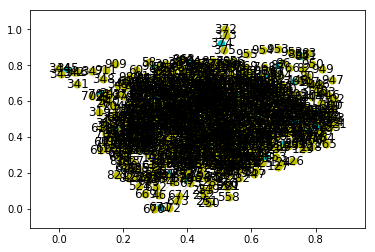

In [70]:
fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)

In [71]:
print("Distance between first candidate and real source : ",len(nx.shortest_path(Graph,rumorSources[0],scoreList[0]))-1)

Distance between first candidate and real source :  3
